# Multi-State Model for gyrodactylid parasite infection

It is useful to describe any process in which an individual (fish) moves through a series of states in continuous time

https://cran.r-project.org/web/packages/msm/msm.pdf

https://cran.r-project.org/web/packages/msm/vignettes/msm-manual.pdf


https://cran.r-project.org/web/packages/msmtools/msmtools.pdf    #works with msm package as well

In [1]:
options(repr.plot.width=8, repr.plot.height=8,repr.plot.res = 300) #Setting plot size

In [12]:
library("msm")
library("msmtools") #integrated with msm package for further analysis
library("survival")
library("survivalAnalysis") #Multivariate Surival
library("rms")
library("sjPlot")#Interaction plots
library(sjmisc)
library(ggplot2)
library(MuMIn) # use to calculate the marginal and conditional R-Sq
library(lme4) #for glmm
library("lmerTest")
library(effects)#check for effect size
theme_set(theme_sjplot())

library("lmtest") # for likelihood ratio test
#For Multivariate survival analysis
library(tidyverse)
library(tidytidbits)
library("survivalAnalysis") #Multivariate Surival
library("condSURV") #Conditional Survival Analysis
library(KernSmooth)
library(survminer)#Plot survival curves
library(plyr)#Transforming data
library(dplyr)
library(officer)
library(Rcpp)
library(rvg)

library(psycho)
library(dplyr)
library("tidyverse")
library("lmerTest")
library(ggplot2)
#library(modelbased)
#library(see)
library(grid)

In [24]:
#Setting working directory
setwd("C:/Users/user/Desktop/DataAnalysis_results_R/Multi-state Markov Modelling")

In [21]:
#Importing data for survival analysis
#Fish death status:  0=alive (right centered), 1=dead (Uncensored)
#Parasite extinction:  0=Not extinct (right centered), 1=Extinct (Uncensored)


Survival_data<-read.csv(file="MultiSate_Model_Data.csv")

Survival_data$Sex_fish<-factor(Survival_data$Sex_fish,levels=c(1,2),labels=c("Female fish","Male fish"))
Survival_data$Fish_population<-factor(Survival_data$Fish_population,levels=c(1,2,3),labels=c("Upper Aripo","Lower Aripo","Ornamental"))
Survival_data$Parasite_type<-factor(Survival_data$Parasite_type,levels=c(1,2,3),labels=c("Gt3","Gt","Gbull"))
Survival_data$Parasite_ExtinctStatus<-factor(Survival_data$Parasite_extinction,levels=c(0,1),labels=c("Not extinct","Extinct"))
Survival_data$States_cat<-factor(Survival_data$Multistates,levels=c(1,2,3),labels=c("State 1","State 2","State 3"))

Survival_data$Size_Category[Survival_data$Fish_size<=17.5]="Cat_small"
Survival_data$Size_Category[Survival_data$Fish_size>17.5]="Large"


Survival_data$Categorized_size[Survival_data$Fish_size<=14.5]="Small"
Survival_data$Categorized_size[Survival_data$Fish_size>14.5&Survival_data$Fish_size<=18]="Medium"
Survival_data$Categorized_size[Survival_data$Fish_size>18]="Large"
#attach(Survival_data)

In [22]:
#View fish size and number of fish
Survival_data2<-read.csv(file="Survival_data_PhD_Updated.csv")
table(Survival_data2$Fish_size)

#Categorized_size=
table(Survival_data2$Fish_size<=14.5)[2]

table(Survival_data2$Fish_size>14.5&Survival_data2$Fish_size<18)[2]

table(Survival_data2$Fish_size>=18)[2]


  12 12.5   13 13.5   14 14.5   15 15.5   16 16.5   17 17.5   18 18.5   19 19.5 
   3    2    2    2    6    7   11    5   28    3   20    8   12    2   14    1 
  20   21   22 22.5   23 23.5   24   25 25.5   26   27 
   8    3    5    1    3    1    5    2    1    1    1 

TRUE 
  22

TRUE 
  75

TRUE 
  60

In [23]:
#Changing reference category for fish size category 1
Survival_data$Size_Category=factor(Survival_data$Size_Category ,labels=c("Cat_small","Large"), ordered = FALSE )
Survival_data$Size_Category <- relevel(Survival_data$Size_Category, ref = "Cat_small")


#Changing reference category for fish size category 2
Survival_data$Categorized_size=factor(Survival_data$Categorized_size ,labels=c("Large","Medium","Small"), ordered = FALSE )
Survival_data$Categorized_size <- relevel(Survival_data$Categorized_size, ref = "Small")



In [25]:
#Importing data
Gt3_plot=read.csv(file="GT3_Plot.csv")
Gt_plot=read.csv(file="LA-Turn_Plot.csv")
Gbull_plot=read.csv(file="LA-Bull_plot.csv")
#Combining the three data set
Combined_data<-rbind(Gt3_plot,Gt_plot,Gbull_plot)

In [26]:
Transformed_data<-ddply(Combined_data, c("Day", "Parasite","ID"), summarise,
                    N    = length(Combined_data))


In [27]:
Splitdata<-split(Transformed_data,Transformed_data$ID)
#Saving data Separate for each fish in csv file
lapply(names(Splitdata), function(x){
    write_csv(Splitdata[[x]], path = paste(x, ".csv", sep = ""))
    })

[[1]]
     Day Parasite ID  N
1      1        0  1 10
158    1        1  1 10
334    3        0  1 10
491    3        1  1 10
729    5        0  1 10
886    5        1  1 10
1138   5        7  1 10
1189   7        0  1 10
1346   7        1  1 10
1522   7        4  1 10
1559   7        5  1 10
1685   9        0  1 10
1841   9        1  1 10
1899   9        2  1 10
1982   9        4  1 10
2134   9       23  1 10
2189  11        0  1 10
2393  11        2  1 10
2475  11        5  1 10
2537  11       10  1 10
2650  13        0  1 10
2851  13        2  1 10
2876  13        3  1 10
2895  13        4  1 10
2910  13        5  1 10
2929  13        7  1 10
2938  13        8  1 10
3049  15        0  1 10
3400  17        0  1 10

[[2]]
     Day Parasite ID  N
2      1        0  3 10
159    1        1  3 10
335    3        0  3 10
730    5        0  3 10
1190   7        0  3 10
1686   9        0  3 10
2190  11        0  3 10
2651  13        0  3 10
3050  15        0  3 10
3401  17        0  3 10

[[3]]
     Day Parasite ID  N
3      1        0  5 10
160    1        1  5 10
336    3        0  5 10
492    3        1  5 10
707    3        6  5 10
731    5        0  5 10
887    5        1  5 10
978    5        2  5 10
1096   5        5  5 10
1191   7        0  5 10
1347   7        1  5 10
1420   7        2  5 10
1610   7        8  5 10
1661   7       17  5 10
1687   9        0  5 10
1900   9        2  5 10
2014   9        5  5 10
2061   9        8  5 10
2159   9       32  5 10
2191  11        0  5 10
2344  11        1  5 10
2394  11        2  5 10
2550  11       11  5 10
2642  11       78  5 10
2652  13        0  5 10
3051  15        0  5 10
3402  17        0  5 10

[[4]]
     Day Parasite ID  N
4      1        0  6 10
161    1        1  6 10
252    1        2  6 10
337    3        0  6 10
493    3        1  6 10
586    3        2  6 10
732    5        0  6 10
888    5        1  6 10
979    5        2  6 10
1069   5        4  6 10
1192   7        0  6 10
1348   7        1  6 10
1523   7        4  6 10
1629   7       10  6 10
1688   9        0  6 10
2192  11        0  6 10
2653  13        0  6 10
3052  15        0  6 10
3403  17        0  6 10

[[5]]
     Day Parasite ID  N
5      1        0  7 10
162    1        1  7 10
253    1        2  7 10
338    3        0  7 10
587    3        2  7 10
724    3        8  7 10
733    5        0  7 10
980    5        2  7 10
1036   5        3  7 10
1139   5        7  7 10
1160   5        9  7 10
1193   7        0  7 10
1349   7        1  7 10
1421   7        2  7 10
1649   7       13  7 10
1653   7       14  7 10
1680   7       32  7 10
1689   9        0  7 10
1901   9        2  7 10
2036   9        6  7 10
2147   9       27  7 10
2186   9       90  7 10
2193  11        0  7 10
2345  11        1  7 10
2395  11        2  7 10
2528  11        9  7 10
2558  11       13  7 10
2634  11       63  7 10
2646  11      116  7 10
2654  13        0  7 10
3053  15        0  7 10
3404  17        0  7 10

[[6]]
     Day Parasite ID  N
6      1        0  8 10
163    1        1  8 10
339    3        0  8 10
494    3        1  8 10
588    3        2  8 10
734    5        0  8 10
889    5        1  8 10
1118   5        6  8 10
1194   7        0  8 10
1581   7        6  8 10
1690   9        0  8 10
1842   9        1  8 10
2194  11        0  8 10
2655  13        0  8 10
3054  15        0  8 10
3405  17        0  8 10

[[7]]
     Day Parasite ID  N
7      1        0  9 10
164    1        1  9 10
254    1        2  9 10
340    3        0  9 10
495    3        1  9 10
589    3        2  9 10
735    5        0  9 10
981    5        2  9 10
1119   5        6  9 10
1195   7        0  9 10
1691   9        0  9 10
2195  11        0  9 10
2656  13        0  9 10
3055  15        0  9 10
3406  17        0  9 10

[[8]]
     Day Parasite ID  N
8      1        0 10 10
165    1        1 10 10
341    3        0 10 10
736    5        0 10 10
1196   7        0 10 10
1692   9        0 10 10
2196  11        0 10 10
2657  13        0 10 10
3056  15 

In [28]:
#Calling all splitted data corresponding to each fish
Data_Observed=NULL
for (i in 1:157){
Data_Observed[[i]]<-Splitdata[[i]][,-4] 
    }
#Data_Observed[[1]]

**Adding parasite load to the multi-state data**

In [30]:
#Adding Parasite load to the data
Parasite_load_fish=list()
Fish_identity=NULL

for (i in 1:157){
    Parasite_load_fish[[i]]<-tapply(Data_Observed[[i]]$Parasite,Data_Observed[[i]]$Day,max)
    Fish_identity[[i]]<-names(Splitdata)[i]
}

Fish_ID=list()
Max_load=list()
Time_day=list()

for (i in 1:157){
    Fish_ID[[i]]=t(as.vector(as.numeric(rep(Fish_identity[[i]],9))))
    Max_load[[i]]=t(as.vector(Parasite_load_fish[[i]]))
    Time_day[[i]]=t(as.vector(seq(1,17,by=2)))
    }

ID_data=t(as.data.frame(do.call(cbind,Fish_ID)))
Load_data=t(as.data.frame(do.call(cbind,Max_load)))
Time_data=t(as.data.frame(do.call(cbind,Time_day)))
ID_Load_time_data=as.data.frame(cbind(ID_data,Time_data,Load_data))
names(ID_Load_time_data)=c("ID","Time","Parasite_load")
rownames(ID_Load_time_data)=NULL #Eliminating row names

Parasite_load=ID_Load_time_data[,3]

 #Required data
Multistate_data=cbind(Survival_data[order(Survival_data$ID),],Parasite_load)
head(Multistate_data,n=9)
attach(Multistate_data)
#Saving Multistate_data
#write.csv(Multistate_data,"Multistate_data_updated.csv")

ID Time_to_death Death_status Time_Para_Extinction Parasite_extinction
478 1  15            1            15                   0                  
479 1  15            1            15                   0                  
480 1  15            1            15                   0                  
481 1  15            1            15                   0                  
482 1  15            1            15                   0                  
483 1  15            1            15                   0                  
484 1  15            1            15                   0                  
485 1  15            1            15                   0                  
486 1  15            1            15                   0                  
    Multistates Time Censoring Sex_fish  Fish_size Fish_population
478 1            1   1         Male fish 20        Ornamental     
479 1            3   1         Male fish 20        Ornamental     
480 1            5   1         Male fish 20        Ornamental     
481 1            7   1         Male fish 20        Ornamental     
482 1            9   1         Male fish 20        Ornamental     
483 1           11   1         Male fish 20        Ornamental     
484 1           13   1         Male fish 20        Ornamental     
485 3           15   1         Male fish 20        Ornamental     
486 3           17   1         Male fish 20        Ornamental     
    Parasite_type Parasite_ExtinctStatus States_cat Size_Category
478 Gt            Not extinct            State 1    Large        
479 Gt            Not extinct            State 1    Large        
480 Gt            Not extinct            State 1    Large        
481 Gt            Not extinct            State 1    Large        
482 Gt            Not extinct            State 1    Large        
483 Gt            Not extinct            State 1    Large        
484 Gt            Not extinct            State 1    Large        
485 Gt            Not extinct            State 3    Large        
486 Gt            Not extinct            State 3    Large        
    Categorized_size Parasite_load
478 Large             1           
479 Large             1           
480 Large             7           
481 Large             5           
482 Large            23           
483 Large            10           
484 Large             8           
485 Large             0           
486 Large             0

In [15]:
#very close to the mean sojourn-time from the time-inhomogeneous Markov model
#mean(Multistate_data[,c(1,6,7)][Multistate_data$Multistates==1,][[3]]) 

In [33]:
#Percentage of infecteds, recovered and dead fish at day 17
Day_17<-split(Multistate_data,Time)$"17"
table(Day_17$Multistates)/157


         1          2          3 
0.07006369 0.19745223 0.73248408 

# Summarizing the sample size per group and day

In [34]:

Survival_data<-read.csv(file="Survival_data_PhD_Updated.csv")

Survival_data$Sex_fish<-factor(Survival_data$Sex_fish,levels=c(1,2),labels=c("Female fish","Male fish"))
Survival_data$Fish_population<-factor(Survival_data$Fish_population,levels=c(1,2,3),labels=c("UA","LA","OS"))
Survival_data$Parasite_type<-factor(Survival_data$Parasite_type,levels=c(1,2,3),labels=c("Gt3","Gt","Gb"))
head(Survival_data)

ID Time_to_death Death_status Time_Para_Extinction Parasite_extinction
1 75 17            1            17                   0                  
2 76 17            0             3                   1                  
3 77 17            0             5                   1                  
4 78 17            0             5                   1                  
5 79 17            0             7                   1                  
6 80 17            0            13                   1                  
  Multistates Sex_fish    Fish_size Fish_population Parasite_type
1 3           Male fish   19.0      OS              Gt3          
2 2           Female fish 21.0      OS              Gt3          
3 2           Male fish   18.0      UA              Gt3          
4 2           Female fish 17.0      UA              Gt3          
5 2           Male fish   15.5      LA              Gt3          
6 2           Female fish 19.0      LA              Gt3

In [35]:
#Extract cross-tabulation of number of deaths across parasite strain and fish population
time<- seq(1,17,by=2)
death_data<-NULL
for(i in time[-1]) death_data[[i]]<-table(Survival_data$Fish_population[Survival_data$Time_to_death==i],
      Survival_data$Parasite_type[Survival_data$Time_to_death==i])



#Extract cross-tabulation of sample size (alive fish) across parasite strain and fish population
Day_parasite_fish<- NULL
Day_parasite_fish[[1]]<- table(Survival_data$Fish_population,Survival_data$Parasite_type)
for(i in time[-1]){  
    Day_parasite_fish[[i]]<- Day_parasite_fish[[i-2]]-death_data[[i]]   
    
}
    

In [36]:
for (i in time) {
    print(Day_parasite_fish[[i]])
    print(paste("sample size at time=",i,"","is","",sum(Day_parasite_fish[[i]])))
}


    
     Gt3 Gt Gb
  UA  17 19 19
  LA  22 17 19
  OS  14 13 17
[1] "sample size at time= 1  is  157"
    
     Gt3 Gt Gb
  UA  13 16 17
  LA  22 16 19
  OS  14 11 17
[1] "sample size at time= 3  is  145"
    
     Gt3 Gt Gb
  UA  11 14 16
  LA  21 16 19
  OS  14 11 16
[1] "sample size at time= 5  is  138"
    
     Gt3 Gt Gb
  UA   7 12 12
  LA  19 14 16
  OS  14 11 15
[1] "sample size at time= 7  is  120"
    
     Gt3 Gt Gb
  UA   6 11  8
  LA  18 13 14
  OS  14 11 15
[1] "sample size at time= 9  is  110"
    
     Gt3 Gt Gb
  UA   6  7  5
  LA  16 13 12
  OS  14 11 15
[1] "sample size at time= 11  is  99"
    
     Gt3 Gt Gb
  UA   5  6  5
  LA  14 11  7
  OS  13 11 14
[1] "sample size at time= 13  is  86"
    
     Gt3 Gt Gb
  UA   3  6  4
  LA  12 10  6
  OS  13  9 13
[1] "sample size at time= 15  is  76"
    
     Gt3 Gt Gb
  UA   0  0  0
  LA   0  0  0
  OS   0  0  0
[1] "sample size at time= 17  is  0"


In [8]:
print(death_data[[17]])
Day_parasite_fish[[15]]

    
     Gt3 Gt Gb
  UA   3  6  4
  LA  12 10  6
  OS  13  9 13


    
     Gt3 Gt Gb
  UA   3  6  4
  LA  12 10  6
  OS  13  9 13

In [22]:
levels(as.factor(Multistate_data$Death_status))

[1] "0" "1"

In [38]:
#Deaths
table(Survival_data$Time_to_death[Survival_data$Death_status==1], Survival_data$Fish_population[Survival_data$Death_status==1],
     Survival_data$Parasite_type[Survival_data$Death_status==1])

, ,  = Gt3

    
     UA LA OS
  3   4  0  0
  5   2  1  0
  7   4  2  0
  9   1  1  0
  11  0  2  0
  13  1  2  1
  15  2  2  0
  17  0  8  8

, ,  = Gt

    
     UA LA OS
  3   3  1  2
  5   2  0  0
  7   2  2  0
  9   1  1  0
  11  4  0  0
  13  1  2  0
  15  0  1  2
  17  3  4  3

, ,  = Gb

    
     UA LA OS
  3   2  0  0
  5   1  0  1
  7   4  3  1
  9   4  2  0
  11  3  2  0
  13  0  5  1
  15  1  1  1
  17  2  1  5


In [39]:
table(Survival_data$Time_to_death[Survival_data$Death_status==0], Survival_data$Fish_population[Survival_data$Death_status==0],
     Survival_data$Parasite_type[Survival_data$Death_status==0])

, ,  = Gt3

    
     UA LA OS
  17  3  4  5

, ,  = Gt

    
     UA LA OS
  17  3  6  6

, ,  = Gb

    
     UA LA OS
  17  2  5  8


# Number of male and female fish over time

In [40]:
table(Survival_data$Fish_population,Survival_data$Sex_fish,Survival_data$Parasite_type)


, ,  = Gt3

    
     Female fish Male fish
  UA           8         9
  LA          15         7
  OS           7         7

, ,  = Gt

    
     Female fish Male fish
  UA          10         9
  LA          10         7
  OS           6         7

, ,  = Gb

    
     Female fish Male fish
  UA          13         6
  LA          11         8
  OS           9         8


In [122]:
table(Survival_data$Sex_fish)


Female fish   Male fish 
         89          68 

In [121]:
i=3
table(Survival_data$Fish_population,Survival_data$Sex_fish,Survival_data$Parasite_type)-table(Survival_data$Fish_population[Survival_data$Time_to_death==i],
      Survival_data$Sex_fish[Survival_data$Time_to_death==i],
      Survival_data$Parasite_type[Survival_data$Time_to_death==i])

, ,  = Gt3

    
     Female fish Male fish
  UA           7         6
  LA          15         7
  OS           7         7

, ,  = Gt

    
     Female fish Male fish
  UA           9         7
  LA          10         6
  OS           5         6

, ,  = Gb

    
     Female fish Male fish
  UA          12         5
  LA          11         8
  OS           9         8


In [98]:
table(Survival_data$Sex_fish,Survival_data$Parasite_type)


#Extract cross-tabulation of number of deaths across parasite strain and fish population
time<- seq(1,17,by=2)
sexratio_data<-NULL
for(i in time[-1]) death_data[[i]]<-table(Survival_data$Fish_population[Survival_data$Time_to_death==i],
      Survival_data$Parasite_type[Survival_data$Time_to_death==i])



#Extract cross-tabulation of sample size (alive fish) across parasite strain and fish population
Day_parasite_fish<- NULL
Day_parasite_fish[[1]]<- table(Survival_data$Fish_population,Survival_data$Parasite_type)
for(i in time[-1]){  
    Day_parasite_fish[[i]]<- Day_parasite_fish[[i-2]]-death_data[[i]]   
    
}
    

for (i in time[-1]) print(table(Survival_data$Sex_fish[Survival_data$Time_to_death==i],
                                Survival_data$Parasite_type[Survival_data$Time_to_death==i]))

             
              Gt3 Gt Gb
  Female fish  30 26 33
  Male fish    23 23 22

             
              Gt3 Gt Gb
  Female fish   1  2  1
  Male fish     3  4  1
             
              Gt3 Gt Gb
  Female fish   1  0  1
  Male fish     2  2  1
             
              Gt3 Gt Gb
  Female fish   3  2  6
  Male fish     3  2  2
             
              Gt3 Gt Gb
  Female fish   0  2  4
  Male fish     2  0  2
             
              Gt3 Gt Gb
  Female fish   2  2  3
  Male fish     0  2  2
             
              Gt3 Gt Gb
  Female fish   2  1  2
  Male fish     2  2  4
             
              Gt3 Gt Gb
  Female fish   4  2  1
  Male fish     0  1  2
             
              Gt3 Gt Gb
  Female fish  17 15 15
  Male fish    11 10  8


In [88]:
table(Survival_data$Fish_population[Survival_data$Time_to_death==3],
      Survival_data$Parasite_type[Survival_data$Time_to_death==3],
      Survival_data$Sex_fish[Survival_data$Time_to_death==3])

, ,  = Female fish

    
     Gt3 Gt Gb
  UA   1  1  1
  LA   0  0  0
  OS   0  1  0

, ,  = Male fish

    
     Gt3 Gt Gb
  UA   3  2  1
  LA   0  1  0
  OS   0  1  0


**Define the Multi-states of the model**

Given fish death status (0,1) and parasite extinction status (0,1), the Multi-states are:

1. (0,0)  **Fish alive and no parasite extinction (1)**
2. (0,1)  **Fish alive and parasite extinct (2)**
3. (1,0)  **Fish dead and no parasite extinction (3)**


**Summary of the Multi-states data** 

A useful way to summarise multi-state data is as a frequency table of pairs of consecutive states. This counts over all individuals, for each state r and s, the number of times an individual had an observation of state r followed by an observation of state s.


**Hence, 115 out of the 157 fish died while having parasites alive over the infection period; whiles 31 fish stayed alive with parasites extinct and 11 remained alive with no parasite extinction.**

In [41]:
#State 1: Fish alive and no parasite extinction
#State 2: Fish alive and parasite extinct 
#State 3: Fish dead and no parasite extinction
#statetable.msm(Multistates,ID, data=Survival_data)
statetable.msm(Multistates,ID, data=Multistate_data)

    to
from   1   2   3
   1 695  31 115
   2   0  85   0
   3   0   0 330

**Estimating transition rates $Q$ using numerical approximation via Maximum Likelihood estimation**

The likelihood is maximised by numerical methods, which need a set of initial values to start the
search for the maximum. For reassurance that the true maximum likelihood estimates have been
found, models should be run repeatedly starting from different initial values. 

If we observe $n_{rs}$ transitions from state $r$ to state $s$, and a total of $n_r$ transitions
from state r, then $\frac{q_{rs}}{q_{rr}}$ can be estimated by $\frac{n_{rs}}{n_r}$.


Given a total of $T_r$ years (days in our case) spent in state r, the mean sojourn time $\frac{1}{q_{rr}}$ can be estimated as $\frac{T_r}{n_r}$. Thus, $\frac{n_{rs}}{T_r}$ is a crude estimate of $q_{rs}$. 

In [42]:
Infected_class <-split(Multistate_data,Multistates)$"1"
Total_number_day_spents_State1<-sum(as.vector(tapply(Infected_class$Time,Infected_class$ID,max)))
print(paste("Total days spent in infected class=",Total_number_day_spents_State1))

[1] "Total days spent in infected class= 1547"


In [43]:
#Initial guess of transition rates
Q<-rbind(c(0,1,1),c(0,0,0),c(0,0,0))
rownames(Q) <- colnames(Q) <- c("state1", "state2", "state3")
Q

state1 state2 state3
state1 0      1      1     
state2 0      0      0     
state3 0      0      0

**Estimating the transition intensity matrix based on an initial condition numerically**

Calculates crude initial values for transition intensities by assuming that the data represent the exact transition times of the Markov process.

In [44]:
#Q.crude <- crudeinits.msm(Multistates ~ Time,ID,data=Survival_data, qmatrix=Q)
Q.crude <- crudeinits.msm(Multistates ~ Time,ID,data=Multistate_data, qmatrix=Q)
Q.crude

state1      state2     state3    
state1 -0.08680143 0.01843044 0.06837099
state2  0.00000000 0.00000000 0.00000000
state3  0.00000000 0.00000000 0.00000000

# Fitting the multi-state model

The msm function fits a continuous-time Markov or hidden Markov multi-state model by maximum likelihood. Observations of the process can be made at arbitrary times, or the exact times of transition between states can be known. Covariates can be fitted to the Markov chain transition intensities or to the hidden Markov observation process.


Internally, it uses the R function optim to minimise the minus log-likelihood.

**NB: A time-varying covariate (Parasite load) has now been considered into the Multi-state model which can effectively handle such covariate.**

**Fitting model with parasite load as time-varying covariate**

It was found that the model with parasite load as additional covariate without fish size and interactions was the best based on its AIC value.

NB: Covariates considered were fish sex, size, fish stocks, parasite strains and parasite load 

In [45]:
#setting Gt as reference category
Multistate_data$Parasite_type=relevel(Multistate_data$Parasite_type,ref="Gt")

# Function to compute p-values for estimates of the multi-state model

In [46]:
MSM_pvalues<-function(msm_model,covariate_num){
Covariates_levels<-msm_model$qcmodel$covlabels
log_estimates<-log(unlist(as.matrix(hazard.msm(msm_model)[toString(Covariates_levels[covariate_num])])))

#from state 1 to 2
std_err_1_2<- (log_estimates[5]-log_estimates[3])/(2*1.96)
z_1_2<-abs(log_estimates[1]/std_err_1_2)
pvalue_1_2<- exp((−0.717*z_1_2)-(0.416*z_1_2^2))

#from state 1 to 3
std_err_1_3<- (log_estimates[6]-log_estimates[4])/(2*1.96)
z_1_3<-abs(log_estimates[2]/std_err_1_3)
pvalue_1_3<- exp((−0.717*z_1_3)-(0.416*z_1_3^2))
    
HR_estimates=as.data.frame(hazard.msm(msm_model)[toString(Covariates_levels[covariate_num])])
HR_estimates$P_value=c(pvalue_1_2,pvalue_1_3)
colnames(HR_estimates)=c("HR","L","U","P-value")     
HR_estimates$Variable=c(toString(Covariates_levels[covariate_num])) 
        
    return(HR_estimates)
        
}



In [32]:
#Given State 1-2 & State 1-3 covariates: 
#For each 15 unique combinations, there are 15*15=225 ways of pairing them up including itself
#For empty models: either 0 covariate for State 1-2 & 15 covariates for State 1-3, 
#  either 15 covariates for State 1-3 & 0 covariate for State 1-3 and  0 covariates for State 1-3 & 0 covariate for State 1-3
#which gives (15*15)+15+15+1=256 or 4^4 total combination of covariates including the empty cases.

#breakdown: 4 singles, 6 pairs, 4  tripples, 1  quadruple

# Automated forward Stepwise Variable & model selection for multi-state models (based on the Bayesian Information Critera-BIC).

**A total of 256 models are fitted and compared based on the two transitions from state 1 to either state 2 or state 3.**

In [47]:
# make a list of independent variables
predictors<- c("Sex_fish","Fish_size","Parasite_type","Fish_population")

n=seq_along(predictors)

## Create list of models
list.of.models <- lapply(seq_along((predictors)), function(n) {
    predictors_combinations <- apply(X = combn(predictors, n), MARGIN = 2, paste,collapse = "and")
})

vector.of.models =unlist(list.of.models)
vector.of.models=str_split(vector.of.models,"and")
vector.of.models

[[1]]
[1] "Sex_fish"

[[2]]
[1] "Fish_size"

[[3]]
[1] "Parasite_type"

[[4]]
[1] "Fish_population"

[[5]]
[1] "Sex_fish"  "Fish_size"

[[6]]
[1] "Sex_fish"      "Parasite_type"

[[7]]
[1] "Sex_fish"        "Fish_population"

[[8]]
[1] "Fish_size"     "Parasite_type"

[[9]]
[1] "Fish_size"       "Fish_population"

[[10]]
[1] "Parasite_type"   "Fish_population"

[[11]]
[1] "Sex_fish"      "Fish_size"     "Parasite_type"

[[12]]
[1] "Sex_fish"        "Fish_size"       "Fish_population"

[[13]]
[1] "Sex_fish"        "Parasite_type"   "Fish_population"

[[14]]
[1] "Fish_size"       "Parasite_type"   "Fish_population"

[[15]]
[1] "Sex_fish"        "Fish_size"       "Parasite_type"   "Fish_population"

In [48]:
#Variables
single_preds=list(vector.of.models[[1]],vector.of.models[[2]],vector.of.models[[3]],vector.of.models[[4]])
double_preds=list(vector.of.models[[5]],vector.of.models[[6]],vector.of.models[[7]],vector.of.models[[8]]
              ,vector.of.models[[9]],vector.of.models[[10]])
tripple_preds=list(vector.of.models[[11]],vector.of.models[[12]],vector.of.models[[13]],vector.of.models[[14]])
quadruple_preds=list(vector.of.models[[15]] ) 

In [49]:
Total_models_breakdown=c(
4*4, # 1 on 1
4*6,  # 1 on 2
4* 4, #1 on 3
4*1,  #1 on 4


6*4,  #2 on 1
6*6,  #2 on 2
6*4,  #2 on 3
6*1,  #2 on 4

 4*4, #3 on 1
4*6,   #3 on 2
 4*4,        #3 on 3           
 4*1,        #3 on 4

1*4,        #4 on 1
1*6,        #4 on 2
 1*4,       #4 on 3
 1*1       # 4 on 4
 )                  
Total_models_breakdown
print(paste("Total models to fit with at least a predictor in both transitions=",sum(Total_models_breakdown)) ) 

print(paste("Overall total models to fit including empty models in both transitions=",sum(Total_models_breakdown)+31) )               

[1] 16 24 16  4 24 36 24  6 16 24 16  4  4  6  4  1

[1] "Total models to fit with at least a predictor in both transitions= 225"
[1] "Overall total models to fit including empty models in both transitions= 256"


# Function for model selection

In [95]:
# Function for model selection (computing both AIC and BIC values)
AIC_BIC_estimator<- function(fitted_model){
    n<- dim(fitted_model$data$mf)[1]#sample size
    k<- fitted_model$paramdata$nopt#number of parameters
    minus2LogLik<- fitted_model$minus2loglik
    AIC_value<- 2*k +minus2LogLik
    BIC_value<- k*log(n)+minus2LogLik
    return(list(AIC_value=AIC_value,BIC_value=BIC_value))
}


# Case1 - 16 models: Fitted msm of single preds (for state 1-2) vs single preds (for state 1-3)

In [96]:
#Case1 - 16 models: Fitted msm of single preds (for state 1-2) vs single preds (for state 1-3)
model_variables1=c()
for (i in 1:length(single_preds)){
       model_variables1[[i]]=as.data.frame(matrix(NA,nrow=length(single_preds),ncol=4))
      names(model_variables1[[i]])=c("Preds_1-2","Preds_1-3","AIC","BIC")
         predictor1=single_preds[[i]]
        for(j in 1:length(single_preds)){
            
         predictor2=single_preds[[j]] 
            
msm_model1=msm( Multistates ~ Time, subject=ID, data =Multistate_data, qmatrix = Q.crude, 
covariates= list("1-2"=~get(predictor1),"1-3"=~get(predictor2)),exacttimes=F,method="BFGS",
                            pci=c(3,5,7,9,11,13,15),gen.inits=TRUE,deathexact=3,obstype=2,
                           control = list(fnscale = 4000, maxit = 10000))        
         model_variables1[[i]][j,1:2]=c(single_preds[[i]],single_preds[[j]])
         model_variables1[[i]][j,3]=AIC_BIC_estimator(msm_model1)$AIC_value#Computing the AIC
         model_variables1[[i]][j,4]=AIC_BIC_estimator(msm_model1)$BIC_value#Computing the BIC
           }
                  }

model_single_vs_single=do.call("rbind",model_variables1)

model_single_vs_single
write.csv(model_single_vs_single,"model_single_vs_single.csv")

Preds_1-2       Preds_1-3       AIC      BIC     
1  Sex_fish        Sex_fish        1101.744 1196.307
2  Sex_fish        Fish_size       1101.696 1196.259
3  Sex_fish        Parasite_type   1103.653 1203.469
4  Sex_fish        Fish_population 1077.593 1177.409
5  Fish_size       Sex_fish        1097.655 1192.217
6  Fish_size       Fish_size       1097.613 1192.176
7  Fish_size       Parasite_type   1099.565 1199.381
8  Fish_size       Fish_population 1073.505 1173.321
9  Parasite_type   Sex_fish        1101.921 1201.737
10 Parasite_type   Fish_size       1101.872 1201.688
11 Parasite_type   Parasite_type   1103.830 1208.900
12 Parasite_type   Fish_population 1077.767 1182.837
13 Fish_population Sex_fish        1102.701 1202.517
14 Fish_population Fish_size       1102.656 1202.472
15 Fish_population Parasite_type   1104.611 1209.681
16 Fish_population Fish_population 1078.550 1183.619

# Case2 - 24 models: Fitted msm of single preds (for state 1-2) vs double preds (for state 1-3)

In [97]:
#Case2 - 24 models: Fitted msm of single preds (for state 1-2) vs double preds (for state 1-3)
model_variables2=c()
for (i in 1:length(single_preds)){
       model_variables2[[i]]=as.data.frame(matrix(NA,nrow=length(double_preds),ncol=4))
      names(model_variables2[[i]])=c("Preds_1-2","Preds_1-3","AIC","BIC")
         predictor1=single_preds[[i]]
        for(j in 1:length(double_preds)){
            
         predictor2=double_preds[[j]] 
            
msm_model2=msm(Multistates ~ Time, subject=ID, data =Multistate_data, qmatrix = Q.crude, 
covariates= list("1-2"=~get(predictor1),
                 "1-3"=~get(predictor2[1])+get(predictor2[2])),exacttimes=F,method="BFGS",
                            pci=c(3,5,7,9,11,13,15),gen.inits=TRUE,deathexact=3,obstype=2,
                           control = list(fnscale = 4000, maxit = 10000))         
    model_variables2[[i]][j,1:2]=c(paste(single_preds[[i]]),paste(double_preds[[j]][1],double_preds[[j]][2],sep ='+'))
    model_variables2[[i]][j,3]=AIC_BIC_estimator(msm_model2)$AIC_value#Computing the AIC
    model_variables2[[i]][j,4]=AIC_BIC_estimator(msm_model2)$BIC_value#Computing the BIC
           }
                  }

model_single_vs_double=do.call("rbind",model_variables2)
model_single_vs_double
write.csv(model_single_vs_double,"model_single_vs_double.csv")

Preds_1-2       Preds_1-3                     AIC      BIC     
1  Sex_fish        Sex_fish+Fish_size            1102.547 1202.363
2  Sex_fish        Sex_fish+Parasite_type        1103.605 1208.674
3  Sex_fish        Sex_fish+Fish_population      1076.108 1181.178
4  Sex_fish        Fish_size+Parasite_type       1103.756 1208.825
5  Sex_fish        Fish_size+Fish_population     1079.430 1184.499
6  Sex_fish        Parasite_type+Fish_population 1076.789 1187.112
7  Fish_size       Sex_fish+Fish_size            1098.459 1198.274
8  Fish_size       Sex_fish+Parasite_type        1099.523 1204.592
9  Fish_size       Sex_fish+Fish_population      1072.022 1177.092
10 Fish_size       Fish_size+Parasite_type       1099.665 1204.734
11 Fish_size       Fish_size+Fish_population     1075.342 1180.412
12 Fish_size       Parasite_type+Fish_population 1072.699 1183.022
13 Parasite_type   Sex_fish+Fish_size            1102.719 1207.789
14 Parasite_type   Sex_fish+Parasite_type        1103.778 1214.101
15 Parasite_type   Sex_fish+Fish_population      1076.280 1186.602
16 Parasite_type   Fish_size+Parasite_type       1103.929 1214.252
17 Parasite_type   Fish_size+Fish_population     1079.608 1189.931
18 Parasite_type   Parasite_type+Fish_population 1076.965 1192.541
19 Fish_population Sex_fish+Fish_size            1103.504 1208.573
20 Fish_population Sex_fish+Parasite_type        1104.561 1214.884
21 Fish_population Sex_fish+Fish_population      1077.062 1187.385
22 Fish_population Fish_size+Parasite_type       1104.713 1215.036
23 Fish_population Fish_size+Fish_population     1080.389 1190.712
24 Fish_population Parasite_type+Fish_population 1077.746 1193.322

# Case3 - 16 models: Fitted msm of single preds (for state 1-2) vs tripple preds (for state 1-3)

In [98]:
#Case3 - 16 models: Fitted msm of single preds (for state 1-2) vs tripple preds (for state 1-3)
model_variables3=c()
for (i in 1:length(single_preds)){
       model_variables3[[i]]=as.data.frame(matrix(NA,nrow=length(tripple_preds),ncol=4))
      names(model_variables3[[i]])=c("Preds_1-2","Preds_1-3","AIC","BIC")
         predictor1=single_preds[[i]]
        for(j in 1:length(tripple_preds)){
            
         predictor2=tripple_preds[[j]] 
            
msm_model3=msm(Multistates ~ Time, subject=ID, data =Multistate_data, qmatrix = Q.crude, 
covariates= list("1-2"=~get(predictor1),
                 "1-3"=~get(predictor2[1])+get(predictor2[2])+get(predictor2[3])),exacttimes=F,method="BFGS",
                            pci=c(3,5,7,9,11,13,15),gen.inits=TRUE,deathexact=3,obstype=2,
                           control = list(fnscale = 4000, maxit = 10000))         
    model_variables3[[i]][j,1:2]=c(paste(single_preds[[i]]),paste(tripple_preds[[j]][1],tripple_preds[[j]][2]
                                            ,tripple_preds[[j]][3],sep ='+'))
    model_variables3[[i]][j,3]=AIC_BIC_estimator(msm_model3)$AIC_value#Computing the AIC
    model_variables3[[i]][j,4]=AIC_BIC_estimator(msm_model3)$BIC_value#Computing the BIC
           }
                  }

model_single_vs_tripple=do.call("rbind",model_variables3)
model_single_vs_tripple
write.csv(model_single_vs_tripple,"model_single_vs_tripple.csv")

Preds_1-2       Preds_1-3                               AIC      BIC     
1  Sex_fish        Sex_fish+Fish_size+Parasite_type        1104.340 1214.663
2  Sex_fish        Sex_fish+Fish_size+Fish_population      1078.074 1188.397
3  Sex_fish        Sex_fish+Parasite_type+Fish_population  1074.233 1189.810
4  Sex_fish        Fish_size+Parasite_type+Fish_population 1078.579 1194.155
5  Fish_size       Sex_fish+Fish_size+Parasite_type        1100.250 1210.573
6  Fish_size       Sex_fish+Fish_size+Fish_population      1073.985 1184.308
7  Fish_size       Sex_fish+Parasite_type+Fish_population  1070.144 1185.720
8  Fish_size       Fish_size+Parasite_type+Fish_population 1074.490 1190.066
9  Parasite_type   Sex_fish+Fish_size+Parasite_type        1104.514 1220.090
10 Parasite_type   Sex_fish+Fish_size+Fish_population      1078.252 1193.828
11 Parasite_type   Sex_fish+Parasite_type+Fish_population  1074.407 1195.236
12 Parasite_type   Fish_size+Parasite_type+Fish_population 1078.753 1199.583
13 Fish_population Sex_fish+Fish_size+Parasite_type        1105.297 1220.874
14 Fish_population Sex_fish+Fish_size+Fish_population      1079.035 1194.611
15 Fish_population Sex_fish+Parasite_type+Fish_population  1075.189 1196.019
16 Fish_population Fish_size+Parasite_type+Fish_population 1079.536 1200.366

# Case4 - 16 models: Fitted msm of single preds (for state 1-2) vs quadruple preds (for state 1-3)

In [99]:
#Case4 - 16 models: Fitted msm of single preds (for state 1-2) vs quadruple preds (for state 1-3)
model_variables4=c()
for (i in 1:length(single_preds)){
       model_variables4[[i]]=as.data.frame(matrix(NA,nrow=length(quadruple_preds),ncol=4))
      names(model_variables4[[i]])=c("Preds_1-2","Preds_1-3","AIC","BIC")
         predictor1=single_preds[[i]]
        for(j in 1:length(quadruple_preds)){
            
         predictor2=quadruple_preds[[j]] 
            
msm_model4=msm(Multistates ~ Time, subject=ID, data =Multistate_data, qmatrix = Q.crude, 
covariates= list("1-2"=~get(predictor1),
                 "1-3"=~get(predictor2[1])+get(predictor2[2])+get(predictor2[3])+get(predictor2[4])),exacttimes=F,method="BFGS",
                            pci=c(3,5,7,9,11,13,15),gen.inits=TRUE,deathexact=3,obstype=2,
                           control = list(fnscale = 4000, maxit = 10000))         
    model_variables4[[i]][j,1:2]=c(paste(single_preds[[i]]),paste(quadruple_preds[[j]][1],quadruple_preds[[j]][2]
                            ,quadruple_preds[[j]][3],quadruple_preds[[j]][4],sep ='+'))
    model_variables4[[i]][j,3]=AIC_BIC_estimator(msm_model4)$AIC_value#Computing the AIC
    model_variables4[[i]][j,4]=AIC_BIC_estimator(msm_model4)$BIC_value#Computing the BIC
           }
                  }

model_single_vs_quadruple=do.call("rbind",model_variables4)
model_single_vs_quadruple
write.csv(model_single_vs_quadruple,"model_single_vs_quadruple.csv")

Preds_1-2       Preds_1-3                                        AIC     
1 Sex_fish        Sex_fish+Fish_size+Parasite_type+Fish_population 1076.210
2 Fish_size       Sex_fish+Fish_size+Parasite_type+Fish_population 1072.122
3 Parasite_type   Sex_fish+Fish_size+Parasite_type+Fish_population 1076.387
4 Fish_population Sex_fish+Fish_size+Parasite_type+Fish_population 1077.170
  BIC     
1 1197.040
2 1192.952
3 1202.470
4 1203.253

# Case5 - 24 models: Fitted msm of double preds (for state 1-2) vs single preds (for state 1-3)

In [100]:
#Case5 - 24 models: Fitted msm of double preds (for state 1-2) vs single preds (for state 1-3)
model_variables5=c()
for (i in 1:length(double_preds)){
       model_variables5[[i]]=as.data.frame(matrix(NA,nrow=length(single_preds),ncol=4))
      names(model_variables5[[i]])=c("Preds_1-2","Preds_1-3","AIC","BIC")
         predictor1=double_preds[[i]]
        for(j in 1:length(single_preds)){
            
         predictor2=single_preds[[j]] 
            
msm_model5=msm(Multistates ~ Time, subject=ID, data =Multistate_data, qmatrix = Q.crude, 
covariates= list("1-2"=~get(predictor1[1])+get(predictor1[2]),
                 "1-3"=~get(predictor2)),exacttimes=F,method="BFGS",
                            pci=c(3,5,7,9,11,13,15),gen.inits=TRUE,deathexact=3,obstype=2,
                           control = list(fnscale = 4000, maxit = 10000))         
    model_variables5[[i]][j,1:2]=c(paste(double_preds[[i]][1],double_preds[[i]][2],sep ='+'),paste(single_preds[[j]]))
    model_variables5[[i]][j,3]=AIC_BIC_estimator(msm_model5)$AIC_value#Computing the AIC
    model_variables5[[i]][j,4]=AIC_BIC_estimator(msm_model5)$BIC_value#Computing the BIC
           }
                  }

model_double_vs_single=do.call("rbind",model_variables5)
model_double_vs_single
write.csv(model_double_vs_single,"model_double_vs_single.csv")

Preds_1-2                     Preds_1-3       AIC      BIC     
1  Sex_fish+Fish_size            Sex_fish        1099.406 1199.222
2  Sex_fish+Fish_size            Fish_size       1099.361 1199.177
3  Sex_fish+Fish_size            Parasite_type   1101.317 1206.386
4  Sex_fish+Fish_size            Fish_population 1075.258 1180.328
5  Sex_fish+Parasite_type        Sex_fish        1102.853 1207.922
6  Sex_fish+Parasite_type        Fish_size       1102.807 1207.876
7  Sex_fish+Parasite_type        Parasite_type   1104.768 1215.091
8  Sex_fish+Parasite_type        Fish_population 1078.704 1189.026
9  Sex_fish+Fish_population      Sex_fish        1104.233 1209.302
10 Sex_fish+Fish_population      Fish_size       1104.187 1209.256
11 Sex_fish+Fish_population      Parasite_type   1106.146 1216.469
12 Sex_fish+Fish_population      Fish_population 1080.082 1190.405
13 Fish_size+Parasite_type       Sex_fish        1098.800 1203.869
14 Fish_size+Parasite_type       Fish_size       1098.754 1203.823
15 Fish_size+Parasite_type       Parasite_type   1100.708 1211.031
16 Fish_size+Parasite_type       Fish_population 1074.646 1184.969
17 Fish_size+Fish_population     Sex_fish        1099.792 1204.861
18 Fish_size+Fish_population     Fish_size       1099.746 1204.816
19 Fish_size+Fish_population     Parasite_type   1101.703 1212.026
20 Fish_size+Fish_population     Fish_population 1075.644 1185.967
21 Parasite_type+Fish_population Sex_fish        1104.349 1214.672
22 Parasite_type+Fish_population Fish_size       1104.302 1214.625
23 Parasite_type+Fish_population Parasite_type   1106.260 1221.836
24 Parasite_type+Fish_population Fish_population 1080.198 1195.774

# Case6 - 36 models: Fitted msm of double preds (for state 1-2) vs double preds (for state 1-3)

In [101]:
#Case6 - 36 models: Fitted msm of double preds (for state 1-2) vs double preds (for state 1-3)
model_variables6=c()
for (i in 1:length(double_preds)){
       model_variables6[[i]]=as.data.frame(matrix(NA,nrow=length(double_preds),ncol=4))
      names(model_variables6[[i]])=c("Preds_1-2","Preds_1-3","AIC","BIC")
         predictor1=double_preds[[i]]
        for(j in 1:length(double_preds)){
            
         predictor2=double_preds[[j]] 
            
msm_model6=msm(Multistates ~ Time, subject=ID, data =Multistate_data, qmatrix = Q.crude, 
covariates= list("1-2"=~get(predictor1[1])+get(predictor1[2]),
                 "1-3"=~get(predictor2[1])+get(predictor2[2])),exacttimes=F,method="BFGS",
                            pci=c(3,5,7,9,11,13,15),gen.inits=TRUE,deathexact=3,obstype=2,
                           control = list(fnscale = 4000, maxit = 10000))         
    model_variables6[[i]][j,1:2]=c(paste(double_preds[[i]][1],double_preds[[i]][2],sep ='+'),
                                   paste(double_preds[[j]][1],double_preds[[j]][2],sep="+"))
    model_variables6[[i]][j,3]=AIC_BIC_estimator(msm_model6)$AIC_value#Computing the AIC
    model_variables6[[i]][j,4]=AIC_BIC_estimator(msm_model6)$BIC_value#Computing the BIC
           }
                  }

model_double_vs_double=do.call("rbind",model_variables6)
model_double_vs_double
write.csv(model_double_vs_double,"model_double_vs_double.csv")

Preds_1-2                     Preds_1-3                     AIC     
1  Sex_fish+Fish_size            Sex_fish+Fish_size            1100.213
2  Sex_fish+Fish_size            Sex_fish+Parasite_type        1101.266
3  Sex_fish+Fish_size            Sex_fish+Fish_population      1073.773
4  Sex_fish+Fish_size            Fish_size+Parasite_type       1101.417
5  Sex_fish+Fish_size            Fish_size+Fish_population     1077.094
6  Sex_fish+Fish_size            Parasite_type+Fish_population 1074.452
7  Sex_fish+Parasite_type        Sex_fish+Fish_size            1103.657
8  Sex_fish+Parasite_type        Sex_fish+Parasite_type        1104.714
9  Sex_fish+Parasite_type        Sex_fish+Fish_population      1077.216
10 Sex_fish+Parasite_type        Fish_size+Parasite_type       1104.865
11 Sex_fish+Parasite_type        Fish_size+Fish_population     1080.546
12 Sex_fish+Parasite_type        Parasite_type+Fish_population 1077.898
13 Sex_fish+Fish_population      Sex_fish+Fish_size            1105.036
14 Sex_fish+Fish_population      Sex_fish+Parasite_type        1106.093
15 Sex_fish+Fish_population      Sex_fish+Fish_population      1078.603
16 Sex_fish+Fish_population      Fish_size+Parasite_type       1106.245
17 Sex_fish+Fish_population      Fish_size+Fish_population     1081.923
18 Sex_fish+Fish_population      Parasite_type+Fish_population 1079.278
19 Fish_size+Parasite_type       Sex_fish+Fish_size            1099.602
20 Fish_size+Parasite_type       Sex_fish+Parasite_type        1100.658
21 Fish_size+Parasite_type       Sex_fish+Fish_population      1073.162
22 Fish_size+Parasite_type       Fish_size+Parasite_type       1100.812
23 Fish_size+Parasite_type       Fish_size+Fish_population     1076.485
24 Fish_size+Parasite_type       Parasite_type+Fish_population 1073.846
25 Fish_size+Fish_population     Sex_fish+Fish_size            1100.594
26 Fish_size+Fish_population     Sex_fish+Parasite_type        1101.652
27 Fish_size+Fish_population     Sex_fish+Fish_population      1074.155
28 Fish_size+Fish_population     Fish_size+Parasite_type       1101.803
29 Fish_size+Fish_population     Fish_size+Fish_population     1077.478
30 Fish_size+Fish_population     Parasite_type+Fish_population 1074.838
31 Parasite_type+Fish_population Sex_fish+Fish_size            1105.154
32 Parasite_type+Fish_population Sex_fish+Parasite_type        1106.207
33 Parasite_type+Fish_population Sex_fish+Fish_population      1078.712
34 Parasite_type+Fish_population Fish_size+Parasite_type       1106.366
35 Parasite_type+Fish_population Fish_size+Fish_population     1082.035
36 Parasite_type+Fish_population Parasite_type+Fish_population 1079.394
   BIC     
1  1205.282
2  1211.589
3  1184.095
4  1211.740
5  1187.416
6  1190.028
7  1213.980
8  1220.291
9  1192.792
10 1220.442
11 1196.122
12 1198.728
13 1215.359
14 1221.669
15 1194.179
16 1221.821
17 1197.499
18 1200.107
19 1209.924
20 1216.234
21 1188.738
22 1216.388
23 1192.061
24 1194.676
25 1210.917
26 1217.228
27 1189.731
28 1217.379
29 1193.054
30 1195.668
31 1220.730
32 1227.036
33 1199.542
34 1227.195
35 1202.865
36 1205.477

# Case7 - 24 models: Fitted msm of double preds (for state 1-2) vs tripple preds (for state 1-3)

In [102]:
#Case7 - 24 models: Fitted msm of double preds (for state 1-2) vs tripple preds (for state 1-3)
model_variables7=c()
for (i in 1:length(double_preds)){
       model_variables7[[i]]=as.data.frame(matrix(NA,nrow=length(tripple_preds),ncol=4))
      names(model_variables7[[i]])=c("Preds_1-2","Preds_1-3","AIC","BIC")
         predictor1=double_preds[[i]]
        for(j in 1:length(tripple_preds)){
            
         predictor2=tripple_preds[[j]] 
            
msm_model7=msm(Multistates ~ Time, subject=ID, data =Multistate_data, qmatrix = Q.crude, 
covariates= list("1-2"=~get(predictor1[1])+get(predictor1[2]),
                 "1-3"=~get(predictor2[1])+get(predictor2[2])+get(predictor2[3])),exacttimes=F,method="BFGS",
                            pci=c(3,5,7,9,11,13,15),gen.inits=TRUE,deathexact=3,obstype=2,
                           control = list(fnscale = 4000, maxit = 10000))         
    model_variables7[[i]][j,1:2]=c(paste(double_preds[[i]][1],double_preds[[i]][2],sep ='+'),
                                   paste(tripple_preds[[j]][1],tripple_preds[[j]][2],tripple_preds[[j]][3],sep="+"))
    model_variables7[[i]][j,3]=AIC_BIC_estimator(msm_model7)$AIC_value#Computing the AIC
    model_variables7[[i]][j,4]=AIC_BIC_estimator(msm_model7)$BIC_value#Computing the BIC
           }
                  }

model_double_vs_tripple=do.call("rbind",model_variables7)
model_double_vs_tripple
write.csv(model_double_vs_tripple,"model_double_vs_tripple.csv")

Preds_1-2                     Preds_1-3                              
1  Sex_fish+Fish_size            Sex_fish+Fish_size+Parasite_type       
2  Sex_fish+Fish_size            Sex_fish+Fish_size+Fish_population     
3  Sex_fish+Fish_size            Sex_fish+Parasite_type+Fish_population 
4  Sex_fish+Fish_size            Fish_size+Parasite_type+Fish_population
5  Sex_fish+Parasite_type        Sex_fish+Fish_size+Parasite_type       
6  Sex_fish+Parasite_type        Sex_fish+Fish_size+Fish_population     
7  Sex_fish+Parasite_type        Sex_fish+Parasite_type+Fish_population 
8  Sex_fish+Parasite_type        Fish_size+Parasite_type+Fish_population
9  Sex_fish+Fish_population      Sex_fish+Fish_size+Parasite_type       
10 Sex_fish+Fish_population      Sex_fish+Fish_size+Fish_population     
11 Sex_fish+Fish_population      Sex_fish+Parasite_type+Fish_population 
12 Sex_fish+Fish_population      Fish_size+Parasite_type+Fish_population
13 Fish_size+Parasite_type       Sex_fish+Fish_size+Parasite_type       
14 Fish_size+Parasite_type       Sex_fish+Fish_size+Fish_population     
15 Fish_size+Parasite_type       Sex_fish+Parasite_type+Fish_population 
16 Fish_size+Parasite_type       Fish_size+Parasite_type+Fish_population
17 Fish_size+Fish_population     Sex_fish+Fish_size+Parasite_type       
18 Fish_size+Fish_population     Sex_fish+Fish_size+Fish_population     
19 Fish_size+Fish_population     Sex_fish+Parasite_type+Fish_population 
20 Fish_size+Fish_population     Fish_size+Parasite_type+Fish_population
21 Parasite_type+Fish_population Sex_fish+Fish_size+Parasite_type       
22 Parasite_type+Fish_population Sex_fish+Fish_size+Fish_population     
23 Parasite_type+Fish_population Sex_fish+Parasite_type+Fish_population 
24 Parasite_type+Fish_population Fish_size+Parasite_type+Fish_population
   AIC      BIC     
1  1102.004 1217.580
2  1075.738 1191.315
3  1071.895 1192.724
4  1076.243 1197.072
5  1105.449 1226.279
6  1079.189 1200.019
7  1075.341 1201.425
8  1079.692 1205.775
9  1106.830 1227.660
10 1080.567 1201.397
11 1076.721 1202.804
12 1081.069 1207.153
13 1101.392 1222.222
14 1075.134 1195.964
15 1071.289 1197.372
16 1075.633 1201.716
17 1102.388 1223.217
18 1076.127 1196.956
19 1072.282 1198.366
20 1076.627 1202.710
21 1106.945 1233.029
22 1080.680 1206.763
23 1076.841 1208.178
24 1081.185 1212.522

# Case8 - 6 models: Fitted msm of double preds (for state 1-2) vs quadruple preds (for state 1-3)

In [103]:
#Case8 - 6 models: Fitted msm of double preds (for state 1-2) vs quadruple preds (for state 1-3)
model_variables8=c()
for (i in 1:length(double_preds)){
       model_variables8[[i]]=as.data.frame(matrix(NA,nrow=length(quadruple_preds),ncol=4))
      names(model_variables8[[i]])=c("Preds_1-2","Preds_1-3","AIC","BIC")
         predictor1=double_preds[[i]]
        for(j in 1:length(quadruple_preds)){
            
         predictor2=quadruple_preds[[j]] 
            
msm_model8=msm(Multistates ~ Time, subject=ID, data =Multistate_data, qmatrix = Q.crude, 
covariates= list("1-2"=~get(predictor1[1])+get(predictor1[2]),
                 "1-3"=~get(predictor2[1])+get(predictor2[2])+get(predictor2[3])+get(predictor2[4])),exacttimes=F,method="BFGS",
                            pci=c(3,5,7,9,11,13,15),gen.inits=TRUE,deathexact=3,obstype=2,
                           control = list(fnscale = 4000, maxit = 10000))         
    model_variables8[[i]][j,1:2]=c(paste(double_preds[[i]][1],double_preds[[i]][2],sep ='+'),
    paste(quadruple_preds[[j]][1],quadruple_preds[[j]][2],quadruple_preds[[j]][3],quadruple_preds[[j]][4],sep="+"))
    model_variables8[[i]][j,3]=AIC_BIC_estimator(msm_model8)$AIC_value#Computing the AIC
    model_variables8[[i]][j,4]=AIC_BIC_estimator(msm_model8)$BIC_value#Computing the BIC
           }
                  }

model_double_vs_quadruple=do.call("rbind",model_variables8)
model_double_vs_quadruple
write.csv(model_double_vs_quadruple,"model_double_vs_quadruple.csv")

Preds_1-2                    
1 Sex_fish+Fish_size           
2 Sex_fish+Parasite_type       
3 Sex_fish+Fish_population     
4 Fish_size+Parasite_type      
5 Fish_size+Fish_population    
6 Parasite_type+Fish_population
  Preds_1-3                                        AIC      BIC     
1 Sex_fish+Fish_size+Parasite_type+Fish_population 1073.873 1199.956
2 Sex_fish+Fish_size+Parasite_type+Fish_population 1077.322 1208.659
3 Sex_fish+Fish_size+Parasite_type+Fish_population 1078.700 1210.037
4 Sex_fish+Fish_size+Parasite_type+Fish_population 1073.264 1204.601
5 Sex_fish+Fish_size+Parasite_type+Fish_population 1074.258 1205.595
6 Sex_fish+Fish_size+Parasite_type+Fish_population 1078.815 1215.405

# Case9 - 16 models: Fitted msm of tripple preds (for state 1-2) vs single preds (for state 1-3)

In [104]:
#Case9 - 16 models: Fitted msm of tripple preds (for state 1-2) vs single preds (for state 1-3)
model_variables9=c()
for (i in 1:length(tripple_preds)){
       model_variables9[[i]]=as.data.frame(matrix(NA,nrow=length(single_preds),ncol=4))
      names(model_variables9[[i]])=c("Preds_1-2","Preds_1-3","AIC","BIC")
         predictor1=tripple_preds[[i]]
        for(j in 1:length(single_preds)){
            
         predictor2=single_preds[[j]] 
            
msm_model9=msm(Multistates ~ Time, subject=ID, data =Multistate_data, qmatrix = Q.crude, 
covariates= list("1-2"=~get(predictor1[1])+get(predictor1[2])+get(predictor1[3]),
                 "1-3"=~get(predictor2)),exacttimes=F,method="BFGS",
                            pci=c(3,5,7,9,11,13,15),gen.inits=TRUE,deathexact=3,obstype=2,
                           control = list(fnscale = 4000, maxit = 10000))         
    model_variables9[[i]][j,1:2]=c(paste(tripple_preds[[i]][1],tripple_preds[[i]][2],tripple_preds[[i]][3],sep ='+'),
    paste(single_preds[[j]]))
    model_variables9[[i]][j,3]=AIC_BIC_estimator(msm_model9)$AIC_value#Computing the AIC
    model_variables9[[i]][j,4]=AIC_BIC_estimator(msm_model9)$BIC_value#Computing the BIC
           }
                  }

model_tripple_vs_single=do.call("rbind",model_variables9)
model_tripple_vs_single
write.csv(model_tripple_vs_single,"model_tripple_vs_single.csv")

Preds_1-2                               Preds_1-3       AIC      BIC     
1  Sex_fish+Fish_size+Parasite_type        Sex_fish        1100.277 1210.599
2  Sex_fish+Fish_size+Parasite_type        Fish_size       1100.227 1210.550
3  Sex_fish+Fish_size+Parasite_type        Parasite_type   1102.184 1217.760
4  Sex_fish+Fish_size+Parasite_type        Fish_population 1076.122 1191.699
5  Sex_fish+Fish_size+Fish_population      Sex_fish        1101.624 1211.947
6  Sex_fish+Fish_size+Fish_population      Fish_size       1101.580 1211.903
7  Sex_fish+Fish_size+Fish_population      Parasite_type   1103.533 1219.109
8  Sex_fish+Fish_size+Fish_population      Fish_population 1077.475 1193.052
9  Sex_fish+Parasite_type+Fish_population  Sex_fish        1105.685 1221.261
10 Sex_fish+Parasite_type+Fish_population  Fish_size       1105.638 1221.214
11 Sex_fish+Parasite_type+Fish_population  Parasite_type   1107.596 1228.426
12 Sex_fish+Parasite_type+Fish_population  Fish_population 1081.537 1202.367
13 Fish_size+Parasite_type+Fish_population Sex_fish        1101.345 1216.921
14 Fish_size+Parasite_type+Fish_population Fish_size       1101.298 1216.875
15 Fish_size+Parasite_type+Fish_population Parasite_type   1103.254 1224.084
16 Fish_size+Parasite_type+Fish_population Fish_population 1077.196 1198.026

# Case10 - 24 models: Fitted msm of tripple preds (for state 1-2) vs double preds (for state 1-3)

In [105]:
#Case10 - 24 models: Fitted msm of tripple preds (for state 1-2) vs double preds (for state 1-3)
model_variables10=c()
for (i in 1:length(tripple_preds)){
       model_variables10[[i]]=as.data.frame(matrix(NA,nrow=length(double_preds),ncol=4))
      names(model_variables10[[i]])=c("Preds_1-2","Preds_1-3","AIC","BIC")
         predictor1=tripple_preds[[i]]
        for(j in 1:length(double_preds)){
            
         predictor2=double_preds[[j]] 
            
msm_model10=msm(Multistates ~ Time, subject=ID, data =Multistate_data, qmatrix = Q.crude, 
covariates= list("1-2"=~get(predictor1[1])+get(predictor1[2])+get(predictor1[3]),
                 "1-3"=~get(predictor2[1])+get(predictor2[2])),exacttimes=F,method="BFGS",
                            pci=c(3,5,7,9,11,13,15),gen.inits=TRUE,deathexact=3,obstype=2,
                           control = list(fnscale = 4000, maxit = 10000))          
    model_variables10[[i]][j,1:2]=c(paste(tripple_preds[[i]][1],tripple_preds[[i]][2],tripple_preds[[i]][3],sep ='+'),
    paste(double_preds[[j]][1],double_preds[[j]][2],sep="+"))
    model_variables10[[i]][j,3]=AIC_BIC_estimator(msm_model10)$AIC_value#Computing the AIC
    model_variables10[[i]][j,4]=AIC_BIC_estimator(msm_model10)$BIC_value#Computing the BIC
           }
                  }

model_tripple_vs_double=do.call("rbind",model_variables10)
model_tripple_vs_double
write.csv(model_tripple_vs_double,"model_tripple_vs_double.csv")

Preds_1-2                               Preds_1-3                    
1  Sex_fish+Fish_size+Parasite_type        Sex_fish+Fish_size           
2  Sex_fish+Fish_size+Parasite_type        Sex_fish+Parasite_type       
3  Sex_fish+Fish_size+Parasite_type        Sex_fish+Fish_population     
4  Sex_fish+Fish_size+Parasite_type        Fish_size+Parasite_type      
5  Sex_fish+Fish_size+Parasite_type        Fish_size+Fish_population    
6  Sex_fish+Fish_size+Parasite_type        Parasite_type+Fish_population
7  Sex_fish+Fish_size+Fish_population      Sex_fish+Fish_size           
8  Sex_fish+Fish_size+Fish_population      Sex_fish+Parasite_type       
9  Sex_fish+Fish_size+Fish_population      Sex_fish+Fish_population     
10 Sex_fish+Fish_size+Fish_population      Fish_size+Parasite_type      
11 Sex_fish+Fish_size+Fish_population      Fish_size+Fish_population    
12 Sex_fish+Fish_size+Fish_population      Parasite_type+Fish_population
13 Sex_fish+Parasite_type+Fish_population  Sex_fish+Fish_size           
14 Sex_fish+Parasite_type+Fish_population  Sex_fish+Parasite_type       
15 Sex_fish+Parasite_type+Fish_population  Sex_fish+Fish_population     
16 Sex_fish+Parasite_type+Fish_population  Fish_size+Parasite_type      
17 Sex_fish+Parasite_type+Fish_population  Fish_size+Fish_population    
18 Sex_fish+Parasite_type+Fish_population  Parasite_type+Fish_population
19 Fish_size+Parasite_type+Fish_population Sex_fish+Fish_size           
20 Fish_size+Parasite_type+Fish_population Sex_fish+Parasite_type       
21 Fish_size+Parasite_type+Fish_population Sex_fish+Fish_population     
22 Fish_size+Parasite_type+Fish_population Fish_size+Parasite_type      
23 Fish_size+Parasite_type+Fish_population Fish_size+Fish_population    
24 Fish_size+Parasite_type+Fish_population Parasite_type+Fish_population
   AIC      BIC     
1  1101.078 1216.654
2  1102.132 1222.962
3  1074.634 1195.464
4  1102.284 1223.114
5  1077.960 1198.790
6  1075.320 1201.403
7  1102.429 1218.005
8  1103.481 1224.311
9  1075.986 1196.816
10 1103.636 1224.466
11 1079.311 1200.141
12 1076.668 1202.751
13 1106.489 1227.319
14 1107.547 1233.631
15 1080.047 1206.130
16 1107.697 1233.780
17 1083.373 1209.456
18 1080.733 1212.070
19 1102.148 1222.978
20 1103.203 1229.286
21 1075.708 1201.791
22 1103.355 1229.439
23 1079.031 1205.114
24 1076.388 1207.725

# Case11 - 16 models: Fitted msm of tripple preds (for state 1-2) vs tripple preds (for state 1-3)

In [106]:
#Case11 - 16 models: Fitted msm of tripple preds (for state 1-2) vs tripple preds (for state 1-3)
model_variables11=c()
for (i in 1:length(tripple_preds)){
       model_variables11[[i]]=as.data.frame(matrix(NA,nrow=length(tripple_preds),ncol=4))
      names(model_variables11[[i]])=c("Preds_1-2","Preds_1-3","AIC","BIC")
         predictor1=tripple_preds[[i]]
        for(j in 1:length(tripple_preds)){
            
         predictor2=tripple_preds[[j]] 
            
msm_model11=msm(Multistates ~ Time, subject=ID, data =Multistate_data, qmatrix = Q.crude, 
covariates= list("1-2"=~get(predictor1[1])+get(predictor1[2])+get(predictor1[3]),
"1-3"=~get(predictor2[1])+get(predictor2[2])+get(predictor2[3])),exacttimes=F,method="BFGS",
                            pci=c(3,5,7,9,11,13,15),gen.inits=TRUE,deathexact=3,obstype=2,
                           control = list(fnscale = 4000, maxit = 10000))          
    model_variables11[[i]][j,1:2]=c(paste(tripple_preds[[i]][1],tripple_preds[[i]][2],tripple_preds[[i]][3],sep ='+'),
    paste(tripple_preds[[j]][1],tripple_preds[[j]][2],tripple_preds[[j]][3],sep="+"))
    model_variables11[[i]][j,3]=AIC_BIC_estimator(msm_model11)$AIC_value#Computing the AIC
    model_variables11[[i]][j,4]=AIC_BIC_estimator(msm_model11)$BIC_value#Computing the BIC
           }
                  }

model_tripple_vs_tripple=do.call("rbind",model_variables11)
model_tripple_vs_tripple
write.csv(model_tripple_vs_tripple,"model_tripple_vs_tripple.csv")

Preds_1-2                              
1  Sex_fish+Fish_size+Parasite_type       
2  Sex_fish+Fish_size+Parasite_type       
3  Sex_fish+Fish_size+Parasite_type       
4  Sex_fish+Fish_size+Parasite_type       
5  Sex_fish+Fish_size+Fish_population     
6  Sex_fish+Fish_size+Fish_population     
7  Sex_fish+Fish_size+Fish_population     
8  Sex_fish+Fish_size+Fish_population     
9  Sex_fish+Parasite_type+Fish_population 
10 Sex_fish+Parasite_type+Fish_population 
11 Sex_fish+Parasite_type+Fish_population 
12 Sex_fish+Parasite_type+Fish_population 
13 Fish_size+Parasite_type+Fish_population
14 Fish_size+Parasite_type+Fish_population
15 Fish_size+Parasite_type+Fish_population
16 Fish_size+Parasite_type+Fish_population
   Preds_1-3                               AIC      BIC     
1  Sex_fish+Fish_size+Parasite_type        1102.870 1228.953
2  Sex_fish+Fish_size+Fish_population      1076.604 1202.688
3  Sex_fish+Parasite_type+Fish_population  1072.762 1204.099
4  Fish_size+Parasite_type+Fish_population 1077.107 1208.444
5  Sex_fish+Fish_size+Parasite_type        1104.220 1230.303
6  Sex_fish+Fish_size+Fish_population      1077.957 1204.041
7  Sex_fish+Parasite_type+Fish_population  1074.112 1205.449
8  Fish_size+Parasite_type+Fish_population 1078.457 1209.794
9  Sex_fish+Fish_size+Parasite_type        1108.289 1239.625
10 Sex_fish+Fish_size+Fish_population      1082.015 1213.352
11 Sex_fish+Parasite_type+Fish_population  1078.174 1214.764
12 Fish_size+Parasite_type+Fish_population 1082.519 1219.109
13 Sex_fish+Fish_size+Parasite_type        1103.941 1235.278
14 Sex_fish+Fish_size+Fish_population      1077.676 1209.013
15 Sex_fish+Parasite_type+Fish_population  1073.833 1210.424
16 Fish_size+Parasite_type+Fish_population 1078.180 1214.770

# Case12 - 4 models: Fitted msm of tripple preds (for state 1-2) vs quadruple preds (for state 1-3)

In [107]:
#Case12 - 4 models: Fitted msm of tripple preds (for state 1-2) vs quadruple preds (for state 1-3)
model_variables12=c()
for (i in 1:length(tripple_preds)){
       model_variables12[[i]]=as.data.frame(matrix(NA,nrow=length(quadruple_preds),ncol=4))
      names(model_variables12[[i]])=c("Preds_1-2","Preds_1-3","AIC","BIC")
         predictor1=tripple_preds[[i]]
        for(j in 1:length(quadruple_preds)){
            
         predictor2=quadruple_preds[[j]] 
            
msm_model12=msm(Multistates ~ Time, subject=ID, data =Multistate_data, qmatrix = Q.crude, 
covariates= list("1-2"=~get(predictor1[1])+get(predictor1[2])+get(predictor1[3]),
                 "1-3"=~get(predictor2[1])+get(predictor2[2])+get(predictor2[3])+get(predictor2[4])),exacttimes=F,method="BFGS",
                            pci=c(3,5,7,9,11,13,15),gen.inits=TRUE,deathexact=3,obstype=2,
                           control = list(fnscale = 4000, maxit = 10000))           
    model_variables12[[i]][j,1:2]=c(paste(tripple_preds[[i]][1],tripple_preds[[i]][2],tripple_preds[[i]][3],sep ='+'),
paste(quadruple_preds[[j]][1],quadruple_preds[[j]][2],quadruple_preds[[j]][3],quadruple_preds[[j]][4],sep="+"))
    model_variables12[[i]][j,3]=AIC_BIC_estimator(msm_model12)$AIC_value#Computing the AIC
    model_variables12[[i]][j,4]=AIC_BIC_estimator(msm_model12)$BIC_value#Computing the BIC
           }
                  }

model_tripple_vs_quadruple=do.call("rbind",model_variables12)
model_tripple_vs_quadruple
write.csv(model_tripple_vs_quadruple,"model_tripple_vs_quadruple.csv")

Preds_1-2                              
1 Sex_fish+Fish_size+Parasite_type       
2 Sex_fish+Fish_size+Fish_population     
3 Sex_fish+Parasite_type+Fish_population 
4 Fish_size+Parasite_type+Fish_population
  Preds_1-3                                        AIC      BIC     
1 Sex_fish+Fish_size+Parasite_type+Fish_population 1074.741 1211.331
2 Sex_fish+Fish_size+Parasite_type+Fish_population 1076.091 1212.681
3 Sex_fish+Fish_size+Parasite_type+Fish_population 1080.151 1221.995
4 Sex_fish+Fish_size+Parasite_type+Fish_population 1075.811 1217.655

# Case13 - 4 models: Fitted msm of quadruple preds (for state 1-2) vs single preds (for state 1-3)

In [108]:
#Case13 - 4 models: Fitted msm of quadruple preds (for state 1-2) vs single preds (for state 1-3)
model_variables13=c()
for (i in 1:length(quadruple_preds)){
       model_variables13[[i]]=as.data.frame(matrix(NA,nrow=length(single_preds),ncol=4))
      names(model_variables13[[i]])=c("Preds_1-2","Preds_1-3","AIC","BIC")
         predictor1=quadruple_preds[[i]]
        for(j in 1:length(single_preds)){
            
         predictor2=single_preds[[j]] 
            
msm_model13=msm(Multistates ~ Time, subject=ID, data =Multistate_data, qmatrix = Q.crude, 
covariates= list("1-2"=~get(predictor1[1])+get(predictor1[2])+get(predictor1[3])+get(predictor1[4]),
                 "1-3"=~get(predictor2)),exacttimes=F,method="BFGS",
                            pci=c(3,5,7,9,11,13,15),gen.inits=TRUE,deathexact=3,obstype=2,
                           control = list(fnscale = 4000, maxit = 10000))          
    model_variables13[[i]][j,1:2]=c(paste(quadruple_preds[[i]][1],quadruple_preds[[i]][2],quadruple_preds[[i]][3]
                                ,quadruple_preds[[i]][4],sep ='+'),paste(single_preds[[j]]))
    model_variables13[[i]][j,3]=AIC_BIC_estimator(msm_model13)$AIC_value#Computing the AIC
    model_variables13[[i]][j,4]=AIC_BIC_estimator(msm_model13)$BIC_value#Computing the BIC
           }
                  }

model_quadruple_vs_single=do.call("rbind",model_variables13)
model_quadruple_vs_single
write.csv(model_quadruple_vs_single,"model_quadruple_vs_single.csv")

Preds_1-2                                        Preds_1-3       AIC     
1 Sex_fish+Fish_size+Parasite_type+Fish_population Sex_fish        1102.950
2 Sex_fish+Fish_size+Parasite_type+Fish_population Fish_size       1102.900
3 Sex_fish+Fish_size+Parasite_type+Fish_population Parasite_type   1104.856
4 Sex_fish+Fish_size+Parasite_type+Fish_population Fish_population 1078.797
  BIC     
1 1223.780
2 1223.730
3 1230.939
4 1204.881

# Case14 - 6 models: Fitted msm of quadruple preds (for state 1-2) vs double preds (for state 1-3)

In [109]:
#Case14 - 6 models: Fitted msm of quadruple preds (for state 1-2) vs double preds (for state 1-3)
model_variables14=c()
for (i in 1:length(quadruple_preds)){
       model_variables14[[i]]=as.data.frame(matrix(NA,nrow=length(double_preds),ncol=4))
      names(model_variables14[[i]])=c("Preds_1-2","Preds_1-3","AIC","BIC")
         predictor1=quadruple_preds[[i]]
        for(j in 1:length(double_preds)){
            
         predictor2=double_preds[[j]] 
            
msm_model14=msm(Multistates ~ Time, subject=ID, data =Multistate_data, qmatrix = Q.crude, 
covariates= list("1-2"=~get(predictor1[1])+get(predictor1[2])+get(predictor1[3])+get(predictor1[4]),
                 "1-3"=~get(predictor2[1])+get(predictor2[2])),exacttimes=F,method="BFGS",
                            pci=c(3,5,7,9,11,13,15),gen.inits=TRUE,deathexact=3,obstype=2,
                           control = list(fnscale = 4000, maxit = 10000))         
    model_variables14[[i]][j,1:2]=c(paste(quadruple_preds[[i]][1],quadruple_preds[[i]][2],quadruple_preds[[i]][3]
                                ,quadruple_preds[[i]][4],sep ='+'),
        paste(double_preds[[j]][1],double_preds[[j]][2],sep="+"))
    model_variables14[[i]][j,3]=AIC_BIC_estimator(msm_model14)$AIC_value#Computing the AIC
    model_variables14[[i]][j,4]=AIC_BIC_estimator(msm_model14)$BIC_value#Computing the BIC
           }
                  }

model_quadruple_vs_double=do.call("rbind",model_variables14)
model_quadruple_vs_double
write.csv(model_quadruple_vs_double,"model_quadruple_vs_double.csv")

Preds_1-2                                       
1 Sex_fish+Fish_size+Parasite_type+Fish_population
2 Sex_fish+Fish_size+Parasite_type+Fish_population
3 Sex_fish+Fish_size+Parasite_type+Fish_population
4 Sex_fish+Fish_size+Parasite_type+Fish_population
5 Sex_fish+Fish_size+Parasite_type+Fish_population
6 Sex_fish+Fish_size+Parasite_type+Fish_population
  Preds_1-3                     AIC      BIC     
1 Sex_fish+Fish_size            1103.750 1229.833
2 Sex_fish+Parasite_type        1104.804 1236.141
3 Sex_fish+Fish_population      1077.308 1208.645
4 Fish_size+Parasite_type       1104.958 1236.294
5 Fish_size+Fish_population     1080.634 1211.971
6 Parasite_type+Fish_population 1077.991 1214.581

# Case15 - 4 models: Fitted msm of quadruple preds (for state 1-2) vs tripple preds (for state 1-3)

In [110]:
#Case15 - 4 models: Fitted msm of quadruple preds (for state 1-2) vs tripple preds (for state 1-3)
model_variables15=c()
for (i in 1:length(quadruple_preds)){
       model_variables15[[i]]=as.data.frame(matrix(NA,nrow=length(tripple_preds),ncol=4))
      names(model_variables15[[i]])=c("Preds_1-2","Preds_1-3","AIC","BIC")
         predictor1=quadruple_preds[[i]]
        for(j in 1:length(tripple_preds)){
            
         predictor2=tripple_preds[[j]] 
            
msm_model15=msm(Multistates ~ Time, subject=ID, data =Multistate_data, qmatrix = Q.crude, 
covariates= list("1-2"=~get(predictor1[1])+get(predictor1[2])+get(predictor1[3])+get(predictor1[4]),
                 "1-3"=~get(predictor2[1])+get(predictor2[2])+get(predictor2[3])),exacttimes=F,method="BFGS",
                            pci=c(3,5,7,9,11,13,15),gen.inits=TRUE,deathexact=3,obstype=2,
                           control = list(fnscale = 4000, maxit = 10000))        
    model_variables15[[i]][j,1:2]=c(paste(quadruple_preds[[i]][1],quadruple_preds[[i]][2],quadruple_preds[[i]][3]
                                ,quadruple_preds[[i]][4],sep ='+'),
        paste(tripple_preds[[j]][1],tripple_preds[[j]][2],tripple_preds[[j]][3],sep="+"))
    model_variables15[[i]][j,3]=AIC_BIC_estimator(msm_model15)$AIC_value#Computing the AIC
    model_variables15[[i]][j,4]=AIC_BIC_estimator(msm_model15)$BIC_value#Computing the BIC
           }
                  }

model_quadruple_vs_tripple=do.call("rbind",model_variables15)
model_quadruple_vs_tripple
write.csv(model_quadruple_vs_tripple,"model_quadruple_vs_tripple.csv")

Preds_1-2                                       
1 Sex_fish+Fish_size+Parasite_type+Fish_population
2 Sex_fish+Fish_size+Parasite_type+Fish_population
3 Sex_fish+Fish_size+Parasite_type+Fish_population
4 Sex_fish+Fish_size+Parasite_type+Fish_population
  Preds_1-3                               AIC      BIC     
1 Sex_fish+Fish_size+Parasite_type        1105.541 1242.131
2 Sex_fish+Fish_size+Fish_population      1079.277 1215.867
3 Sex_fish+Parasite_type+Fish_population  1075.435 1217.279
4 Fish_size+Parasite_type+Fish_population 1079.780 1221.623

# Case16 - 1 model: Fitted msm of quadruple preds (for state 1-2) vs quadruple preds (for state 1-3)

In [111]:
#Case16 - 1 model: Fitted msm of quadruple preds (for state 1-2) vs quadruple preds (for state 1-3)
model_variables16=c()
for (i in 1:length(quadruple_preds)){
       model_variables16[[i]]=as.data.frame(matrix(NA,nrow=length(quadruple_preds),ncol=4))
      names(model_variables16[[i]])=c("Preds_1-2","Preds_1-3","AIC","BIC")
         predictor1=quadruple_preds[[i]]
        for(j in 1:length(quadruple_preds)){
            
         predictor2=quadruple_preds[[j]] 
            
msm_model16=msm(Multistates ~ Time, subject=ID, data =Multistate_data, qmatrix = Q.crude, 
covariates= list("1-2"=~get(predictor1[1])+get(predictor1[2])+get(predictor1[3])
                 +get(predictor1[4]),
"1-3"=~get(predictor2[1])+get(predictor2[2])+get(predictor2[3])
                 +get(predictor2[4])
                ),exacttimes=F,method="BFGS",
                            pci=c(3,5,7,9,11,13,15),gen.inits=TRUE,deathexact=3,obstype=2,
                           control = list(fnscale = 4000, maxit = 10000))        
    model_variables16[[i]][j,1:2]=c(paste(quadruple_preds[[i]][1],quadruple_preds[[i]][2],quadruple_preds[[i]][3]
                                ,quadruple_preds[[i]][4],sep ='+'),
        paste(quadruple_preds[[j]][1],quadruple_preds[[j]][2],quadruple_preds[[j]][3],quadruple_preds[[j]][4],sep="+"))
    model_variables16[[i]][j,3]=AIC_BIC_estimator(msm_model16)$AIC_value#Computing the AIC
    model_variables16[[i]][j,4]=AIC_BIC_estimator(msm_model16)$BIC_value#Computing the BIC
           }
                  }

model_quadruple_vs_quadruple=do.call("rbind",model_variables16)
model_quadruple_vs_quadruple
write.csv(model_quadruple_vs_quadruple,"model_quadruple_vs_quadruple.csv")

Preds_1-2                                       
1 Sex_fish+Fish_size+Parasite_type+Fish_population
  Preds_1-3                                        AIC      BIC     
1 Sex_fish+Fish_size+Parasite_type+Fish_population 1077.411 1224.509

# Combining all 225 with at least a predictor in both transitions of fitted multi-state model results

This is to identify the best model using the minimum AIC

In [125]:
MSM_combined_multiple=rbind(model_single_vs_single,model_single_vs_double,model_single_vs_tripple,model_single_vs_quadruple,
 model_double_vs_single,model_double_vs_double,model_double_vs_tripple,model_double_vs_quadruple,
 model_tripple_vs_single,model_tripple_vs_double,model_tripple_vs_tripple,model_tripple_vs_quadruple,
model_quadruple_vs_single,model_quadruple_vs_double,model_quadruple_vs_tripple,model_quadruple_vs_quadruple)

names(MSM_combined_multiple)=c("Predictors for  State 1-2 transition","Predictors for  State 1-3 transition","AIC","BIC")
MSM_combined_multiple

write.csv(MSM_combined_multiple,"MSM_combined_multiple.csv")

Predictors for  State 1-2 transition            
1   Sex_fish                                        
2   Sex_fish                                        
3   Sex_fish                                        
4   Sex_fish                                        
5   Fish_size                                       
6   Fish_size                                       
7   Fish_size                                       
8   Fish_size                                       
9   Parasite_type                                   
10  Parasite_type                                   
11  Parasite_type                                   
12  Parasite_type                                   
13  Fish_population                                 
14  Fish_population                                 
15  Fish_population                                 
16  Fish_population                                 
17  Sex_fish                                        
18  Sex_fish                                        
19  Sex_fish                                        
20  Sex_fish                                        
21  Sex_fish                                        
22  Sex_fish                                        
23  Fish_size                                       
24  Fish_size                                       
25  Fish_size                                       
26  Fish_size                                       
27  Fish_size                                       
28  Fish_size                                       
29  Parasite_type                                   
30  Parasite_type                                   
... ...                                             
196 Sex_fish+Fish_size+Fish_population              
197 Sex_fish+Fish_size+Fish_population              
198 Sex_fish+Fish_size+Fish_population              
199 Sex_fish+Parasite_type+Fish_population          
200 Sex_fish+Parasite_type+Fish_population          
201 Sex_fish+Parasite_type+Fish_population          
202 Sex_fish+Parasite_type+Fish_population          
203 Fish_size+Parasite_type+Fish_population         
204 Fish_size+Parasite_type+Fish_population         
205 Fish_size+Parasite_type+Fish_population         
206 Fish_size+Parasite_type+Fish_population         
207 Sex_fish+Fish_size+Parasite_type                
208 Sex_fish+Fish_size+Fish_population              
209 Sex_fish+Parasite_type+Fish_population          
210 Fish_size+Parasite_type+Fish_population         
211 Sex_fish+Fish_size+Parasite_type+Fish_population
212 Sex_fish+Fish_size+Parasite_type+Fish_population
213 Sex_fish+Fish_size+Parasite_type+Fish_population
214 Sex_fish+Fish_size+Parasite_type+Fish_population
215 Sex_fish+Fish_size+Parasite_type+Fish_population
216 Sex_fish+Fish_size+Parasite_type+Fish_population
217 Sex_fish+Fish_size+Parasite_type+Fish_population
218 Sex_fish+Fish_size+Parasite_type+Fish_population
219 Sex_fish+Fish_size+Parasite_type+Fish_population
220 Sex_fish+Fish_size+Parasite_type+Fish_population
221 Sex_fish+Fish_size+Parasite_type+Fish_population
222 Sex_fish+Fish_size+Parasite_type+Fish_population
223 Sex_fish+Fish_size+Parasite_type+Fish_population
224 Sex_fish+Fish_size+Parasite_type+Fish_population
225 Sex_fish+Fish_size+Parasite_type+Fish_population
    Predictors for  State 1-3 transition             AIC      BIC     
1   Sex_fish                                         1101.744 1196.307
2   Fish_size                                        1101.696 1196.259
3   Parasite_type                                    1103.653 1203.469
4   Fish_population                                  1077.593 1177.409
5   Sex_fish                                         1097.655 1192.217
6   Fish_size                                        1097.613 1192.176
7   Parasite_type                                    1099.565 1199.381
8   Fish_population                                  1073.505 1173.321
9   Sex_fish                                         1101.921 1201.737
10  Fish

In [130]:
#Importing previous results of the 225 models
MSM_combined_1=read.csv(file="MSM_combined_multiple.csv")
MSM_combined_multiple1=MSM_combined_1[,-1]
names(MSM_combined_multiple1)=c("Predictors for  State 1-2 transition","Predictors for  State 1-3 transition","AIC","BIC")

# Fitting the remaining/additional 31 models with an empty model in both transitions (1-2 & 1-3)

# Case17 - 4 models: Fitted msm of single preds (for state 1-2) vs empty preds (for state 1-3)

In [114]:
#Case17 - 4 models: Fitted msm of single preds (for state 1-2) vs empty preds (for state 1-3)
empty_pred=c(1)
model_variables17=c()
for (i in 1:length(single_preds)){
       model_variables17[[i]]=as.data.frame(matrix(NA,nrow=length(empty_pred),ncol=4))
      names(model_variables17[[i]])=c("Preds_1-2","Preds_1-3","AIC","BIC")
         predictor1=single_preds[[i]]

    
            
msm_model17=msm( Multistates ~ Time, subject=ID, data =Multistate_data, qmatrix = Q.crude, 
covariates= list("1-2"=~get(predictor1),"1-3"=~1),exacttimes=F,method="BFGS",
                            pci=c(3,5,7,9,11,13,15),gen.inits=TRUE,deathexact=3,obstype=2,
                           control = list(fnscale = 4000, maxit = 10000))        
         model_variables17[[i]][1,1:2]=c(single_preds[[i]],c("empty"))
         model_variables17[[i]][j,3]=AIC_BIC_estimator(msm_model17)$AIC_value#Computing the AIC
         model_variables17[[i]][j,4]=AIC_BIC_estimator(msm_model17)$BIC_value#Computing the BIC
           
                  }

model_single_vs_empty=do.call("rbind",model_variables17)
model_single_vs_empty
write.csv(model_single_vs_empty,"model_single_vs_empty.csv")

Preds_1-2       Preds_1-3 AIC      BIC     
1 Sex_fish        empty     1101.527 1190.836
2 Fish_size       empty     1097.440 1186.749
3 Parasite_type   empty     1101.699 1196.261
4 Fish_population empty     1102.487 1197.050

# Case18 - 6 models: Fitted msm of double preds (for state 1-2) vs empty preds (for state 1-3)

In [115]:
#Case18 - 6 models: Fitted msm of double preds (for state 1-2) vs empty preds (for state 1-3)
empty_pred=c(1)
model_variables18=c()
for (i in 1:length(double_preds)){
       model_variables18[[i]]=as.data.frame(matrix(NA,nrow=length(empty_pred),ncol=4))
      names(model_variables18[[i]])=c("Preds_1-2","Preds_1-3","AIC","BIC")
         predictor1=double_preds[[i]]

    
            
msm_model18=msm( Multistates ~ Time, subject=ID, data =Multistate_data, qmatrix = Q.crude, 
covariates= list("1-2"=~get(predictor1[1])+get(predictor1[2]),"1-3"=~1),exacttimes=F,method="BFGS",
                            pci=c(3,5,7,9,11,13,15),gen.inits=TRUE,deathexact=3,obstype=2,
                           control = list(fnscale = 4000, maxit = 10000))        
         model_variables18[[i]][1,1:2]=c(paste(double_preds[[i]][1],double_preds[[i]][2],sep="+"),c("empty"))
         model_variables18[[i]][j,3]=AIC_BIC_estimator(msm_model18)$AIC_value#Computing the AIC
         model_variables18[[i]][j,4]=AIC_BIC_estimator(msm_model18)$BIC_value#Computing the BIC
           
                  }

model_double_vs_empty=do.call("rbind",model_variables18)
model_double_vs_empty
write.csv(model_double_vs_empty,"model_double_vs_empty.csv")

Preds_1-2                     Preds_1-3 AIC      BIC     
1 Sex_fish+Fish_size            empty     1099.187 1193.750
2 Sex_fish+Parasite_type        empty     1102.637 1202.453
3 Sex_fish+Fish_population      empty     1104.014 1203.829
4 Fish_size+Parasite_type       empty     1098.578 1198.393
5 Fish_size+Fish_population     empty     1099.572 1199.388
6 Parasite_type+Fish_population empty     1104.127 1209.197

# Case19 - 4 models: Fitted msm of tripple preds (for state 1-2) vs empty preds (for state 1-3)

In [116]:
#Case19 - 4 models: Fitted msm of tripple preds (for state 1-2) vs empty preds (for state 1-3)
empty_pred=c(1)
model_variables19=c()
for (i in 1:length(tripple_preds)){
       model_variables19[[i]]=as.data.frame(matrix(NA,nrow=length(empty_pred),ncol=4))
      names(model_variables19[[i]])=c("Preds_1-2","Preds_1-3","AIC","BIC")
         predictor1=tripple_preds[[i]]

    
            
msm_model19=msm( Multistates ~ Time, subject=ID, data =Multistate_data, qmatrix = Q.crude, 
covariates= list("1-2"=~get(predictor1[1])+get(predictor1[2])+get(predictor1[3]),"1-3"=~1),exacttimes=F,method="BFGS",
                            pci=c(3,5,7,9,11,13,15),gen.inits=TRUE,deathexact=3,obstype=2,
                           control = list(fnscale = 4000, maxit = 10000))        
         model_variables19[[i]][1,1:2]=c(paste(tripple_preds[[i]][1],tripple_preds[[i]][2],
                                               tripple_preds[[i]][3],sep="+"),c("empty"))
        model_variables19[[i]][j,3]=AIC_BIC_estimator(msm_model19)$AIC_value#Computing the AIC
        model_variables19[[i]][j,4]=AIC_BIC_estimator(msm_model19)$BIC_value#Computing the BIC
           
                  }

model_tripple_vs_empty=do.call("rbind",model_variables19)
model_tripple_vs_empty
write.csv(model_tripple_vs_empty,"model_tripple_vs_empty.csv")

Preds_1-2                               Preds_1-3 AIC      BIC     
1 Sex_fish+Fish_size+Parasite_type        empty     1100.053 1205.123
2 Sex_fish+Fish_size+Fish_population      empty     1101.404 1206.473
3 Sex_fish+Parasite_type+Fish_population  empty     1105.470 1215.793
4 Fish_size+Parasite_type+Fish_population empty     1101.128 1211.451

# Case20 - 1 model: Fitted msm of quadruple preds (for state 1-2) vs empty preds (for state 1-3)

In [117]:
#Case20 - 1 model: Fitted msm of quadruple preds (for state 1-2) vs empty preds (for state 1-3)
empty_pred=c(1)
model_variables20=c()
for (i in 1:length(quadruple_preds)){
       model_variables20[[i]]=as.data.frame(matrix(NA,nrow=length(empty_pred),ncol=4))
      names(model_variables20[[i]])=c("Preds_1-2","Preds_1-3","AIC","BIC")
         predictor1=quadruple_preds[[i]]
         
msm_model20=msm( Multistates ~ Time, subject=ID, data =Multistate_data, qmatrix = Q.crude, 
covariates= list("1-2"=~get(predictor1[1])+get(predictor1[2])+get(predictor1[3])+get(predictor1[4])
                 ,"1-3"=~1),exacttimes=F,method="BFGS",
                            pci=c(3,5,7,9,11,13,15),gen.inits=TRUE,deathexact=3,obstype=2,
                           control = list(fnscale = 4000, maxit = 10000))        
         model_variables20[[i]][1,1:2]=c(paste(quadruple_preds[[i]][1],quadruple_preds[[i]][2],
            quadruple_preds[[i]][3], quadruple_preds[[i]][4],sep="+"),c("empty"))
        model_variables20[[i]][j,3]=AIC_BIC_estimator(msm_model20)$AIC_value#Computing the AIC
        model_variables20[[i]][j,4]=AIC_BIC_estimator(msm_model20)$BIC_value#Computing the BIC
           
                  }

model_quadruple_vs_empty=do.call("rbind",model_variables20)
model_quadruple_vs_empty
write.csv(model_quadruple_vs_empty,"model_quadruple_vs_empty.csv")

Preds_1-2                                        Preds_1-3 AIC      BIC     
1 Sex_fish+Fish_size+Parasite_type+Fish_population empty     1102.726 1218.302

# Case21 - 4 models: Fitted msm of empty preds (for state 1-2) vs single preds (for state 1-3)

In [118]:
#Case21 - 4 models: Fitted msm of empty preds (for state 1-2) vs single preds (for state 1-3)
empty_pred=c(1)
model_variables21=c()
for (i in 1:length(single_preds)){
       model_variables21[[i]]=as.data.frame(matrix(NA,nrow=length(empty_pred),ncol=4))
      names(model_variables21[[i]])=c("Preds_1-2","Preds_1-3","AIC","BIC")
         predictor2=single_preds[[i]]

    
            
msm_model21=msm( Multistates ~ Time, subject=ID, data =Multistate_data, qmatrix = Q.crude, 
covariates= list("1-2"=~1,"1-3"=~get(predictor2)),exacttimes=F,method="BFGS",
                            pci=c(3,5,7,9,11,13,15),gen.inits=TRUE,deathexact=3,obstype=2,
                           control = list(fnscale = 4000, maxit = 10000))        
         model_variables21[[i]][1,1:2]=c(c("empty"),single_preds[[i]])
         model_variables21[[i]][j,3]=AIC_BIC_estimator(msm_model21)$AIC_value#Computing the AIC
         model_variables21[[i]][j,4]=AIC_BIC_estimator(msm_model21)$BIC_value#Computing the BIC
           
                  }

model_empty_vs_single=do.call("rbind",model_variables21)
model_empty_vs_single
write.csv(model_empty_vs_single,"model_empty_vs_single.csv")

Preds_1-2 Preds_1-3       AIC      BIC     
1 empty     Sex_fish        1100.576 1189.885
2 empty     Fish_size       1100.530 1189.838
3 empty     Parasite_type   1102.488 1197.051
4 empty     Fish_population 1076.426 1170.989

# Case22 - 6 models: Fitted msm of empty preds (for state 1-2) vs double preds (for state 1-3)

In [119]:
#Case22 - 6 models: Fitted msm of empty preds (for state 1-2) vs double preds (for state 1-3)
empty_pred=c(1)
model_variables22=c()
for (i in 1:length(double_preds)){
       model_variables22[[i]]=as.data.frame(matrix(NA,nrow=length(empty_pred),ncol=4))
      names(model_variables22[[i]])=c("Preds_1-2","Preds_1-3","AIC","BIC")
         predictor2=double_preds[[i]]
         
msm_model22=msm( Multistates ~ Time, subject=ID, data =Multistate_data, qmatrix = Q.crude, 
covariates= list("1-2"=~1,"1-3"=~get(predictor2[1])+get(predictor2[2])),exacttimes=F,method="BFGS",
                            pci=c(3,5,7,9,11,13,15),gen.inits=TRUE,deathexact=3,obstype=2,
                           control = list(fnscale = 4000, maxit = 10000))        
         model_variables22[[i]][1,1:2]=c(c("empty"),paste(double_preds[[i]][1],double_preds[[i]][2],sep="+"))
         model_variables22[[i]][j,3]=AIC_BIC_estimator(msm_model22)$AIC_value#Computing the AIC
         model_variables22[[i]][j,4]=AIC_BIC_estimator(msm_model22)$BIC_value#Computing the BIC
           
                  }

model_empty_vs_double=do.call("rbind",model_variables22)
model_empty_vs_double
write.csv(model_empty_vs_double,"model_empty_vs_double.csv")

Preds_1-2 Preds_1-3                     AIC      BIC     
1 empty     Sex_fish+Fish_size            1101.387 1195.950
2 empty     Sex_fish+Parasite_type        1102.435 1202.251
3 empty     Sex_fish+Fish_population      1074.938 1174.754
4 empty     Fish_size+Parasite_type       1102.587 1202.403
5 empty     Fish_size+Fish_population     1078.270 1178.086
6 empty     Parasite_type+Fish_population 1075.621 1180.691

# Case23 - 4 models: Fitted msm of empty preds (for state 1-2) vs tripple preds (for state 1-3)

In [120]:
#Case23 - 4 models: Fitted msm of empty preds (for state 1-2) vs tripple preds (for state 1-3)
empty_pred=c(1)
model_variables23=c()
for (i in 1:length(tripple_preds)){
       model_variables23[[i]]=as.data.frame(matrix(NA,nrow=length(empty_pred),ncol=4))
      names(model_variables23[[i]])=c("Preds_1-2","Preds_1-3","AIC","BIC")
         predictor2=tripple_preds[[i]]
         
msm_model23=msm( Multistates ~ Time, subject=ID, data =Multistate_data, qmatrix = Q.crude, 
covariates= list("1-2"=~1,"1-3"=~get(predictor2[1])+get(predictor2[2])+get(predictor2[3])),exacttimes=F,method="BFGS",
                            pci=c(3,5,7,9,11,13,15),gen.inits=TRUE,deathexact=3,obstype=2,
                           control = list(fnscale = 4000, maxit = 10000))        
         model_variables23[[i]][1,1:2]=c(c("empty"),paste(tripple_preds[[i]][1],tripple_preds[[i]][2],
        tripple_preds[[i]][3],sep="+"))
        model_variables23[[i]][j,3]=AIC_BIC_estimator(msm_model23)$AIC_value#Computing the AIC
        model_variables23[[i]][j,4]=AIC_BIC_estimator(msm_model23)$BIC_value#Computing the BIC
           
                  }

model_empty_vs_tripple=do.call("rbind",model_variables23)
model_empty_vs_tripple
write.csv(model_empty_vs_tripple,"model_empty_vs_tripple.csv")

Preds_1-2 Preds_1-3                               AIC      BIC     
1 empty     Sex_fish+Fish_size+Parasite_type        1103.172 1208.241
2 empty     Sex_fish+Fish_size+Fish_population      1076.906 1181.976
3 empty     Sex_fish+Parasite_type+Fish_population  1073.063 1183.386
4 empty     Fish_size+Parasite_type+Fish_population 1077.408 1187.731

# Case24 - 1 model: Fitted msm of empty preds (for state 1-2) vs quadruple preds (for state 1-3)

In [121]:
#Case24 - 1 model: Fitted msm of empty preds (for state 1-2) vs quadruple preds (for state 1-3)
empty_pred=c(1)
model_variables24=c()
for (i in 1:length(quadruple_preds)){
       model_variables24[[i]]=as.data.frame(matrix(NA,nrow=length(empty_pred),ncol=4))
      names(model_variables24[[i]])=c("Preds_1-2","Preds_1-3","AIC","BIC")
         predictor2=quadruple_preds[[i]]
         
msm_model24=msm( Multistates ~ Time, subject=ID, data =Multistate_data, qmatrix = Q.crude, 
covariates= list("1-2"=~1,"1-3"=~get(predictor2[1])+get(predictor2[2])+get(predictor2[3])
                +get(predictor2[4])),exacttimes=F,method="BFGS",
                            pci=c(3,5,7,9,11,13,15),gen.inits=TRUE,deathexact=3,obstype=2,
                           control = list(fnscale = 4000, maxit = 10000))        
         model_variables24[[i]][1,1:2]=c(c("empty"),paste(quadruple_preds[[i]][1],quadruple_preds[[i]][2],
        quadruple_preds[[i]][3],quadruple_preds[[i]][4],sep="+"))
        model_variables24[[i]][j,3]=AIC_BIC_estimator(msm_model24)$AIC_value#Computing the AIC
        model_variables24[[i]][j,4]=AIC_BIC_estimator(msm_model24)$BIC_value#Computing the BIC
           
                  }

model_empty_vs_quadruple=do.call("rbind",model_variables24)
model_empty_vs_quadruple
write.csv(model_empty_vs_quadruple,"model_empty_vs_quadruple.csv")

Preds_1-2 Preds_1-3                                        AIC      BIC     
1 empty     Sex_fish+Fish_size+Parasite_type+Fish_population 1075.041 1190.617

# Case25 - 1 model: Fitted msm of empty preds (for state 1-2) vs empty preds (for state 1-3)

In [124]:
#Case25 - 1 model: Fitted msm of empty preds (for state 1-2) vs empty preds (for state 1-3)
empty_pred=c(1)


model_variables25=as.data.frame(matrix(NA,nrow=length(empty_pred),ncol=4))
names(model_variables25)=c("Preds_1-2","Preds_1-3","AIC","BIC")

msm_model25=msm( Multistates ~ Time, subject=ID, data =Multistate_data, qmatrix = Q.crude,exacttimes=F,method="BFGS",
                            pci=c(3,5,7,9,11,13,15),gen.inits=TRUE,deathexact=3,obstype=2,
                           control = list(fnscale = 4000, maxit = 10000))        
  
model_variables25[1,1:2]=c(c("empty"),c("empty"))
       model_variables25[1,3]=AIC(msm_model25)
model_variables25[1,3]=AIC_BIC_estimator(msm_model25)$AIC_value#Computing the AIC
model_variables25[1,4]=AIC_BIC_estimator(msm_model25)$BIC_value#Computing the BIC                    

model_empty_vs_empty=model_variables25
model_empty_vs_empty
write.csv(model_empty_vs_empty,"model_empty_vs_empty.csv")

Preds_1-2 Preds_1-3 AIC      BIC     
1 empty     empty     1100.359 1184.415

# Combining the results of the last 31 models

In [128]:
#Combining the results of the last 31 models
MSM_combined_multiple2=rbind(model_single_vs_empty,model_double_vs_empty,model_tripple_vs_empty,model_quadruple_vs_empty,
  model_empty_vs_single, model_empty_vs_double,model_empty_vs_tripple,model_empty_vs_quadruple,model_empty_vs_empty)

names(MSM_combined_multiple2)=c("Predictors for  State 1-2 transition","Predictors for  State 1-3 transition","AIC","BIC")
MSM_combined_multiple2

Predictors for  State 1-2 transition            
1  Sex_fish                                        
2  Fish_size                                       
3  Parasite_type                                   
4  Fish_population                                 
5  Sex_fish+Fish_size                              
6  Sex_fish+Parasite_type                          
7  Sex_fish+Fish_population                        
8  Fish_size+Parasite_type                         
9  Fish_size+Fish_population                       
10 Parasite_type+Fish_population                   
11 Sex_fish+Fish_size+Parasite_type                
12 Sex_fish+Fish_size+Fish_population              
13 Sex_fish+Parasite_type+Fish_population          
14 Fish_size+Parasite_type+Fish_population         
15 Sex_fish+Fish_size+Parasite_type+Fish_population
16 empty                                           
17 empty                                           
18 empty                                           
19 empty                                           
20 empty                                           
21 empty                                           
22 empty                                           
23 empty                                           
24 empty                                           
25 empty                                           
26 empty                                           
27 empty                                           
28 empty                                           
29 empty                                           
30 empty                                           
31 empty                                           
   Predictors for  State 1-3 transition             AIC      BIC     
1  empty                                            1101.527 1190.836
2  empty                                            1097.440 1186.749
3  empty                                            1101.699 1196.261
4  empty                                            1102.487 1197.050
5  empty                                            1099.187 1193.750
6  empty                                            1102.637 1202.453
7  empty                                            1104.014 1203.829
8  empty                                            1098.578 1198.393
9  empty                                            1099.572 1199.388
10 empty                                            1104.127 1209.197
11 empty                                            1100.053 1205.123
12 empty                                            1101.404 1206.473
13 empty                                            1105.470 1215.793
14 empty                                            1101.128 1211.451
15 empty                                            1102.726 1218.302
16 Sex_fish                                         1100.576 1189.885
17 Fish_size                                        1100.530 1189.838
18 Parasite_type                                    1102.488 1197.051
19 Fish_population                                  1076.426 1170.989
20 Sex_fish+Fish_size                               1101.387 1195.950
21 Sex_fish+Parasite_type                           1102.435 1202.251
22 Sex_fish+Fish_population                         1074.938 1174.754
23 Fish_size+Parasite_type                          1102.587 1202.403
24 Fish_size+Fish_population                        1078.270 1178.086
25 Parasite_type+Fish_population                    1075.621 1180.691
26 Sex_fish+Fish_size+Parasite_type                 1103.172 1208.241
27 Sex_fish+Fish_size+Fish_population               1076.906 1181.976
28 Sex_fish+Parasite_type+Fish_population           1073.063 1183.386
29 Fish_size+Parasite_type+Fish_population          1077.408 1187.731
30 Sex_fish+Fish_size+Parasite_type+Fish_population 1075.041 1190.617
31 empty                                            1100.359 1184.415

In [131]:
names(MSM_combined_multiple2)
names(MSM_combined_multiple1)

[1] "Predictors for  State 1-2 transition"
[2] "Predictors for  State 1-3 transition"
[3] "AIC"                                 
[4] "BIC"

[1] "Predictors for  State 1-2 transition"
[2] "Predictors for  State 1-3 transition"
[3] "AIC"                                 
[4] "BIC"

In [132]:
#Combine all 256 data/fitted model AIC and BIC statistics
MSM_combined_multiple=rbind(MSM_combined_multiple1,MSM_combined_multiple2)
MSM_combined_multiple

write.csv(MSM_combined_multiple,"MSM_combined_multiple.csv")

Predictors for  State 1-2 transition            
1   Sex_fish                                        
2   Sex_fish                                        
3   Sex_fish                                        
4   Sex_fish                                        
5   Fish_size                                       
6   Fish_size                                       
7   Fish_size                                       
8   Fish_size                                       
9   Parasite_type                                   
10  Parasite_type                                   
11  Parasite_type                                   
12  Parasite_type                                   
13  Fish_population                                 
14  Fish_population                                 
15  Fish_population                                 
16  Fish_population                                 
17  Sex_fish                                        
18  Sex_fish                                        
19  Sex_fish                                        
20  Sex_fish                                        
21  Sex_fish                                        
22  Sex_fish                                        
23  Fish_size                                       
24  Fish_size                                       
25  Fish_size                                       
26  Fish_size                                       
27  Fish_size                                       
28  Fish_size                                       
29  Parasite_type                                   
30  Parasite_type                                   
... ...                                             
227 Fish_size                                       
228 Parasite_type                                   
229 Fish_population                                 
230 Sex_fish+Fish_size                              
231 Sex_fish+Parasite_type                          
232 Sex_fish+Fish_population                        
233 Fish_size+Parasite_type                         
234 Fish_size+Fish_population                       
235 Parasite_type+Fish_population                   
236 Sex_fish+Fish_size+Parasite_type                
237 Sex_fish+Fish_size+Fish_population              
238 Sex_fish+Parasite_type+Fish_population          
239 Fish_size+Parasite_type+Fish_population         
240 Sex_fish+Fish_size+Parasite_type+Fish_population
241 empty                                           
242 empty                                           
243 empty                                           
244 empty                                           
245 empty                                           
246 empty                                           
247 empty                                           
248 empty                                           
249 empty                                           
250 empty                                           
251 empty                                           
252 empty                                           
253 empty                                           
254 empty                                           
255 empty                                           
256 empty                                           
    Predictors for  State 1-3 transition             AIC      BIC     
1   Sex_fish                                         1101.744 1196.307
2   Fish_size                                        1101.696 1196.259
3   Parasite_type                                    1103.653 1203.469
4   Fish_population                                  1077.593 1177.409
5   Sex_fish                                         1097.655 1192.217
6   Fish_size                                        1097.613 1192.176
7   Parasite_type                                    1099.565 1199.381
8   Fish_population                                  1073.505 1173.321
9   Sex_fish                                         1101.921 1201.737
10  Fish

# Choosing the best model among all the fitted models (based on the AIC and BIC)

In [144]:
# Choosing the best model among all the fitted models (based on the AIC and BIC)
MSM_combined_multiple[which.min(MSM_combined_multiple$AIC),]
MSM_combined_multiple[which.min(MSM_combined_multiple$BIC),]

Predictors for  State 1-2 transition Predictors for  State 1-3 transition  
47 Fish_size                            Sex_fish+Parasite_type+Fish_population
   AIC      BIC    
47 1070.144 1185.72

Predictors for  State 1-2 transition Predictors for  State 1-3 transition
244 empty                                Fish_population                     
    AIC      BIC     
244 1076.426 1170.989

# Performing likelihood ratio test

H0: The multivariable model 47 and the simple model 244 fit the data equally well. 

HA: The multivariable model 47 fits the data significantly better than the simple model 244. 

In [ ]:
#Comparing between the two best model using a Likelihood ratio test

#Simpler model
Multistate_model_244=msm(Multistates ~ Time, subject=ID, data =Multistate_data, qmatrix = Q.crude, 
covariates= list("1-2"=~1,
                 "1-3"=~Fish_population),exacttimes=F,method="BFGS",
                            pci=c(3,5,7,9,11,13,15),gen.inits=TRUE,
                          deathexact=3,obstype=2,control = list(fnscale = 4000, maxit = 10000))

#Relatively multivariable model
Multistate_model_47=msm(Multistates ~ Time, subject=ID, data =Multistate_data, qmatrix = Q.crude, 
covariates= list("1-2"=~Fish_size,
                 "1-3"=~Sex_fish+Parasite_type+Fish_population),exacttimes=F,method="BFGS",
                            pci=c(3,5,7,9,11,13,15),gen.inits=TRUE,
                          deathexact=3,obstype=2,control = list(fnscale = 4000, maxit = 10000))


# Conclusion: The LRT revealed that the multivariable model 47 fits the data better

In [143]:
#Function to perform LRT for a multistate Markov model
LRT_func<- function(model1,model2){
    minus2LogLik1 <- model1$minus2loglik
    minus2LogLik2 <- model2$minus2loglik
    loglik1<-  minus2LogLik1/(-2)#loglikelihood of model1
    loglik2<-  minus2LogLik2/(-2)#loglikelihood of model2
    Lambda_tstats<- -2*(loglik1-loglik2)
    degree_freedom<-  model2$paramdata$nopt-model1$paramdata$nopt#diference between model parameters
    p.val <- pchisq(Lambda_tstats, df =degree_freedom, lower.tail = FALSE)
    if(p.val<0.05) print(paste("The complex model fits the data better than the simple model "))
    else if(p.val>=0.05) print(paste("The complex model does not fit the data better than the simple model "))
    return(list(teststats=Lambda_tstats,p_value=p.val))
}



LRT_func(model1=Multistate_model_244,model2=Multistate_model_47)

[1] "The complex model fits the data better than the simple model "


$teststats
[1] 14.28275

$p_value
[1] 0.006445233

# Fitting the best model

In [137]:
Multistate_model_best=msm(Multistates ~ Time, subject=ID, data =Multistate_data, qmatrix = Q.crude, 
covariates= list("1-2"=~Fish_size,
                 "1-3"=~Sex_fish+Parasite_type+Fish_population),exacttimes=F,method="BFGS",
                            pci=c(3,5,7,9,11,13,15),gen.inits=TRUE,
                          deathexact=3,obstype=2,control = list(fnscale = 4000, maxit = 10000))

In [17]:
for(i in 1:length(Multistate_model_best$qcmodel$covlabels[-c(7,8,9,10,11,12,13)])){
    print(MSM_pvalues(msm_model=Multistate_model_best,covariate_num=i))
    }

                       HR         L         U    P-value  Variable
state1 - state2 0.8664428 0.7571976 0.9914495 0.03676861 Fish_size
state1 - state3 1.0000000 1.0000000 1.0000000        NaN Fish_size
                      HR        L        U    P-value          Variable
state1 - state2 1.000000 1.000000 1.000000        NaN Sex_fishMale fish
state1 - state3 1.518243 1.038569 2.219461 0.03087178 Sex_fishMale fish
                      HR        L        U    P-value         Variable
state1 - state2 1.000000 1.000000 1.000000        NaN Parasite_typeGt3
state1 - state3 1.653572 1.031079 2.651884 0.03657826 Parasite_typeGt3
                      HR        L        U    P-value           Variable
state1 - state2 1.000000 1.000000 1.000000        NaN Parasite_typeGbull
state1 - state3 1.638533 1.024103 2.621603 0.03913591 Parasite_typeGbull
                       HR         L         U      P-value
state1 - state2 1.0000000 1.0000000 1.0000000          NaN
state1 - state3 0.3937044 0.25474

**Extracting transition probabilities at any give time t=1,3,5,7,9,11,13,15,17 from the best model** 


In [19]:
TP=NULL
time=seq(1,17,2)
for (i in time){
TP[[i]]=pmatrix.msm(Multistate_model_best, t=i)
    print(TP[[i]])
    }

#Extracting transition probabilities for each state over time 
Prob_state1= c(TP[[1]][1,1],TP[[3]][1,1],TP[[5]][1,1],TP[[7]][1,1],TP[[9]][1,1],
                  TP[[11]][1,1],TP[[13]][1,1],TP[[15]][1,1],TP[[17]][1,1])
Prob_state2= c(TP[[1]][1,2],TP[[3]][1,2],TP[[5]][1,2],TP[[7]][1,2],TP[[9]][1,2],
                  TP[[11]][1,2],TP[[13]][1,2],TP[[15]][1,2],TP[[17]][1,2]) 
Prob_state3= c(TP[[1]][1,3],TP[[3]][1,3],TP[[5]][1,3],TP[[7]][1,3],TP[[9]][1,3],
                  TP[[11]][1,3],TP[[13]][1,3],TP[[15]][1,3],TP[[17]][1,3])


          state1      state2     state3
state1 0.9608073 0.008805237 0.03038743
state2 0.0000000 1.000000000 0.00000000
state3 0.0000000 0.000000000 1.00000000
        state1     state2     state3
state1 0.88697 0.02539393 0.08763607
state2 0.00000 1.00000000 0.00000000
state3 0.00000 0.00000000 1.00000000
          state1     state2    state3
state1 0.8228454 0.05352831 0.1236263
state2 0.0000000 1.00000000 0.0000000
state3 0.0000000 0.00000000 1.0000000
          state1     state2    state3
state1 0.7096931 0.06469171 0.2256152
state2 0.0000000 1.00000000 0.0000000
state3 0.0000000 0.00000000 1.0000000
         state1     state2    state3
state1 0.635557 0.07672345 0.2877196
state2 0.000000 1.00000000 0.0000000
state3 0.000000 0.00000000 1.0000000
          state1     state2   state3
state1 0.5451177 0.09457027 0.360312
state2 0.0000000 1.00000000 0.000000
state3 0.0000000 0.00000000 1.000000
          state1    state2    state3
state1 0.4497987 0.1068125 0.4433888
state2 0.0000000 1

# Estimating the transition rates for each parasite strain across time and fish type

To compare between virulence over the infection period

In [18]:
Gt3_fishType_Deathrate_malefish=array(dim=c(3,8,3)) #estimates and its 95% confidence intervals
Gt3_fishType_Deathrate_femalefish=array(dim=c(3,8,3)) #estimates and its 95% confidence intervals

Gt_fishType_Deathrate_malefish=array(dim=c(3,8,3)) #estimates and its 95% confidence intervals
Gt_fishType_Deathrate_femalefish=array(dim=c(3,8,3)) #estimates and its 95% confidence intervals

Gb_fishType_Deathrate_malefish=array(dim=c(3,8,3)) #estimates and its 95% confidence intervals
Gb_fishType_Deathrate_femalefish=array(dim=c(3,8,3)) #estimates and its 95% confidence intervals

# Predicting the death rate for each parasite strain the the three fish stocks and fish sex

In [19]:
#Gt3-UA-Male fish predicted death rate
Gt3_fishType_Deathrate_malefish[1,1, ]=as.vector(qmatrix.msm(Multistate_model_best, 
                covariates = list (Parasite_type = "Gt3",Fish_population='Upper Aripo',Sex_fish="Male fish"))[1,3])[c(1,3,4)]


Gt3_fishType_Deathrate_malefish[1,2, ]=as.vector(qmatrix.msm(Multistate_model_best, 
            covariates = list (Parasite_type = "Gt3", `timeperiod[3,5)`=1,Fish_population='Upper Aripo',
                              Sex_fish="Male fish"))[1,3])[c(1,3,4)]

Gt3_fishType_Deathrate_malefish[1,3, ]=as.vector(qmatrix.msm(Multistate_model_best, 
    covariates = list (Parasite_type = "Gt3", `timeperiod[5,7)`=1,Fish_population='Upper Aripo',
                      Sex_fish="Male fish"))[1,3])[c(1,3,4)]

Gt3_fishType_Deathrate_malefish[1,4, ]=as.vector(qmatrix.msm(Multistate_model_best, 
    covariates = list (Parasite_type = "Gt3", `timeperiod[7,9)`=1,Fish_population='Upper Aripo',
                      Sex_fish="Male fish"))[1,3])[c(1,3,4)]


Gt3_fishType_Deathrate_malefish[1,5, ]=as.vector(qmatrix.msm(Multistate_model_best, 
    covariates = list (Parasite_type = "Gt3", `timeperiod[9,11)`=1,Fish_population='Upper Aripo',
                      Sex_fish="Male fish"))[1,3])[c(1,3,4)]

Gt3_fishType_Deathrate_malefish[1,6, ]=as.vector(qmatrix.msm(Multistate_model_best, 
 covariates = list (Parasite_type = "Gt3", `timeperiod[11,13)`=1,Fish_population='Upper Aripo',
                   Sex_fish="Male fish"))[1,3])[c(1,3,4)]

Gt3_fishType_Deathrate_malefish[1,7, ]=as.vector(qmatrix.msm(Multistate_model_best, 
 covariates = list (Parasite_type = "Gt3", `timeperiod[13,15)`=1,Fish_population='Upper Aripo',
                   Sex_fish="Male fish"))[1,3])[c(1,3,4)]

Gt3_fishType_Deathrate_malefish[1,8, ]=as.vector(qmatrix.msm(Multistate_model_best, 
 covariates = list (Parasite_type = "Gt3", `timeperiod[15,Inf)`=1,Fish_population='Upper Aripo',
                   Sex_fish="Male fish"))[1,3])[c(1,3,4)]


Gt3_fishType_Deathrate_malefish[1, ,]

[,1]       [,2]       [,3]     
[1,] 0.09757989 0.04976386 0.1913404
[2,] 0.06629070 0.02872806 0.1529674
[3,] 0.20986780 0.11375269 0.3871952
[4,] 0.14546994 0.06786149 0.3118338
[5,] 0.19392156 0.09163468 0.4103858
[6,] 0.26365780 0.12662362 0.5489926
[7,] 0.33069176 0.15771473 0.6933850
[8,] 1.19646540 0.64949784 2.2040558

In [20]:
#Gt3-UA-Female fish predicted death rate
Gt3_fishType_Deathrate_femalefish[1,1, ]=as.vector(qmatrix.msm(Multistate_model_best, 
                covariates = list (Parasite_type = "Gt3",Fish_population='Upper Aripo',Sex_fish="Female fish"))[1,3])[c(1,3,4)]




Gt3_fishType_Deathrate_femalefish[1,2, ]=as.vector(qmatrix.msm(Multistate_model_best, 
            covariates = list (Parasite_type = "Gt3", `timeperiod[3,5)`=1,Fish_population='Upper Aripo',
                              Sex_fish="Female fish"))[1,3])[c(1,3,4)]

Gt3_fishType_Deathrate_femalefish[1,3, ]=as.vector(qmatrix.msm(Multistate_model_best, 
    covariates = list (Parasite_type = "Gt3", `timeperiod[5,7)`=1,Fish_population='Upper Aripo',
                      Sex_fish="Female fish"))[1,3])[c(1,3,4)]

Gt3_fishType_Deathrate_femalefish[1,4, ]=as.vector(qmatrix.msm(Multistate_model_best, 
    covariates = list (Parasite_type = "Gt3", `timeperiod[7,9)`=1,Fish_population='Upper Aripo',
                      Sex_fish="Female fish"))[1,3])[c(1,3,4)]


Gt3_fishType_Deathrate_femalefish[1,5, ]=as.vector(qmatrix.msm(Multistate_model_best, 
    covariates = list (Parasite_type = "Gt3", `timeperiod[9,11)`=1,Fish_population='Upper Aripo',
                      Sex_fish="Female fish"))[1,3])[c(1,3,4)]

Gt3_fishType_Deathrate_femalefish[1,6, ]=as.vector(qmatrix.msm(Multistate_model_best, 
 covariates = list (Parasite_type = "Gt3", `timeperiod[11,13)`=1,Fish_population='Upper Aripo',
                   Sex_fish="Female fish"))[1,3])[c(1,3,4)]

Gt3_fishType_Deathrate_femalefish[1,7, ]=as.vector(qmatrix.msm(Multistate_model_best, 
 covariates = list (Parasite_type = "Gt3", `timeperiod[13,15)`=1,Fish_population='Upper Aripo',
                   Sex_fish="Female fish"))[1,3])[c(1,3,4)]

Gt3_fishType_Deathrate_femalefish[1,8, ]=as.vector(qmatrix.msm(Multistate_model_best, 
 covariates = list (Parasite_type = "Gt3", `timeperiod[15,Inf)`=1,Fish_population='Upper Aripo',
                   Sex_fish="Female fish"))[1,3])[c(1,3,4)]


Gt3_fishType_Deathrate_femalefish[1, ,]

[,1]       [,2]       [,3]     
[1,] 0.06427157 0.03267832 0.1264090
[2,] 0.04366276 0.01901451 0.1002622
[3,] 0.13823066 0.07591887 0.2516860
[4,] 0.09581463 0.04545619 0.2019625
[5,] 0.12772758 0.06172806 0.2642937
[6,] 0.17365976 0.08527751 0.3536420
[7,] 0.21781207 0.10738370 0.4417998
[8,] 0.78805898 0.44788456 1.3866005

In [22]:
#Gt3-LA-Male fish predicted death rate
Gt3_fishType_Deathrate_malefish[2,1, ]=as.vector(qmatrix.msm(Multistate_model_best, 
                covariates = list (Parasite_type = "Gt3",Fish_population='Lower Aripo',
                                   Sex_fish="Male fish"))[1,3])[c(1,3,4)]

Gt3_fishType_Deathrate_malefish[2,2, ]=as.vector(qmatrix.msm(Multistate_model_best, 
            covariates = list (Parasite_type = "Gt3", `timeperiod[3,5)`=1,Fish_population='Lower Aripo',
                               Sex_fish="Male fish"))[1,3])[c(1,3,4)]

Gt3_fishType_Deathrate_malefish[2,3, ]=as.vector(qmatrix.msm(Multistate_model_best, 
    covariates = list (Parasite_type = "Gt3", `timeperiod[5,7)`=1,Fish_population='Lower Aripo',
                       Sex_fish="Male fish"))[1,3])[c(1,3,4)]

Gt3_fishType_Deathrate_malefish[2,4, ]=as.vector(qmatrix.msm(Multistate_model_best, 
    covariates = list (Parasite_type = "Gt3", `timeperiod[7,9)`=1,Fish_population='Lower Aripo',
                       Sex_fish="Male fish"))[1,3])[c(1,3,4)]


Gt3_fishType_Deathrate_malefish[2,5, ]=as.vector(qmatrix.msm(Multistate_model_best, 
    covariates = list (Parasite_type = "Gt3", `timeperiod[9,11)`=1,Fish_population='Lower Aripo',
                       Sex_fish="Male fish"))[1,3])[c(1,3,4)]

Gt3_fishType_Deathrate_malefish[2,6, ]=as.vector(qmatrix.msm(Multistate_model_best, 
 covariates = list (Parasite_type = "Gt3", `timeperiod[11,13)`=1,Fish_population='Lower Aripo',
                    Sex_fish="Male fish"))[1,3])[c(1,3,4)]

Gt3_fishType_Deathrate_malefish[2,7, ]=as.vector(qmatrix.msm(Multistate_model_best, 
 covariates = list (Parasite_type = "Gt3", `timeperiod[13,15)`=1,Fish_population='Lower Aripo',
                    Sex_fish="Male fish"))[1,3])[c(1,3,4)]

Gt3_fishType_Deathrate_malefish[2,8, ]=as.vector(qmatrix.msm(Multistate_model_best, 
 covariates = list (Parasite_type = "Gt3", `timeperiod[15,Inf)`=1,Fish_population='Lower Aripo',
                    Sex_fish="Male fish"))[1,3])[c(1,3,4)]


Gt3_fishType_Deathrate_malefish[2, ,]

[,1]       [,2]       [,3]      
[1,] 0.03841763 0.01933473 0.07633488
[2,] 0.02609894 0.01130252 0.06026574
[3,] 0.08262587 0.04545856 0.15018150
[4,] 0.05727215 0.02741962 0.11962598
[5,] 0.07634777 0.03750061 0.15543697
[6,] 0.10380323 0.05254062 0.20508152
[7,] 0.13019479 0.06500109 0.26077539
[8,] 0.47105366 0.27612865 0.80358033

In [23]:
#Gt3-LA-Female fish predicted death rate
Gt3_fishType_Deathrate_femalefish[2,1, ]=as.vector(qmatrix.msm(Multistate_model_best, 
                covariates = list (Parasite_type = "Gt3",Fish_population='Lower Aripo',
                                   Sex_fish="Female fish"))[1,3])[c(1,3,4)]

Gt3_fishType_Deathrate_femalefish[2,2, ]=as.vector(qmatrix.msm(Multistate_model_best, 
            covariates = list (Parasite_type = "Gt3", `timeperiod[3,5)`=1,Fish_population='Lower Aripo',
                               Sex_fish="Female fish"))[1,3])[c(1,3,4)]

Gt3_fishType_Deathrate_femalefish[2,3, ]=as.vector(qmatrix.msm(Multistate_model_best, 
    covariates = list (Parasite_type = "Gt3", `timeperiod[5,7)`=1,Fish_population='Lower Aripo',
                       Sex_fish="Female fish"))[1,3])[c(1,3,4)]

Gt3_fishType_Deathrate_femalefish[2,4, ]=as.vector(qmatrix.msm(Multistate_model_best, 
    covariates = list (Parasite_type = "Gt3", `timeperiod[7,9)`=1,Fish_population='Lower Aripo',
                       Sex_fish="Female fish"))[1,3])[c(1,3,4)]


Gt3_fishType_Deathrate_femalefish[2,5, ]=as.vector(qmatrix.msm(Multistate_model_best, 
    covariates = list (Parasite_type = "Gt3", `timeperiod[9,11)`=1,Fish_population='Lower Aripo',
                       Sex_fish="Female fish"))[1,3])[c(1,3,4)]

Gt3_fishType_Deathrate_femalefish[2,6, ]=as.vector(qmatrix.msm(Multistate_model_best, 
 covariates = list (Parasite_type = "Gt3", `timeperiod[11,13)`=1,Fish_population='Lower Aripo',
                    Sex_fish="Female fish"))[1,3])[c(1,3,4)]

Gt3_fishType_Deathrate_femalefish[2,7, ]=as.vector(qmatrix.msm(Multistate_model_best, 
 covariates = list (Parasite_type = "Gt3", `timeperiod[13,15)`=1,Fish_population='Lower Aripo',
                    Sex_fish="Female fish"))[1,3])[c(1,3,4)]

Gt3_fishType_Deathrate_femalefish[2,8, ]=as.vector(qmatrix.msm(Multistate_model_best, 
 covariates = list (Parasite_type = "Gt3", `timeperiod[15,Inf)`=1,Fish_population='Lower Aripo',
                    Sex_fish="Female fish"))[1,3])[c(1,3,4)]


Gt3_fishType_Deathrate_femalefish[2, ,]

[,1]       [,2]        [,3]      
[1,] 0.02530400 0.012691925 0.05044879
[2,] 0.01719022 0.007478284 0.03951491
[3,] 0.05442202 0.030334435 0.09763675
[4,] 0.03772264 0.018370491 0.07746105
[5,] 0.05028691 0.025282989 0.10001875
[6,] 0.06837061 0.035432023 0.13192981
[7,] 0.08575357 0.044339989 0.16584745
[8,] 0.31026227 0.191689944 0.50217906

In [24]:
#Gt3-OS-Male fish predicted death rate
Gt3_fishType_Deathrate_malefish[3,1, ]=as.vector(qmatrix.msm(Multistate_model_best, 
                covariates = list (Parasite_type = "Gt3",Fish_population='Ornamental',
                                  Sex_fish="Male fish"))[1,3])[c(1,3,4)]

Gt3_fishType_Deathrate_malefish[3,2, ]=as.vector(qmatrix.msm(Multistate_model_best, 
            covariates = list (Parasite_type = "Gt3", `timeperiod[3,5)`=1,Fish_population='Ornamental',
                              Sex_fish="Male fish"))[1,3])[c(1,3,4)]

Gt3_fishType_Deathrate_malefish[3,3, ]=as.vector(qmatrix.msm(Multistate_model_best, 
    covariates = list (Parasite_type = "Gt3", `timeperiod[5,7)`=1,Fish_population='Ornamental',
                      Sex_fish="Male fish"))[1,3])[c(1,3,4)]

Gt3_fishType_Deathrate_malefish[3,4, ]=as.vector(qmatrix.msm(Multistate_model_best, 
    covariates = list (Parasite_type = "Gt3", `timeperiod[7,9)`=1,Fish_population='Ornamental',
                      Sex_fish="Male fish"))[1,3])[c(1,3,4)]


Gt3_fishType_Deathrate_malefish[3,5, ]=as.vector(qmatrix.msm(Multistate_model_best, 
    covariates = list (Parasite_type = "Gt3", `timeperiod[9,11)`=1,Fish_population='Ornamental',
                      Sex_fish="Male fish"))[1,3])[c(1,3,4)]

Gt3_fishType_Deathrate_malefish[3,6, ]=as.vector(qmatrix.msm(Multistate_model_best, 
 covariates = list (Parasite_type = "Gt3", `timeperiod[11,13)`=1,Fish_population='Ornamental',
                   Sex_fish="Male fish"))[1,3])[c(1,3,4)]

Gt3_fishType_Deathrate_malefish[3,7, ]=as.vector(qmatrix.msm(Multistate_model_best, 
 covariates = list (Parasite_type = "Gt3", `timeperiod[13,15)`=1,Fish_population='Ornamental',
                   Sex_fish="Male fish"))[1,3])[c(1,3,4)]

Gt3_fishType_Deathrate_malefish[3,8, ]=as.vector(qmatrix.msm(Multistate_model_best, 
 covariates = list (Parasite_type = "Gt3", `timeperiod[15,Inf)`=1,Fish_population='Ornamental',
                   Sex_fish="Male fish"))[1,3])[c(1,3,4)]


Gt3_fishType_Deathrate_malefish[3, ,]

[,1]       [,2]        [,3]      
[1,] 0.02296176 0.011058001 0.04767974
[2,] 0.01559903 0.006506937 0.03739543
[3,] 0.04938451 0.025803001 0.09451729
[4,] 0.03423089 0.015821285 0.07406186
[5,] 0.04563216 0.021692904 0.09598965
[6,] 0.06204197 0.030448718 0.12641602
[7,] 0.07781589 0.038229756 0.15839268
[8,] 0.28154323 0.161149487 0.49188237

In [25]:
#Gt3-OS-Female fish predicted death rate
Gt3_fishType_Deathrate_femalefish[3,1, ]=as.vector(qmatrix.msm(Multistate_model_best, 
                covariates = list (Parasite_type = "Gt3",Fish_population='Ornamental',
                                  Sex_fish="Female fish"))[1,3])[c(1,3,4)]

Gt3_fishType_Deathrate_femalefish[3,2, ]=as.vector(qmatrix.msm(Multistate_model_best, 
            covariates = list (Parasite_type = "Gt3", `timeperiod[3,5)`=1,Fish_population='Ornamental',
                              Sex_fish="Female fish"))[1,3])[c(1,3,4)]

Gt3_fishType_Deathrate_femalefish[3,3, ]=as.vector(qmatrix.msm(Multistate_model_best, 
    covariates = list (Parasite_type = "Gt3", `timeperiod[5,7)`=1,Fish_population='Ornamental',
                      Sex_fish="Female fish"))[1,3])[c(1,3,4)]

Gt3_fishType_Deathrate_femalefish[3,4, ]=as.vector(qmatrix.msm(Multistate_model_best, 
    covariates = list (Parasite_type = "Gt3", `timeperiod[7,9)`=1,Fish_population='Ornamental',
                      Sex_fish="Female fish"))[1,3])[c(1,3,4)]


Gt3_fishType_Deathrate_femalefish[3,5, ]=as.vector(qmatrix.msm(Multistate_model_best, 
    covariates = list (Parasite_type = "Gt3", `timeperiod[9,11)`=1,Fish_population='Ornamental',
                      Sex_fish="Female fish"))[1,3])[c(1,3,4)]

Gt3_fishType_Deathrate_femalefish[3,6, ]=as.vector(qmatrix.msm(Multistate_model_best, 
 covariates = list (Parasite_type = "Gt3", `timeperiod[11,13)`=1,Fish_population='Ornamental',
                   Sex_fish="Female fish"))[1,3])[c(1,3,4)]

Gt3_fishType_Deathrate_femalefish[3,7, ]=as.vector(qmatrix.msm(Multistate_model_best, 
 covariates = list (Parasite_type = "Gt3", `timeperiod[13,15)`=1,Fish_population='Ornamental',
                   Sex_fish="Female fish"))[1,3])[c(1,3,4)]

Gt3_fishType_Deathrate_femalefish[3,8, ]=as.vector(qmatrix.msm(Multistate_model_best, 
 covariates = list (Parasite_type = "Gt3", `timeperiod[15,Inf)`=1,Fish_population='Ornamental',
                   Sex_fish="Female fish"))[1,3])[c(1,3,4)]


Gt3_fishType_Deathrate_femalefish[3, ,]

[,1]       [,2]        [,3]      
[1,] 0.01512390 0.006961864 0.03285505
[2,] 0.01027439 0.004153560 0.02541510
[3,] 0.03252740 0.016395277 0.06453271
[4,] 0.02254638 0.010167703 0.04999547
[5,] 0.03005589 0.013999782 0.06452648
[6,] 0.04086431 0.019618773 0.08511703
[7,] 0.05125390 0.024902004 0.10549199
[8,] 0.18544011 0.105204663 0.32686796

In [26]:
#Gt-UA-Male fish predicted death rate
Gt_fishType_Deathrate_malefish[1,1, ]=as.vector(qmatrix.msm(Multistate_model_best, 
                covariates = list (Parasite_type = "Gt",Fish_population='Upper Aripo',
                                  Sex_fish="Male fish"))[1,3])[c(1,3,4)]

Gt_fishType_Deathrate_malefish[1,2, ]=as.vector(qmatrix.msm(Multistate_model_best, 
            covariates = list (Parasite_type = "Gt", `timeperiod[3,5)`=1,Fish_population='Upper Aripo',
                              Sex_fish="Male fish"))[1,3])[c(1,3,4)]

Gt_fishType_Deathrate_malefish[1,3, ]=as.vector(qmatrix.msm(Multistate_model_best, 
    covariates = list (Parasite_type = "Gt", `timeperiod[5,7)`=1,Fish_population='Upper Aripo',
                      Sex_fish="Male fish"))[1,3])[c(1,3,4)]

Gt_fishType_Deathrate_malefish[1,4, ]=as.vector(qmatrix.msm(Multistate_model_best, 
    covariates = list (Parasite_type = "Gt", `timeperiod[7,9)`=1,Fish_population='Upper Aripo',
                      Sex_fish="Male fish"))[1,3])[c(1,3,4)]


Gt_fishType_Deathrate_malefish[1,5, ]=as.vector(qmatrix.msm(Multistate_model_best, 
    covariates = list (Parasite_type = "Gt", `timeperiod[9,11)`=1,Fish_population='Upper Aripo',
                      Sex_fish="Male fish"))[1,3])[c(1,3,4)]

Gt_fishType_Deathrate_malefish[1,6, ]=as.vector(qmatrix.msm(Multistate_model_best, 
 covariates = list (Parasite_type = "Gt", `timeperiod[11,13)`=1,Fish_population='Upper Aripo',
                   Sex_fish="Male fish"))[1,3])[c(1,3,4)]

Gt_fishType_Deathrate_malefish[1,7, ]=as.vector(qmatrix.msm(Multistate_model_best, 
 covariates = list (Parasite_type = "Gt", `timeperiod[13,15)`=1,Fish_population='Upper Aripo',
                   Sex_fish="Male fish"))[1,3])[c(1,3,4)]

Gt_fishType_Deathrate_malefish[1,8, ]=as.vector(qmatrix.msm(Multistate_model_best, 
 covariates = list (Parasite_type = "Gt", `timeperiod[15,Inf)`=1,Fish_population='Upper Aripo',
                   Sex_fish="Male fish"))[1,3])[c(1,3,4)]


Gt_fishType_Deathrate_malefish[1, ,]

[,1]       [,2]       [,3]      
[1,] 0.05901156 0.03023024 0.11519475
[2,] 0.04008939 0.01750903 0.09179028
[3,] 0.12691782 0.07035198 0.22896489
[4,] 0.08797313 0.04235716 0.18271459
[5,] 0.11727431 0.05775878 0.23811557
[6,] 0.15944739 0.07935553 0.32037429
[7,] 0.19998626 0.09929072 0.40280205
[8,] 0.72356398 0.42231586 1.23969967

In [27]:
#Gt-UA-Female fish predicted death rate
Gt_fishType_Deathrate_femalefish[1,1, ]=as.vector(qmatrix.msm(Multistate_model_best, 
                covariates = list (Parasite_type = "Gt",Fish_population='Upper Aripo',
                                  Sex_fish="Female fish"))[1,3])[c(1,3,4)]

Gt_fishType_Deathrate_femalefish[1,2, ]=as.vector(qmatrix.msm(Multistate_model_best, 
            covariates = list (Parasite_type = "Gt", `timeperiod[3,5)`=1,Fish_population='Upper Aripo',
                              Sex_fish="Female fish"))[1,3])[c(1,3,4)]

Gt_fishType_Deathrate_femalefish[1,3, ]=as.vector(qmatrix.msm(Multistate_model_best, 
    covariates = list (Parasite_type = "Gt", `timeperiod[5,7)`=1,Fish_population='Upper Aripo',
                      Sex_fish="Female fish"))[1,3])[c(1,3,4)]

Gt_fishType_Deathrate_femalefish[1,4, ]=as.vector(qmatrix.msm(Multistate_model_best, 
    covariates = list (Parasite_type = "Gt", `timeperiod[7,9)`=1,Fish_population='Upper Aripo',
                      Sex_fish="Female fish"))[1,3])[c(1,3,4)]


Gt_fishType_Deathrate_femalefish[1,5, ]=as.vector(qmatrix.msm(Multistate_model_best, 
    covariates = list (Parasite_type = "Gt", `timeperiod[9,11)`=1,Fish_population='Upper Aripo',
                      Sex_fish="Female fish"))[1,3])[c(1,3,4)]

Gt_fishType_Deathrate_femalefish[1,6, ]=as.vector(qmatrix.msm(Multistate_model_best, 
 covariates = list (Parasite_type = "Gt", `timeperiod[11,13)`=1,Fish_population='Upper Aripo',
                   Sex_fish="Female fish"))[1,3])[c(1,3,4)]

Gt_fishType_Deathrate_femalefish[1,7, ]=as.vector(qmatrix.msm(Multistate_model_best, 
 covariates = list (Parasite_type = "Gt", `timeperiod[13,15)`=1,Fish_population='Upper Aripo',
                   Sex_fish="Female fish"))[1,3])[c(1,3,4)]

Gt_fishType_Deathrate_femalefish[1,8, ]=as.vector(qmatrix.msm(Multistate_model_best, 
 covariates = list (Parasite_type = "Gt", `timeperiod[15,Inf)`=1,Fish_population='Upper Aripo',
                   Sex_fish="Female fish"))[1,3])[c(1,3,4)]


Gt_fishType_Deathrate_femalefish[1, ,]

[,1]       [,2]       [,3]      
[1,] 0.03886831 0.01947370 0.07757876
[2,] 0.02640511 0.01140860 0.06111443
[3,] 0.08359517 0.04594342 0.15210343
[4,] 0.05794402 0.02788440 0.12040817
[5,] 0.07724342 0.03823390 0.15605381
[6,] 0.10502096 0.05249363 0.21010937
[7,] 0.13172213 0.06644011 0.26114826
[8,] 0.47657968 0.28562691 0.79519184

In [28]:
#Gt-LA-Male fish predicted death rate
Gt_fishType_Deathrate_malefish[2,1, ]=as.vector(qmatrix.msm(Multistate_model_best, 
                covariates = list (Parasite_type = "Gt",Fish_population='Lower Aripo',
                                  Sex_fish="Male fish"))[1,3])[c(1,3,4)]

Gt_fishType_Deathrate_malefish[2,2, ]=as.vector(qmatrix.msm(Multistate_model_best, 
            covariates = list (Parasite_type = "Gt", `timeperiod[3,5)`=1,Fish_population='Lower Aripo',
                              Sex_fish="Male fish"))[1,3])[c(1,3,4)]

Gt_fishType_Deathrate_malefish[2,3, ]=as.vector(qmatrix.msm(Multistate_model_best, 
    covariates = list (Parasite_type = "Gt", `timeperiod[5,7)`=1,Fish_population='Lower Aripo',
                      Sex_fish="Male fish"))[1,3])[c(1,3,4)]

Gt_fishType_Deathrate_malefish[2,4, ]=as.vector(qmatrix.msm(Multistate_model_best, 
    covariates = list (Parasite_type = "Gt", `timeperiod[7,9)`=1,Fish_population='Lower Aripo',
                      Sex_fish="Male fish"))[1,3])[c(1,3,4)]


Gt_fishType_Deathrate_malefish[2,5, ]=as.vector(qmatrix.msm(Multistate_model_best, 
    covariates = list (Parasite_type = "Gt", `timeperiod[9,11)`=1,Fish_population='Lower Aripo',
                      Sex_fish="Male fish"))[1,3])[c(1,3,4)]

Gt_fishType_Deathrate_malefish[2,6, ]=as.vector(qmatrix.msm(Multistate_model_best, 
 covariates = list (Parasite_type = "Gt", `timeperiod[11,13)`=1,Fish_population='Lower Aripo',
                   Sex_fish="Male fish"))[1,3])[c(1,3,4)]

Gt_fishType_Deathrate_malefish[2,7, ]=as.vector(qmatrix.msm(Multistate_model_best, 
 covariates = list (Parasite_type = "Gt", `timeperiod[13,15)`=1,Fish_population='Lower Aripo',
                   Sex_fish="Male fish"))[1,3])[c(1,3,4)]

Gt_fishType_Deathrate_malefish[2,8, ]=as.vector(qmatrix.msm(Multistate_model_best, 
 covariates = list (Parasite_type = "Gt", `timeperiod[15,Inf)`=1,Fish_population='Lower Aripo',
                   Sex_fish="Male fish"))[1,3])[c(1,3,4)]


Gt_fishType_Deathrate_malefish[2, ,]

[,1]       [,2]        [,3]      
[1,] 0.02323311 0.011007819 0.04903582
[2,] 0.01578337 0.006526069 0.03817224
[3,] 0.04996810 0.026083050 0.09572542
[4,] 0.03463541 0.016089207 0.07456000
[5,] 0.04617141 0.022178530 0.09611994
[6,] 0.06277514 0.030839899 0.12777985
[7,] 0.07873547 0.038357930 0.16161648
[8,] 0.28487030 0.165562465 0.49015392

In [29]:
#Gt-LA-Female fish predicted death rate
Gt_fishType_Deathrate_femalefish[2,1, ]=as.vector(qmatrix.msm(Multistate_model_best, 
                covariates = list (Parasite_type = "Gt",Fish_population='Lower Aripo',
                                  Sex_fish="Female fish"))[1,3])[c(1,3,4)]

Gt_fishType_Deathrate_femalefish[2,2, ]=as.vector(qmatrix.msm(Multistate_model_best, 
            covariates = list (Parasite_type = "Gt", `timeperiod[3,5)`=1,Fish_population='Lower Aripo',
                              Sex_fish="Female fish"))[1,3])[c(1,3,4)]

Gt_fishType_Deathrate_femalefish[2,3, ]=as.vector(qmatrix.msm(Multistate_model_best, 
    covariates = list (Parasite_type = "Gt", `timeperiod[5,7)`=1,Fish_population='Lower Aripo',
                      Sex_fish="Female fish"))[1,3])[c(1,3,4)]

Gt_fishType_Deathrate_femalefish[2,4, ]=as.vector(qmatrix.msm(Multistate_model_best, 
    covariates = list (Parasite_type = "Gt", `timeperiod[7,9)`=1,Fish_population='Lower Aripo',
                      Sex_fish="Female fish"))[1,3])[c(1,3,4)]


Gt_fishType_Deathrate_femalefish[2,5, ]=as.vector(qmatrix.msm(Multistate_model_best, 
    covariates = list (Parasite_type = "Gt", `timeperiod[9,11)`=1,Fish_population='Lower Aripo',
                      Sex_fish="Female fish"))[1,3])[c(1,3,4)]

Gt_fishType_Deathrate_femalefish[2,6, ]=as.vector(qmatrix.msm(Multistate_model_best, 
 covariates = list (Parasite_type = "Gt", `timeperiod[11,13)`=1,Fish_population='Lower Aripo',
                   Sex_fish="Female fish"))[1,3])[c(1,3,4)]

Gt_fishType_Deathrate_femalefish[2,7, ]=as.vector(qmatrix.msm(Multistate_model_best, 
 covariates = list (Parasite_type = "Gt", `timeperiod[13,15)`=1,Fish_population='Lower Aripo',
                   Sex_fish="Female fish"))[1,3])[c(1,3,4)]

Gt_fishType_Deathrate_femalefish[2,8, ]=as.vector(qmatrix.msm(Multistate_model_best, 
 covariates = list (Parasite_type = "Gt", `timeperiod[15,Inf)`=1,Fish_population='Lower Aripo',
                   Sex_fish="Female fish"))[1,3])[c(1,3,4)]


Gt_fishType_Deathrate_femalefish[2, ,]

[,1]       [,2]        [,3]      
[1,] 0.01530262 0.007104382 0.03296139
[2,] 0.01039581 0.004253720 0.02540666
[3,] 0.03291178 0.017039386 0.06356951
[4,] 0.02281281 0.010588062 0.04915201
[5,] 0.03041107 0.014672936 0.06302987
[6,] 0.04134721 0.020390641 0.08384199
[7,] 0.05185958 0.025645687 0.10486816
[8,] 0.18763150 0.111888817 0.31464790

In [30]:
#Gt-OS-Male fish predicted death rate
Gt_fishType_Deathrate_malefish[3,1, ]=as.vector(qmatrix.msm(Multistate_model_best, 
                covariates = list (Parasite_type = "Gt",Fish_population='Ornamental',
                                   Sex_fish="Male fish"))[1,3])[c(1,3,4)]

Gt_fishType_Deathrate_malefish[3,2, ]=as.vector(qmatrix.msm(Multistate_model_best, 
            covariates = list (Parasite_type = "Gt", `timeperiod[3,5)`=1,Fish_population='Ornamental',
                              Sex_fish="Male fish"))[1,3])[c(1,3,4)]

Gt_fishType_Deathrate_malefish[3,3, ]=as.vector(qmatrix.msm(Multistate_model_best, 
    covariates = list (Parasite_type = "Gt", `timeperiod[5,7)`=1,Fish_population='Ornamental',
                      Sex_fish="Male fish"))[1,3])[c(1,3,4)]

Gt_fishType_Deathrate_malefish[3,4, ]=as.vector(qmatrix.msm(Multistate_model_best, 
    covariates = list (Parasite_type = "Gt", `timeperiod[7,9)`=1,Fish_population='Ornamental',
                      Sex_fish="Male fish"))[1,3])[c(1,3,4)]


Gt_fishType_Deathrate_malefish[3,5, ]=as.vector(qmatrix.msm(Multistate_model_best, 
    covariates = list (Parasite_type = "Gt", `timeperiod[9,11)`=1,Fish_population='Ornamental',
                      Sex_fish="Male fish"))[1,3])[c(1,3,4)]

Gt_fishType_Deathrate_malefish[3,6, ]=as.vector(qmatrix.msm(Multistate_model_best, 
 covariates = list (Parasite_type = "Gt", `timeperiod[11,13)`=1,Fish_population='Ornamental',
                   Sex_fish="Male fish"))[1,3])[c(1,3,4)]

Gt_fishType_Deathrate_malefish[3,7, ]=as.vector(qmatrix.msm(Multistate_model_best, 
 covariates = list (Parasite_type = "Gt", `timeperiod[13,15)`=1,Fish_population='Ornamental',
                   Sex_fish="Male fish"))[1,3])[c(1,3,4)]

Gt_fishType_Deathrate_malefish[3,8, ]=as.vector(qmatrix.msm(Multistate_model_best, 
 covariates = list (Parasite_type = "Gt", `timeperiod[15,Inf)`=1,Fish_population='Ornamental',
                   Sex_fish="Male fish"))[1,3])[c(1,3,4)]


Gt_fishType_Deathrate_malefish[3, ,]

[,1]        [,2]        [,3]      
[1,] 0.013886157 0.006283357 0.03068827
[2,] 0.009433533 0.003747042 0.02374981
[3,] 0.029865346 0.014773759 0.06037318
[4,] 0.020701175 0.009247336 0.04634185
[5,] 0.027596108 0.012771624 0.05962791
[6,] 0.037519960 0.017793790 0.07911453
[7,] 0.047059262 0.022443599 0.09867286
[8,] 0.170263629 0.095946845 0.30214337

In [31]:
#Gt-OS-Female fish predicted death rate
Gt_fishType_Deathrate_femalefish[3,1, ]=as.vector(qmatrix.msm(Multistate_model_best, 
                covariates = list (Parasite_type = "Gt",Fish_population='Ornamental',
                                   Sex_fish="Female fish"))[1,3])[c(1,3,4)]

Gt_fishType_Deathrate_femalefish[3,2, ]=as.vector(qmatrix.msm(Multistate_model_best, 
            covariates = list (Parasite_type = "Gt", `timeperiod[3,5)`=1,Fish_population='Ornamental',
                              Sex_fish="Female fish"))[1,3])[c(1,3,4)]

Gt_fishType_Deathrate_femalefish[3,3, ]=as.vector(qmatrix.msm(Multistate_model_best, 
    covariates = list (Parasite_type = "Gt", `timeperiod[5,7)`=1,Fish_population='Ornamental',
                      Sex_fish="Female fish"))[1,3])[c(1,3,4)]

Gt_fishType_Deathrate_femalefish[3,4, ]=as.vector(qmatrix.msm(Multistate_model_best, 
    covariates = list (Parasite_type = "Gt", `timeperiod[7,9)`=1,Fish_population='Ornamental',
                      Sex_fish="Female fish"))[1,3])[c(1,3,4)]


Gt_fishType_Deathrate_femalefish[3,5, ]=as.vector(qmatrix.msm(Multistate_model_best, 
    covariates = list (Parasite_type = "Gt", `timeperiod[9,11)`=1,Fish_population='Ornamental',
                      Sex_fish="Female fish"))[1,3])[c(1,3,4)]

Gt_fishType_Deathrate_femalefish[3,6, ]=as.vector(qmatrix.msm(Multistate_model_best, 
 covariates = list (Parasite_type = "Gt", `timeperiod[11,13)`=1,Fish_population='Ornamental',
                   Sex_fish="Female fish"))[1,3])[c(1,3,4)]

Gt_fishType_Deathrate_femalefish[3,7, ]=as.vector(qmatrix.msm(Multistate_model_best, 
 covariates = list (Parasite_type = "Gt", `timeperiod[13,15)`=1,Fish_population='Ornamental',
                   Sex_fish="Female fish"))[1,3])[c(1,3,4)]

Gt_fishType_Deathrate_femalefish[3,8, ]=as.vector(qmatrix.msm(Multistate_model_best, 
 covariates = list (Parasite_type = "Gt", `timeperiod[15,Inf)`=1,Fish_population='Ornamental',
                   Sex_fish="Female fish"))[1,3])[c(1,3,4)]


Gt_fishType_Deathrate_femalefish[3, ,]

[,1]        [,2]        [,3]      
[1,] 0.009146199 0.003908080 0.02140513
[2,] 0.006213452 0.002363290 0.01633612
[3,] 0.019670986 0.009248787 0.04183767
[4,] 0.013634951 0.005856735 0.03174326
[5,] 0.018176339 0.008114076 0.04071681
[6,] 0.024712742 0.011284364 0.05412087
[7,] 0.030995860 0.014376161 0.06682892
[8,] 0.112145142 0.061287216 0.20520646

In [32]:
#Gb-UA-Male fish predicted death rate
Gb_fishType_Deathrate_malefish[1,1, ]=as.vector(qmatrix.msm(Multistate_model_best, 
                covariates = list (Parasite_type = "Gbull",Fish_population='Upper Aripo',
                                  Sex_fish="Male fish"))[1,3])[c(1,3,4)]

Gb_fishType_Deathrate_malefish[1,2, ]=as.vector(qmatrix.msm(Multistate_model_best, 
            covariates = list (Parasite_type = "Gbull", `timeperiod[3,5)`=1,Fish_population='Upper Aripo',
                              Sex_fish="Male fish"))[1,3])[c(1,3,4)]

Gb_fishType_Deathrate_malefish[1,3, ]=as.vector(qmatrix.msm(Multistate_model_best, 
    covariates = list (Parasite_type = "Gbull", `timeperiod[5,7)`=1,Fish_population='Upper Aripo',
                      Sex_fish="Male fish"))[1,3])[c(1,3,4)]

Gb_fishType_Deathrate_malefish[1,4, ]=as.vector(qmatrix.msm(Multistate_model_best, 
    covariates = list (Parasite_type = "Gbull", `timeperiod[7,9)`=1,Fish_population='Upper Aripo',
                      Sex_fish="Male fish"))[1,3])[c(1,3,4)]


Gb_fishType_Deathrate_malefish[1,5, ]=as.vector(qmatrix.msm(Multistate_model_best, 
    covariates = list (Parasite_type = "Gbull", `timeperiod[9,11)`=1,Fish_population='Upper Aripo',
                      Sex_fish="Male fish"))[1,3])[c(1,3,4)]

Gb_fishType_Deathrate_malefish[1,6, ]=as.vector(qmatrix.msm(Multistate_model_best, 
 covariates = list (Parasite_type = "Gbull", `timeperiod[11,13)`=1,Fish_population='Upper Aripo',
                   Sex_fish="Male fish"))[1,3])[c(1,3,4)]

Gb_fishType_Deathrate_malefish[1,7, ]=as.vector(qmatrix.msm(Multistate_model_best, 
 covariates = list (Parasite_type = "Gbull", `timeperiod[13,15)`=1,Fish_population='Upper Aripo',
                   Sex_fish="Male fish"))[1,3])[c(1,3,4)]

Gb_fishType_Deathrate_malefish[1,8, ]=as.vector(qmatrix.msm(Multistate_model_best, 
 covariates = list (Parasite_type = "Gbull", `timeperiod[15,Inf)`=1,Fish_population='Upper Aripo',
                   Sex_fish="Male fish"))[1,3])[c(1,3,4)]


Gb_fishType_Deathrate_malefish[1, ,]

[,1]       [,2]       [,3]     
[1,] 0.09669239 0.04971192 0.1880720
[2,] 0.06568778 0.02874804 0.1500932
[3,] 0.20795903 0.11594820 0.3729852
[4,] 0.14414687 0.06895038 0.3013518
[5,] 0.19215783 0.09264499 0.3985605
[6,] 0.26125981 0.12670157 0.5387201
[7,] 0.32768408 0.15750736 0.6817260
[8,] 1.18558344 0.64786378 2.1696044

In [33]:
#Gb-UA-Female fish predicted death rate
Gb_fishType_Deathrate_femalefish[1,1, ]=as.vector(qmatrix.msm(Multistate_model_best, 
                covariates = list (Parasite_type = "Gbull",Fish_population='Upper Aripo',
                                  Sex_fish="Female fish"))[1,3])[c(1,3,4)]

Gb_fishType_Deathrate_femalefish[1,2, ]=as.vector(qmatrix.msm(Multistate_model_best, 
            covariates = list (Parasite_type = "Gbull", `timeperiod[3,5)`=1,Fish_population='Upper Aripo',
                              Sex_fish="Female fish"))[1,3])[c(1,3,4)]

Gb_fishType_Deathrate_femalefish[1,3, ]=as.vector(qmatrix.msm(Multistate_model_best, 
    covariates = list (Parasite_type = "Gbull", `timeperiod[5,7)`=1,Fish_population='Upper Aripo',
                      Sex_fish="Female fish"))[1,3])[c(1,3,4)]

Gb_fishType_Deathrate_femalefish[1,4, ]=as.vector(qmatrix.msm(Multistate_model_best, 
    covariates = list (Parasite_type = "Gbull", `timeperiod[7,9)`=1,Fish_population='Upper Aripo',
                      Sex_fish="Female fish"))[1,3])[c(1,3,4)]


Gb_fishType_Deathrate_femalefish[1,5, ]=as.vector(qmatrix.msm(Multistate_model_best, 
    covariates = list (Parasite_type = "Gbull", `timeperiod[9,11)`=1,Fish_population='Upper Aripo',
                      Sex_fish="Female fish"))[1,3])[c(1,3,4)]

Gb_fishType_Deathrate_femalefish[1,6, ]=as.vector(qmatrix.msm(Multistate_model_best, 
 covariates = list (Parasite_type = "Gbull", `timeperiod[11,13)`=1,Fish_population='Upper Aripo',
                   Sex_fish="Female fish"))[1,3])[c(1,3,4)]

Gb_fishType_Deathrate_femalefish[1,7, ]=as.vector(qmatrix.msm(Multistate_model_best, 
 covariates = list (Parasite_type = "Gbull", `timeperiod[13,15)`=1,Fish_population='Upper Aripo',
                   Sex_fish="Female fish"))[1,3])[c(1,3,4)]

Gb_fishType_Deathrate_femalefish[1,8, ]=as.vector(qmatrix.msm(Multistate_model_best, 
 covariates = list (Parasite_type = "Gbull", `timeperiod[15,Inf)`=1,Fish_population='Upper Aripo',
                   Sex_fish="Female fish"))[1,3])[c(1,3,4)]


Gb_fishType_Deathrate_femalefish[1, ,]

[,1]       [,2]       [,3]      
[1,] 0.06368701 0.03330569 0.12178206
[2,] 0.04326565 0.01934094 0.09678517
[3,] 0.13697344 0.07929092 0.23661880
[4,] 0.09494319 0.04708093 0.19146198
[5,] 0.12656588 0.06364537 0.25169031
[6,] 0.17208031 0.08700507 0.34034377
[7,] 0.21583105 0.10936090 0.42595702
[8,] 0.78089151 0.45796943 1.33151149

In [34]:
#Gb-LA-Male fish predicted death rate
Gb_fishType_Deathrate_malefish[2,1, ]=as.vector(qmatrix.msm(Multistate_model_best, 
                covariates = list (Parasite_type = "Gbull",Fish_population='Lower Aripo',
                                  Sex_fish="Male fish"))[1,3])[c(1,3,4)]

Gb_fishType_Deathrate_malefish[2,2, ]=as.vector(qmatrix.msm(Multistate_model_best, 
            covariates = list (Parasite_type = "Gbull", `timeperiod[3,5)`=1,Fish_population='Lower Aripo',
                              Sex_fish="Male fish"))[1,3])[c(1,3,4)]

Gb_fishType_Deathrate_malefish[2,3, ]=as.vector(qmatrix.msm(Multistate_model_best, 
    covariates = list (Parasite_type = "Gbull", `timeperiod[5,7)`=1,Fish_population='Lower Aripo',
                      Sex_fish="Male fish"))[1,3])[c(1,3,4)]

Gb_fishType_Deathrate_malefish[2,4, ]=as.vector(qmatrix.msm(Multistate_model_best, 
    covariates = list (Parasite_type = "Gbull", `timeperiod[7,9)`=1,Fish_population='Lower Aripo',
                      Sex_fish="Male fish"))[1,3])[c(1,3,4)]


Gb_fishType_Deathrate_malefish[2,5, ]=as.vector(qmatrix.msm(Multistate_model_best, 
    covariates = list (Parasite_type = "Gbull", `timeperiod[9,11)`=1,Fish_population='Lower Aripo',
                      Sex_fish="Male fish"))[1,3])[c(1,3,4)]

Gb_fishType_Deathrate_malefish[2,6, ]=as.vector(qmatrix.msm(Multistate_model_best, 
 covariates = list (Parasite_type = "Gbull", `timeperiod[11,13)`=1,Fish_population='Lower Aripo',
                   Sex_fish="Male fish"))[1,3])[c(1,3,4)]

Gb_fishType_Deathrate_malefish[2,7, ]=as.vector(qmatrix.msm(Multistate_model_best, 
 covariates = list (Parasite_type = "Gbull", `timeperiod[13,15)`=1,Fish_population='Lower Aripo',
                   Sex_fish="Male fish"))[1,3])[c(1,3,4)]

Gb_fishType_Deathrate_malefish[2,8, ]=as.vector(qmatrix.msm(Multistate_model_best, 
 covariates = list (Parasite_type = "Gbull", `timeperiod[15,Inf)`=1,Fish_population='Lower Aripo',
                   Sex_fish="Male fish"))[1,3])[c(1,3,4)]


Gb_fishType_Deathrate_malefish[2, ,]

[,1]       [,2]       [,3]      
[1,] 0.03806822 0.01835588 0.07894957
[2,] 0.02586157 0.01084368 0.06167838
[3,] 0.08187438 0.04368245 0.15345781
[4,] 0.05675125 0.02656172 0.12125364
[5,] 0.07565338 0.03610587 0.15851809
[6,] 0.10285913 0.04998047 0.21168270
[7,] 0.12901066 0.06176785 0.26945651
[8,] 0.46676939 0.25861403 0.84246650

In [35]:
#Gb-LA-Female fish predicted death rate
Gb_fishType_Deathrate_femalefish[2,1, ]=as.vector(qmatrix.msm(Multistate_model_best, 
                covariates = list (Parasite_type = "Gbull",Fish_population='Lower Aripo',
                                  Sex_fish="Female fish"))[1,3])[c(1,3,4)]

Gb_fishType_Deathrate_femalefish[2,2, ]=as.vector(qmatrix.msm(Multistate_model_best, 
            covariates = list (Parasite_type = "Gbull", `timeperiod[3,5)`=1,Fish_population='Lower Aripo',
                              Sex_fish="Female fish"))[1,3])[c(1,3,4)]

Gb_fishType_Deathrate_femalefish[2,3, ]=as.vector(qmatrix.msm(Multistate_model_best, 
    covariates = list (Parasite_type = "Gbull", `timeperiod[5,7)`=1,Fish_population='Lower Aripo',
                      Sex_fish="Female fish"))[1,3])[c(1,3,4)]

Gb_fishType_Deathrate_femalefish[2,4, ]=as.vector(qmatrix.msm(Multistate_model_best, 
    covariates = list (Parasite_type = "Gbull", `timeperiod[7,9)`=1,Fish_population='Lower Aripo',
                      Sex_fish="Female fish"))[1,3])[c(1,3,4)]


Gb_fishType_Deathrate_femalefish[2,5, ]=as.vector(qmatrix.msm(Multistate_model_best, 
    covariates = list (Parasite_type = "Gbull", `timeperiod[9,11)`=1,Fish_population='Lower Aripo',
                      Sex_fish="Female fish"))[1,3])[c(1,3,4)]

Gb_fishType_Deathrate_femalefish[2,6, ]=as.vector(qmatrix.msm(Multistate_model_best, 
 covariates = list (Parasite_type = "Gbull", `timeperiod[11,13)`=1,Fish_population='Lower Aripo',
                   Sex_fish="Female fish"))[1,3])[c(1,3,4)]

Gb_fishType_Deathrate_femalefish[2,7, ]=as.vector(qmatrix.msm(Multistate_model_best, 
 covariates = list (Parasite_type = "Gbull", `timeperiod[13,15)`=1,Fish_population='Lower Aripo',
                   Sex_fish="Female fish"))[1,3])[c(1,3,4)]

Gb_fishType_Deathrate_femalefish[2,8, ]=as.vector(qmatrix.msm(Multistate_model_best, 
 covariates = list (Parasite_type = "Gbull", `timeperiod[15,Inf)`=1,Fish_population='Lower Aripo',
                   Sex_fish="Female fish"))[1,3])[c(1,3,4)]


Gb_fishType_Deathrate_femalefish[2, ,]

[,1]       [,2]        [,3]      
[1,] 0.02507386 0.012274181 0.05122120
[2,] 0.01703387 0.007285069 0.03982843
[3,] 0.05392704 0.029774412 0.09767199
[4,] 0.03737955 0.018110114 0.07715195
[5,] 0.04982954 0.024778623 0.10020667
[6,] 0.06774877 0.034310799 0.13377409
[7,] 0.08497363 0.042855748 0.16848423
[8,] 0.30744040 0.183054472 0.51634686

In [36]:
#Gb-OS-Male fish predicted death rate
Gb_fishType_Deathrate_malefish[3,1, ]=as.vector(qmatrix.msm(Multistate_model_best, 
                covariates = list (Parasite_type = "Gbull",Fish_population='Ornamental',
                                  Sex_fish="Male fish"))[1,3])[c(1,3,4)]

Gb_fishType_Deathrate_malefish[3,2, ]=as.vector(qmatrix.msm(Multistate_model_best, 
            covariates = list (Parasite_type = "Gbull", `timeperiod[3,5)`=1,Fish_population='Ornamental',
                              Sex_fish="Male fish"))[1,3])[c(1,3,4)]

Gb_fishType_Deathrate_malefish[3,3, ]=as.vector(qmatrix.msm(Multistate_model_best, 
    covariates = list (Parasite_type = "Gbull", `timeperiod[5,7)`=1,Fish_population='Ornamental',
                      Sex_fish="Male fish"))[1,3])[c(1,3,4)]

Gb_fishType_Deathrate_malefish[3,4, ]=as.vector(qmatrix.msm(Multistate_model_best, 
    covariates = list (Parasite_type = "Gbull", `timeperiod[7,9)`=1,Fish_population='Ornamental',
                      Sex_fish="Male fish"))[1,3])[c(1,3,4)]


Gb_fishType_Deathrate_malefish[3,5, ]=as.vector(qmatrix.msm(Multistate_model_best, 
    covariates = list (Parasite_type = "Gbull", `timeperiod[9,11)`=1,Fish_population='Ornamental',
                      Sex_fish="Male fish"))[1,3])[c(1,3,4)]

Gb_fishType_Deathrate_malefish[3,6, ]=as.vector(qmatrix.msm(Multistate_model_best, 
 covariates = list (Parasite_type = "Gbull", `timeperiod[11,13)`=1,Fish_population='Ornamental',
                   Sex_fish="Male fish"))[1,3])[c(1,3,4)]

Gb_fishType_Deathrate_malefish[3,7, ]=as.vector(qmatrix.msm(Multistate_model_best, 
 covariates = list (Parasite_type = "Gbull", `timeperiod[13,15)`=1,Fish_population='Ornamental',
                   Sex_fish="Male fish"))[1,3])[c(1,3,4)]

Gb_fishType_Deathrate_malefish[3,8, ]=as.vector(qmatrix.msm(Multistate_model_best, 
 covariates = list (Parasite_type = "Gbull", `timeperiod[15,Inf)`=1,Fish_population='Ornamental',
                   Sex_fish="Male fish"))[1,3])[c(1,3,4)]


Gb_fishType_Deathrate_malefish[3, ,]

[,1]       [,2]        [,3]      
[1,] 0.02275293 0.010767464 0.04807962
[2,] 0.01545716 0.006373644 0.03748619
[3,] 0.04893535 0.025511641 0.09386573
[4,] 0.03391956 0.015686391 0.07334615
[5,] 0.04521713 0.021395538 0.09556147
[6,] 0.06147769 0.029704035 0.12723882
[7,] 0.07710815 0.037225041 0.15972224
[8,] 0.27898257 0.155723704 0.49980364

In [37]:
#Gb-OS-Female fish predicted death rate
Gb_fishType_Deathrate_femalefish[3,1, ]=as.vector(qmatrix.msm(Multistate_model_best, 
                covariates = list (Parasite_type = "Gbull",Fish_population='Ornamental',
                                  Sex_fish="Female fish"))[1,3])[c(1,3,4)]

Gb_fishType_Deathrate_femalefish[3,2, ]=as.vector(qmatrix.msm(Multistate_model_best, 
            covariates = list (Parasite_type = "Gbull", `timeperiod[3,5)`=1,Fish_population='Ornamental',
                              Sex_fish="Female fish"))[1,3])[c(1,3,4)]

Gb_fishType_Deathrate_femalefish[3,3, ]=as.vector(qmatrix.msm(Multistate_model_best, 
    covariates = list (Parasite_type = "Gbull", `timeperiod[5,7)`=1,Fish_population='Ornamental',
                      Sex_fish="Female fish"))[1,3])[c(1,3,4)]

Gb_fishType_Deathrate_femalefish[3,4, ]=as.vector(qmatrix.msm(Multistate_model_best, 
    covariates = list (Parasite_type = "Gbull", `timeperiod[7,9)`=1,Fish_population='Ornamental',
                      Sex_fish="Female fish"))[1,3])[c(1,3,4)]


Gb_fishType_Deathrate_femalefish[3,5, ]=as.vector(qmatrix.msm(Multistate_model_best, 
    covariates = list (Parasite_type = "Gbull", `timeperiod[9,11)`=1,Fish_population='Ornamental',
                      Sex_fish="Female fish"))[1,3])[c(1,3,4)]

Gb_fishType_Deathrate_femalefish[3,6, ]=as.vector(qmatrix.msm(Multistate_model_best, 
 covariates = list (Parasite_type = "Gbull", `timeperiod[11,13)`=1,Fish_population='Ornamental',
                   Sex_fish="Female fish"))[1,3])[c(1,3,4)]

Gb_fishType_Deathrate_femalefish[3,7, ]=as.vector(qmatrix.msm(Multistate_model_best, 
 covariates = list (Parasite_type = "Gbull", `timeperiod[13,15)`=1,Fish_population='Ornamental',
                   Sex_fish="Female fish"))[1,3])[c(1,3,4)]

Gb_fishType_Deathrate_femalefish[3,8, ]=as.vector(qmatrix.msm(Multistate_model_best, 
 covariates = list (Parasite_type = "Gbull", `timeperiod[15,Inf)`=1,Fish_population='Ornamental',
                   Sex_fish="Female fish"))[1,3])[c(1,3,4)]


Gb_fishType_Deathrate_femalefish[3, ,]

[,1]       [,2]        [,3]      
[1,] 0.01498635 0.006901202 0.03254370
[2,] 0.01018095 0.004129717 0.02509897
[3,] 0.03223156 0.016531759 0.06284107
[4,] 0.02234132 0.010251645 0.04868823
[5,] 0.02978253 0.014052132 0.06312203
[6,] 0.04049264 0.019493156 0.08411435
[7,] 0.05078774 0.024697496 0.10443951
[8,] 0.18375351 0.104046642 0.32452132

# Predicting the recovery rate at different different fish sizes (11mm, 14mm, 17mm, 20mm, 23mm & 26mm) 

In [38]:
Recoveryrate_fishsize=array(dim=c(6,8,3)) #estimates and its 95% confidence intervals

In [39]:
fish_sizes=c(11,14,17,20,23,26)
for(i in 1:length(fish_sizes)){

Recoveryrate_fishsize[i,1, ]=as.vector(qmatrix.msm(Multistate_model_best, 
                covariates = list (Fish_size=fish_sizes[i]))[1,2])[c(1,3,4)]

Recoveryrate_fishsize[i,2, ]=as.vector(qmatrix.msm(Multistate_model_best, 
            covariates = list (Fish_size=fish_sizes[i], `timeperiod[3,5)`=1))[1,2])[c(1,3,4)]

Recoveryrate_fishsize[i,3, ]=as.vector(qmatrix.msm(Multistate_model_best, 
    covariates = list (Fish_size=fish_sizes[i], `timeperiod[5,7)`=1))[1,2])[c(1,3,4)]

Recoveryrate_fishsize[i,4, ]=as.vector(qmatrix.msm(Multistate_model_best, 
    covariates = list (Fish_size=fish_sizes[i], `timeperiod[7,9)`=1))[1,2])[c(1,3,4)]

Recoveryrate_fishsize[i,5, ]=as.vector(qmatrix.msm(Multistate_model_best, 
    covariates = list (Fish_size=fish_sizes[i], `timeperiod[9,11)`=1))[1,2])[c(1,3,4)]

Recoveryrate_fishsize[i,6, ]=as.vector(qmatrix.msm(Multistate_model_best, 
 covariates = list (Fish_size=fish_sizes[i], `timeperiod[11,13)`=1))[1,2])[c(1,3,4)]

Recoveryrate_fishsize[i,7, ]=as.vector(qmatrix.msm(Multistate_model_best, 
 covariates = list (Fish_size=fish_sizes[i], `timeperiod[13,15)`=1))[1,2])[c(1,3,4)]

Recoveryrate_fishsize[i,8, ]=as.vector(qmatrix.msm(Multistate_model_best, 
 covariates = list (Fish_size=fish_sizes[i], `timeperiod[15,Inf)`=1))[1,2])[c(1,3,4)]

          }

# Plot of predicted rate of death of each parasite strain across the fish type

# Saving Predicted Death rate Data as csv (old, not needed)

In [ ]:
time=as.character(c("1-3","3-5","5-7","7-9","9-11","11-13","13-15","15-17"))

#Gt3-fish groups
Gt3_Death_Rates=as.data.frame(rbind(Gt3_fishType_Deathrate[1, ,],Gt3_fishType_Deathrate[2, ,],Gt3_fishType_Deathrate[3, ,]))
names(Gt3_Death_Rates)=c("Estimate","Lower_CI","Upper_CI")
Gt3_fish= c(rep("Gt3-UA",8),rep("Gt3-LA",8),rep("Gt3-OS",8))

Gt3_Death_Rates$Time_interval=rep(time,3)
Gt3_Death_Rates$Gt3_fish=Gt3_fish


#Gt-fish groups
Gt_Death_Rates=as.data.frame(rbind(Gt_fishType_Deathrate[1, ,],Gt_fishType_Deathrate[2, ,],Gt_fishType_Deathrate[3, ,]))
names(Gt_Death_Rates)=c("Estimate","Lower_CI","Upper_CI")
Gt_fish= c(rep("Gt-UA",8),rep("Gt-LA",8),rep("Gt-OS",8))

Gt_Death_Rates$Time_interval=rep(time,3)
Gt_Death_Rates$Gt_fish=Gt_fish


#Gb-fish groups
Gb_Death_Rates=as.data.frame(rbind(Gb_fishType_Deathrate[1, ,],Gb_fishType_Deathrate[2, ,],Gb_fishType_Deathrate[3, ,]))
names(Gb_Death_Rates)=c("Estimate","Lower_CI","Upper_CI")
Gb_fish= c(rep("Gb-UA",8),rep("Gb-LA",8),rep("Gb-OS",8))

Gb_Death_Rates$Time_interval=rep(time,3)
Gb_Death_Rates$Gb_fish=Gb_fish


In [66]:
write.csv(Gt3_Death_Rates,"Gt3_Death_Rates.csv")
write.csv(Gt_Death_Rates,"Gt_Death_Rates.csv")
write.csv(Gb_Death_Rates,"Gb_Death_Rates.csv")

In [70]:
Gt3_Death_Rates

Estimate    Lower_CI    Upper_CI   Time_interval Gt3_fish
1  0.058354344 0.013980247 0.24357434 1-3           Gt3-UA  
2  0.040106302 0.008925466 0.18021640 3-5           Gt3-UA  
3  0.126075596 0.031303734 0.50776869 5-7           Gt3-UA  
4  0.087366087 0.020054188 0.38061043 7-9           Gt3-UA  
5  0.116272431 0.026987986 0.50093691 9-11          Gt3-UA  
6  0.158736768 0.036882908 0.68317177 11-13         Gt3-UA  
7  0.198980453 0.045630260 0.86769658 13-15         Gt3-UA  
8  0.718738761 0.180459522 2.86261098 15-17         Gt3-UA  
9  0.022779414 0.005008687 0.10360035 1-3           Gt3-LA  
10 0.015656042 0.003228607 0.07591870 3-5           Gt3-LA  
11 0.049215328 0.011330349 0.21377528 5-7           Gt3-LA  
12 0.034104544 0.007331165 0.15865417 7-9           Gt3-LA  
13 0.045388529 0.009919973 0.20767381 9-11          Gt3-LA  
14 0.061965062 0.013629597 0.28171552 11-13         Gt3-LA  
15 0.077674733 0.016805720 0.35900659 13-15         Gt3-LA  
16 0.280569478 0.066863914 1.17730518 15-17         Gt3-LA  
17 0.013592123 0.002762400 0.06687874 1-3           Gt3-OS  
18 0.009341717 0.001785442 0.04887735 3-5           Gt3-OS  
19 0.029366023 0.006230715 0.13840520 5-7           Gt3-OS  
20 0.020349652 0.004058444 0.10203623 7-9           Gt3-OS  
21 0.027082631 0.005497453 0.13341978 9-11          Gt3-OS  
22 0.036973592 0.007560284 0.18081947 11-13         Gt3-OS  
23 0.046347309 0.009384025 0.22890743 13-15         Gt3-OS  
24 0.167411455 0.037167701 0.75405780 15-17         Gt3-OS

# Combine plots for male and female fish 

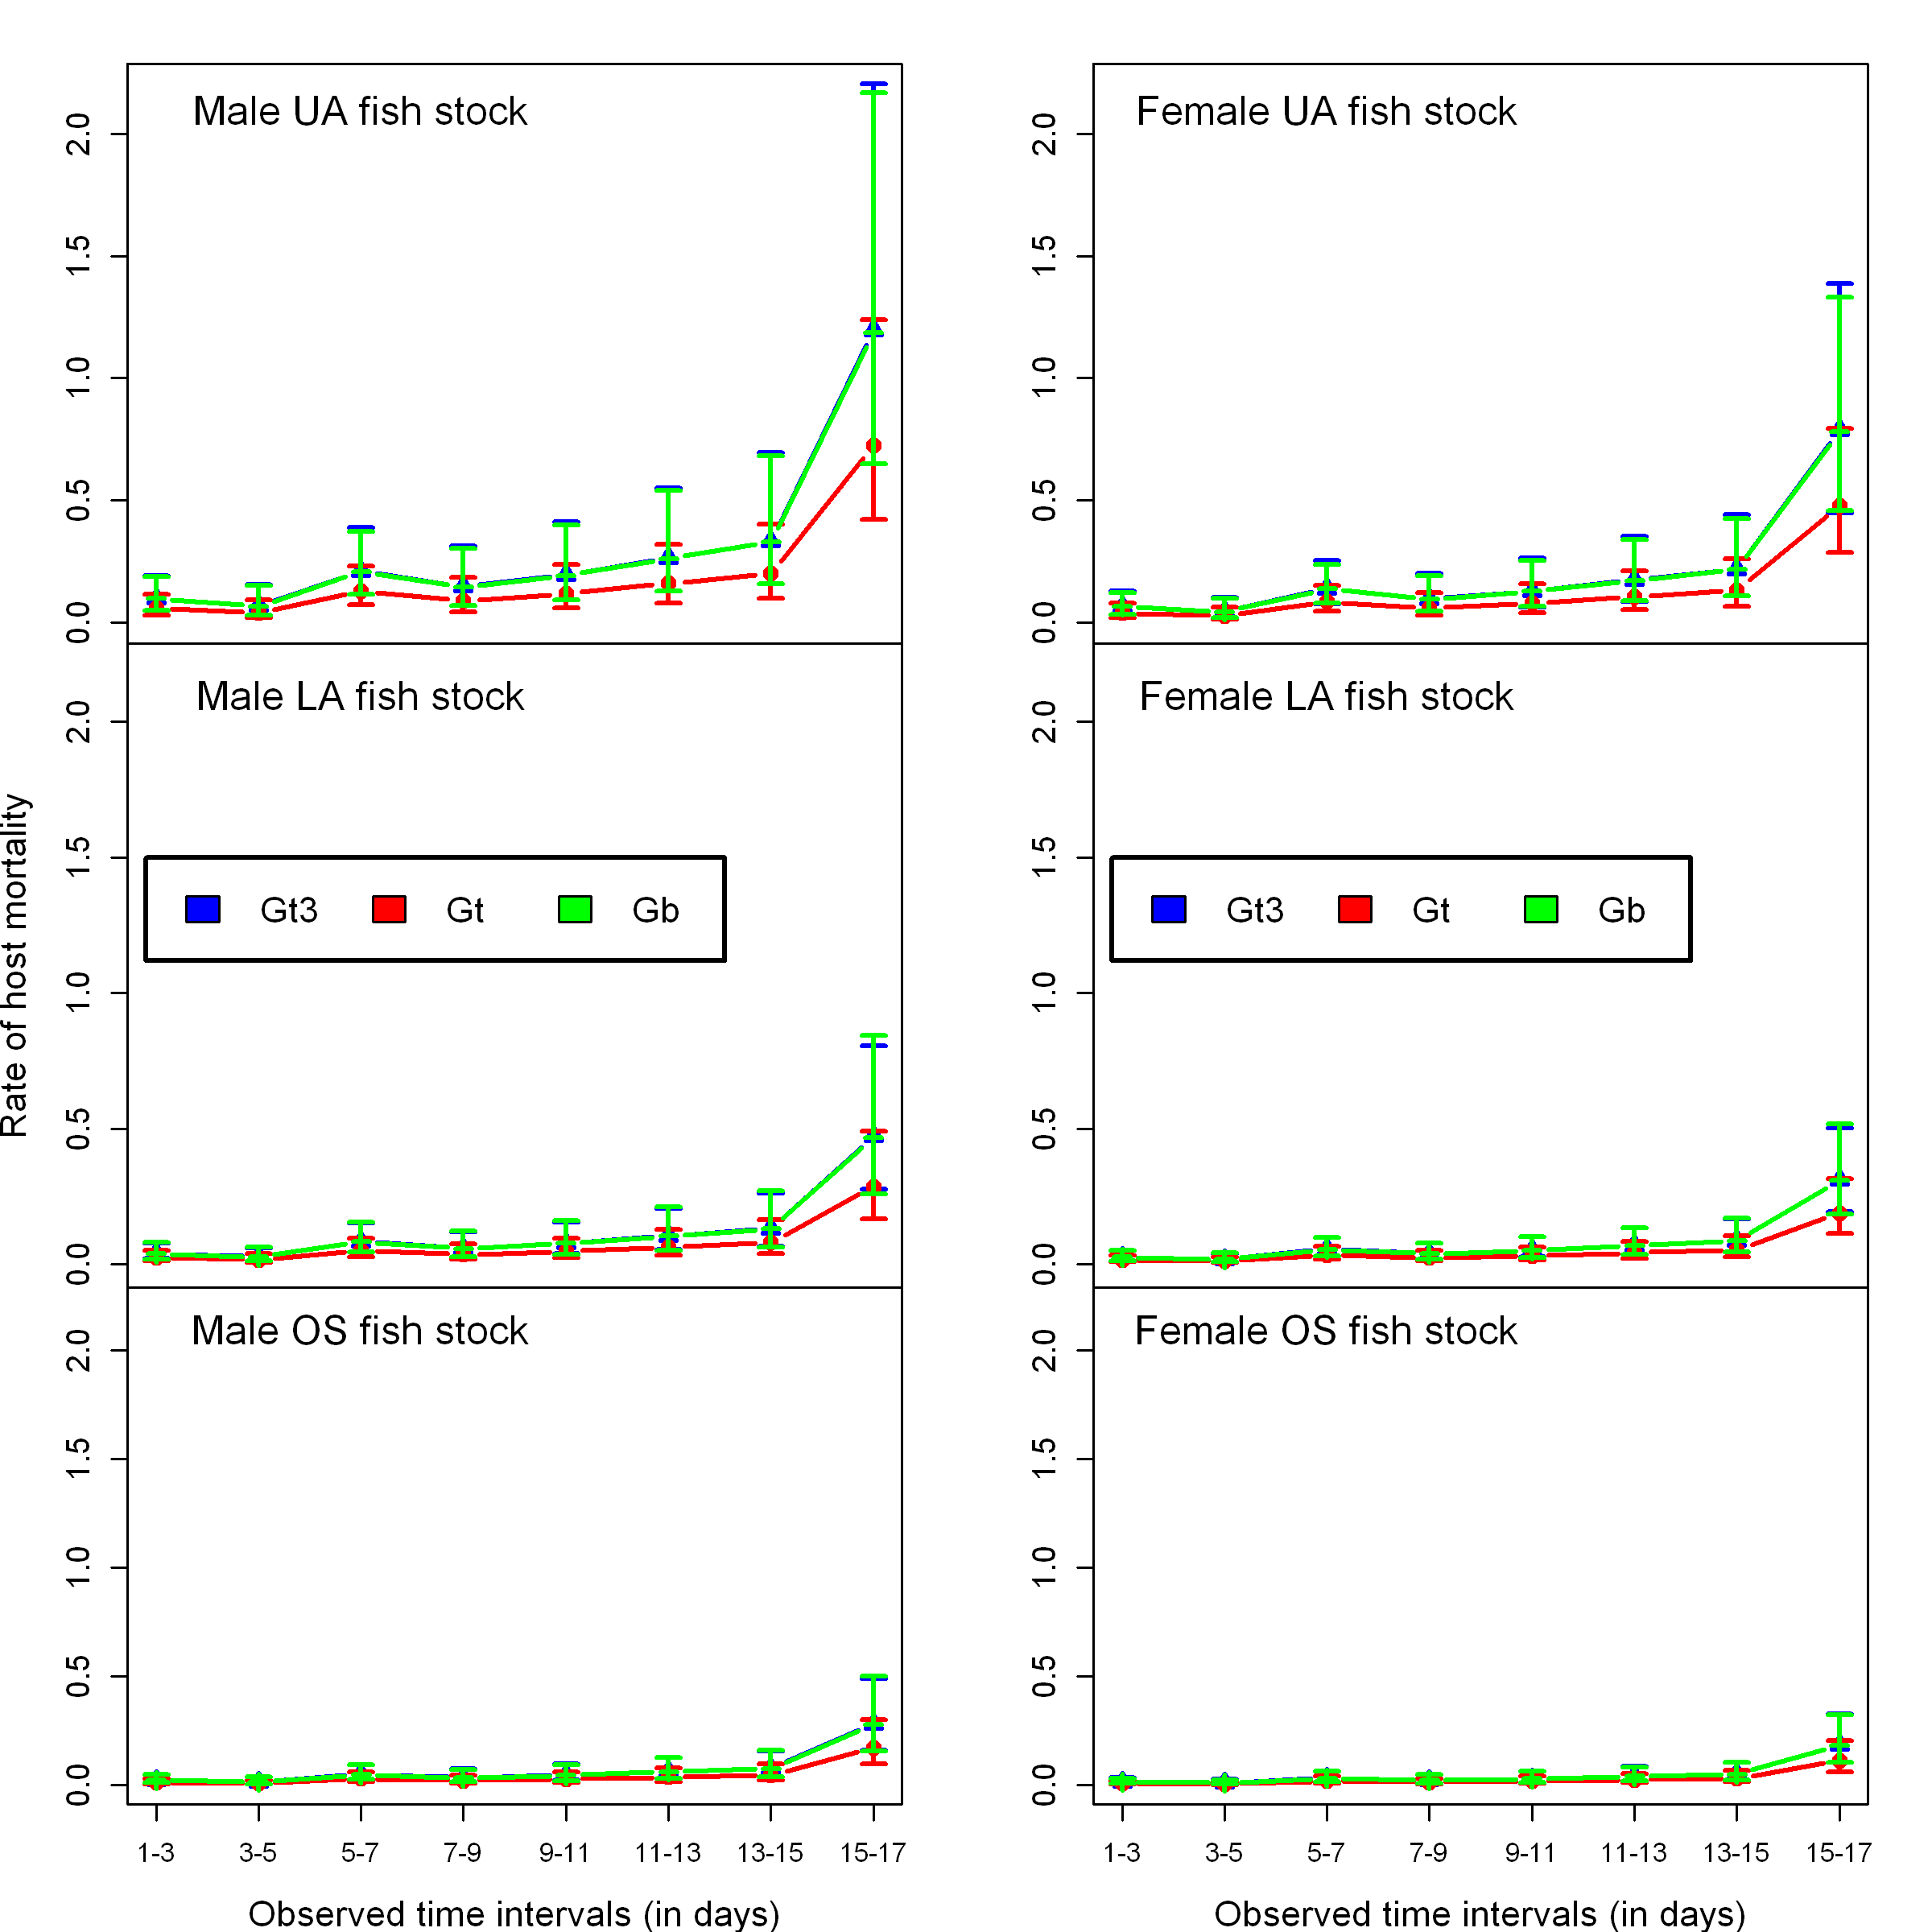

In [48]:
o<-par(mar=c(0,4,2,2))#Run this before the code below

nf<-layout(matrix(1:6, nrow=3,ncol=2))

    
par(o)#
o<-par(mar=c(0,4,2,2)) 

#first half of plot
plot(Gt3_fishType_Deathrate_malefish[1, ,][,1],type="b",col="blue",lwd=2,xaxt = "n",ylab="",xlab="",pch=24,cex.axis=1.2,
     ylim=c(0,2.2))
arrows(x0=1:8, y0=Gt3_fishType_Deathrate_malefish[1, ,][,2], x1=1:8, y1=Gt3_fishType_Deathrate_malefish[1, ,][,3], code=3, 
      angle=90, length=0.05,col ="blue",lwd=2)

lines(Gt_fishType_Deathrate_malefish[1, ,][,1],type="b",col="red",lwd=2,pch=19)
arrows(x0=1:8, y0=Gt_fishType_Deathrate_malefish[1, ,][,2], x1=1:8, y1=Gt_fishType_Deathrate_malefish[1, ,][,3], code=3, 
      angle=90, length=0.05,col ="red",lwd=2)

lines(Gb_fishType_Deathrate_malefish[1, ,][,1],type="b",col="green",lwd=2,pch=3)
arrows(x0=1:8, y0=Gb_fishType_Deathrate_malefish[1, ,][,2], x1=1:8, y1=Gb_fishType_Deathrate_malefish[1, ,][,3], code=3, 
      angle=90, length=0.05,col ="green",lwd=2)

text(3,2.1,"Male UA fish stock",cex=1.5,lwd=3)


o<-par(mar=c(0,4,0,2))
plot(Gt3_fishType_Deathrate_malefish[2, ,][,1],type="b",col="blue",lwd=2,xaxt = "n",ylab="",xlab="",
     ylim=c(0,2.2),pch=24,cex.lab=1.4, cex.axis=1.2)
arrows(x0=1:8, y0=Gt3_fishType_Deathrate_malefish[2, ,][,2], x1=1:8, y1=Gt3_fishType_Deathrate_malefish[2, ,][,3], code=3, 
      angle=90, length=0.05,col ="blue",lwd=2)

lines(Gt_fishType_Deathrate_malefish[2, ,][,1],type="b",col="red",lwd=2,pch=19)
arrows(x0=1:8, y0=Gt_fishType_Deathrate_malefish[2, ,][,2], x1=1:8, y1=Gt_fishType_Deathrate_malefish[2, ,][,3], code=3, 
      angle=90, length=0.05,col ="red",lwd=2)

lines(Gb_fishType_Deathrate_malefish[2, ,][,1],type="b",col="green",lwd=2,pch=3)
arrows(x0=1:8, y0=Gb_fishType_Deathrate_malefish[2, ,][,2], x1=1:8, y1=Gb_fishType_Deathrate_malefish[2, ,][,3], code=3, 
      angle=90, length=0.05,col ="green",lwd=2)

legend(x = .9,y=1.5,inset = 0,
        legend = c("Gt3","Gt","Gb"), 
        col=c("blue","red","green"), cex=1.35, horiz = TRUE,pt.cex = 1,
       box.lwd = 2,fill=c("blue","red","green"))




text(3,2.1,"Male LA fish stock",cex=1.5,lwd=3)


mtext(text = "Rate of host mortality",
      side = 2,#side 2 = left
      line = 3,cex=.9)

par(mar=c(4,4,0,2))

plot(Gt3_fishType_Deathrate_malefish[3, ,][,1],type="b",col="blue",lwd=2,xaxt = "n",ylab="",xlab="",
     pch=24,cex.lab=1.4, cex.axis=1.2,ylim=c(0,2.2))
arrows(x0=1:8, y0=Gt3_fishType_Deathrate_malefish[3, ,][,2], x1=1:8, y1=Gt3_fishType_Deathrate_malefish[3, ,][,3], code=3, 
      angle=90, length=0.05,col ="blue",lwd=2)


lines(Gt_fishType_Deathrate_malefish[3, ,][,1],type="b",col="red",lwd=2,pch=19)
arrows(x0=1:8, y0=Gt_fishType_Deathrate_malefish[3, ,][,2], x1=1:8, y1=Gt_fishType_Deathrate_malefish[3, ,][,3], code=3, 
      angle=90, length=0.05,col ="red",lwd=2)

lines(Gb_fishType_Deathrate_malefish[3, ,][,1],type="b",col="green",lwd=2,pch=3)
arrows(x0=1:8, y0=Gb_fishType_Deathrate_malefish[3, ,][,2], x1=1:8, y1=Gb_fishType_Deathrate_malefish[3, ,][,3], code=3, 
      angle=90, length=0.05,col ="green",lwd=2)

axis(1, at=1:8, labels=c("1-3","3-5","5-7","7-9","9-11","11-13","13-15","15-17"))
text(3,2.1,"Male OS fish stock",cex=1.5,lwd=3)

mtext(text = "Observed time intervals (in days)",
      side = 1,#side 1 = bottom
      line = 3,cex=.9)



#second half of plot
o<-par(mar=c(0,4,2,2))

plot(Gt3_fishType_Deathrate_femalefish[1, ,][,1],type="b",col="blue",lwd=2,xaxt = "n",ylab="",xlab="",pch=24,cex.axis=1.2,
     ylim=c(0,2.2))
arrows(x0=1:8, y0=Gt3_fishType_Deathrate_femalefish[1, ,][,2], x1=1:8, y1=Gt3_fishType_Deathrate_femalefish[1, ,][,3], code=3, 
      angle=90, length=0.05,col ="blue",lwd=2)

lines(Gt_fishType_Deathrate_femalefish[1, ,][,1],type="b",col="red",lwd=2,pch=19)
arrows(x0=1:8, y0=Gt_fishType_Deathrate_femalefish[1, ,][,2], x1=1:8, y1=Gt_fishType_Deathrate_femalefish[1, ,][,3], code=3, 
      angle=90, length=0.05,col ="red",lwd=2)

lines(Gb_fishType_Deathrate_femalefish[1, ,][,1],type="b",col="green",lwd=2,pch=3)
arrows(x0=1:8, y0=Gb_fishType_Deathrate_femalefish[1, ,][,2], x1=1:8, y1=Gb_fishType_Deathrate_femalefish[1, ,][,3], code=3, 
      angle=90, length=0.05,col ="green",lwd=2)

text(3,2.1,"Female UA fish stock",cex=1.5,lwd=3)


o<-par(mar=c(0,4,0,2))
plot(Gt3_fishType_Deathrate_femalefish[2, ,][,1],type="b",col="blue",lwd=2,xaxt = "n",ylab="",xlab="",
     ylim=c(0,2.2),pch=24,cex.lab=1.4, cex.axis=1.2)
arrows(x0=1:8, y0=Gt3_fishType_Deathrate_femalefish[2, ,][,2], x1=1:8, y1=Gt3_fishType_Deathrate_femalefish[2, ,][,3], code=3, 
      angle=90, length=0.05,col ="blue",lwd=2)

lines(Gt_fishType_Deathrate_femalefish[2, ,][,1],type="b",col="red",lwd=2,pch=19)
arrows(x0=1:8, y0=Gt_fishType_Deathrate_femalefish[2, ,][,2], x1=1:8, y1=Gt_fishType_Deathrate_femalefish[2, ,][,3], code=3, 
      angle=90, length=0.05,col ="red",lwd=2)

lines(Gb_fishType_Deathrate_femalefish[2, ,][,1],type="b",col="green",lwd=2,pch=3)
arrows(x0=1:8, y0=Gb_fishType_Deathrate_femalefish[2, ,][,2], x1=1:8, y1=Gb_fishType_Deathrate_femalefish[2, ,][,3], code=3, 
      angle=90, length=0.05,col ="green",lwd=2)

legend(x = .9,y=1.5,,inset = 0,
        legend = c("Gt3","Gt","Gb"), 
        col=c("blue","red","green"), cex=1.35, horiz = TRUE,pt.cex = 1,
       box.lwd = 2,fill=c("blue","red","green"))

text(3,2.1,"Female LA fish stock",cex=1.5,lwd=3)

#mtext(text = "Predicted host mortality rate",
 #     side = 2,#side 2 = left
 #     line = 3,cex=.9)

par(mar=c(4,4,0,2))

plot(Gt3_fishType_Deathrate_femalefish[3, ,][,1],type="b",col="blue",lwd=2,xaxt = "n",ylab="",xlab="",
     pch=24,cex.lab=1.4, cex.axis=1.2,ylim=c(0,2.2))
arrows(x0=1:8, y0=Gt3_fishType_Deathrate_femalefish[3, ,][,2], x1=1:8, y1=Gt3_fishType_Deathrate_femalefish[3, ,][,3], code=3, 
      angle=90, length=0.05,col ="blue",lwd=2)


lines(Gt_fishType_Deathrate_femalefish[3, ,][,1],type="b",col="red",lwd=2,pch=19)
arrows(x0=1:8, y0=Gt_fishType_Deathrate_femalefish[3, ,][,2], x1=1:8, y1=Gt_fishType_Deathrate_femalefish[3, ,][,3], code=3, 
      angle=90, length=0.05,col ="red",lwd=2)

lines(Gb_fishType_Deathrate_femalefish[3, ,][,1],type="b",col="green",lwd=2,pch=3)
arrows(x0=1:8, y0=Gb_fishType_Deathrate_femalefish[3, ,][,2], x1=1:8, y1=Gb_fishType_Deathrate_femalefish[3, ,][,3], code=3, 
      angle=90, length=0.05,col ="green",lwd=2)

axis(1, at=1:8, labels=c("1-3","3-5","5-7","7-9","9-11","11-13","13-15","15-17"))
text(3,2.1,"Female OS fish stock",cex=1.5,lwd=3)

mtext(text = "Observed time intervals (in days)",
      side = 1,#side 1 = bottom
      line = 3,cex=.9)

par(o)

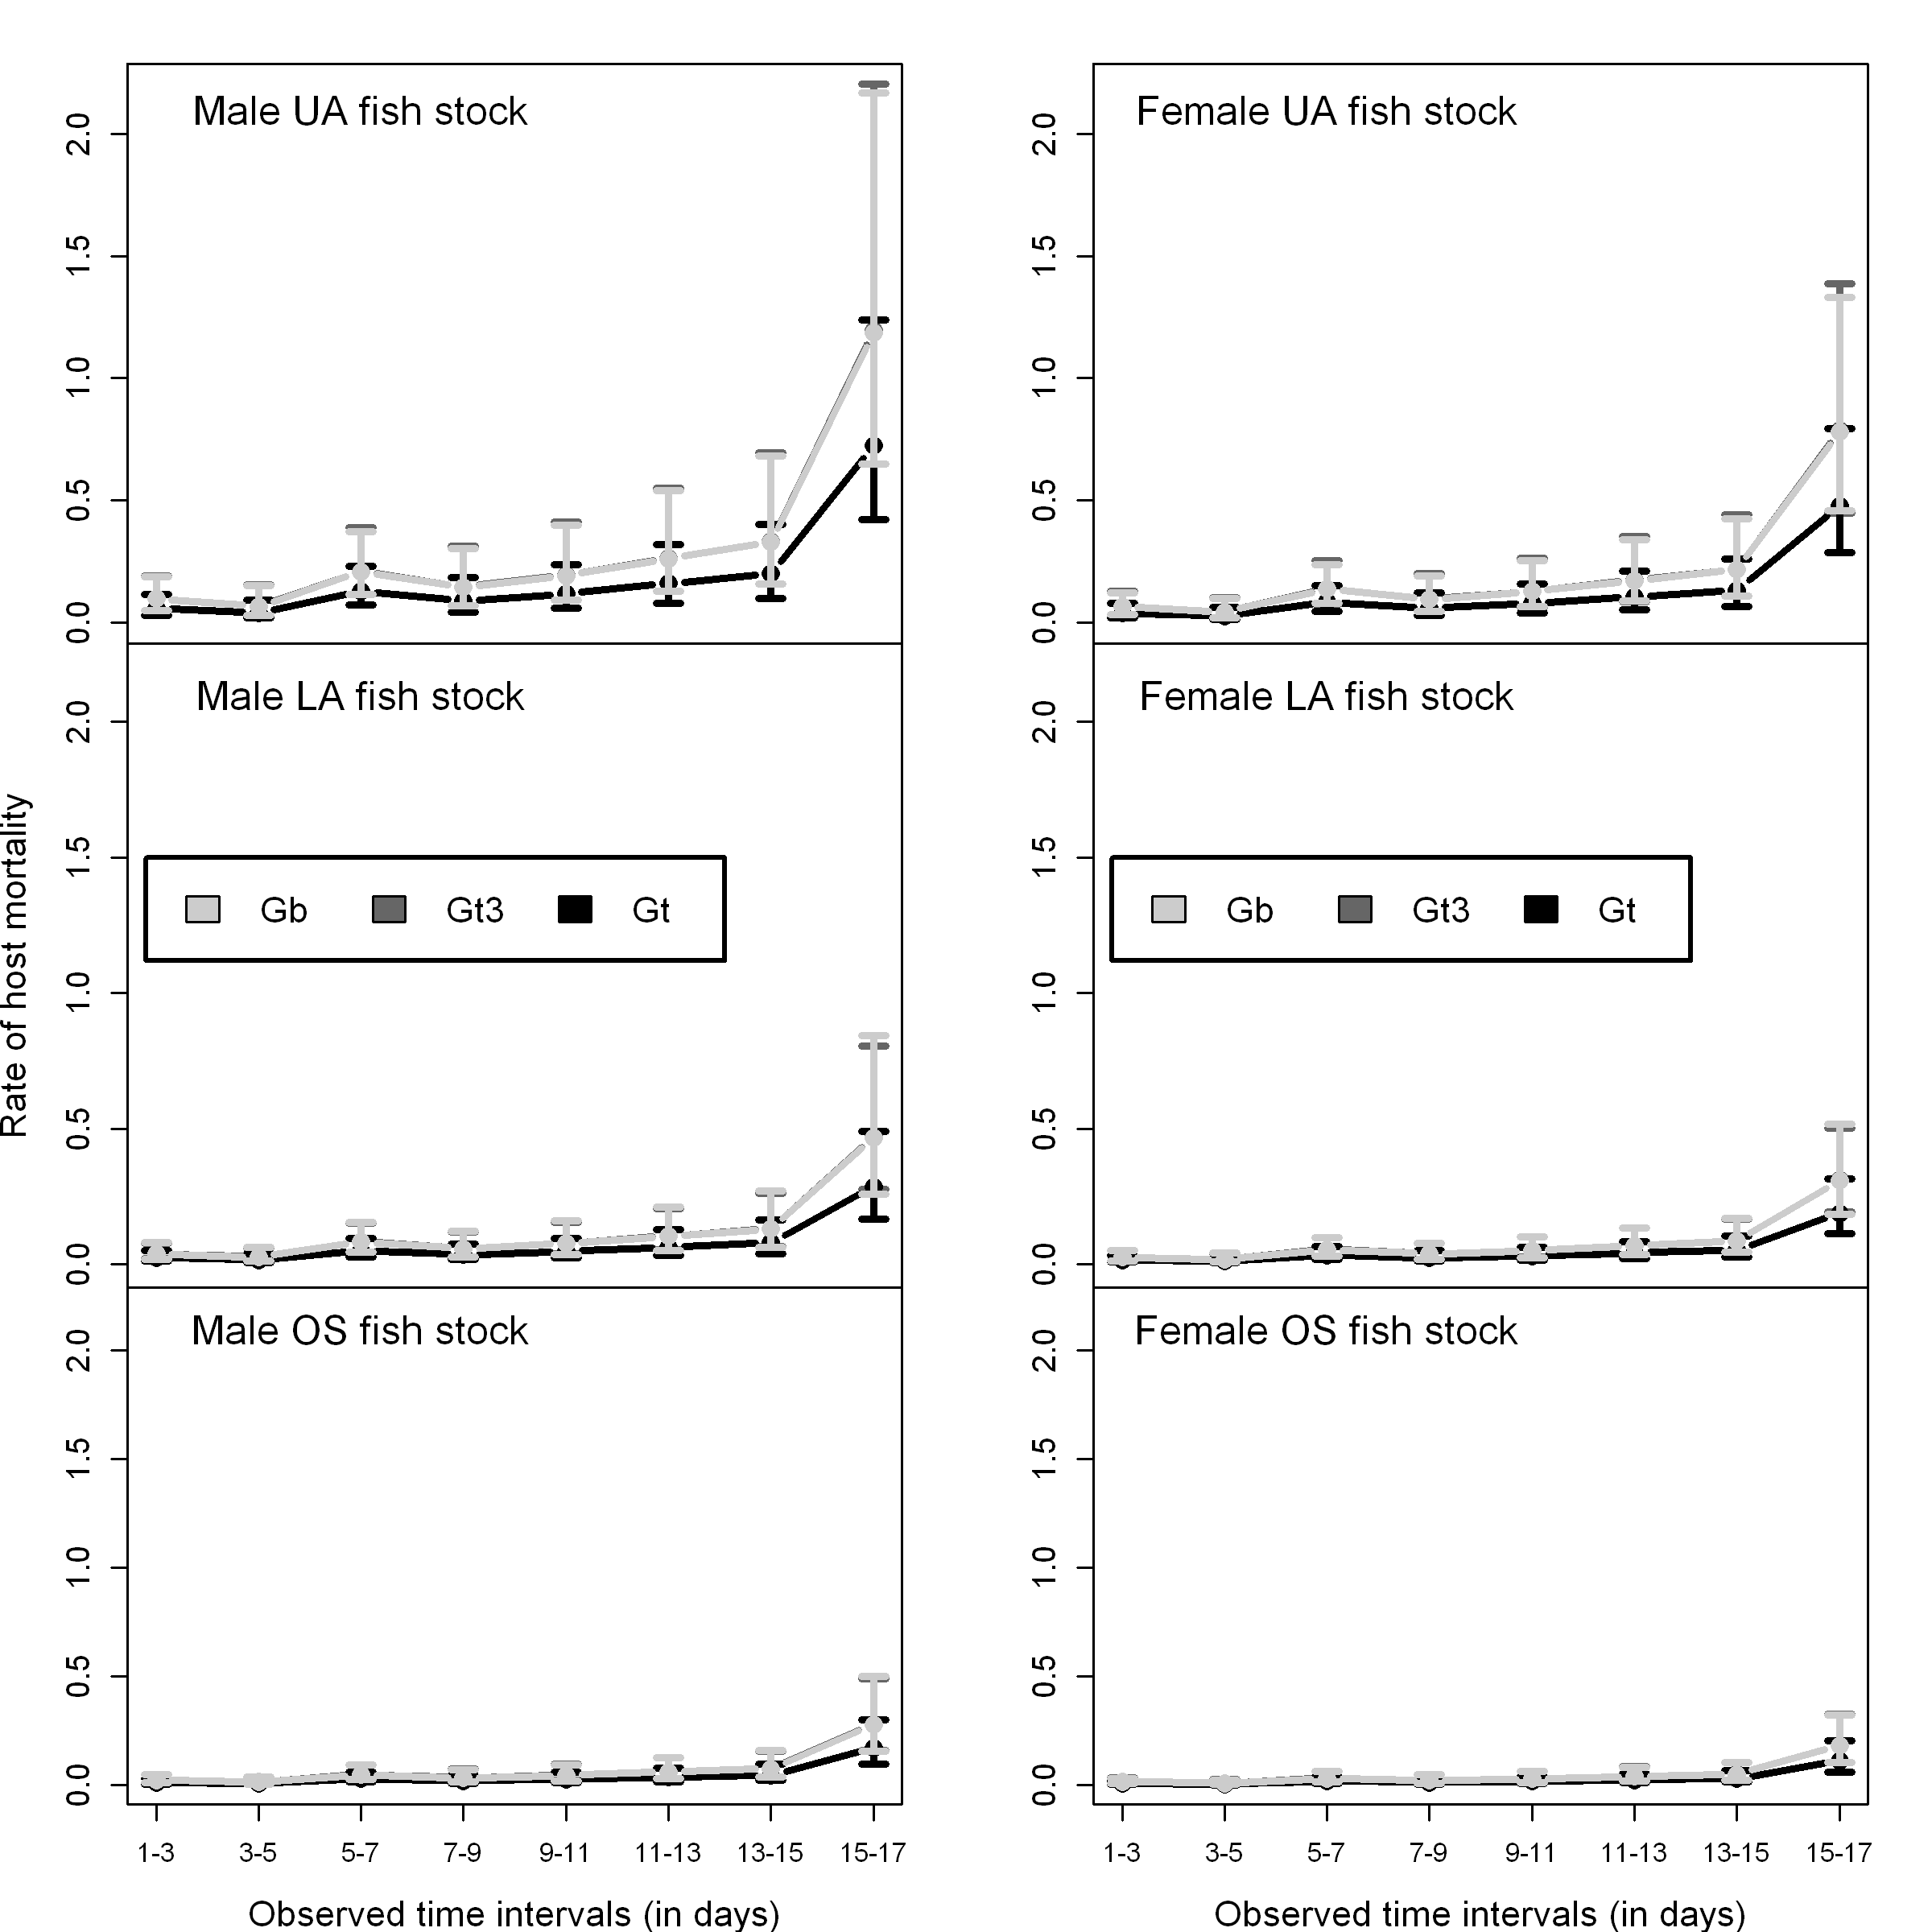

In [99]:
o<-par(mar=c(0,4,2,2))#Run this before the code below

nf<-layout(matrix(1:6, nrow=3,ncol=2))

 
par(o)#
o<-par(mar=c(0,4,2,2)) 

#first half of plot
plot(Gt3_fishType_Deathrate_malefish[1, ,][,1],type="b",col="grey40",lwd=3,xaxt = "n",ylab="",xlab="",cex.axis=1.2,
     ylim=c(0,2.2))
arrows(x0=1:8, y0=Gt3_fishType_Deathrate_malefish[1, ,][,2], x1=1:8, y1=Gt3_fishType_Deathrate_malefish[1, ,][,3], code=3, 
      angle=90, length=0.05,col ="grey40",lwd=3)

lines(Gt_fishType_Deathrate_malefish[1, ,][,1],type="b",col="grey0",lwd=3)
arrows(x0=1:8, y0=Gt_fishType_Deathrate_malefish[1, ,][,2], x1=1:8, y1=Gt_fishType_Deathrate_malefish[1, ,][,3], code=3, 
      angle=90, length=0.05,col ="grey0",lwd=3)

lines(Gb_fishType_Deathrate_malefish[1, ,][,1],type="b",col="grey80",lwd=3)
arrows(x0=1:8, y0=Gb_fishType_Deathrate_malefish[1, ,][,2], x1=1:8, y1=Gb_fishType_Deathrate_malefish[1, ,][,3], code=3, 
      angle=90, length=0.05,col ="grey80",lwd=3)

text(3,2.1,"Male UA fish stock",cex=1.5,lwd=3)


o<-par(mar=c(0,4,0,2))
plot(Gt3_fishType_Deathrate_malefish[2, ,][,1],type="b",col="grey40",lwd=3,xaxt = "n",ylab="",xlab="",
     ylim=c(0,2.2),cex.lab=1.4, cex.axis=1.2)
arrows(x0=1:8, y0=Gt3_fishType_Deathrate_malefish[2, ,][,2], x1=1:8, y1=Gt3_fishType_Deathrate_malefish[2, ,][,3], code=3, 
      angle=90, length=0.05,col ="grey40",lwd=3)

lines(Gt_fishType_Deathrate_malefish[2, ,][,1],type="b",col="grey0",lwd=3)
arrows(x0=1:8, y0=Gt_fishType_Deathrate_malefish[2, ,][,2], x1=1:8, y1=Gt_fishType_Deathrate_malefish[2, ,][,3], code=3, 
      angle=90, length=0.05,col ="grey0",lwd=3)

lines(Gb_fishType_Deathrate_malefish[2, ,][,1],type="b",col="grey80",lwd=3)
arrows(x0=1:8, y0=Gb_fishType_Deathrate_malefish[2, ,][,2], x1=1:8, y1=Gb_fishType_Deathrate_malefish[2, ,][,3], code=3, 
      angle=90, length=0.05,col ="grey80",lwd=3)

legend(x = .9,y=1.5,,inset = 0,
        legend = c("Gb","Gt3","Gt"), 
        col=c("grey80","grey40","grey0"), cex=1.35, horiz = TRUE,pt.cex = 1,
      box.lwd = 2,
       fill=c("grey80","grey40","grey0"))

text(3,2.1,"Male LA fish stock",cex=1.5,lwd=3)


mtext(text = "Rate of host mortality",
      side = 2,#side 2 = left
      line = 3,cex=.9)

par(mar=c(4,4,0,2))

plot(Gt3_fishType_Deathrate_malefish[3, ,][,1],type="b",col="grey40",lwd=3,xaxt = "n",ylab="",xlab=""
     ,cex.lab=1.4, cex.axis=1.2,ylim=c(0,2.2))
arrows(x0=1:8, y0=Gt3_fishType_Deathrate_malefish[3, ,][,2], x1=1:8, y1=Gt3_fishType_Deathrate_malefish[3, ,][,3], code=3, 
      angle=90, length=0.05,col ="grey40",lwd=3)


lines(Gt_fishType_Deathrate_malefish[3, ,][,1],type="b",col="grey0",lwd=3)
arrows(x0=1:8, y0=Gt_fishType_Deathrate_malefish[3, ,][,2], x1=1:8, y1=Gt_fishType_Deathrate_malefish[3, ,][,3], code=3, 
      angle=90, length=0.05,col ="grey0",lwd=3)

lines(Gb_fishType_Deathrate_malefish[3, ,][,1],type="b",col="grey80",lwd=3)
arrows(x0=1:8, y0=Gb_fishType_Deathrate_malefish[3, ,][,2], x1=1:8, y1=Gb_fishType_Deathrate_malefish[3, ,][,3], code=3, 
      angle=90, length=0.05,col ="grey80",lwd=3)

axis(1, at=1:8, labels=c("1-3","3-5","5-7","7-9","9-11","11-13","13-15","15-17"))
text(3,2.1,"Male OS fish stock",cex=1.5,lwd=3)

mtext(text = "Observed time intervals (in days)",
      side = 1,#side 1 = bottom
      line = 3,cex=.9)



#second half of plot
o<-par(mar=c(0,4,2,2))

plot(Gt3_fishType_Deathrate_femalefish[1, ,][,1],type="b",col="grey40",lwd=3,xaxt = "n",ylab="",xlab="",cex.axis=1.2,
     ylim=c(0,2.2))
arrows(x0=1:8, y0=Gt3_fishType_Deathrate_femalefish[1, ,][,2], x1=1:8, y1=Gt3_fishType_Deathrate_femalefish[1, ,][,3], code=3, 
      angle=90, length=0.05,col ="grey40",lwd=3)

lines(Gt_fishType_Deathrate_femalefish[1, ,][,1],type="b",col="grey0",lwd=3)
arrows(x0=1:8, y0=Gt_fishType_Deathrate_femalefish[1, ,][,2], x1=1:8, y1=Gt_fishType_Deathrate_femalefish[1, ,][,3], code=3, 
      angle=90, length=0.05,col ="grey0",lwd=3)

lines(Gb_fishType_Deathrate_femalefish[1, ,][,1],type="b",col="grey80",lwd=3)
arrows(x0=1:8, y0=Gb_fishType_Deathrate_femalefish[1, ,][,2], x1=1:8, y1=Gb_fishType_Deathrate_femalefish[1, ,][,3], code=3, 
      angle=90, length=0.05,col ="grey80",lwd=3)

text(3,2.1,"Female UA fish stock",cex=1.5,lwd=3)


o<-par(mar=c(0,4,0,2))
plot(Gt3_fishType_Deathrate_femalefish[2, ,][,1],type="b",col="grey40",lwd=3,xaxt = "n",ylab="",xlab="",
     ylim=c(0,2.2),cex.lab=1.4, cex.axis=1.2)
arrows(x0=1:8, y0=Gt3_fishType_Deathrate_femalefish[2, ,][,2], x1=1:8, y1=Gt3_fishType_Deathrate_femalefish[2, ,][,3], code=3, 
      angle=90, length=0.05,col ="grey40",lwd=3)

lines(Gt_fishType_Deathrate_femalefish[2, ,][,1],type="b",col="grey0",lwd=3)
arrows(x0=1:8, y0=Gt_fishType_Deathrate_femalefish[2, ,][,2], x1=1:8, y1=Gt_fishType_Deathrate_femalefish[2, ,][,3], code=3, 
      angle=90, length=0.05,col ="grey0",lwd=3)

lines(Gb_fishType_Deathrate_femalefish[2, ,][,1],type="b",col="grey80",lwd=3)
arrows(x0=1:8, y0=Gb_fishType_Deathrate_femalefish[2, ,][,2], x1=1:8, y1=Gb_fishType_Deathrate_femalefish[2, ,][,3], code=3, 
      angle=90, length=0.05,col ="grey80",lwd=3)

legend(x = .9,y=1.5,,inset = 0,
        legend = c("Gb","Gt3","Gt"), 
        col=c("grey80","grey40","grey0"), cex=1.35, horiz = TRUE,pt.cex = 1,
     box.lwd = 2,fill=c("grey80","grey40","grey0"))



text(3,2.1,"Female LA fish stock",cex=1.5,lwd=3)

#mtext(text = "Predicted host mortality rate",
 #     side = 2,#side 2 = left
 #     line = 3,cex=.9)

par(mar=c(4,4,0,2))

plot(Gt3_fishType_Deathrate_femalefish[3, ,][,1],type="b",col="grey40",lwd=3,xaxt = "n",ylab="",xlab=""
     ,cex.lab=1.4, cex.axis=1.2,ylim=c(0,2.2))
arrows(x0=1:8, y0=Gt3_fishType_Deathrate_femalefish[3, ,][,2], x1=1:8, y1=Gt3_fishType_Deathrate_femalefish[3, ,][,3], code=3, 
      angle=90, length=0.05,col ="grey40",lwd=3)


lines(Gt_fishType_Deathrate_femalefish[3, ,][,1],type="b",col="grey0",lwd=3)
arrows(x0=1:8, y0=Gt_fishType_Deathrate_femalefish[3, ,][,2], x1=1:8, y1=Gt_fishType_Deathrate_femalefish[3, ,][,3], code=3, 
      angle=90, length=0.05,col ="grey0",lwd=3)

lines(Gb_fishType_Deathrate_femalefish[3, ,][,1],type="b",col="grey80",lwd=3)
arrows(x0=1:8, y0=Gb_fishType_Deathrate_femalefish[3, ,][,2], x1=1:8, y1=Gb_fishType_Deathrate_femalefish[3, ,][,3], code=3, 
      angle=90, length=0.05,col ="grey80",lwd=3)

axis(1, at=1:8, labels=c("1-3","3-5","5-7","7-9","9-11","11-13","13-15","15-17"))
text(3,2.1,"Female OS fish stock",cex=1.5,lwd=3)

mtext(text = "Observed time intervals (in days)",
      side = 1,#side 1 = bottom
      line = 3,cex=.9)

par(o)

# Plot of predicted rate of recovery of each parasite strain across the fish type

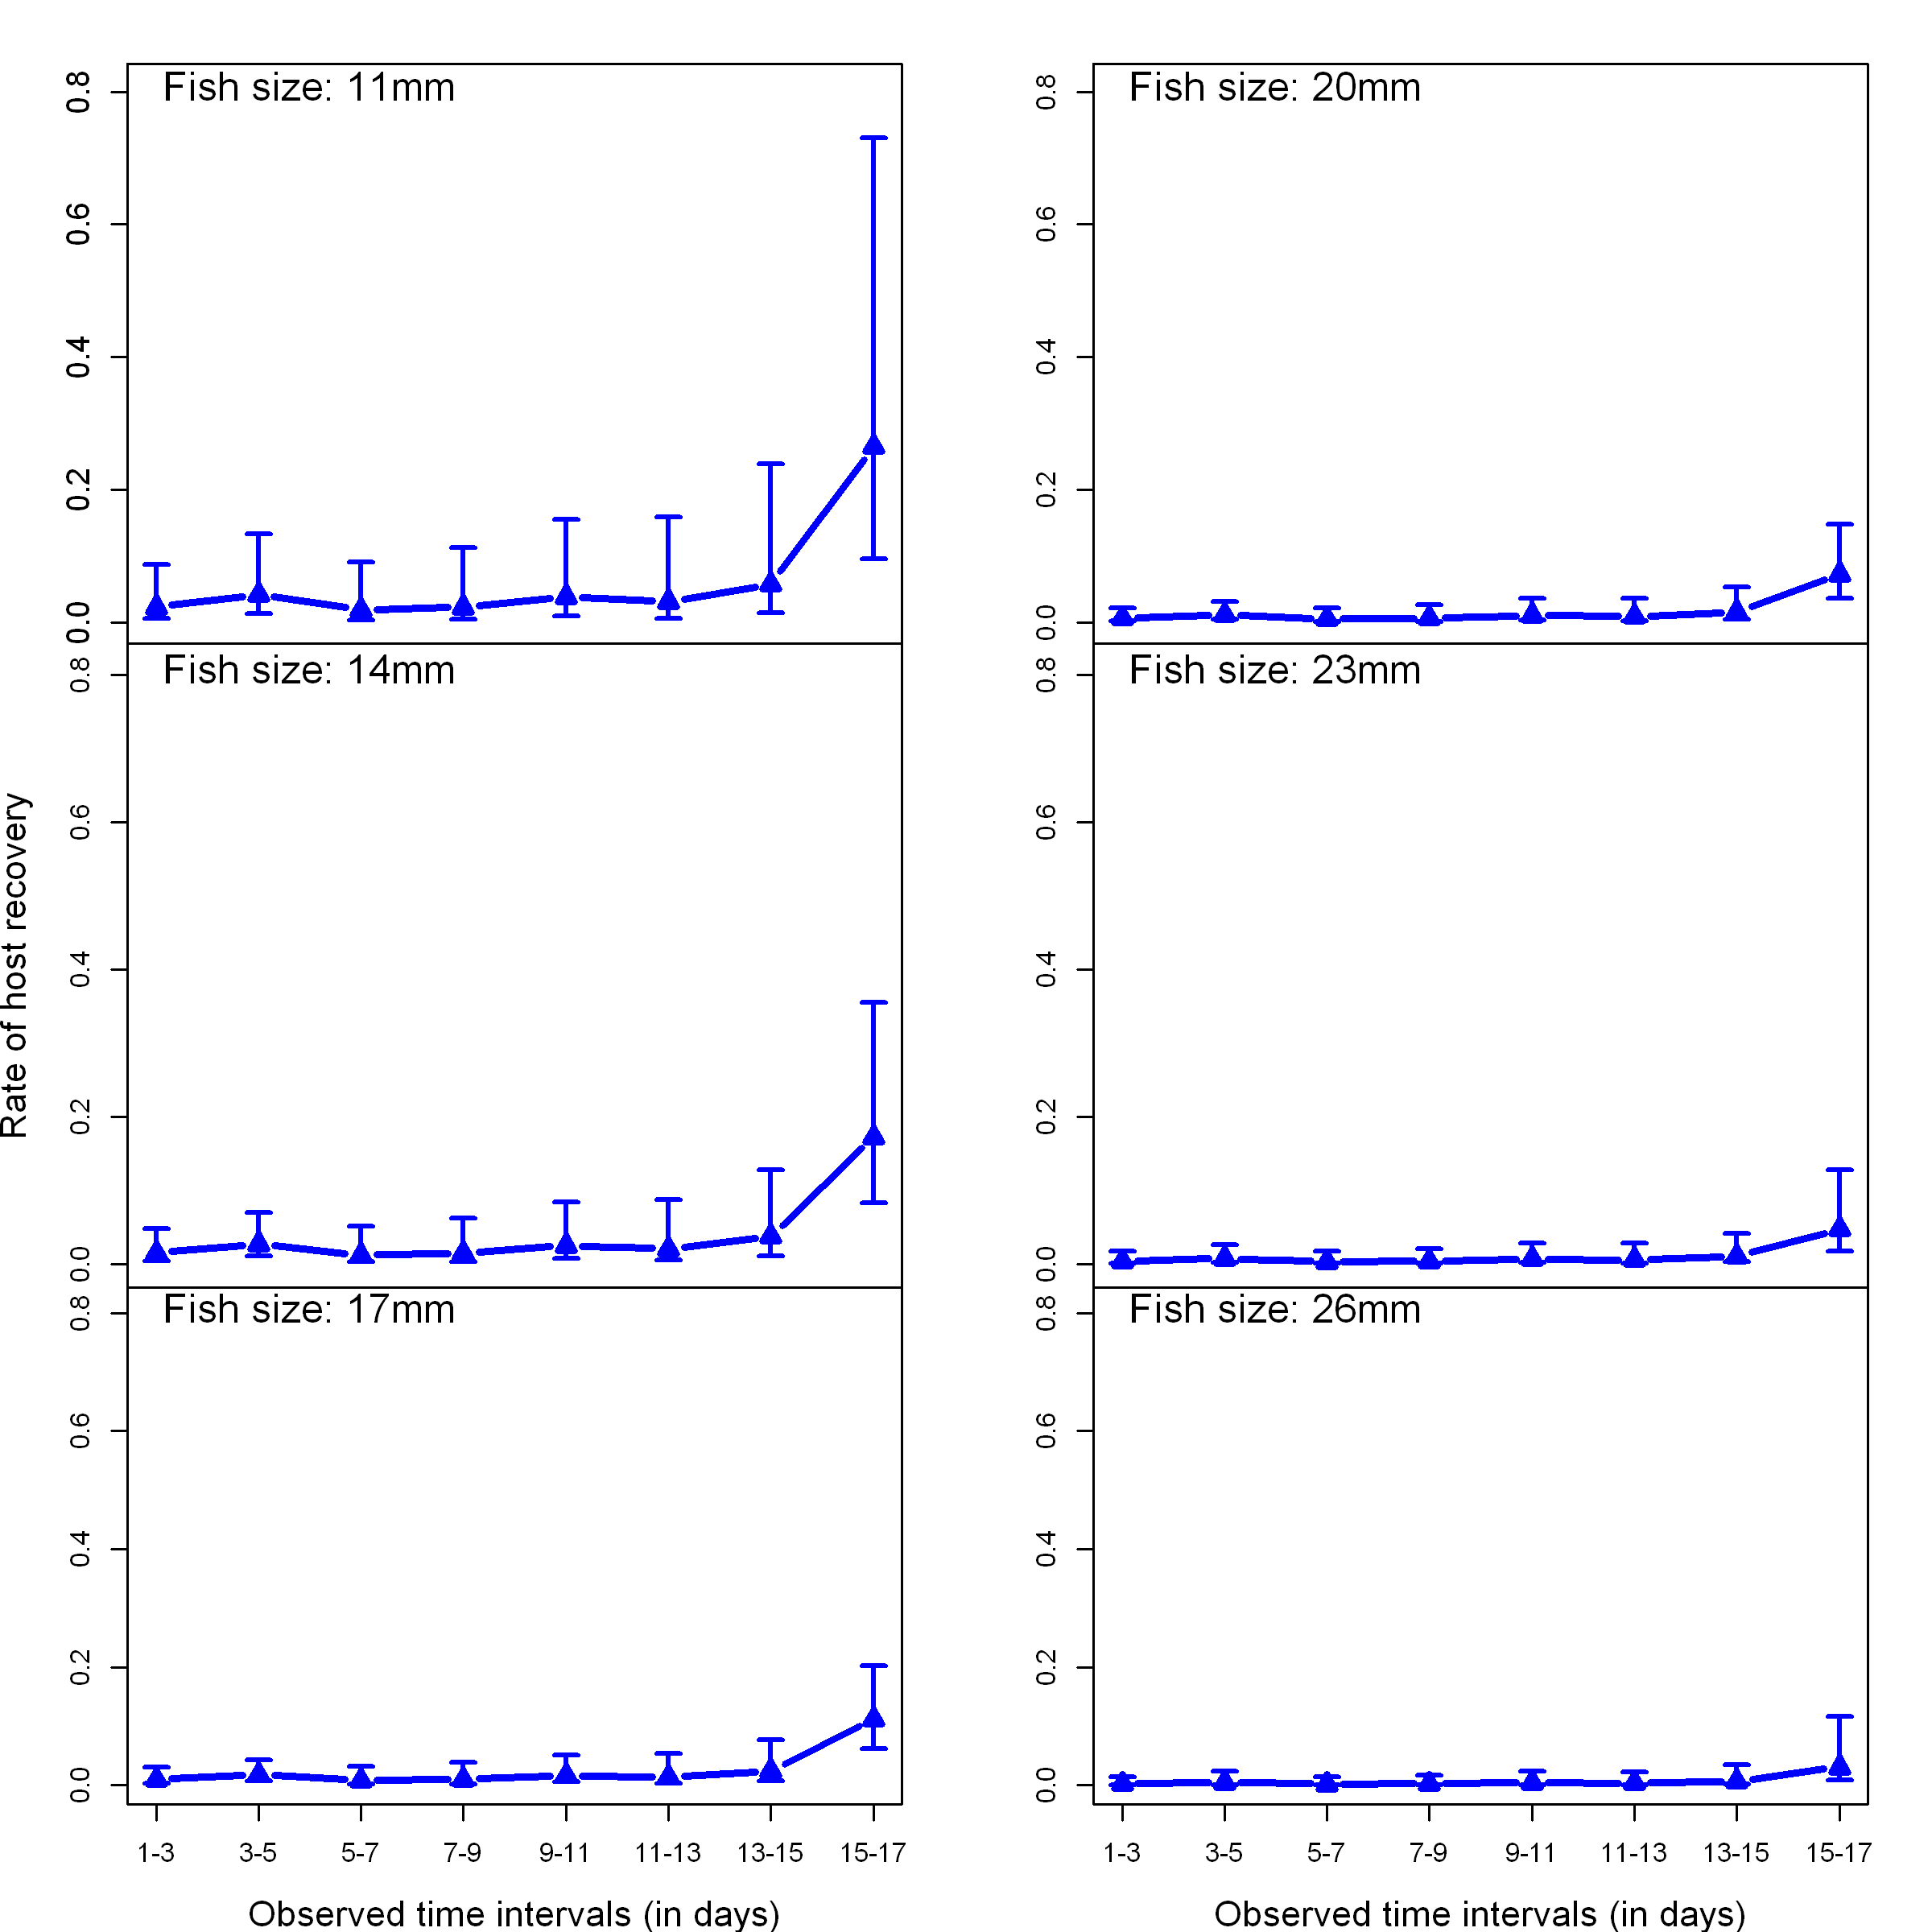

In [64]:
o<-par(mar=c(0,4,2,2))#Run this before the code below

nf<-layout(matrix(1:6, nrow=3,ncol=2))

par(o)#
o<-par(mar=c(0,4,2,2))

#first half of plot
plot(Recoveryrate_fishsize[1, ,][,1],type="b",col="blue",lwd=3,xaxt = "n",ylab="",xlab="",
     ylim=c(0,.81),pch=24,cex.lab=1.4, cex.axis=1.2)
arrows(x0=1:8, y0=Recoveryrate_fishsize[1, ,][,2], x1=1:8, y1=Recoveryrate_fishsize[1, ,][,3], code=3, 
      angle=90, length=0.05,col ="blue",lwd=2)
text(2.5,.81,"Fish size: 11mm",cex=1.5,lwd=3)

o<-par(mar=c(0,4,0,2))
plot(Recoveryrate_fishsize[2, ,][,1],type="b",col="blue",lwd=3,pch=24,xaxt = "n",ylab="",xlab="",ylim=c(0,.81))
arrows(x0=1:8, y0=Recoveryrate_fishsize[2, ,][,2], x1=1:8, y1=Recoveryrate_fishsize[2, ,][,3], code=3, 
      angle=90, length=0.05,col ="blue",lwd=2)
text(2.5,.81,"Fish size: 14mm",cex=1.5,lwd=3)

mtext(text = "Rate of host recovery",
      side = 2,#side left
      line = 3,cex=.9)

par(mar=c(4,4,0,2))
plot(Recoveryrate_fishsize[3, ,][,1],type="b",col="blue",lwd=3,pch=24,xaxt = "n",ylab="",
     xlab="",ylim=c(0,.81))
arrows(x0=1:8, y0=Recoveryrate_fishsize[3, ,][,2], x1=1:8, y1=Recoveryrate_fishsize[3, ,][,3], code=3, 
      angle=90, length=0.05,col ="blue",lwd=2)
axis(1, at=1:8, labels=c("1-3","3-5","5-7","7-9","9-11","11-13","13-15","15-17"))

text(2.5,.81,"Fish size: 17mm",cex=1.5,lwd=3)
mtext(text = "Observed time intervals (in days)",
      side = 1,#side 1 = bottom
      line = 3,cex=.9)

#second half of plot
o<-par(mar=c(0,4,2,2))
plot(Recoveryrate_fishsize[4, ,][,1],type="b",col="blue",lwd=3,pch=24,xaxt = "n",ylab="",xlab="",ylim=c(0,.81))
arrows(x0=1:8, y0=Recoveryrate_fishsize[4, ,][,2], x1=1:8, y1=Recoveryrate_fishsize[4, ,][,3], code=3, 
      angle=90, length=0.05,col ="blue",lwd=2)
text(2.5,.81,"Fish size: 20mm",cex=1.5,lwd=3)

o<-par(mar=c(0,4,0,2))
plot(Recoveryrate_fishsize[5, ,][,1],type="b",col="blue",lwd=3,pch=24,xaxt = "n",ylab="",xlab="",ylim=c(0,.81))
arrows(x0=1:8, y0=Recoveryrate_fishsize[5, ,][,2], x1=1:8, y1=Recoveryrate_fishsize[5, ,][,3], code=3, 
      angle=90, length=0.05,col ="blue",lwd=2)
text(2.5,.81,"Fish size: 23mm",cex=1.5,lwd=3)

par(mar=c(4,4,0,2))
plot(Recoveryrate_fishsize[6, ,][,1],type="b",col="blue",lwd=3,pch=24,xaxt = "n",ylab="",
     xlab="",ylim=c(0,.81))
arrows(x0=1:8, y0=Recoveryrate_fishsize[6, ,][,2], x1=1:8, y1=Recoveryrate_fishsize[6, ,][,3], code=3, 
      angle=90, length=0.05,col ="blue",lwd=2)
axis(1, at=1:8, labels=c("1-3","3-5","5-7","7-9","9-11","11-13","13-15","15-17"))

text(2.5,.81,"Fish size: 26mm",cex=1.5,lwd=3)
mtext(text = "Observed time intervals (in days)",
      side = 1,#side 1 = bottom
      line = 3,cex=.9)



par(o)

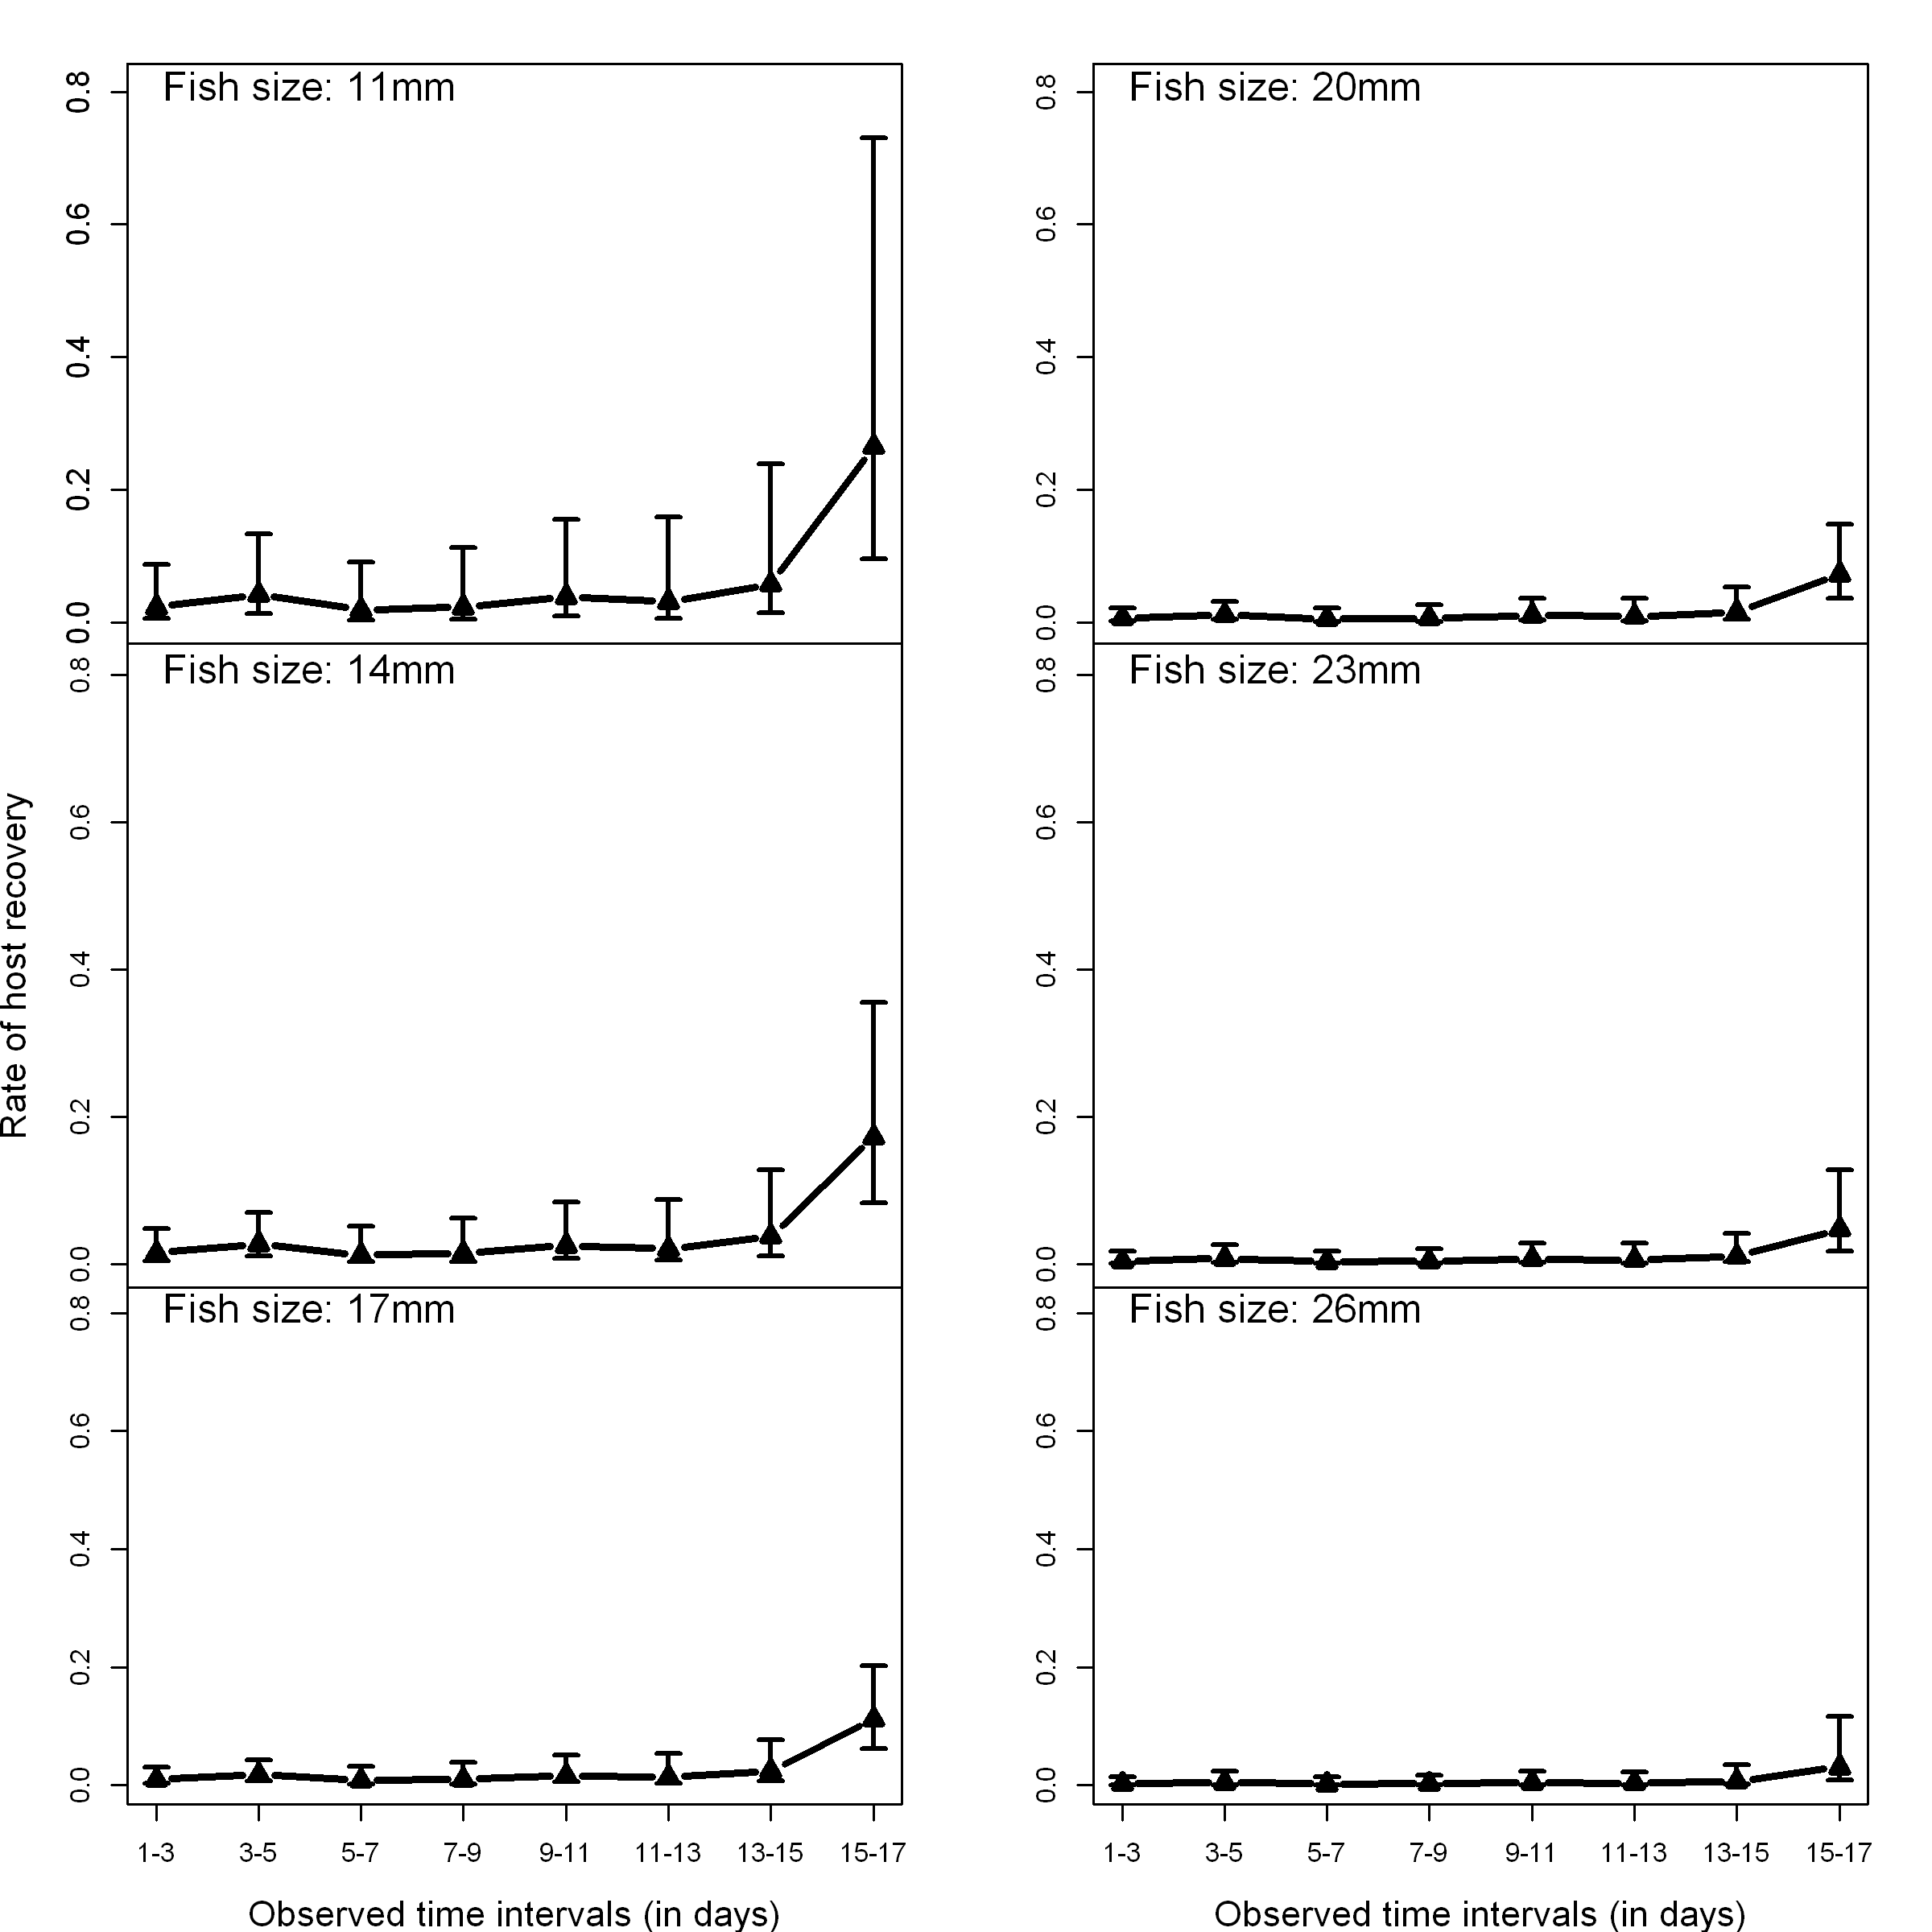

In [71]:
o<-par(mar=c(0,4,2,2))#Run this before the code below

nf<-layout(matrix(1:6, nrow=3,ncol=2))

par(o)#
o<-par(mar=c(0,4,2,2))

#first half of plot
plot(Recoveryrate_fishsize[1, ,][,1],type="b",col="black",lwd=3,xaxt = "n",ylab="",xlab="",
     ylim=c(0,.81),pch=24,cex.lab=1.4, cex.axis=1.2)
arrows(x0=1:8, y0=Recoveryrate_fishsize[1, ,][,2], x1=1:8, y1=Recoveryrate_fishsize[1, ,][,3], code=3, 
      angle=90, length=0.05,col ="black",lwd=2)
text(2.5,.81,"Fish size: 11mm",cex=1.5,lwd=3)

o<-par(mar=c(0,4,0,2))
plot(Recoveryrate_fishsize[2, ,][,1],type="b",col="black",lwd=3,pch=24,xaxt = "n",ylab="",xlab="",ylim=c(0,.81))
arrows(x0=1:8, y0=Recoveryrate_fishsize[2, ,][,2], x1=1:8, y1=Recoveryrate_fishsize[2, ,][,3], code=3, 
      angle=90, length=0.05,col ="black",lwd=2)
text(2.5,.81,"Fish size: 14mm",cex=1.5,lwd=3)

mtext(text = "Rate of host recovery",
      side = 2,#side left
      line = 3,cex=.9)

par(mar=c(4,4,0,2))
plot(Recoveryrate_fishsize[3, ,][,1],type="b",col="black",lwd=3,pch=24,xaxt = "n",ylab="",
     xlab="",ylim=c(0,.81))
arrows(x0=1:8, y0=Recoveryrate_fishsize[3, ,][,2], x1=1:8, y1=Recoveryrate_fishsize[3, ,][,3], code=3, 
      angle=90, length=0.05,col ="black",lwd=2)
axis(1, at=1:8, labels=c("1-3","3-5","5-7","7-9","9-11","11-13","13-15","15-17"))

text(2.5,.81,"Fish size: 17mm",cex=1.5,lwd=3)
mtext(text = "Observed time intervals (in days)",
      side = 1,#side 1 = bottom
      line = 3,cex=.9)

#second half of plot
o<-par(mar=c(0,4,2,2))
plot(Recoveryrate_fishsize[4, ,][,1],type="b",col="black",lwd=3,pch=24,xaxt = "n",ylab="",xlab="",ylim=c(0,.81))
arrows(x0=1:8, y0=Recoveryrate_fishsize[4, ,][,2], x1=1:8, y1=Recoveryrate_fishsize[4, ,][,3], code=3, 
      angle=90, length=0.05,col ="black",lwd=2)
text(2.5,.81,"Fish size: 20mm",cex=1.5,lwd=3)

o<-par(mar=c(0,4,0,2))
plot(Recoveryrate_fishsize[5, ,][,1],type="b",col="black",lwd=3,pch=24,xaxt = "n",ylab="",xlab="",ylim=c(0,.81))
arrows(x0=1:8, y0=Recoveryrate_fishsize[5, ,][,2], x1=1:8, y1=Recoveryrate_fishsize[5, ,][,3], code=3, 
      angle=90, length=0.05,col ="black",lwd=2)
text(2.5,.81,"Fish size: 23mm",cex=1.5,lwd=3)

par(mar=c(4,4,0,2))
plot(Recoveryrate_fishsize[6, ,][,1],type="b",col="black",lwd=3,pch=24,xaxt = "n",ylab="",
     xlab="",ylim=c(0,.81))
arrows(x0=1:8, y0=Recoveryrate_fishsize[6, ,][,2], x1=1:8, y1=Recoveryrate_fishsize[6, ,][,3], code=3, 
      angle=90, length=0.05,col ="black",lwd=2)
axis(1, at=1:8, labels=c("1-3","3-5","5-7","7-9","9-11","11-13","13-15","15-17"))

text(2.5,.81,"Fish size: 26mm",cex=1.5,lwd=3)
mtext(text = "Observed time intervals (in days)",
      side = 1,#side 1 = bottom
      line = 3,cex=.9)



par(o)

# **Estimating the mean sojourn time (the average period a process/fish remains infected or the transient state) given the time-inhomogeneous multi-state Markov model**

Let $T_1$ be the time spent in state 1, given that the fish or the process is in state 1 at time 0. Then, the mean sojourn time in state 1 is given as

\begin{equation}
E(T_1)= \sum_{j=1}^{\infty} E(T_1|\text{leave in period j})
 \times \text{P(leave in period j)}
\end{equation}
where

\begin{equation}
E(T_1|\text{leave in period j})=t_{j-1}+E(S_j|S_j\leq t_j-t_{j-1}) 
\end{equation}

with
$$S_j \sim exp(q_{12}(j,z_i)+q_{13}(j,z_i))$$

and
\begin{multline}
E(S_j|S_j\leq t_j-t_{j-1})=\frac{E \left[S_j 1_{\{S_j \leq {t_j-t_{j-1}}\}} \right]}{P(S_j\leq {t_j-t_{j-1}} )}=
\frac  {E(S_j) - \left[t_j-t_{j-1}+E(S_j) \right]e^{-({{q_{12}(j,z_i)+q_{13}(j,z_i)})(t_j-t_{j-1})} } }    {1-e^{-({{q_{12}(j,z_i)+q_{13}(j,z_i)})(t_j-t_{j-1})} }}
\end{multline}
where
\begin{equation*}
E(S_j)=\frac{1}{{q_{12}(j,z_i)+q_{13}(j,z_i)}}
\end{equation*}

**NB:** $t_j-t_{j-1}=2$ for $j \geq 2$

 Eg 1.  $\text{P(leave in period 1)}=P(S_1 \leq 1)=1-e^{-( q_{121}+ q_{131}) }$
 
 $\text{P(leave in period 2)}=[1- \text{P(leave in period 1)}] \times P(S_2 \leq 2)= [1- \text{P(leave in period 1)}] \times \left(1-e^{-2( q_{122}+ q_{132}) } \right)$ 
 
 
  $\text{P(leave in period 3)}=[1- \text{P(leave in period 1)}-\text{P(leave in period 2)}] \times P(S_3 \leq 2)\\
  = [1- \text{P(leave in period 1)}-\text{P(leave in period 2)}] \times \left(1-e^{-2( q_{123}+ q_{133}) } \right)$ 

and 

$\text{P(leave in period 8 or later)}=1-\text{P(leave in period 1)}-\text{P(leave in period 2)}- \cdots -\text{P(leave in period 7)}$

Also, given the fish or process is in state 1, then the probability of moving to state 2 or 3 next is given as

\begin{multline}
P(\text{transition from state 1 to s}| \text{leave state 1})=
\sum_{j=1}^{\infty}P(\text{transition from state 1 to s}| \text{leave in period j}) 
\times \text{P(leave in period j)}
\end{multline}
where 

\begin{equation*}
P(\text{transition from state 1 to s}| \text{leave state 1 in period j})=\frac{q_{1s}(j,z_i)}{q_{12}(j,z_i)+q_{13}(j,z_i)}
\end{equation*}
for $s=2,3$. 
We assume that $q_{12}(t,z_i)=q_{12}(15,z_i)$ and $q_{13}(t,z_i)=q_{13}(15,z_i)$ for $t \geq 15$.


**NB: If $T_r$ is the time spent in state $r$ ($r=1$) for a homogeneous Markov chain, then it has an exponential distribution with**

$P(T_r \leq t) = 1 − e^{−ν_rt}, \quad t \geq 0$, where $v_r=-q_{rr}=\sum_{s=2}^{3}q_{rs}$ and $r=1$ and $s=2,3$.



# Estimating the transition rates and storing results as dataframe

In [47]:

q12_rates=data.frame(matrix(NA,nrow=8,ncol=3))#estimates and its 95% confidence intervals
q13_rates=data.frame(matrix(NA,nrow=8,ncol=3))

rownames(q12_rates)=rownames(q13_rates)=c("1-3","3-5","5-7","7-9","9-11","11-13","13-15","15-17")
colnames(q12_rates)=colnames(q13_rates)=c("estimate","lower_CI","upper_CI")

q12_rates[1,]<-as.vector(qmatrix.msm(Multistate_model_best)[1,2])[c(1,3,4)]
q12_rates[2,]<-as.vector(qmatrix.msm(Multistate_model_best,covariates = list (`timeperiod[3,5)`=1))[1,2])[c(1,3,4)]
q12_rates[3,]<-as.vector(qmatrix.msm(Multistate_model_best,covariates = list (`timeperiod[5,7)`=1))[1,2])[c(1,3,4)]
q12_rates[4,]<-as.vector(qmatrix.msm(Multistate_model_best,covariates = list (`timeperiod[7,9)`=1))[1,2])[c(1,3,4)]
q12_rates[5,]<-as.vector(qmatrix.msm(Multistate_model_best,covariates = list (`timeperiod[9,11)`=1))[1,2])[c(1,3,4)]
q12_rates[6,]<-as.vector(qmatrix.msm(Multistate_model_best,covariates = list (`timeperiod[11,13)`=1))[1,2])[c(1,3,4)]
q12_rates[7,]<-as.vector(qmatrix.msm(Multistate_model_best,covariates = list (`timeperiod[13,15)`=1))[1,2])[c(1,3,4)]
q12_rates[8,]<-as.vector(qmatrix.msm(Multistate_model_best,covariates = list (`timeperiod[15,Inf)`=1))[1,2])[c(1,3,4)]


q13_rates[1,]<-as.vector(qmatrix.msm(Multistate_model_best)[1,3])[c(1,3,4)]
q13_rates[2,]<-as.vector(qmatrix.msm(Multistate_model_best,covariates = list (`timeperiod[3,5)`=1))[1,3])[c(1,3,4)]
q13_rates[3,]<-as.vector(qmatrix.msm(Multistate_model_best,covariates = list (`timeperiod[5,7)`=1))[1,3])[c(1,3,4)]
q13_rates[4,]<-as.vector(qmatrix.msm(Multistate_model_best,covariates = list (`timeperiod[7,9)`=1))[1,3])[c(1,3,4)]
q13_rates[5,]<-as.vector(qmatrix.msm(Multistate_model_best,covariates = list (`timeperiod[9,11)`=1))[1,3])[c(1,3,4)]
q13_rates[6,]<-as.vector(qmatrix.msm(Multistate_model_best,covariates = list (`timeperiod[11,13)`=1))[1,3])[c(1,3,4)]
q13_rates[7,]<-as.vector(qmatrix.msm(Multistate_model_best,covariates = list (`timeperiod[13,15)`=1))[1,3])[c(1,3,4)]
q13_rates[8,]<-as.vector(qmatrix.msm(Multistate_model_best,covariates = list (`timeperiod[15,Inf)`=1))[1,3])[c(1,3,4)]


In [ ]:
write.csv(q12_rates[,1],"q12_rates_estimates.csv")
write.csv(q13_rates[,1],"q13_rates_estimates.csv")

# Function to compute the mean sojourn time in state 1

In [48]:
Mean_sojourn_time=function(q12,q13,fish_size,Parasite_strain,Fish_sex,Fish_type){
    
    Expected_time_given_leave_period<-c() #storing E(time in state 1|leave in period i)
    Uncond_mean<-c() #storing unconditional mean E(S_j)
    #P(leave state 1 in period j of interval length t_j-t_{j-1}=2)
    Prob_leave_period1<- 1-exp(-2*(q12[1] +q13[1]))
    Prob_leave_period2<- (1-Prob_leave_period1)* (1-exp(-2*(q12[2] +q13[2])))
    Prob_leave_period3<- (1-Prob_leave_period1-Prob_leave_period2)*(1-exp(-2*(q12[3] +q13[3])))
    Prob_leave_period4<- (1-Prob_leave_period1-Prob_leave_period2-Prob_leave_period3)*(1-exp(-2*(q12[4] +q13[4])))
    Prob_leave_period5<- (1-Prob_leave_period1-Prob_leave_period2-Prob_leave_period3-Prob_leave_period4)*
                         (1-exp(-2*(q12[5] +q13[5])))
    
    Prob_leave_period6<- (1-Prob_leave_period1-Prob_leave_period2-Prob_leave_period3-Prob_leave_period4-Prob_leave_period5)*
                         (1-exp(-2*(q12[6] +q13[6])))
    
    Prob_leave_period7<- (1-Prob_leave_period1-Prob_leave_period2-Prob_leave_period3-Prob_leave_period4-Prob_leave_period5-
                         Prob_leave_period6)*(1-exp(-2*(q12[7] +q13[7])))
    
    Prob_leave_period8_or_later<- 1-(Prob_leave_period1+Prob_leave_period2+Prob_leave_period3+Prob_leave_period4
                                    +Prob_leave_period5+Prob_leave_period6+Prob_leave_period7)
    
    #Uncondition mean E(T1^(j))
        Uncond_mean[[1]]<-(1/(q12[1] +q13[1]))
        Uncond_mean[[2]]<-(1/(q12[2] +q13[2]))
        Uncond_mean[[3]]<-(1/(q12[3] +q13[3]))
        Uncond_mean[[4]]<-(1/(q12[4] +q13[4]))
        Uncond_mean[[5]]<-(1/(q12[5] +q13[5]))
        Uncond_mean[[6]]<-(1/(q12[6] +q13[6]))
        Uncond_mean[[7]]<-(1/(q12[7] +q13[7]))
        Uncond_mean[[8]]<-(1/(q12[8] +q13[8]))
    #tj-t_{j-1}=2
    
    
    
    #E(time in state 1|leave in period i of  interval length t) 
    Expected_time_given_leave_period[[1]]<- 1+ (Uncond_mean[[1]]-(2+Uncond_mean[[1]])*
                                                exp(-(q12[1] +q13[1])*2))/(1-exp(-(q12[1] +q13[1])*2))
    
    Expected_time_given_leave_period[[2]]<- 3+ (Uncond_mean[[2]]-(2+Uncond_mean[[2]])*
                                                exp(-(q12[2] +q13[2])*2))/(1-exp(-(q12[2] +q13[2])*2))
    
    Expected_time_given_leave_period[[3]]<- 5+ (Uncond_mean[[3]]-(2+Uncond_mean[[3]])*
                                                exp(-(q12[3] +q13[3])*2))/(1-exp(-(q12[3] +q13[3])*2))
    
    Expected_time_given_leave_period[[4]]<- 7+ (Uncond_mean[[4]]-(2+Uncond_mean[[4]])*
                                                exp(-(q12[4] +q13[4])*2))/(1-exp(-(q12[4] +q13[4])*2))
    
    Expected_time_given_leave_period[[5]]<- 9+ (Uncond_mean[[5]]-(2+Uncond_mean[[5]])*
                                                exp(-(q12[5] +q13[5])*2))/(1-exp(-(q12[5] +q13[5])*2))
    
     Expected_time_given_leave_period[[6]]<- 11+ (Uncond_mean[[6]]-(2+Uncond_mean[[6]])*
                                                exp(-(q12[6] +q13[6])*2))/(1-exp(-(q12[6] +q13[6])*2))
    
     Expected_time_given_leave_period[[7]]<- 13+ (Uncond_mean[[7]]-(2+Uncond_mean[[7]])*
                                                exp(-(q12[7] +q13[7])*2))/(1-exp(-(q12[7] +q13[7])*2))
    
     #For period 15 or later, we assume that q12(t,z)=q12(8,z) and q13(t,z)=q13(8,z)
     Expected_time_given_leave_period[[8]]<- 15+ (Uncond_mean[[8]]-(2+Uncond_mean[[8]])*
                                                exp(-(q12[8] +q13[8])*2))/(1-exp(-(q12[8] +q13[8])*2))
    
    
    #E(time in state 1|leave in period i of  interval length t)*P(leave in period j of interval length t=2)
    
    sojourn_time<-(Prob_leave_period1*Expected_time_given_leave_period[[1]])+
                  (Prob_leave_period2*Expected_time_given_leave_period[[2]])+
                  (Prob_leave_period3*Expected_time_given_leave_period[[3]])+
                  (Prob_leave_period4*Expected_time_given_leave_period[[4]])+
                  (Prob_leave_period5*Expected_time_given_leave_period[[5]])+
                  (Prob_leave_period6*Expected_time_given_leave_period[[6]])+
                  (Prob_leave_period7*Expected_time_given_leave_period[[7]])+
                  (Prob_leave_period8_or_later*Expected_time_given_leave_period[[8]])
    
   #return the mean sojourn time for the time-inhomogeneous Markov model
return(paste("Mean sojourn time=",sojourn_time,"days given the covariates:",Parasite_strain,"&",
             Fish_sex,"&",Fish_type,"&","fish size of",fish_size,"mm" ))
}

In [58]:
#Results for time homogeneous case (Not needed)
#sojourn.msm(Multistate_model_best)
#1/(q12_rate s[[1]][1]+q13_rates[[1]][1])

**Calculating the mean sojourn time in state 1 for the Gt3 strain on a male fish from all the fish stocks at different fish sizes (11,17,26)**

In [59]:
fish_sizes=c(11,17,26)

for (fish_size_index in 1:length(fish_sizes)){
#Mean sojourn time given covariates Gt3 strain & Male fish & UA stock & different fish sizes
q12_rates<-Recoveryrate_fishsize[fish_size_index, ,][,1];q13_rates<-Gt3_fishType_Deathrate_malefish[1,,][,1]
print(Mean_sojourn_time(q12=q12_rates,q13=q13_rates,fish_size=fish_sizes[fish_size_index],Parasite_strain="Gt3 strain",
                  Fish_sex="Male fish",Fish_type="UA stock"))

#Mean sojourn time given covariates Gt3 strain & Male fish & LA stock & different fish sizes
q12_rates<-Recoveryrate_fishsize[fish_size_index, ,][,1];q13_rates<-Gt3_fishType_Deathrate_malefish[2,,][,1]
print(Mean_sojourn_time(q12=q12_rates,q13=q13_rates,fish_size=fish_sizes[fish_size_index],Parasite_strain="Gt3 strain",
                  Fish_sex="Male fish",Fish_type="LA stock"))

#Mean sojourn time given covariates Gt3 strain & Male fish & OS stock & different fish sizes
q12_rates<-Recoveryrate_fishsize[fish_size_index, ,][,1];q13_rates<-Gt3_fishType_Deathrate_malefish[3,,][,1]
print(Mean_sojourn_time(q12=q12_rates,q13=q13_rates,fish_size=fish_sizes[fish_size_index],Parasite_strain="Gt3 strain",
                  Fish_sex="Male fish",Fish_type="OS stock"))
    
    }

[1] "Mean sojourn time= 6.77945355655016 days given the covariates: Gt3 strain & Male fish & UA stock & fish size of 11 mm"
[1] "Mean sojourn time= 9.51747375566332 days given the covariates: Gt3 strain & Male fish & LA stock & fish size of 11 mm"
[1] "Mean sojourn time= 10.6897618777759 days given the covariates: Gt3 strain & Male fish & OS stock & fish size of 11 mm"
[1] "Mean sojourn time= 7.03713495901816 days given the covariates: Gt3 strain & Male fish & UA stock & fish size of 17 mm"
[1] "Mean sojourn time= 10.0348070798749 days given the covariates: Gt3 strain & Male fish & LA stock & fish size of 17 mm"
[1] "Mean sojourn time= 11.3342129705619 days given the covariates: Gt3 strain & Male fish & OS stock & fish size of 17 mm"
[1] "Mean sojourn time= 7.2152194068747 days given the covariates: Gt3 strain & Male fish & UA stock & fish size of 26 mm"
[1] "Mean sojourn time= 10.3983312146543 days given the covariates: Gt3 strain & Male fish & LA stock & fish size of 26 mm"
[1] "Mean

**Calculating the mean sojourn time in state 1 for the Gt3 strain on a female fish from all the fish stocks at different fish sizes (11,14,17,20,23,26).**

In [60]:
fish_sizes=c(11,17,26)

for (fish_size_index in 1:length(fish_sizes)){
#Mean sojourn time given covariates Gt3 strain & female fish & UA stock & different fish sizes
q12_rates<-Recoveryrate_fishsize[fish_size_index, ,][,1];q13_rates<-Gt3_fishType_Deathrate_femalefish[1,,][,1]
print(Mean_sojourn_time(q12=q12_rates,q13=q13_rates,fish_size=fish_sizes[fish_size_index],Parasite_strain="Gt3 strain",
                  Fish_sex="Female fish",Fish_type="UA stock"))

#Mean sojourn time given covariates Gt3 strain & female fish & LA stock & different fish sizes
q12_rates<-Recoveryrate_fishsize[fish_size_index, ,][,1];q13_rates<-Gt3_fishType_Deathrate_femalefish[2,,][,1]
print(Mean_sojourn_time(q12=q12_rates,q13=q13_rates,fish_size=fish_sizes[fish_size_index],Parasite_strain="Gt3 strain",
                  Fish_sex="Female fish",Fish_type="LA stock"))

#Mean sojourn time given covariates Gt3 strain & female fish & OS stock & different fish sizes
q12_rates<-Recoveryrate_fishsize[fish_size_index, ,][,1];q13_rates<-Gt3_fishType_Deathrate_femalefish[3,,][,1]
print(Mean_sojourn_time(q12=q12_rates,q13=q13_rates,fish_size=fish_sizes[fish_size_index],Parasite_strain="Gt3 strain",
                  Fish_sex="Female fish",Fish_type="OS stock"))
    
    }

[1] "Mean sojourn time= 8.06069610306517 days given the covariates: Gt3 strain & Female fish & UA stock & fish size of 11 mm"
[1] "Mean sojourn time= 10.4936659814286 days given the covariates: Gt3 strain & Female fish & LA stock & fish size of 11 mm"
[1] "Mean sojourn time= 11.4018655329809 days given the covariates: Gt3 strain & Female fish & OS stock & fish size of 11 mm"
[1] "Mean sojourn time= 8.43226611528496 days given the covariates: Gt3 strain & Female fish & UA stock & fish size of 17 mm"
[1] "Mean sojourn time= 11.116330632652 days given the covariates: Gt3 strain & Female fish & LA stock & fish size of 17 mm"
[1] "Mean sojourn time= 12.1270094976527 days given the covariates: Gt3 strain & Female fish & OS stock & fish size of 17 mm"
[1] "Mean sojourn time= 8.69131478645559 days given the covariates: Gt3 strain & Female fish & UA stock & fish size of 26 mm"
[1] "Mean sojourn time= 11.5557367611479 days given the covariates: Gt3 strain & Female fish & LA stock & fish size of 

**Calculating the mean sojourn time in state 1 for the Gt strain on a male fish from all the fish stocks at different fish sizes (11,14,17,20,23,26).**

In [61]:
fish_sizes=c(11,17,26)

for (fish_size_index in 1:length(fish_sizes)){
#Mean sojourn time given covariates Gt strain & Male fish & UA stock & different fish sizes
q12_rates<-Recoveryrate_fishsize[fish_size_index, ,][,1];q13_rates<-Gt_fishType_Deathrate_malefish[1,,][,1]
print(Mean_sojourn_time(q12=q12_rates,q13=q13_rates,fish_size=fish_sizes[fish_size_index],Parasite_strain="Gt strain",
                  Fish_sex="Male fish",Fish_type="UA stock"))

#Mean sojourn time given covariates Gt strain & Male fish & LA stock & different fish sizes
q12_rates<-Recoveryrate_fishsize[fish_size_index, ,][,1];q13_rates<-Gt_fishType_Deathrate_malefish[2,,][,1]
print(Mean_sojourn_time(q12=q12_rates,q13=q13_rates,fish_size=fish_sizes[fish_size_index],Parasite_strain="Gt strain",
                  Fish_sex="Male fish",Fish_type="LA stock"))

#Mean sojourn time given covariates Gt strain & Male fish & OS stock & different fish sizes
q12_rates<-Recoveryrate_fishsize[fish_size_index, ,][,1];q13_rates<-Gt_fishType_Deathrate_malefish[3,,][,1]
print(Mean_sojourn_time(q12=q12_rates,q13=q13_rates,fish_size=fish_sizes[fish_size_index],Parasite_strain="Gt strain",
                  Fish_sex="Male fish",Fish_type="OS stock"))
    
    }

[1] "Mean sojourn time= 8.31662991273507 days given the covariates: Gt strain & Male fish & UA stock & fish size of 11 mm"
[1] "Mean sojourn time= 10.6666719441728 days given the covariates: Gt strain & Male fish & LA stock & fish size of 11 mm"
[1] "Mean sojourn time= 11.5228232392998 days given the covariates: Gt strain & Male fish & OS stock & fish size of 11 mm"
[1] "Mean sojourn time= 8.71267517391265 days given the covariates: Gt strain & Male fish & UA stock & fish size of 17 mm"
[1] "Mean sojourn time= 11.3085475556369 days given the covariates: Gt strain & Male fish & LA stock & fish size of 17 mm"
[1] "Mean sojourn time= 12.2619051975908 days given the covariates: Gt strain & Male fish & OS stock & fish size of 17 mm"
[1] "Mean sojourn time= 8.98921123594417 days given the covariates: Gt strain & Male fish & UA stock & fish size of 26 mm"
[1] "Mean sojourn time= 11.7618198503652 days given the covariates: Gt strain & Male fish & LA stock & fish size of 26 mm"
[1] "Mean sojour

**Calculating the mean sojourn time in state 1 for the Gt strain on a female fish from all the fish stocks at different fish sizes (11,14,17,20,23,26).**

In [62]:
fish_sizes=c(11,17,26)

for (fish_size_index in 1:length(fish_sizes)){
#Mean sojourn time given covariates Gt strain & female fish & UA stock & different fish sizes
q12_rates<-Recoveryrate_fishsize[fish_size_index, ,][,1];q13_rates<-Gt_fishType_Deathrate_femalefish[1,,][,1]
print(Mean_sojourn_time(q12=q12_rates,q13=q13_rates,fish_size=fish_sizes[fish_size_index],Parasite_strain="Gt strain",
                  Fish_sex="Female fish",Fish_type="UA stock"))

#Mean sojourn time given covariates Gt strain & female fish & LA stock & different fish sizes
q12_rates<-Recoveryrate_fishsize[fish_size_index, ,][,1];q13_rates<-Gt_fishType_Deathrate_femalefish[2,,][,1]
print(Mean_sojourn_time(q12=q12_rates,q13=q13_rates,fish_size=fish_sizes[fish_size_index],Parasite_strain="Gt strain",
                  Fish_sex="Female fish",Fish_type="LA stock"))

#Mean sojourn time given covariates Gt strain & female fish & OS stock & different fish sizes
q12_rates<-Recoveryrate_fishsize[fish_size_index, ,][,1];q13_rates<-Gt_fishType_Deathrate_femalefish[3,,][,1]
print(Mean_sojourn_time(q12=q12_rates,q13=q13_rates,fish_size=fish_sizes[fish_size_index],Parasite_strain="Gt strain",
                  Fish_sex="Female fish",Fish_type="OS stock"))
    
    }

[1] "Mean sojourn time= 9.4872298632397 days given the covariates: Gt strain & Female fish & UA stock & fish size of 11 mm"
[1] "Mean sojourn time= 11.3846016852385 days given the covariates: Gt strain & Female fish & LA stock & fish size of 11 mm"
[1] "Mean sojourn time= 12.0095994159768 days given the covariates: Gt strain & Female fish & OS stock & fish size of 11 mm"
[1] "Mean sojourn time= 10.0013892833073 days given the covariates: Gt strain & Female fish & UA stock & fish size of 17 mm"
[1] "Mean sojourn time= 12.1077615979057 days given the covariates: Gt strain & Female fish & LA stock & fish size of 17 mm"
[1] "Mean sojourn time= 12.8054032866558 days given the covariates: Gt strain & Female fish & OS stock & fish size of 17 mm"
[1] "Mean sojourn time= 10.3626311784977 days given the covariates: Gt strain & Female fish & UA stock & fish size of 26 mm"
[1] "Mean sojourn time= 12.6197785318938 days given the covariates: Gt strain & Female fish & LA stock & fish size of 26 mm"
[

**Calculating the mean sojourn time in state 1 for the Gb strain on a male fish from all the fish stocks at different fish sizes (11,14,17,20,23,26).**

In [63]:
fish_sizes=c(11,17,26)

for (fish_size_index in 1:length(fish_sizes)){
#Mean sojourn time given covariates Gb strain & Male fish & UA stock & different fish sizes
q12_rates<-Recoveryrate_fishsize[fish_size_index, ,][,1];q13_rates<-Gb_fishType_Deathrate_malefish[1,,][,1]
print(Mean_sojourn_time(q12=q12_rates,q13=q13_rates,fish_size=fish_sizes[fish_size_index],Parasite_strain="Gb strain",
                  Fish_sex="Male fish",Fish_type="UA stock"))

#Mean sojourn time given covariates Gb strain & Male fish & LA stock & different fish sizes
q12_rates<-Recoveryrate_fishsize[fish_size_index, ,][,1];q13_rates<-Gb_fishType_Deathrate_malefish[2,,][,1]
print(Mean_sojourn_time(q12=q12_rates,q13=q13_rates,fish_size=fish_sizes[fish_size_index],Parasite_strain="Gb strain",
                  Fish_sex="Male fish",Fish_type="LA stock"))

#Mean sojourn time given covariates Gb strain & Male fish & OS stock & different fish sizes
q12_rates<-Recoveryrate_fishsize[fish_size_index, ,][,1];q13_rates<-Gb_fishType_Deathrate_malefish[3,,][,1]
print(Mean_sojourn_time(q12=q12_rates,q13=q13_rates,fish_size=fish_sizes[fish_size_index],Parasite_strain="Gb strain",
                  Fish_sex="Male fish",Fish_type="OS stock"))
    
    }

[1] "Mean sojourn time= 6.80745883768376 days given the covariates: Gb strain & Male fish & UA stock & fish size of 11 mm"
[1] "Mean sojourn time= 9.54106047032491 days given the covariates: Gb strain & Male fish & LA stock & fish size of 11 mm"
[1] "Mean sojourn time= 10.7076005008202 days given the covariates: Gb strain & Male fish & OS stock & fish size of 11 mm"
[1] "Mean sojourn time= 7.06746064450864 days given the covariates: Gb strain & Male fish & UA stock & fish size of 17 mm"
[1] "Mean sojourn time= 10.0608730225345 days given the covariates: Gb strain & Male fish & LA stock & fish size of 17 mm"
[1] "Mean sojourn time= 11.3540431717707 days given the covariates: Gb strain & Male fish & OS stock & fish size of 17 mm"
[1] "Mean sojourn time= 7.24718656458383 days given the covariates: Gb strain & Male fish & UA stock & fish size of 26 mm"
[1] "Mean sojourn time= 10.4261800728092 days given the covariates: Gb strain & Male fish & LA stock & fish size of 26 mm"
[1] "Mean sojour

**Calculating the mean sojourn time in state 1 for the Gb strain on a female fish from all the fish stocks at different fish sizes (11,14,17,20,23,26).**

In [64]:
fish_sizes=c(11,17,26)

for (fish_size_index in 1:length(fish_sizes)){
#Mean sojourn time given covariates Gb strain & Female fish & UA stock & different fish sizes
q12_rates<-Recoveryrate_fishsize[fish_size_index, ,][,1];q13_rates<-Gb_fishType_Deathrate_femalefish[1,,][,1]
print(Mean_sojourn_time(q12=q12_rates,q13=q13_rates,fish_size=fish_sizes[fish_size_index],Parasite_strain="Gb strain",
                  Fish_sex="Female fish",Fish_type="UA stock"))

#Mean sojourn time given covariates Gb strain & Female fish & LA stock & different fish sizes
q12_rates<-Recoveryrate_fishsize[fish_size_index, ,][,1];q13_rates<-Gb_fishType_Deathrate_femalefish[2,,][,1]
print(Mean_sojourn_time(q12=q12_rates,q13=q13_rates,fish_size=fish_sizes[fish_size_index],Parasite_strain="Gb strain",
                  Fish_sex="Female fish",Fish_type="LA stock"))

#Mean sojourn time given covariates Gb strain & Female fish & OS stock & different fish sizes
q12_rates<-Recoveryrate_fishsize[fish_size_index, ,][,1];q13_rates<-Gb_fishType_Deathrate_femalefish[3,,][,1]
print(Mean_sojourn_time(q12=q12_rates,q13=q13_rates,fish_size=fish_sizes[fish_size_index],Parasite_strain="Gb strain",
                  Fish_sex="Female fish",Fish_type="OS stock"))
    
    }

[1] "Mean sojourn time= 8.0882682865277 days given the covariates: Gb strain & Female fish & UA stock & fish size of 11 mm"
[1] "Mean sojourn time= 10.5126157021017 days given the covariates: Gb strain & Female fish & LA stock & fish size of 11 mm"
[1] "Mean sojourn time= 11.4151869532605 days given the covariates: Gb strain & Female fish & OS stock & fish size of 11 mm"
[1] "Mean sojourn time= 8.46244967807801 days given the covariates: Gb strain & Female fish & UA stock & fish size of 17 mm"
[1] "Mean sojourn time= 11.1373770626817 days given the covariates: Gb strain & Female fish & LA stock & fish size of 17 mm"
[1] "Mean sojourn time= 12.1418627901899 days given the covariates: Gb strain & Female fish & OS stock & fish size of 17 mm"
[1] "Mean sojourn time= 8.72336290637546 days given the covariates: Gb strain & Female fish & UA stock & fish size of 26 mm"
[1] "Mean sojourn time= 11.5782962054052 days given the covariates: Gb strain & Female fish & LA stock & fish size of 26 mm"
[

**Estimating the probability of next transition from the infected state (r=1) for the time-inhomogeneous Markov model**


Now given the fish or process is in state 1, then the probability of moving to state 2 or 3 next is given as;

$$
\text{P(go from state 1 to 2| leave 1)}=\sum_{j}\text{P(go from state 1 to 2| leave state 1 in period j of length t)} \times
\text{P(leave state 1 in period j of length t)}
$$


where $\text{P(go from state 1 to 2| leave state 1 in period j)}=\frac{q_{12j}}{q_{12j}+q_{13j}}$

and $\text{P(leave state 1 in period j)}$ is defined previously above.

In [ ]:
#sojourn.msm(Multistate_model_best, covariates = list (`timeperiod[3,5)`=1), ci=c("delta","normal","bootstrap","none"),
#  cl=0.95, B=1000) #for period 3-5

In [65]:
Prob_go_from_state_1_to_2_or_3_next=function(q12,q13,fish_size,Parasite_strain,Fish_sex,Fish_type){
    
   Prob_state_1_2_leave_state1<-c() #P(go from state 1 to 2| leave state 1 in period j)
   Prob_state_1_3_leave_state1<-c() #P(go from state 1 to 3| leave state 1 in period j)
    
    #P(leave in period j of interval length t=2)
    Prob_leave_period1<- 1-exp(-2*(q12[1] +q13[1]))
    Prob_leave_period2<- (1-Prob_leave_period1)* (1-exp(-2*(q12[2] +q13[2])))
    Prob_leave_period3<- (1-Prob_leave_period1-Prob_leave_period2)*(1-exp(-2*(q12[3] +q13[3])))
    Prob_leave_period4<- (1-Prob_leave_period1-Prob_leave_period2-Prob_leave_period3)*(1-exp(-2*(q12[4] +q13[4])))
    Prob_leave_period5<- (1-Prob_leave_period1-Prob_leave_period2-Prob_leave_period3-Prob_leave_period4)*
                         (1-exp(-2*(q12[5] +q13[5])))
    
    Prob_leave_period6<- (1-Prob_leave_period1-Prob_leave_period2-Prob_leave_period3-Prob_leave_period4-Prob_leave_period5)*
                         (1-exp(-2*(q12[6] +q13[6])))
    
    Prob_leave_period7<- (1-Prob_leave_period1-Prob_leave_period2-Prob_leave_period3-Prob_leave_period4-Prob_leave_period5-
                         Prob_leave_period6)*(1-exp(-2*(q12[7] +q13[7])))
    
    Prob_leave_period8_or_later<- 1-(Prob_leave_period1+Prob_leave_period2+Prob_leave_period3+Prob_leave_period4
                                    +Prob_leave_period5+Prob_leave_period6+Prob_leave_period7)
    
    #P(go from state 1 to 2| leave state 1 in period j)
    Prob_state_1_2_leave_state1[[1]]<- q12[1]/(q12[1]+ q13[1])
    Prob_state_1_2_leave_state1[[2]]<- q12[2]/(q12[2]+ q13[2])
    Prob_state_1_2_leave_state1[[3]]<- q12[3]/(q12[3]+ q13[3])
    Prob_state_1_2_leave_state1[[4]]<- q12[4]/(q12[4]+ q13[4])
    Prob_state_1_2_leave_state1[[5]]<- q12[5]/(q12[5]+ q13[5])
    Prob_state_1_2_leave_state1[[6]]<- q12[6]/(q12[6]+ q13[6])
    Prob_state_1_2_leave_state1[[7]]<- q12[7]/(q12[7]+ q13[7])
    Prob_state_1_2_leave_state1[[8]]<- q12[8]/(q12[8]+ q13[8])
    
    #P(go from state 1 to 3| leave state 1 in period j)
    Prob_state_1_3_leave_state1[[1]]<- q13[1]/(q12[1]+ q13[1])
    Prob_state_1_3_leave_state1[[2]]<- q13[2]/(q12[2]+ q13[2])
    Prob_state_1_3_leave_state1[[3]]<- q13[3]/(q12[3]+ q13[3])
    Prob_state_1_3_leave_state1[[4]]<- q13[4]/(q12[4]+ q13[4])
    Prob_state_1_3_leave_state1[[5]]<- q13[5]/(q12[5]+ q13[5])
    Prob_state_1_3_leave_state1[[6]]<- q13[6]/(q12[6]+ q13[6])
    Prob_state_1_3_leave_state1[[7]]<- q13[7]/(q12[7]+ q13[7])
    Prob_state_1_3_leave_state1[[8]]<- q13[8]/(q12[8]+ q13[8]) #period 8 or later
    
    #P(go from state 1 to 2| leave state 1)
    Prob_go_from_state_1_to_2_given_leave_state1<- (Prob_state_1_2_leave_state1[[1]]*Prob_leave_period1)+
                                                   (Prob_state_1_2_leave_state1[[2]]*Prob_leave_period2)+      
                                                   (Prob_state_1_2_leave_state1[[3]]*Prob_leave_period3)+
                                                   (Prob_state_1_2_leave_state1[[4]]*Prob_leave_period4)+ 
                                                   (Prob_state_1_2_leave_state1[[5]]*Prob_leave_period5)+
                                                   (Prob_state_1_2_leave_state1[[6]]*Prob_leave_period6)+
                                                   (Prob_state_1_2_leave_state1[[7]]*Prob_leave_period7)+
                                                   (Prob_state_1_2_leave_state1[[8]]*Prob_leave_period8_or_later)
    #P(go from state 1 to 3| leave state 1)
    Prob_go_from_state_1_to_3_given_leave_state1<- (Prob_state_1_3_leave_state1[[1]]*Prob_leave_period1)+
                                                   (Prob_state_1_3_leave_state1[[2]]*Prob_leave_period2)+      
                                                   (Prob_state_1_3_leave_state1[[3]]*Prob_leave_period3)+
                                                   (Prob_state_1_3_leave_state1[[4]]*Prob_leave_period4)+ 
                                                   (Prob_state_1_3_leave_state1[[5]]*Prob_leave_period5)+
                                                   (Prob_state_1_3_leave_state1[[6]]*Prob_leave_period6)+
                                                   (Prob_state_1_3_leave_state1[[7]]*Prob_leave_period7)+
                                                   (Prob_state_1_3_leave_state1[[8]]*Prob_leave_period8_or_later) 
    
    return(paste("P(1->2)=",Prob_go_from_state_1_to_2_given_leave_state1, "&","P(1->3)=",
             Prob_go_from_state_1_to_3_given_leave_state1,"","given:",Parasite_strain,"&",
             Fish_sex,"&",Fish_type,"&","fish size of",fish_size,"mm" ))
    
    }
    

**Calculating the probability of next transition from for the Gt3 strain on a male fish from all the fish stocks at different fish sizes (11,14,17,20,23,26).**

In [66]:
fish_sizes=c(11,17,26)

for (fish_size_index in 1:length(fish_sizes)){
#probability of next transition given covariates Gt3 strain & Male fish & UA stock & different fish sizes
q12_rates<-Recoveryrate_fishsize[fish_size_index, ,][,1];q13_rates<-Gt3_fishType_Deathrate_malefish[1,,][,1]
print(Prob_go_from_state_1_to_2_or_3_next(q12=q12_rates,q13=q13_rates,fish_size=fish_sizes[fish_size_index],
                            Parasite_strain="Gt3 strain",Fish_sex="Male fish",Fish_type="UA stock"))

#probability of next transitiongiven covariates Gt3 strain & Male fish & LA stock & different fish sizes
q12_rates<-Recoveryrate_fishsize[fish_size_index, ,][,1];q13_rates<-Gt3_fishType_Deathrate_malefish[2,,][,1]
print(Prob_go_from_state_1_to_2_or_3_next(q12=q12_rates,q13=q13_rates,fish_size=fish_sizes[fish_size_index],
                    Parasite_strain="Gt3 strain", Fish_sex="Male fish",Fish_type="LA stock"))

#probability of next transition given covariates Gt3 strain & Male fish & OS stock & different fish sizes
q12_rates<-Recoveryrate_fishsize[fish_size_index, ,][,1];q13_rates<-Gt3_fishType_Deathrate_malefish[3,,][,1]
print(Prob_go_from_state_1_to_2_or_3_next(q12=q12_rates,q13=q13_rates,fish_size=fish_sizes[fish_size_index],
        Parasite_strain="Gt3 strain",Fish_sex="Male fish",Fish_type="OS stock"))
    
    }

[1] "P(1->2)= 0.177270406776856 & P(1->3)= 0.822729593223144  given: Gt3 strain & Male fish & UA stock & fish size of 11 mm"
[1] "P(1->2)= 0.337827928306002 & P(1->3)= 0.662172071693998  given: Gt3 strain & Male fish & LA stock & fish size of 11 mm"
[1] "P(1->2)= 0.459848317225418 & P(1->3)= 0.540151682774582  given: Gt3 strain & Male fish & OS stock & fish size of 11 mm"
[1] "P(1->2)= 0.121922770897852 & P(1->3)= 0.878077229102149  given: Gt3 strain & Male fish & UA stock & fish size of 17 mm"
[1] "P(1->2)= 0.24876910407399 & P(1->3)= 0.75123089592601  given: Gt3 strain & Male fish & LA stock & fish size of 17 mm"
[1] "P(1->2)= 0.357271069885593 & P(1->3)= 0.642728930114407  given: Gt3 strain & Male fish & OS stock & fish size of 17 mm"
[1] "P(1->2)= 0.0823829285234523 & P(1->3)= 0.917617071476548  given: Gt3 strain & Male fish & UA stock & fish size of 26 mm"
[1] "P(1->2)= 0.17719710684909 & P(1->3)= 0.82280289315091  given: Gt3 strain & Male fish & LA stock & fish size of 26 mm"
[1]

**Calculating the probability of next transition from for the Gt3 strain on a female fish from all the fish stocks at different fish sizes (11,14,17,20,23,26).**

In [67]:
fish_sizes=c(11,17,26)

for (fish_size_index in 1:length(fish_sizes)){
#probability of next transition given covariates Gt3 strain & female fish & UA stock & different fish sizes
q12_rates<-Recoveryrate_fishsize[fish_size_index, ,][,1];q13_rates<-Gt3_fishType_Deathrate_femalefish[1,,][,1]
print(Prob_go_from_state_1_to_2_or_3_next(q12=q12_rates,q13=q13_rates,fish_size=fish_sizes[fish_size_index],
                            Parasite_strain="Gt3 strain",Fish_sex="Female fish",Fish_type="UA stock"))

#probability of next transitiongiven covariates Gt3 strain & female fish & LA stock & different fish sizes
q12_rates<-Recoveryrate_fishsize[fish_size_index, ,][,1];q13_rates<-Gt3_fishType_Deathrate_femalefish[2,,][,1]
print(Prob_go_from_state_1_to_2_or_3_next(q12=q12_rates,q13=q13_rates,fish_size=fish_sizes[fish_size_index],
                    Parasite_strain="Gt3 strain", Fish_sex="Female fish",Fish_type="LA stock"))

#probability of next transition given covariates Gt3 strain & female fish & OS stock & different fish sizes
q12_rates<-Recoveryrate_fishsize[fish_size_index, ,][,1];q13_rates<-Gt3_fishType_Deathrate_femalefish[3,,][,1]
print(Prob_go_from_state_1_to_2_or_3_next(q12=q12_rates,q13=q13_rates,fish_size=fish_sizes[fish_size_index],
        Parasite_strain="Gt3 strain",Fish_sex="Female fish",Fish_type="OS stock"))
    
    }

[1] "P(1->2)= 0.238032351274817 & P(1->3)= 0.761967648725183  given: Gt3 strain & Female fish & UA stock & fish size of 11 mm"
[1] "P(1->2)= 0.435732366391996 & P(1->3)= 0.564267633608004  given: Gt3 strain & Female fish & LA stock & fish size of 11 mm"
[1] "P(1->2)= 0.564782653021838 & P(1->3)= 0.435217346978162  given: Gt3 strain & Female fish & OS stock & fish size of 11 mm"
[1] "P(1->2)= 0.167856639054542 & P(1->3)= 0.832143360945458  given: Gt3 strain & Female fish & UA stock & fish size of 17 mm"
[1] "P(1->2)= 0.334956316152559 & P(1->3)= 0.665043683847441  given: Gt3 strain & Female fish & LA stock & fish size of 17 mm"
[1] "P(1->2)= 0.45970466719277 & P(1->3)= 0.54029533280723  given: Gt3 strain & Female fish & OS stock & fish size of 17 mm"
[1] "P(1->2)= 0.115550689914742 & P(1->3)= 0.884449310085258  given: Gt3 strain & Female fish & UA stock & fish size of 26 mm"
[1] "P(1->2)= 0.24743143466051 & P(1->3)= 0.75256856533949  given: Gt3 strain & Female fish & LA stock & fish siz

**Calculating the probability of next transition from for the Gt strain on a male fish from all the fish stocks at different fish sizes (11,14,17,20,23,26).**

In [68]:
fish_sizes=c(11,17,26)

for (fish_size_index in 1:length(fish_sizes)){
#probability of next transition given covariates Gt strain & Male fish & UA stock & different fish sizes
q12_rates<-Recoveryrate_fishsize[fish_size_index, ,][,1];q13_rates<-Gt_fishType_Deathrate_malefish[1,,][,1]
print(Prob_go_from_state_1_to_2_or_3_next(q12=q12_rates,q13=q13_rates,fish_size=fish_sizes[fish_size_index],
                            Parasite_strain="Gt strain",Fish_sex="Male fish",Fish_type="UA stock"))

#probability of next transitiongiven covariates Gt strain & Male fish & LA stock & different fish sizes
q12_rates<-Recoveryrate_fishsize[fish_size_index, ,][,1];q13_rates<-Gt_fishType_Deathrate_malefish[2,,][,1]
print(Prob_go_from_state_1_to_2_or_3_next(q12=q12_rates,q13=q13_rates,fish_size=fish_sizes[fish_size_index],
                    Parasite_strain="Gt strain", Fish_sex="Male fish",Fish_type="LA stock"))

#probability of next transition given covariates Gt strain & Male fish & OS stock & different fish sizes
q12_rates<-Recoveryrate_fishsize[fish_size_index, ,][,1];q13_rates<-Gt_fishType_Deathrate_malefish[3,,][,1]
print(Prob_go_from_state_1_to_2_or_3_next(q12=q12_rates,q13=q13_rates,fish_size=fish_sizes[fish_size_index],
        Parasite_strain="Gt strain",Fish_sex="Male fish",Fish_type="OS stock"))
    
    }

[1] "P(1->2)= 0.252689498737183 & P(1->3)= 0.747310501262817  given: Gt strain & Male fish & UA stock & fish size of 11 mm"
[1] "P(1->2)= 0.456915489162775 & P(1->3)= 0.543084510837225  given: Gt strain & Male fish & LA stock & fish size of 11 mm"
[1] "P(1->2)= 0.585893133806882 & P(1->3)= 0.414106866193118  given: Gt strain & Male fish & OS stock & fish size of 11 mm"
[1] "P(1->2)= 0.179312768610017 & P(1->3)= 0.820687231389983  given: Gt strain & Male fish & UA stock & fish size of 17 mm"
[1] "P(1->2)= 0.354533633231763 & P(1->3)= 0.645466366768237  given: Gt strain & Male fish & LA stock & fish size of 17 mm"
[1] "P(1->2)= 0.48141437186424 & P(1->3)= 0.51858562813576  given: Gt strain & Male fish & OS stock & fish size of 17 mm"
[1] "P(1->2)= 0.124030171422588 & P(1->3)= 0.875969828577412  given: Gt strain & Male fish & UA stock & fish size of 26 mm"
[1] "P(1->2)= 0.264065722772868 & P(1->3)= 0.735934277227132  given: Gt strain & Male fish & LA stock & fish size of 26 mm"
[1] "P(1->

**Calculating the probability of next transition from for the Gt strain on a female fish from all the fish stocks at different fish sizes (11,14,17,20,23,26).**

In [69]:
fish_sizes=c(11,17,26)

for (fish_size_index in 1:length(fish_sizes)){
#probability of next transition given covariates Gt strain & Female fish & UA stock & different fish sizes
q12_rates<-Recoveryrate_fishsize[fish_size_index, ,][,1];q13_rates<-Gt_fishType_Deathrate_femalefish[1,,][,1]
print(Prob_go_from_state_1_to_2_or_3_next(q12=q12_rates,q13=q13_rates,fish_size=fish_sizes[fish_size_index],
                            Parasite_strain="Gt strain",Fish_sex="Female fish",Fish_type="UA stock"))

#probability of next transitiongiven covariates Gt strain & Female fish & LA stock & different fish sizes
q12_rates<-Recoveryrate_fishsize[fish_size_index, ,][,1];q13_rates<-Gt_fishType_Deathrate_femalefish[2,,][,1]
print(Prob_go_from_state_1_to_2_or_3_next(q12=q12_rates,q13=q13_rates,fish_size=fish_sizes[fish_size_index],
                    Parasite_strain="Gt strain", Fish_sex="Female fish",Fish_type="LA stock"))

#probability of next transition given covariates Gt strain & Female fish & OS stock & different fish sizes
q12_rates<-Recoveryrate_fishsize[fish_size_index, ,][,1];q13_rates<-Gt_fishType_Deathrate_femalefish[3,,][,1]
print(Prob_go_from_state_1_to_2_or_3_next(q12=q12_rates,q13=q13_rates,fish_size=fish_sizes[fish_size_index],
        Parasite_strain="Gt strain",Fish_sex="Female fish",Fish_type="OS stock"))
    
    }

[1] "P(1->2)= 0.335278487006568 & P(1->3)= 0.664721512993432  given: Gt strain & Female fish & UA stock & fish size of 11 mm"
[1] "P(1->2)= 0.561858414335985 & P(1->3)= 0.438141585664015  given: Gt strain & Female fish & LA stock & fish size of 11 mm"
[1] "P(1->2)= 0.683447297876195 & P(1->3)= 0.316552702123805  given: Gt strain & Female fish & OS stock & fish size of 11 mm"
[1] "P(1->2)= 0.246616382041473 & P(1->3)= 0.753383617958527  given: Gt strain & Female fish & UA stock & fish size of 17 mm"
[1] "P(1->2)= 0.45672758135367 & P(1->3)= 0.543272418646329  given: Gt strain & Female fish & LA stock & fish size of 17 mm"
[1] "P(1->2)= 0.586936387021271 & P(1->3)= 0.413063612978729  given: Gt strain & Female fish & OS stock & fish size of 17 mm"
[1] "P(1->2)= 0.175503832083771 & P(1->3)= 0.824496167916229  given: Gt strain & Female fish & UA stock & fish size of 26 mm"
[1] "P(1->2)= 0.355240816913965 & P(1->3)= 0.644759183086035  given: Gt strain & Female fish & LA stock & fish size of 

**Calculating the probability of next transition from for the Gb strain on a male fish from all the fish stocks at different fish sizes (11,14,17,20,23,26).**

In [70]:
fish_sizes=c(11,17,26)

for (fish_size_index in 1:length(fish_sizes)){
#probability of next transition given covariates Gb strain & Male fish & UA stock & different fish sizes
q12_rates<-Recoveryrate_fishsize[fish_size_index, ,][,1];q13_rates<-Gb_fishType_Deathrate_malefish[1,,][,1]
print(Prob_go_from_state_1_to_2_or_3_next(q12=q12_rates,q13=q13_rates,fish_size=fish_sizes[fish_size_index],
                            Parasite_strain="Gb strain",Fish_sex="Male fish",Fish_type="UA stock"))

#probability of next transitiongiven covariates Gb strain & Male fish & LA stock & different fish sizes
q12_rates<-Recoveryrate_fishsize[fish_size_index, ,][,1];q13_rates<-Gb_fishType_Deathrate_malefish[2,,][,1]
print(Prob_go_from_state_1_to_2_or_3_next(q12=q12_rates,q13=q13_rates,fish_size=fish_sizes[fish_size_index],
                    Parasite_strain="Gb strain", Fish_sex="Male fish",Fish_type="LA stock"))

#probability of next transition given covariates Gb strain & Male fish & OS stock & different fish sizes
q12_rates<-Recoveryrate_fishsize[fish_size_index, ,][,1];q13_rates<-Gb_fishType_Deathrate_malefish[3,,][,1]
print(Prob_go_from_state_1_to_2_or_3_next(q12=q12_rates,q13=q13_rates,fish_size=fish_sizes[fish_size_index],
        Parasite_strain="Gb strain",Fish_sex="Male fish",Fish_type="OS stock"))
    
    }

[1] "P(1->2)= 0.178416537832929 & P(1->3)= 0.821583462167071  given: Gb strain & Male fish & UA stock & fish size of 11 mm"
[1] "P(1->2)= 0.339833472758974 & P(1->3)= 0.660166527241026  given: Gb strain & Male fish & LA stock & fish size of 11 mm"
[1] "P(1->2)= 0.462131827965246 & P(1->3)= 0.537868172034754  given: Gb strain & Male fish & OS stock & fish size of 11 mm"
[1] "P(1->2)= 0.122766060021739 & P(1->3)= 0.877233939978261  given: Gb strain & Male fish & UA stock & fish size of 17 mm"
[1] "P(1->2)= 0.250465767099961 & P(1->3)= 0.749534232900039  given: Gb strain & Male fish & LA stock & fish size of 17 mm"
[1] "P(1->2)= 0.359407020056031 & P(1->3)= 0.640592979943969  given: Gb strain & Male fish & OS stock & fish size of 17 mm"
[1] "P(1->2)= 0.0829797888411406 & P(1->3)= 0.917020211158859  given: Gb strain & Male fish & UA stock & fish size of 26 mm"
[1] "P(1->2)= 0.178533719211855 & P(1->3)= 0.821466280788145  given: Gb strain & Male fish & LA stock & fish size of 26 mm"
[1] "P(

**Calculating the probability of next transition from for the Gb strain on a female fish from all the fish stocks at different fish sizes (11,14,17,20,23,26).**

In [71]:
fish_sizes=c(11,17,26)

for (fish_size_index in 1:length(fish_sizes)){
#probability of next transition given covariates Gb strain & female fish & UA stock & different fish sizes
q12_rates<-Recoveryrate_fishsize[fish_size_index, ,][,1];q13_rates<-Gb_fishType_Deathrate_femalefish[1,,][,1]
print(Prob_go_from_state_1_to_2_or_3_next(q12=q12_rates,q13=q13_rates,fish_size=fish_sizes[fish_size_index],
                            Parasite_strain="Gb strain",Fish_sex="Female fish",Fish_type="UA stock"))

#probability of next transitiongiven covariates Gb strain & female fish & LA stock & different fish sizes
q12_rates<-Recoveryrate_fishsize[fish_size_index, ,][,1];q13_rates<-Gb_fishType_Deathrate_femalefish[2,,][,1]
print(Prob_go_from_state_1_to_2_or_3_next(q12=q12_rates,q13=q13_rates,fish_size=fish_sizes[fish_size_index],
                    Parasite_strain="Gb strain", Fish_sex="Female fish",Fish_type="LA stock"))

#probability of next transition given covariates Gb strain & female fish & OS stock & different fish sizes
q12_rates<-Recoveryrate_fishsize[fish_size_index, ,][,1];q13_rates<-Gb_fishType_Deathrate_femalefish[3,,][,1]
print(Prob_go_from_state_1_to_2_or_3_next(q12=q12_rates,q13=q13_rates,fish_size=fish_sizes[fish_size_index],
        Parasite_strain="Gb strain",Fish_sex="Female fish",Fish_type="OS stock"))
    
    }

[1] "P(1->2)= 0.239563558498848 & P(1->3)= 0.760436441501152  given: Gb strain & Female fish & UA stock & fish size of 11 mm"
[1] "P(1->2)= 0.437986569332991 & P(1->3)= 0.562013430667009  given: Gb strain & Female fish & LA stock & fish size of 11 mm"
[1] "P(1->2)= 0.567053930217272 & P(1->3)= 0.432946069782728  given: Gb strain & Female fish & OS stock & fish size of 11 mm"
[1] "P(1->2)= 0.169046596462649 & P(1->3)= 0.830953403537351  given: Gb strain & Female fish & UA stock & fish size of 17 mm"
[1] "P(1->2)= 0.337023492058338 & P(1->3)= 0.662976507941662  given: Gb strain & Female fish & LA stock & fish size of 17 mm"
[1] "P(1->2)= 0.462022020265413 & P(1->3)= 0.537977979734587  given: Gb strain & Female fish & OS stock & fish size of 17 mm"
[1] "P(1->2)= 0.116427630210713 & P(1->3)= 0.883572369789287  given: Gb strain & Female fish & UA stock & fish size of 26 mm"
[1] "P(1->2)= 0.249175682512581 & P(1->3)= 0.750824317487419  given: Gb strain & Female fish & LA stock & fish size of

# Estimating the probability of death for each parasite strain across time and fish type from the multi-state model (old, please ignore)

To compare between virulence over the infection period

In [28]:
Gt3_fishType_death_prob=array(dim=c(3,8,1))#estimates death probability
Gt_fishType_death_prob=array(dim=c(3,8,1)) #estimates death probability
Gb_fishType_death_prob=array(dim=c(3,8,1)) #estimates death probability 

Gt3_fishType_death_prob1=array(dim=c(3,8,1))#estimates death probability
Gt_fishType_death_prob1=array(dim=c(3,8,1)) #estimates death probability
Gb_fishType_death_prob1=array(dim=c(3,8,1)) #estimates death probability 

In [29]:
time_intervals=rbind(seq(1,15,by=2),seq(1,15,by=2)+2)

time=c(3,5,7,9,11,13,15,17)
for (i in 1:length(time)){
  Gt3_fishType_death_prob[1,i,]=pmatrix.msm(Multistate_model_best,  t1=time_intervals[,i][1],t=time_intervals[,i][2],
            covariates = list (Parasite_type = "Gt3",Fish_population='Upper Aripo'))[1,3]
  Gt3_fishType_death_prob[2,i,]=pmatrix.msm(Multistate_model_best,  t1=time_intervals[,i][1],t=time_intervals[,i][2],
            covariates = list (Parasite_type = "Gt3",Fish_population='Lower Aripo'))[1,3]
  Gt3_fishType_death_prob[3,i,]=pmatrix.msm(Multistate_model_best,  t1=time_intervals[,i][1],t=time_intervals[,i][2],
            covariates = list (Parasite_type = "Gt3",Fish_population='Ornamental'))[1,3]
  Gt_fishType_death_prob[1,i,]=pmatrix.msm(Multistate_model_best,  t1=time_intervals[,i][1],t=time_intervals[,i][2],
            covariates = list (Parasite_type = "Gt",Fish_population='Upper Aripo'))[1,3]
  Gt_fishType_death_prob[2,i,]=pmatrix.msm(Multistate_model_best,  t1=time_intervals[,i][1],t=time_intervals[,i][2],
            covariates = list (Parasite_type = "Gt",Fish_population='Lower Aripo'))[1,3]
  Gt_fishType_death_prob[3,i,]=pmatrix.msm(Multistate_model_best,  t1=time_intervals[,i][1],t=time_intervals[,i][2],
            covariates = list (Parasite_type = "Gt",Fish_population='Ornamental'))[1,3]
  Gb_fishType_death_prob[1,i,]=pmatrix.msm(Multistate_model_best,  t1=time_intervals[,i][1],t=time_intervals[,i][2],
            covariates = list (Parasite_type = "Gbull",Fish_population='Upper Aripo'))[1,3]
  Gb_fishType_death_prob[2,i,]=pmatrix.msm(Multistate_model_best,  t1=time_intervals[,i][1],t=time_intervals[,i][2],
            covariates = list (Parasite_type = "Gbull",Fish_population='Lower Aripo'))[1,3]
  Gb_fishType_death_prob[3,i,]=pmatrix.msm(Multistate_model_best,  t1=time_intervals[,i][1],t=time_intervals[,i][2],
            covariates = list (Parasite_type = "Gbull",Fish_population='Ornamental'))[1,3]
}

In [30]:
time=c(3,5,7,9,11,13,15,17)
for (i in 1:length(time)){
   Gt3_fishType_death_prob1[1,i,]=pmatrix.msm(Multistate_model_best,  t1=1,t=time[i],
            covariates = list (Parasite_type = "Gt3",Fish_population='Upper Aripo'))[1,3]
Gt3_fishType_death_prob1[2,i,]=pmatrix.msm(Multistate_model_best,t1=1,t=time[i],
            covariates = list (Parasite_type = "Gt3",Fish_population='Lower Aripo'))[1,3]
Gt3_fishType_death_prob1[3,i,]=pmatrix.msm(Multistate_model_best,t1=1,t=time[i],
            covariates = list (Parasite_type = "Gt3",Fish_population='Ornamental'))[1,3]
Gt_fishType_death_prob1[1,i,]=pmatrix.msm(Multistate_model_best,t1=1,t=time[i],
            covariates = list (Parasite_type = "Gt",Fish_population='Upper Aripo'))[1,3]
Gt_fishType_death_prob1[2,i,]=pmatrix.msm(Multistate_model_best,t1=1,t=time[i],
            covariates = list (Parasite_type = "Gt",Fish_population='Lower Aripo'))[1,3]
Gt_fishType_death_prob1[3,i,]=pmatrix.msm(Multistate_model_best,t1=1,t=time[i],
            covariates = list (Parasite_type = "Gt",Fish_population='Ornamental'))[1,3]
Gb_fishType_death_prob1[1,i,]=pmatrix.msm(Multistate_model_best,t1=1,t=time[i],
            covariates = list (Parasite_type = "Gbull",Fish_population='Upper Aripo'))[1,3]
Gb_fishType_death_prob1[2,i,]=pmatrix.msm(Multistate_model_best,t1=1,t=time[i],
            covariates = list (Parasite_type = "Gbull",Fish_population='Lower Aripo'))[1,3]
Gb_fishType_death_prob1[3,i,]=pmatrix.msm(Multistate_model_best,t1=1,t=time[i],
            covariates = list (Parasite_type = "Gbull",Fish_population='Ornamental'))[1,3]

}

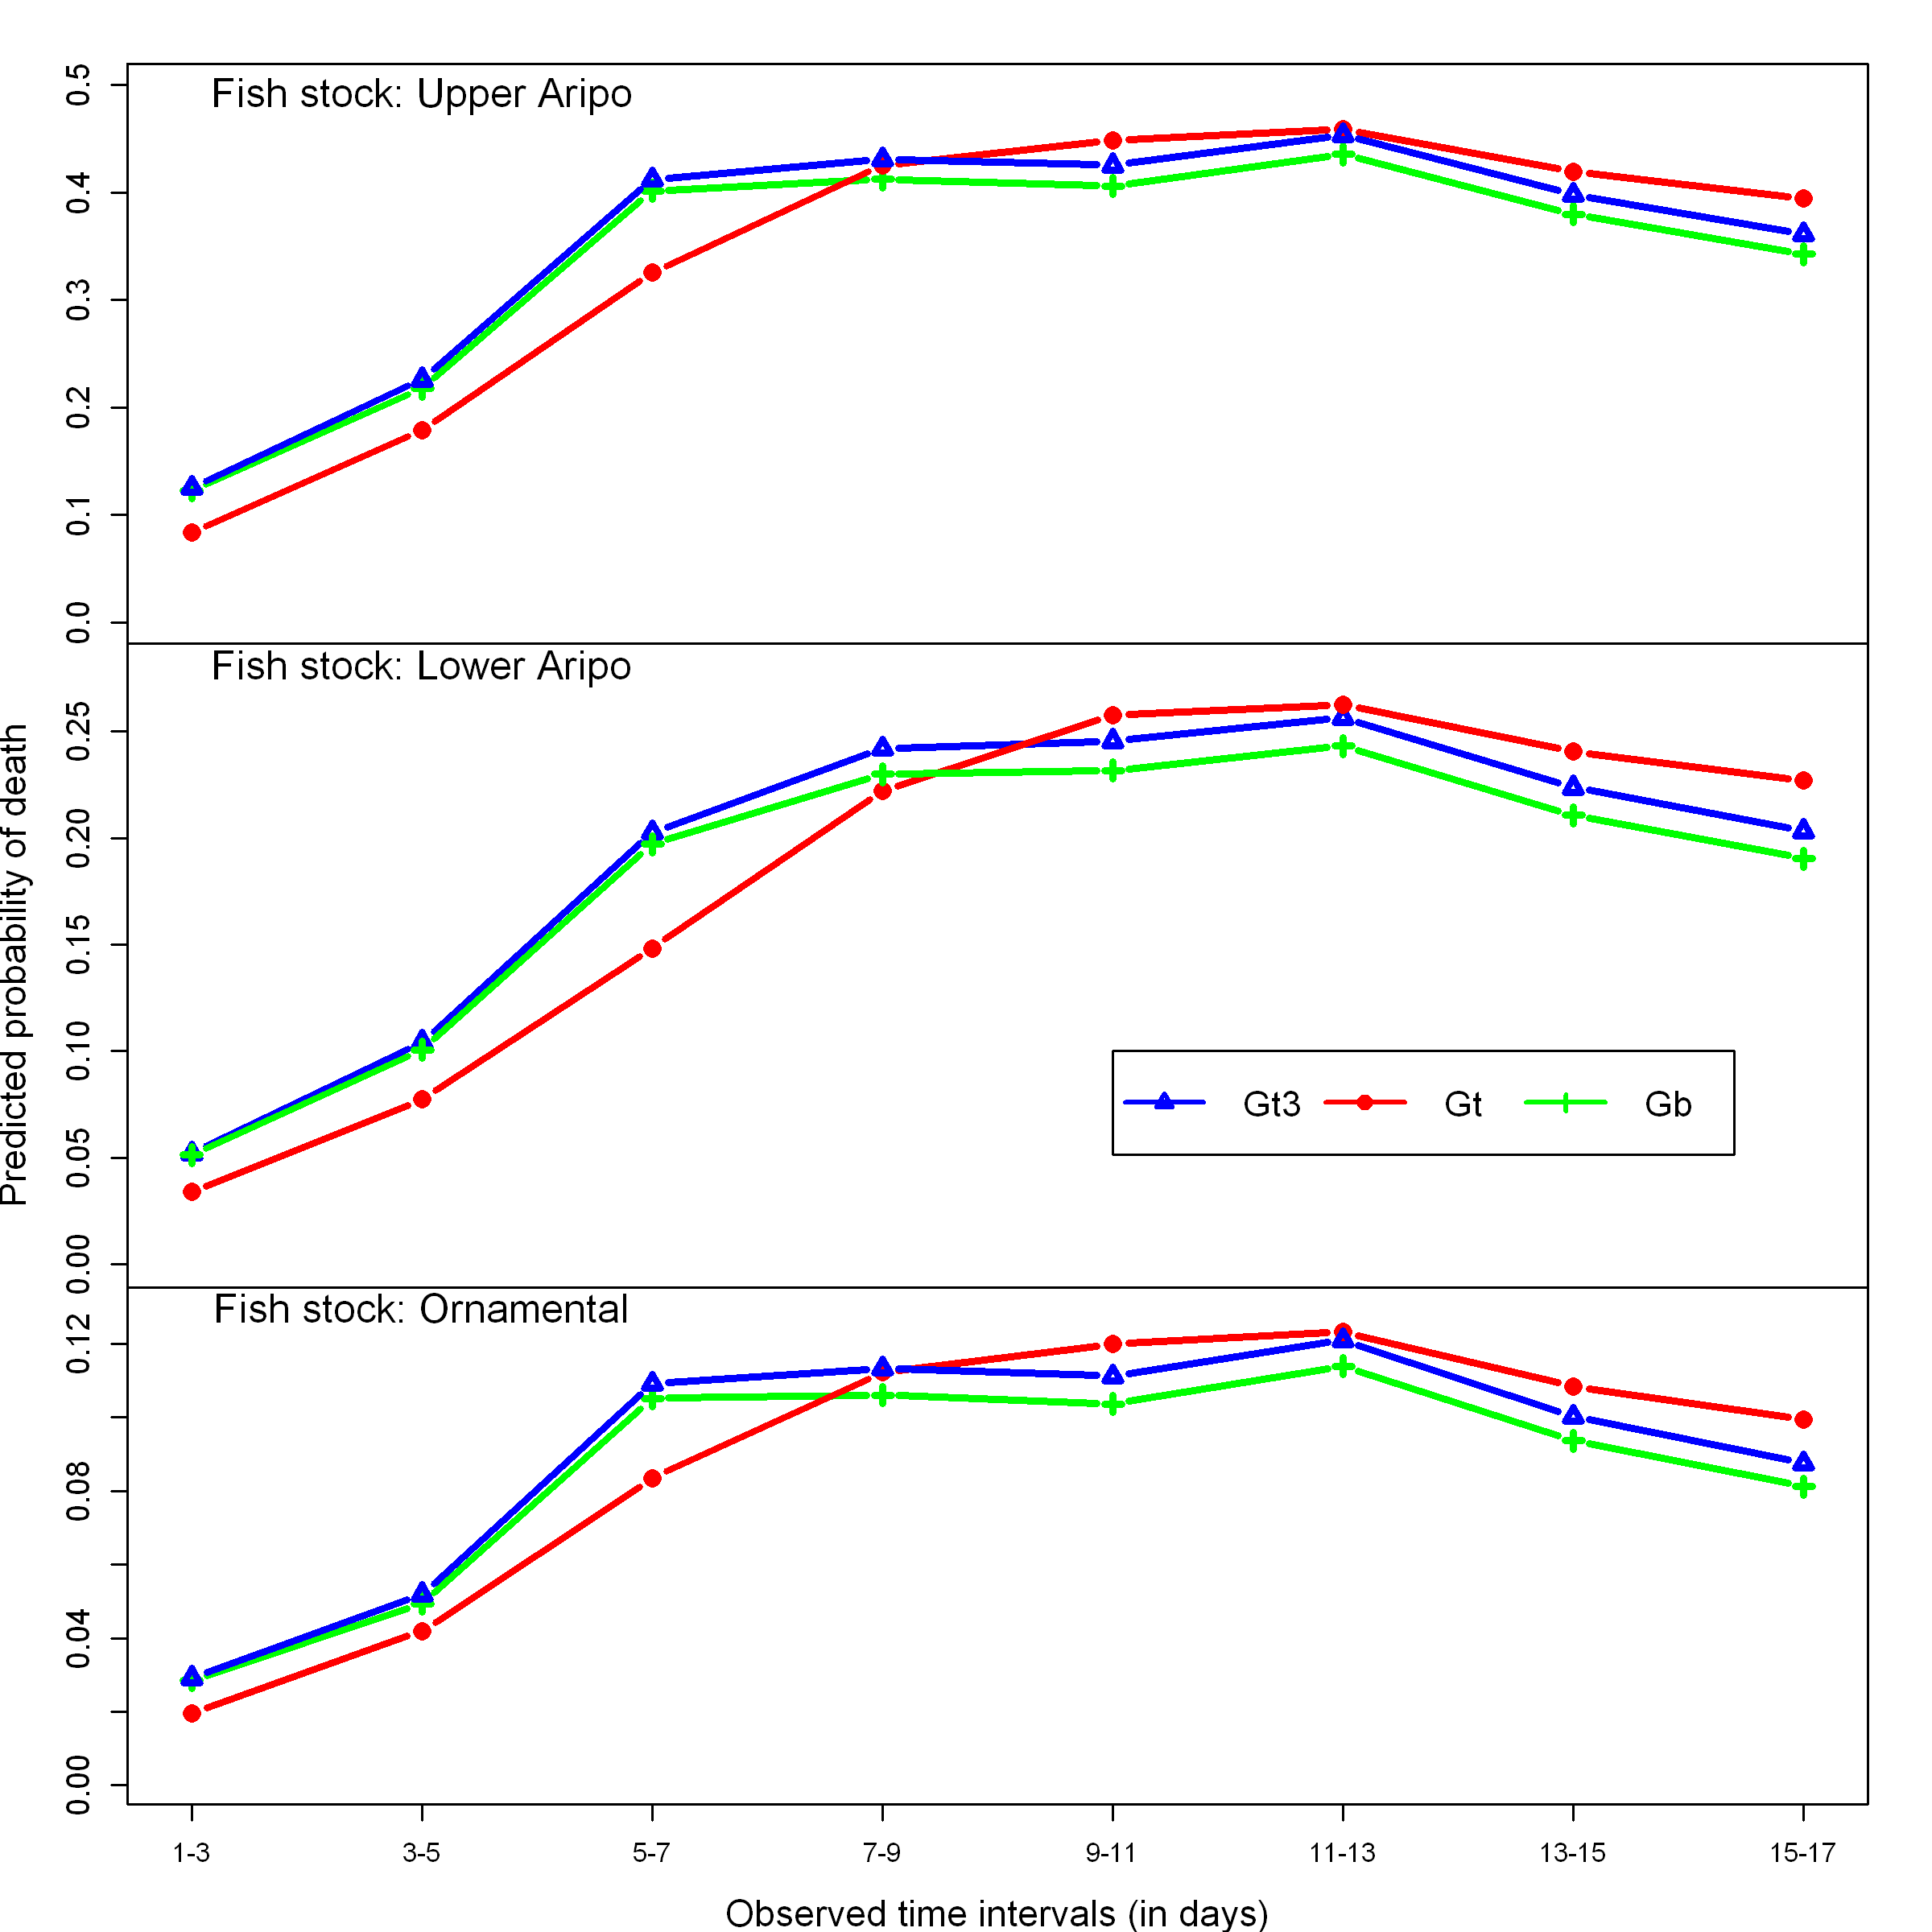

In [191]:
#Between "1-3","3-5","5-7","7-9","9-11","11-13","13-15","15-17"

o<-par(mar=c(0,4,2,2))#Run this before the code below

nf<-layout(matrix(1:3, nrow=3,ncol=1))

    
# rest parameters
par(o)#
o<-par(mar=c(0,4,2,2))

plot(Gb_fishType_death_prob[1, ,],type="b",col="green",lwd=3,xaxt = "n",ylab="",xlab="",pch=3,cex.axis=1.2,ylim=c(0,0.5))
lines(Gt_fishType_death_prob[1, ,],type="b",col="red",lwd=3,pch=19)
lines(Gt3_fishType_death_prob[1, ,],type="b",col="blue",lwd=3,pch=24)



text(2,0.49,"Fish stock: Upper Aripo",cex=1.5,lwd=3)


o<-par(mar=c(0,4,0,2))
plot(Gt3_fishType_death_prob[2, ,],type="b",col="blue",lwd=3,xaxt = "n",ylab="Predicted probability of death",xlab="",
     ylim=c(0,0.28),pch=24,cex.lab=1.4, cex.axis=1.2)
lines(Gt_fishType_death_prob[2, ,],type="b",col="red",lwd=3,pch=19)
lines(Gb_fishType_death_prob[2, ,],type="b",col="green",lwd=3,pch=3)

legend(x = 5,y=0.1,,inset = 0,
        legend = c("Gt3","Gt","Gb"), 
        col=c("blue","red","green"), lwd=2, cex=1.35, horiz = TRUE,pch=c(24,19,3),pt.cex = 1)

text(2,0.28,"Fish stock: Lower Aripo",cex=1.5,lwd=3)



par(mar=c(4,4,0,2))

plot(Gb_fishType_death_prob[3, ,],type="b",col="green",lwd=3,xaxt = "n",ylab="",xlab="Observed time intervals (in days)",
     pch=3,cex.lab=1.4, cex.axis=1.2, ylim=c(0,0.13))
lines(Gt_fishType_death_prob[3, ,],type="b",col="red",lwd=3,pch=19)
lines(Gt3_fishType_death_prob[3, ,],type="b",col="blue",lwd=3,pch=24)

axis(1, at=1:8, labels=c("1-3","3-5","5-7","7-9","9-11","11-13","13-15","15-17"))
text(2,0.13,"Fish stock: Ornamental",cex=1.5,lwd=3)


par(o)

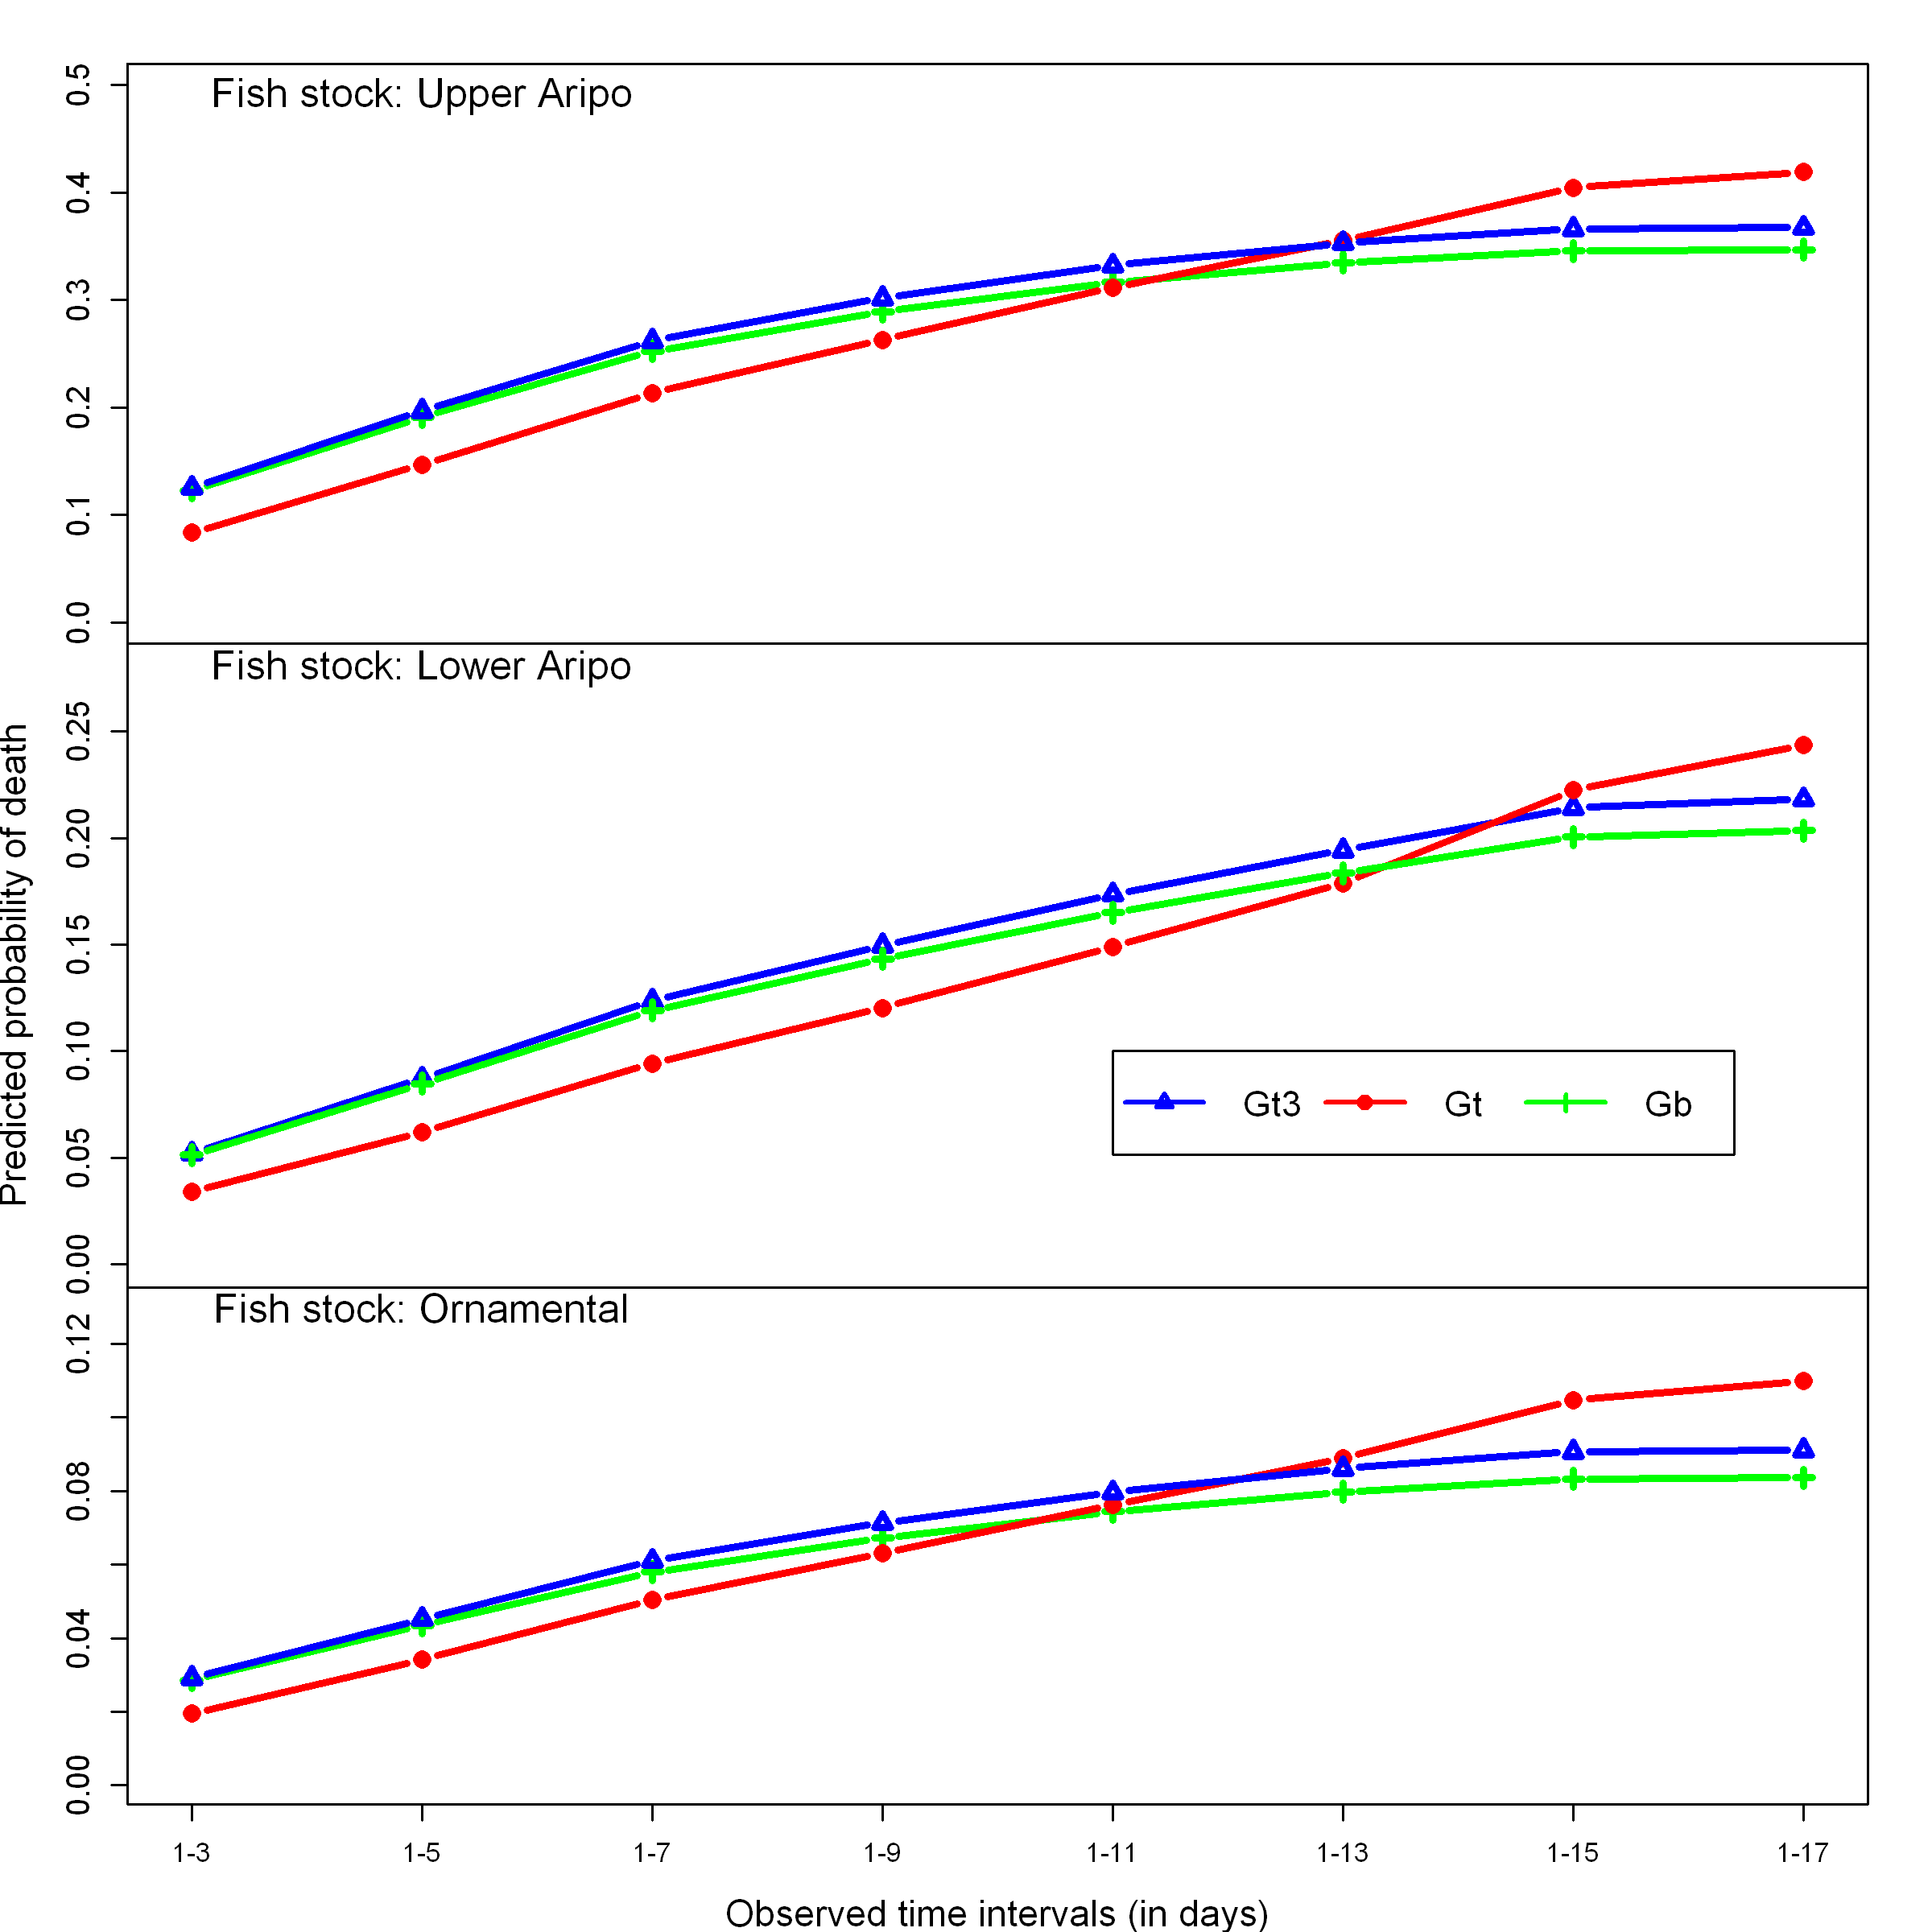

In [192]:
#From t=1 to t=3,5,7,9,11,13,15,17

o<-par(mar=c(0,4,2,2))#Run this before the code below

nf<-layout(matrix(1:3, nrow=3,ncol=1))

    
# rest parameters
par(o)#
o<-par(mar=c(0,4,2,2))

plot(Gb_fishType_death_prob1[1, ,],type="b",col="green",lwd=3,xaxt = "n",ylab="",xlab="",pch=3,cex.axis=1.2,ylim=c(0,0.5))
lines(Gt_fishType_death_prob1[1, ,],type="b",col="red",lwd=3,pch=19)
lines(Gt3_fishType_death_prob1[1, ,],type="b",col="blue",lwd=3,pch=24)



text(2,0.49,"Fish stock: Upper Aripo",cex=1.5,lwd=3)


o<-par(mar=c(0,4,0,2))
plot(Gt3_fishType_death_prob1[2, ,],type="b",col="blue",lwd=3,xaxt = "n",ylab="Predicted probability of death",xlab="",
     ylim=c(0,0.28),pch=24,cex.lab=1.4, cex.axis=1.2)
lines(Gt_fishType_death_prob1[2, ,],type="b",col="red",lwd=3,pch=19)
lines(Gb_fishType_death_prob1[2, ,],type="b",col="green",lwd=3,pch=3)

legend(x = 5,y=0.1,,inset = 0,
        legend = c("Gt3","Gt","Gb"), 
        col=c("blue","red","green"), lwd=2, cex=1.35, horiz = TRUE,pch=c(24,19,3),pt.cex = 1)

text(2,0.28,"Fish stock: Lower Aripo",cex=1.5,lwd=3)



par(mar=c(4,4,0,2))

plot(Gb_fishType_death_prob1[3, ,],type="b",col="green",lwd=3,xaxt = "n",ylab="",xlab="Observed time intervals (in days)",
     pch=3,cex.lab=1.4, cex.axis=1.2, ylim=c(0,0.13))
lines(Gt_fishType_death_prob1[3, ,],type="b",col="red",lwd=3,pch=19)
lines(Gt3_fishType_death_prob1[3, ,],type="b",col="blue",lwd=3,pch=24)

axis(1, at=1:8, labels=c("1-3","1-5","1-7","1-9","1-11","1-13","1-15","1-17"))
text(2,0.13,"Fish stock: Ornamental",cex=1.5,lwd=3)


par(o)

# Comparing statistical differences in predicted probability of death using GLMM

In [31]:
Prob1=c(c(Gt3_fishType_death_prob[1, ,]),c(Gt_fishType_death_prob[1, ,]),c(Gb_fishType_death_prob[1, ,]))
Group1=c(rep("Gt3-UA",8),rep("Gt-UA",8),rep("Gb-UA",8))
Time_interval1=c(c("1-3","3-5","5-7","7-9","9-11","11-13","13-15","15-17"),c("1-3","3-5","5-7","7-9","9-11","11-13","13-15","15-17"),
              c("1-3","3-5","5-7","7-9","9-11","11-13","13-15","15-17"))

Prob2=c(c(Gt3_fishType_death_prob[2, ,]),c(Gt_fishType_death_prob[2, ,]),c(Gb_fishType_death_prob[2, ,]))
Group2=c(rep("Gt3-LA",8),rep("Gt-LA",8),rep("Gb-LA",8))
Time_interval2=c(c("1-3","3-5","5-7","7-9","9-11","11-13","13-15","15-17"),c("1-3","3-5","5-7","7-9","9-11","11-13","13-15","15-17"),
               c("1-3","3-5","5-7","7-9","9-11","11-13","13-15","15-17"))

Prob3=c(c(Gt3_fishType_death_prob[3, ,]),c(Gt_fishType_death_prob[3, ,]),c(Gb_fishType_death_prob[3, ,]))
Group3=c(rep("Gt3-OS",8),rep("Gt-OS",8),rep("Gb-OS",8))
Time_interval3=c(c("1-3","3-5","5-7","7-9","9-11","11-13","13-15","15-17"),c("1-3","3-5","5-7","7-9","9-11","11-13","13-15","15-17"),
            c("1-3","3-5","5-7","7-9","9-11","11-13","13-15","15-17"))


Prob=c(Prob1,Prob2,Prob3)
Group=c(Group1,Group2,Group3)
Time_interval=c(Time_interval1,Time_interval2,Time_interval3)

Prob_data_UA=data.frame(Prob=Prob1,Group=Group1,Time_interval=Time_interval1)
Prob_data_LA=data.frame(Prob=Prob2,Group=Group2,Time_interval=Time_interval2)
Prob_data_OS=data.frame(Prob=Prob3,Group=Group3,Time_interval=Time_interval3)
Pred_prob_data=data.frame(Prob,Group,Time_interval)

head(Prob_data_UA)

Prob      Group  Time_interval
1 0.1252109 Gt3-UA 1-3          
2 0.2261322 Gt3-UA 3-5          
3 0.4124140 Gt3-UA 5-7          
4 0.4309093 Gt3-UA 7-9          
5 0.4254449 Gt3-UA 9-11         
6 0.4537385 Gt3-UA 11-13

# Comparing statistical differences in predicted death rates using GLMM

In [32]:
Rates1=c(c(Gt3_fishType_Deathrate[1, ,][, 1]),c(Gt_fishType_Deathrate[1, ,][, 1]),c(Gb_fishType_Deathrate[1, ,][, 1]))
Group1=c(rep("Gt3-UA",8),rep("Gt-UA",8),rep("Gb-UA",8))
Time_interval1=c(c("1-3","3-5","5-7","7-9","9-11","11-13","13-15","15-17"),c("1-3","3-5","5-7","7-9","9-11","11-13","13-15","15-17"),
              c("1-3","3-5","5-7","7-9","9-11","11-13","13-15","15-17"))

Rates2=c(c(Gt3_fishType_Deathrate[2, ,][, 1]),c(Gt_fishType_Deathrate[2, ,][, 1]),c(Gb_fishType_Deathrate[2, ,][, 1]))
Group2=c(rep("Gt3-LA",8),rep("Gt-LA",8),rep("Gb-LA",8))
Time_interval2=c(c("1-3","3-5","5-7","7-9","9-11","11-13","13-15","15-17"),c("1-3","3-5","5-7","7-9","9-11","11-13","13-15","15-17"),
               c("1-3","3-5","5-7","7-9","9-11","11-13","13-15","15-17"))

Rates3=c(c(Gt3_fishType_Deathrate[3, ,][, 1]),c(Gt_fishType_Deathrate[3, ,][, 1]),c(Gb_fishType_Deathrate[3, ,][, 1]))
Group3=c(rep("Gt3-OS",8),rep("Gt-OS",8),rep("Gb-OS",8))
Time_interval3=c(c("1-3","3-5","5-7","7-9","9-11","11-13","13-15","15-17"),c("1-3","3-5","5-7","7-9","9-11","11-13","13-15","15-17"),
            c("1-3","3-5","5-7","7-9","9-11","11-13","13-15","15-17"))


Rates=c(Rates1,Rates2,Rates3)
Group=c(Group1,Group2,Group3)
Time_interval=c(Time_interval1,Time_interval2,Time_interval3)

Rate_data_UA=data.frame(Rate=Rates1,Group=Group1,Time_interval=Time_interval1)
Rate_data_LA=data.frame(Rate=Rates2,Group=Group2,Time_interval=Time_interval2)
Rate_data_OS=data.frame(Rate=Rates3,Group=Group3,Time_interval=Time_interval3)
Pred_Rate_data=data.frame(Rates,Group,Time_interval)

head(Rate_data_UA)

Rate       Group  Time_interval
1 0.05835434 Gt3-UA 1-3          
2 0.04010630 Gt3-UA 3-5          
3 0.12607560 Gt3-UA 5-7          
4 0.08736609 Gt3-UA 7-9          
5 0.11627243 Gt3-UA 9-11         
6 0.15873677 Gt3-UA 11-13

In [35]:
write.csv(Pred_Rate_data,"Death_rates_MSM.csv")


In [38]:
dim(Pred_Rate_data)

[1] 72  3

# GLMM on the predicted probability of death for each fish population and combined data

In [46]:
Prob_UA <- lmer(Prob~ Group + (1|Time_interval), data=Prob_data_UA)
anova(Prob_UA)

results_UA<-estimate_means(Prob_UA)
print(results_UA)

estimate_contrasts(Prob_UA,standardize=F)

Sum Sq       Mean Sq      NumDF DenDF F value   Pr(>F)  
Group 0.0009605752 0.0004802876 2     14    0.7101325 0.508456

Group  | Mean |   SE |       95% CI
-----------------------------------
Gb-UA  | 0.34 | 0.04 | [0.24, 0.44]
Gt-UA  | 0.34 | 0.04 | [0.24, 0.44]
Gt3-UA | 0.35 | 0.04 | [0.25, 0.46]


Level1 Level2 Difference   SE         CI_low      CI_high    t         
1 Gb-UA  Gt-UA  -0.002035218 0.01300322 -0.04201105 0.03794061 -0.1565164
2 Gb-UA  Gt3-UA -0.014321791 0.01300322 -0.05429762 0.02565404 -1.1014032
3 Gt-UA  Gt3-UA -0.012286573 0.01300322 -0.05226240 0.02768925 -0.9448868
  df       p        
1 7.435805 0.9152746
2 7.435805 0.9152746
3 7.435805 0.9152746

In [43]:
Prob_LA <- lmer(Prob~ Group + (1|Time_interval), data=Prob_data_LA)
anova(Prob_LA)

results_LA<-estimate_means(Prob_LA)
print(results_LA)

estimate_contrasts(Prob_LA,standardize=F)

Sum Sq     Mean Sq     NumDF DenDF F value   Pr(>F)   
Group 0.00040005 0.000200025 2     14    0.7157084 0.5058895

Group  | Mean |   SE |       95% CI
-----------------------------------
Gb-LA  | 0.18 | 0.03 | [0.12, 0.25]
Gt-LA  | 0.18 | 0.03 | [0.12, 0.25]
Gt3-LA | 0.19 | 0.03 | [0.13, 0.26]


Level1 Level2 Difference   SE          CI_low      CI_high    t         
1 Gb-LA  Gt-LA  -0.001817554 0.008358803 -0.02749555 0.02386044 -0.2174419
2 Gb-LA  Gt3-LA -0.009425335 0.008358803 -0.03510333 0.01625266 -1.1275938
3 Gt-LA  Gt3-LA -0.007607781 0.008358803 -0.03328577 0.01807021 -0.9101519
  df       p        
1 7.456433 0.8833946
2 7.456433 0.8833946
3 7.456433 0.8833946

In [44]:
Prob_OS <- lmer(Prob~ Group + (1|Time_interval), data=Prob_data_OS)
anova(Prob_OS)

results_OS<-estimate_means(Prob_OS)
print(results_OS)

estimate_contrasts(Prob_OS,standardize=F)

Sum Sq       Mean Sq      NumDF DenDF F value   Pr(>F)  
Group 0.0001132582 5.662912e-05 2     14    0.9081027 0.425775

Group  | Mean |   SE |       95% CI
-----------------------------------
Gb-OS  | 0.09 | 0.01 | [0.06, 0.11]
Gt-OS  | 0.09 | 0.01 | [0.06, 0.12]
Gt3-OS | 0.09 | 0.01 | [0.06, 0.12]


Level1 Level2 Difference   SE          CI_low      CI_high     t         
1 Gb-OS  Gt-OS  -0.003326005 0.003948412 -0.01542554 0.008773530 -0.8423653
2 Gb-OS  Gt3-OS -0.005260111 0.003948412 -0.01735965 0.006839424 -1.3322093
3 Gt-OS  Gt3-OS -0.001934106 0.003948412 -0.01403364 0.010165429 -0.4898440
  df       p        
1 7.524331 0.8510923
2 7.524331 0.6651764
3 7.524331 0.8510923

In [63]:
#GLMM on Combined probability data

Prob_fit <- lmer(Prob~ Group + (1|Time_interval), data=Pred_prob_data)
anova(Prob_fit)

results<-estimate_means(Prob_fit)
print(results)

estimate_contrasts(Prob_fit,standardize=F)

Sum Sq  Mean Sq  NumDF DenDF F value  Pr(>F)      
Group 0.81116 0.101395 8     56    58.84609 1.801157e-24

Group  | Mean |   SE |       95% CI
-----------------------------------
Gb-LA  | 0.18 | 0.03 | [0.12, 0.25]
Gb-OS  | 0.09 | 0.03 | [0.02, 0.15]
Gb-UA  | 0.34 | 0.03 | [0.27, 0.41]
Gt-LA  | 0.18 | 0.03 | [0.12, 0.25]
Gt-OS  | 0.09 | 0.03 | [0.02, 0.16]
Gt-UA  | 0.34 | 0.03 | [0.28, 0.41]
Gt3-LA | 0.19 | 0.03 | [0.12, 0.26]
Gt3-OS | 0.09 | 0.03 | [0.02, 0.16]
Gt3-UA | 0.35 | 0.03 | [0.29, 0.42]


Level1 Level2 Difference   SE         CI_low       CI_high     t           
1  Gb-LA  Gb-OS   0.096703905 0.02075484  0.008827333  0.18458048   4.65934155
2  Gb-LA  Gb-UA  -0.157977400 0.02075484 -0.245853972 -0.07010083  -7.61159191
3  Gb-LA  Gt-LA  -0.001817554 0.02075484 -0.089694126  0.08605902  -0.08757252
4  Gb-LA  Gt-OS   0.093377900 0.02075484  0.005501328  0.18125447   4.49908957
5  Gb-LA  Gt-UA  -0.160012618 0.02075484 -0.247889190 -0.07213605  -7.70965182
6  Gb-LA  Gt3-LA -0.009425335 0.02075484 -0.097301907  0.07845124  -0.45412699
7  Gb-LA  Gt3-OS  0.091443795 0.02075484  0.003567222  0.17932037   4.40590140
8  Gb-LA  Gt3-UA -0.172299191 0.02075484 -0.260175763 -0.08442262  -8.30163763
9  Gb-OS  Gb-UA  -0.254681305 0.02075484 -0.342557877 -0.16680473 -12.27093346
10 Gb-OS  Gt-LA  -0.098521459 0.02075484 -0.186398032 -0.01064489  -4.74691408
11 Gb-OS  Gt-OS  -0.003326005 0.02075484 -0.091202577  0.08455057  -0.16025198
12 Gb-OS  Gt-UA  -0.256716523 0.02075484 -0.344593096 -0.16883995 -12.36899337
13 Gb-OS  Gt3-LA -0.106129240 0.02075484 -0.194005812 -0.01825267  -5.11346855
14 Gb-OS  Gt3-OS -0.005260111 0.02075484 -0.093136683  0.08261646  -0.25344015
15 Gb-OS  Gt3-UA -0.269003096 0.02075484 -0.356879668 -0.18112652 -12.96097918
16 Gb-UA  Gt-LA   0.156159846 0.02075484  0.068283273  0.24403642   7.52401938
17 Gb-UA  Gt-OS   0.251355300 0.02075484  0.163478728  0.33923187  12.11068148
18 Gb-UA  Gt-UA  -0.002035218 0.02075484 -0.089911791  0.08584135  -0.09805991
19 Gb-UA  Gt3-LA  0.148552065 0.02075484  0.060675493  0.23642864   7.15746491
20 Gb-UA  Gt3-OS  0.249421194 0.02075484  0.161544622  0.33729777  12.01749331
21 Gb-UA  Gt3-UA -0.014321791 0.02075484 -0.102198363  0.07355478  -0.69004572
22 Gt-LA  Gt-OS   0.095195455 0.02075484  0.007318882  0.18307203   4.58666210
23 Gt-LA  Gt-UA  -0.158195064 0.02075484 -0.246071636 -0.07031849  -7.62207930
24 Gt-LA  Gt3-LA -0.007607781 0.02075484 -0.095484353  0.08026879  -0.36655447
25 Gt-LA  Gt3-OS  0.093261349 0.02075484  0.005384776  0.18113792   4.49347393
26 Gt-LA  Gt3-UA -0.170481637 0.02075484 -0.258358209 -0.08260506  -8.21406510
27 Gt-OS  Gt-UA  -0.253390518 0.02075484 -0.341267091 -0.16551395 -12.20874139
28 Gt-OS  Gt3-LA -0.102803235 0.02075484 -0.190679808 -0.01492666  -4.95321657
29 Gt-OS  Gt3-OS -0.001934106 0.02075484 -0.089810678  0.08594247  -0.09318817
30 Gt-OS  Gt3-UA -0.265677091 0.02075484 -0.353553664 -0.17780052 -12.80072720
31 Gt-UA  Gt3-LA  0.150587283 0.02075484  0.062710711  0.23846386   7.25552483
32 Gt-UA  Gt3-OS  0.251456412 0.02075484  0.163579840  0.33933298  12.11555322
33 Gt-UA  Gt3-UA -0.012286573 0.02075484 -0.100163145  0.07559000  -0.59198581
34 Gt3-LA Gt3-OS  0.100869129 0.02075484  0.012992557  0.18874570   4.86002840
35 Gt3-LA Gt3-UA -0.162873856 0.02075484 -0.250750428 -0.07499728  -7.84751063
36 Gt3-OS Gt3-UA -0.263742985 0.02075484 -0.351619558 -0.17586641 -12.70753903
   df       p           
1  11.05022 9.605461e-03
2  11.05022 2.310198e-04
3  11.05022 1.000000e+00
4  11.05022 1.070889e-02
5  11.05022 2.164394e-04
6  11.05022 1.000000e+00
7  11.05022 1.070889e-02
8  11.05022 1.201796e-04
9  11.05022 2.825067e-06
10 11.05022 8.927598e-03
11 11.05022 1.000000e+00
12 11.05022 2.682812e-06
13 11.05022 5.977403e-03
14 11.05022 1.000000e+00
15 11.05022 1.800500e-06
16 11.05022 2.382290e-04
17 11.05022 3.021662e-06
18 11.05022 1.000000e+00
19 11.05022 3.431240e-04
20 11.05022 3.067190e-06
21 11.05022 1.000000e+00
22 11.05022 1.004447e-02
23 11.05022 2.310198e-04
24 11.05022 1.000000e+00
25 11.05022 1.070889e-02
26 11.05022 1.281652e-04
27 11.05022 2.884544e-06
28 11.05022 7.268796e-03
29 11.05022 1.000000e+00
30 11.05022 1.992599e-06
31 11.05022 3.184391e-04
32 11.05022 3.021662e-06
33 11.05022 1.000000e+00
34 11.05022 7.937643e-03
35 11.05022 1.906167e-04
36 11.05022 2.088499e-06

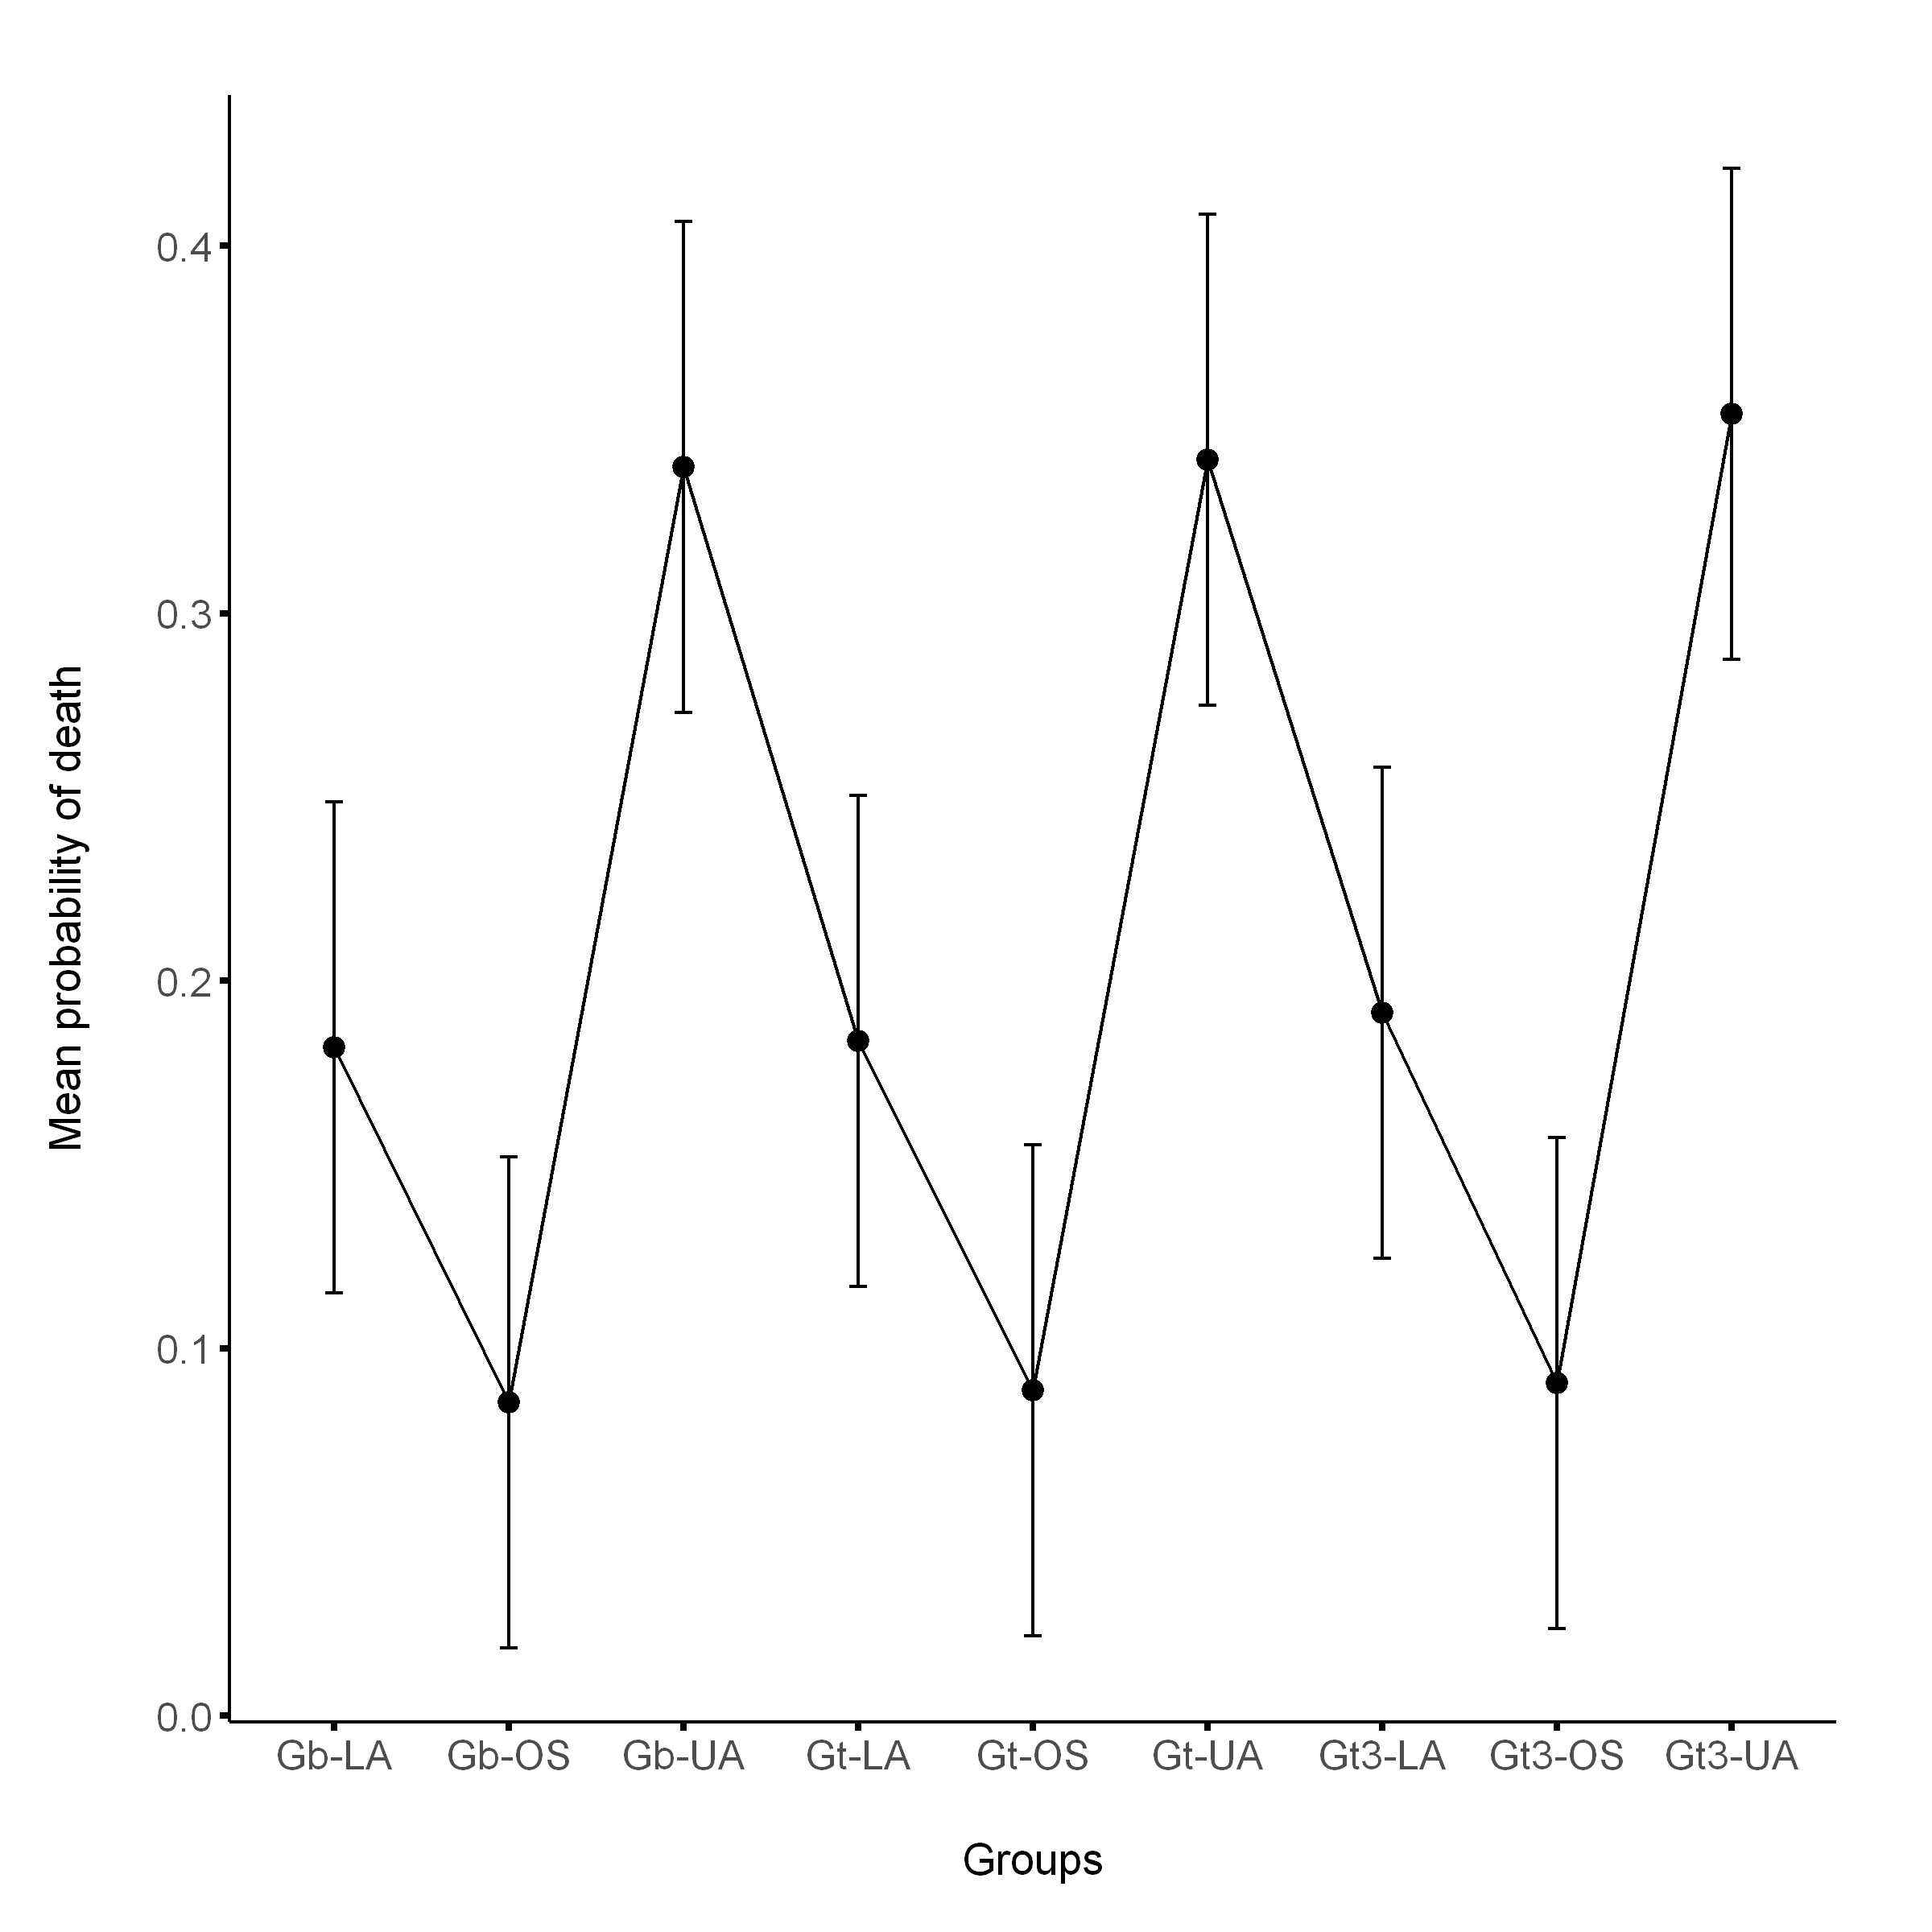

In [64]:
Mean_compare=ggplot(results, aes(x=results$Group, y=results$Mean, group=1)) +
  geom_line(position=position_dodge(0.1)) +
 geom_pointrange(aes(ymin=CI_low, ymax=CI_high))  + ylab("Mean probability of death") +xlab("Groups") +theme_modern() +
    theme(plot.margin = unit(c(1,1,0.5,0.5), "cm"))+
geom_errorbar(aes(ymin=results$CI_low, ymax=results$CI_high),width=.1,position=position_dodge(0.1))

Mean_compare+ theme(axis.ticks = element_line(size = 1))

# GLMM on the predicted death rate for each fish population and combined data

In [56]:
Rate_UA <- lmer(Rate~ Group + (1|Time_interval), data=Rate_data_UA)
anova(Rate_UA)

Rate_results_UA<-estimate_means(Rate_UA)
print(Rate_results_UA)

estimate_contrasts(Rate_UA,standardize=F)

Sum Sq     Mean Sq    NumDF DenDF F value  Pr(>F)    
Group 0.02895367 0.01447683 2     14    5.818587 0.01448122

Group  | Mean |   SE |        95% CI
------------------------------------
Gb-UA  | 0.19 | 0.07 | [ 0.03, 0.35]
Gt-UA  | 0.11 | 0.07 | [-0.05, 0.27]
Gt3-UA | 0.19 | 0.07 | [ 0.03, 0.35]


Level1 Level2 Difference   SE         CI_low       CI_high     t          
1 Gb-UA  Gt-UA   0.072919343 0.02494009 -0.003184518 0.149023204  2.92378011
2 Gb-UA  Gt3-UA -0.001499382 0.02494009 -0.077603243 0.074604479 -0.06011935
3 Gt-UA  Gt3-UA -0.074418725 0.02494009 -0.150522586 0.001685136 -2.98389947
  df       p         
1 7.644054 0.05527607
2 7.644054 0.95360249
3 7.644054 0.05527607

In [58]:
Rate_LA <- lmer(Rate~ Group + (1|Time_interval), data=Rate_data_LA)
anova(Rate_LA)

Rate_results_LA<-estimate_means(Rate_LA)
print(Rate_results_LA)

estimate_contrasts(Rate_LA,standardize=F)

Sum Sq      Mean Sq     NumDF DenDF F value  Pr(>F)    
Group 0.004412069 0.002206035 2     14    5.818587 0.01448122

Group  | Mean |   SE |        95% CI
------------------------------------
Gb-LA  | 0.07 | 0.03 | [ 0.01, 0.14]
Gt-LA  | 0.04 | 0.03 | [-0.02, 0.11]
Gt3-LA | 0.07 | 0.03 | [ 0.01, 0.14]


Level1 Level2 Difference    SE          CI_low      CI_high      t          
1 Gb-LA  Gt-LA   0.0284650600 0.009735705 -0.00124312 0.0581732401  2.92378011
2 Gb-LA  Gt3-LA -0.0005853043 0.009735705 -0.03029348 0.0291228759 -0.06011935
3 Gt-LA  Gt3-LA -0.0290503643 0.009735705 -0.05875854 0.0006578159 -2.98389947
  df       p         
1 7.644054 0.05527607
2 7.644054 0.95360249
3 7.644054 0.05527607

In [59]:
Rate_OS <- lmer(Rate~ Group + (1|Time_interval), data=Rate_data_OS)
anova(Rate_OS)

Rate_results_OS<-estimate_means(Rate_OS)
print(Rate_results_OS)

estimate_contrasts(Rate_OS,standardize=F)

Sum Sq      Mean Sq      NumDF DenDF F value  Pr(>F)    
Group 0.001570839 0.0007854197 2     14    5.818587 0.01448122

Group  | Mean |   SE |        95% CI
------------------------------------
Gb-OS  | 0.04 | 0.02 | [ 0.01, 0.08]
Gt-OS  | 0.03 | 0.02 | [-0.01, 0.06]
Gt3-OS | 0.04 | 0.02 | [ 0.01, 0.08]


Level1 Level2 Difference   SE          CI_low        CI_high      t          
1 Gb-OS  Gt-OS   0.016984660 0.005809144 -0.0007417505 0.0347110700  2.92378011
2 Gb-OS  Gt3-OS -0.000349242 0.005809144 -0.0180756522 0.0173771683 -0.06011935
3 Gt-OS  Gt3-OS -0.017333902 0.005809144 -0.0350603120 0.0003925085 -2.98389947
  df       p         
1 7.644054 0.05527607
2 7.644054 0.95360249
3 7.644054 0.05527607

In [65]:
#GLMM on Combined probability data
Rate_fit <- lmer(Rates~ Group + (1|Time_interval), data=Pred_Rate_data)
anova(Rate_fit)

results<-estimate_means(Rate_fit)
print(results)

estimate_contrasts(Rate_fit,standardize=F)

Sum Sq    Mean Sq    NumDF DenDF F value  Pr(>F)      
Group 0.2436852 0.03046065 8     56    5.818587 2.098023e-05

Group  | Mean |   SE |        95% CI
------------------------------------
Gb-LA  | 0.07 | 0.04 | [-0.02, 0.17]
Gb-OS  | 0.04 | 0.04 | [-0.05, 0.14]
Gb-UA  | 0.19 | 0.04 | [ 0.09, 0.28]
Gt-LA  | 0.04 | 0.04 | [-0.05, 0.14]
Gt-OS  | 0.03 | 0.04 | [-0.07, 0.12]
Gt-UA  | 0.11 | 0.04 | [ 0.02, 0.21]
Gt3-LA | 0.07 | 0.04 | [-0.02, 0.17]
Gt3-OS | 0.04 | 0.04 | [-0.05, 0.14]
Gt3-UA | 0.19 | 0.04 | [ 0.09, 0.28]


Level1 Level2 Difference    SE         CI_low        CI_high      
1  Gb-LA  Gb-OS   0.0293750163 0.03617685 -0.1140887102  0.1728387428
2  Gb-LA  Gb-UA  -0.1137456236 0.03617685 -0.2572093501  0.0297181030
3  Gb-LA  Gt-LA   0.0284650600 0.03617685 -0.1149986665  0.1719287865
4  Gb-LA  Gt-OS   0.0463596761 0.03617685 -0.0971040505  0.1898234026
5  Gb-LA  Gt-UA  -0.0408262807 0.03617685 -0.1842900072  0.1026374459
6  Gb-LA  Gt3-LA -0.0005853043 0.03617685 -0.1440490308  0.1428784222
7  Gb-LA  Gt3-OS  0.0290257743 0.03617685 -0.1144379522  0.1724895009
8  Gb-LA  Gt3-UA -0.1152450057 0.03617685 -0.2587087322  0.0282187208
9  Gb-OS  Gb-UA  -0.1431206399 0.03617685 -0.2865843664  0.0003430866
10 Gb-OS  Gt-LA  -0.0009099563 0.03617685 -0.1443736828  0.1425537702
11 Gb-OS  Gt-OS   0.0169846597 0.03617685 -0.1264790668  0.1604483863
12 Gb-OS  Gt-UA  -0.0702012970 0.03617685 -0.2136650235  0.0732624295
13 Gb-OS  Gt3-LA -0.0299603206 0.03617685 -0.1734240471  0.1135034059
14 Gb-OS  Gt3-OS -0.0003492420 0.03617685 -0.1438129685  0.1431144845
15 Gb-OS  Gt3-UA -0.1446200221 0.03617685 -0.2880837486 -0.0011562955
16 Gb-UA  Gt-LA   0.1422106836 0.03617685 -0.0012530430  0.2856744101
17 Gb-UA  Gt-OS   0.1601052996 0.03617685  0.0166415731  0.3035690261
18 Gb-UA  Gt-UA   0.0729193429 0.03617685 -0.0705443836  0.2163830694
19 Gb-UA  Gt3-LA  0.1131603193 0.03617685 -0.0303034072  0.2566240458
20 Gb-UA  Gt3-OS  0.1427713979 0.03617685 -0.0006923286  0.2862351244
21 Gb-UA  Gt3-UA -0.0014993822 0.03617685 -0.1449631087  0.1419643444
22 Gt-LA  Gt-OS   0.0178946161 0.03617685 -0.1255691105  0.1613583426
23 Gt-LA  Gt-UA  -0.0692913406 0.03617685 -0.2127550672  0.0741723859
24 Gt-LA  Gt3-LA -0.0290503643 0.03617685 -0.1725140908  0.1144133622
25 Gt-LA  Gt3-OS  0.0005607143 0.03617685 -0.1429030122  0.1440244409
26 Gt-LA  Gt3-UA -0.1437100657 0.03617685 -0.2871737922 -0.0002463392
27 Gt-OS  Gt-UA  -0.0871859567 0.03617685 -0.2306496832  0.0562777698
28 Gt-OS  Gt3-LA -0.0469449803 0.03617685 -0.1904087068  0.0965187462
29 Gt-OS  Gt3-OS -0.0173339017 0.03617685 -0.1607976282  0.1261298248
30 Gt-OS  Gt3-UA -0.1616046818 0.03617685 -0.3050684083 -0.0181409553
31 Gt-UA  Gt3-LA  0.0402409764 0.03617685 -0.1032227501  0.1837047029
32 Gt-UA  Gt3-OS  0.0698520550 0.03617685 -0.0736116715  0.2133157815
33 Gt-UA  Gt3-UA -0.0744187251 0.03617685 -0.2178824516  0.0690450014
34 Gt3-LA Gt3-OS  0.0296110786 0.03617685 -0.1138526479  0.1730748051
35 Gt3-LA Gt3-UA -0.1146597015 0.03617685 -0.2581234280  0.0288040251
36 Gt3-OS Gt3-UA -0.1442707801 0.03617685 -0.2877345066 -0.0008070536
   t            df       p         
1   0.811983721 14.10506 1.00000000
2  -3.144154668 14.10506 0.18509670
3   0.786830723 14.10506 1.00000000
4   1.281473408 14.10506 1.00000000
5  -1.128519383 14.10506 1.00000000
6  -0.016178971 14.10506 1.00000000
7   0.802329980 14.10506 1.00000000
8  -3.185600566 14.10506 0.18352081
9  -3.956138389 14.10506 0.04434020
10 -0.025152998 14.10506 1.00000000
11  0.469489687 14.10506 1.00000000
12 -1.940503104 14.10506 1.00000000
13 -0.828162692 14.10506 1.00000000
14 -0.009653741 14.10506 1.00000000
15 -3.997584287 14.10506 0.04434020
16  3.930985391 14.10506 0.04434020
17  4.425628076 14.10506 0.01980395
18  2.015635285 14.10506 1.00000000
19  3.127975697 14.10506 0.18509670
20  3.946484648 14.10506 0.04434020
21 -0.041445897 14.10506 1.00000000
22  0.494642685 14.10506 1.00000000
23 -1.915350106 14.10506 1.00000000
24 -0.803009695 14.10506 1.00000000
25  0.015499257 14.10506 1.00000000
26 -3.972431289 14.10506 0.04434020
27 -2.409992791 14.10506 0.72401494
28 -1.297652379 14.10506 1.00000000
29 -0.479143428 14.10506 1.00000000
30 -4.467073974 14.10506 0.01880527
31  1.112340412 14.10506 1.00000000
32  1.930849363 14.10506 1.00000000
33 -2.057081183 14.10506 1.00000000
34  0.818508951 14.10506 1.00000000
35 -3.169421594 14.10506 0.18352081
36 -3.987930546 14.10506 0.04434020

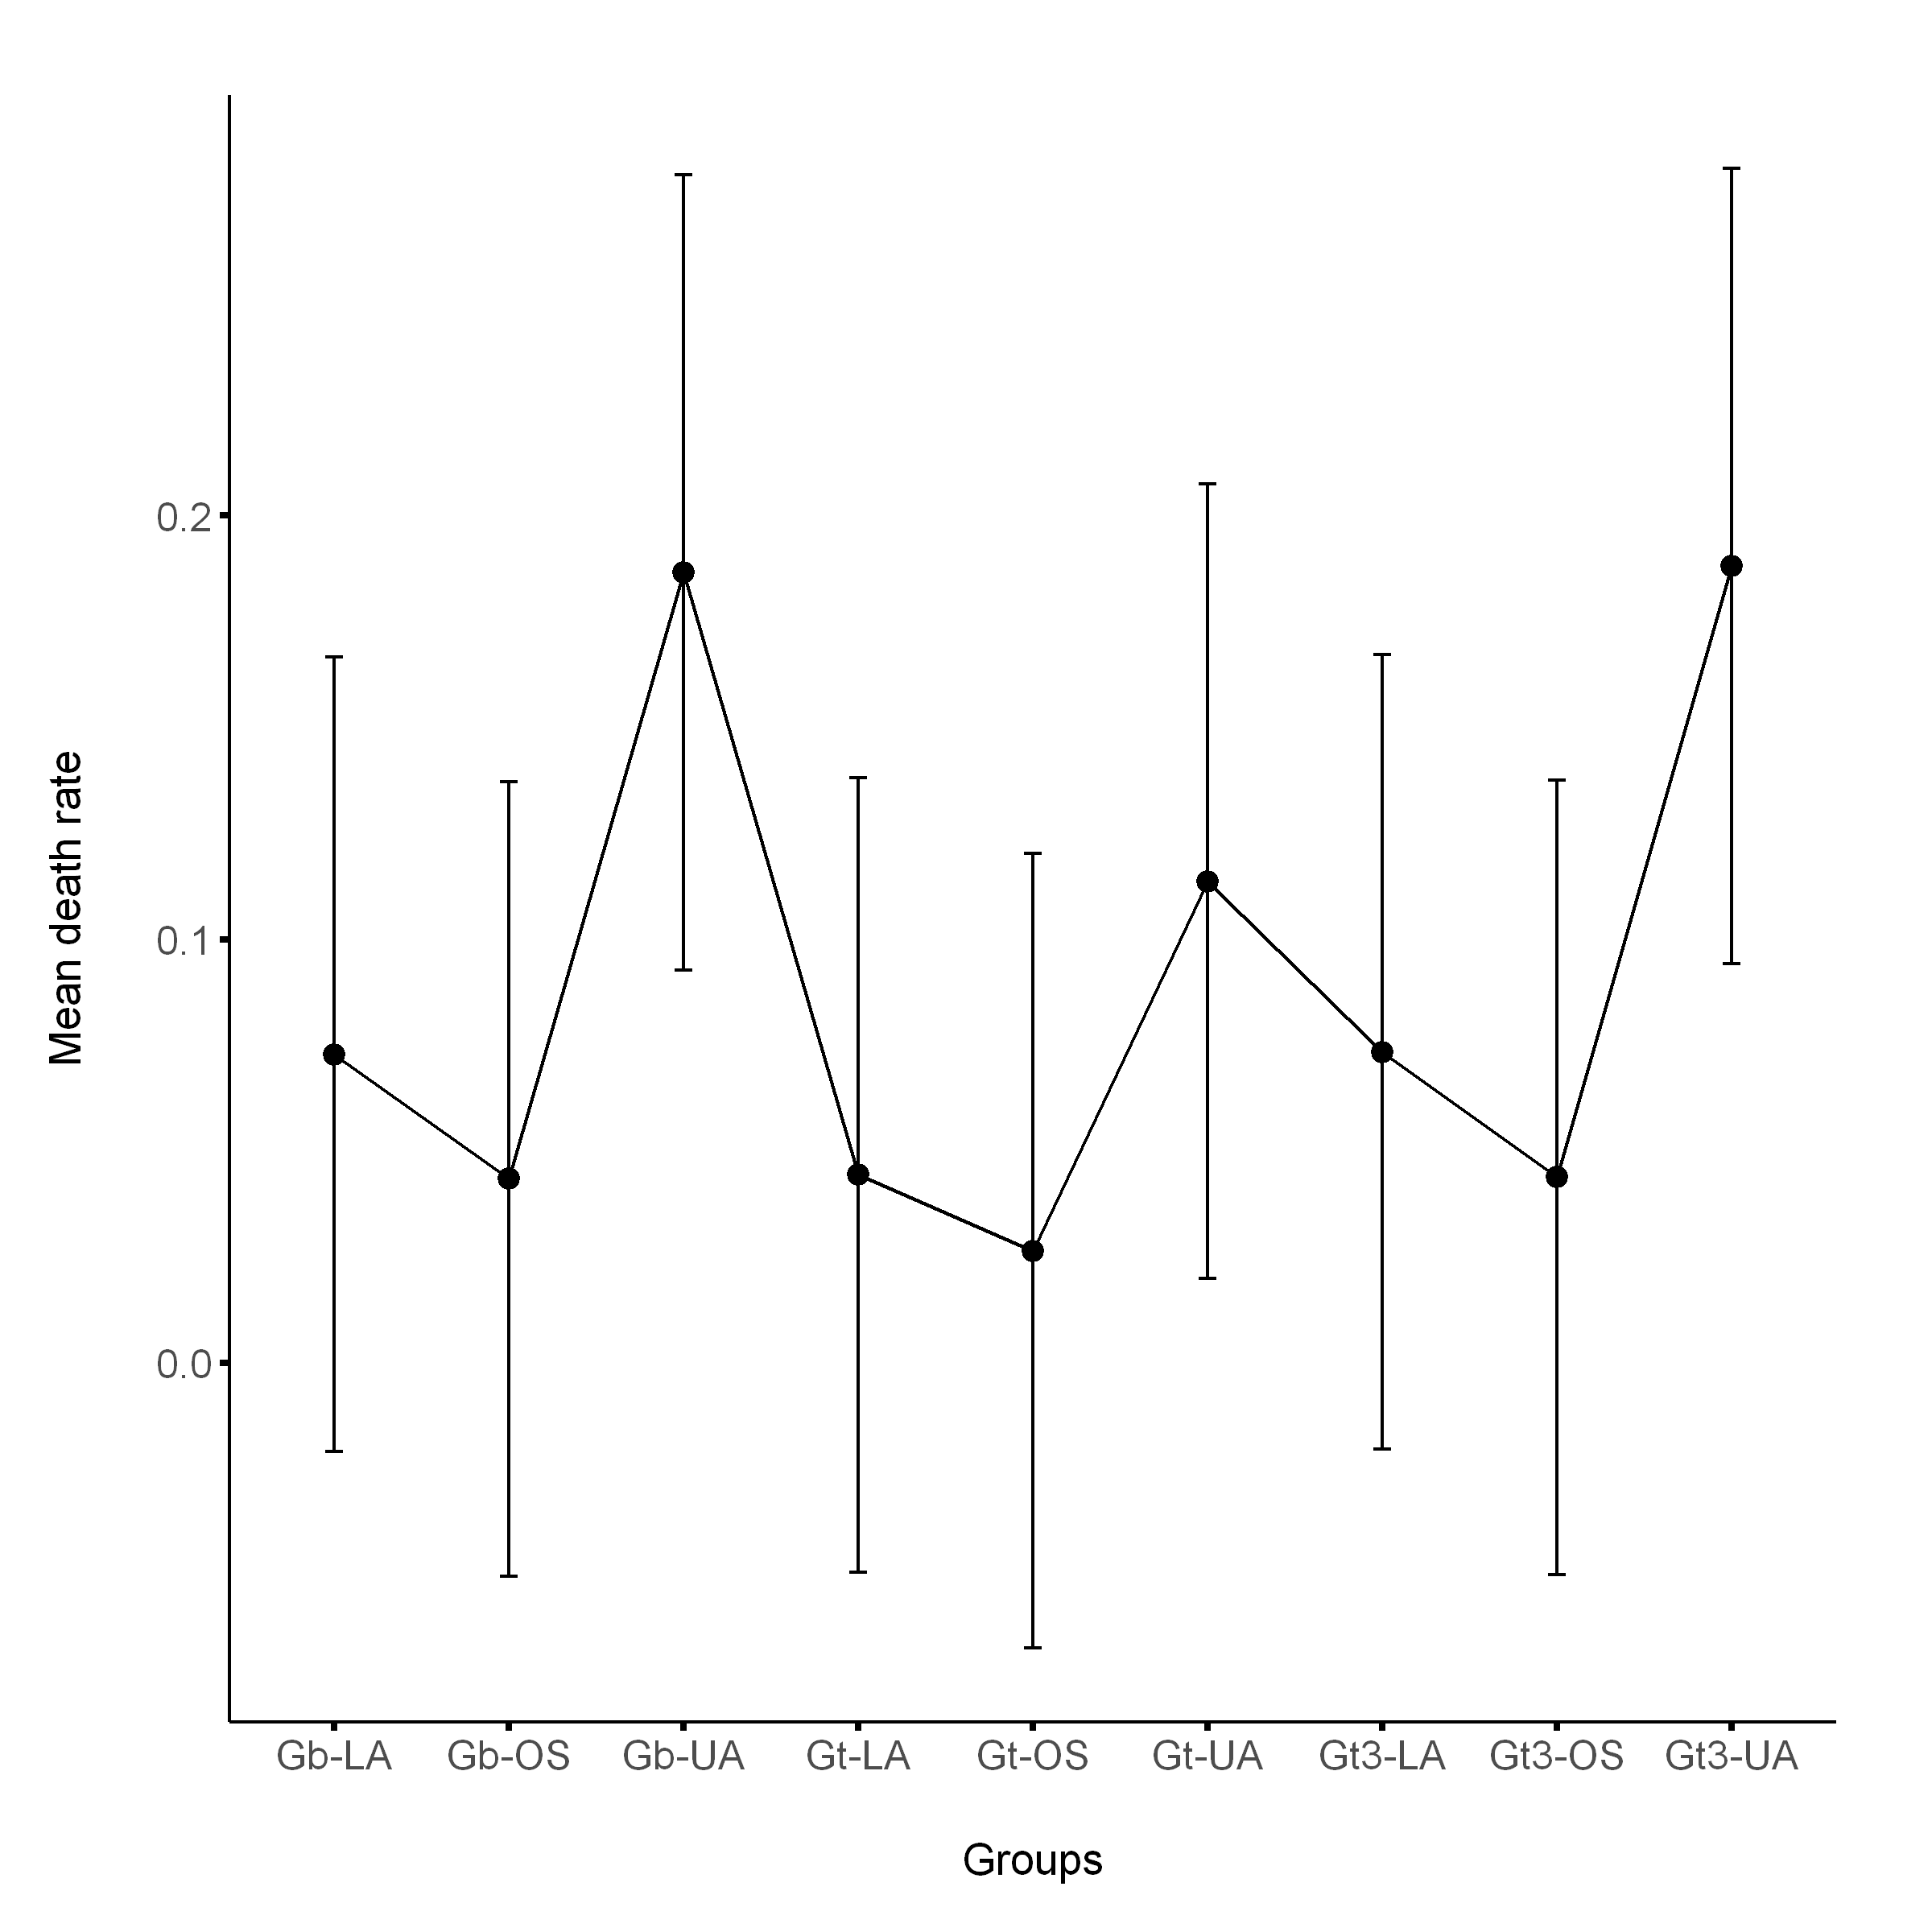

In [62]:
Mean_compare=ggplot(results, aes(x=results$Group, y=results$Mean, group=1)) +
  geom_line(position=position_dodge(0.1)) +
 geom_pointrange(aes(ymin=CI_low, ymax=CI_high))  + ylab("Mean death rate") +xlab("Groups") +theme_modern() +
    theme(plot.margin = unit(c(1,1,0.5,0.5), "cm"))+
geom_errorbar(aes(ymin=results$CI_low, ymax=results$CI_high),width=.1,position=position_dodge(0.1))

Mean_compare+ theme(axis.ticks = element_line(size = 1))

# Plotting transition probability matrix over time

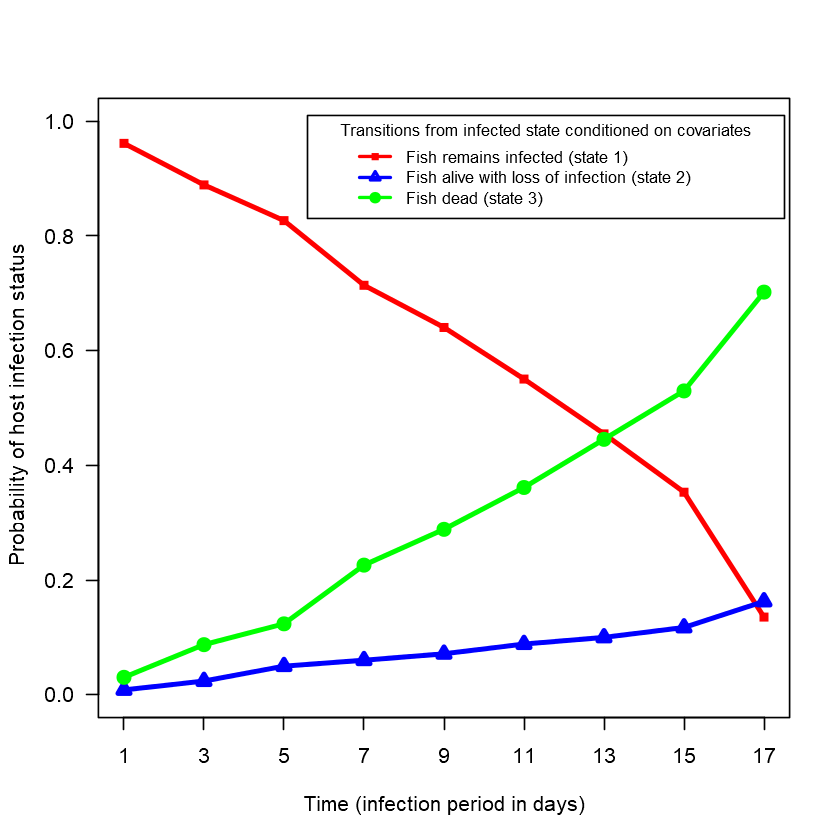

In [23]:

plot(Prob_state1,type="o",col="red",lwd=3
      ,ylab="Probability of host infection status",las=1,xaxt = "n",xlab="Time (infection period in days)",
    ylim=c(0,1),pch=15)
lines(Prob_state2,type="o",col="blue",lwd=3,pch=24)
lines(Prob_state3,type="o",col="green",lwd=3,pch=19)

axis(1, at=1:9, labels=c("1","3","5","7","9","11","13","15","17"))
text <- c("Fish remains infected (state 1)","Fish alive with loss of infection (state 2)",
          "Fish dead (state 3)")
legend_order <- matrix(1:3,ncol=1,byrow = T)
legend(x = 3.3,y=1.01,legend = text[legend_order],
       col=c("red","blue","green"),ncol=1, lwd=2, cex=.8,title="Transitions from infected state conditioned on covariates",
      lty = c(1,1,1)[legend_order],pch=c(15,24,19))



# Plotting transition rate matrix over time

In [51]:
#Multistate_model_best$Qmatrices
#qmatrix.msm(Multistate_model_best, covariates = 0)
#Multistate_model_best$Qmatrices
Multistate_model_best$Qmatrices$baseline
Multistate_model_best$Qmatrices

state1     state2     state3    
state1 -0.0820703 0.01496492 0.06710538
state2  0.0000000 0.00000000 0.00000000
state3  0.0000000 0.00000000 0.00000000

$logbaseline
       state1    state2    state3
state1      0 -4.202047 -2.701491
state2      0  0.000000  0.000000
state3      0  0.000000  0.000000

$`Sex_fishMale fish`
       state1    state2    state3
state1      0 0.2333463 0.4271946
state2      0 0.0000000 0.0000000
state3      0 0.0000000 0.0000000

$`Fish_populationLower Aripo`
       state1     state2     state3
state1      0 -0.1436148 -0.9406766
state2      0  0.0000000  0.0000000
state3      0  0.0000000  0.0000000

$Fish_populationOrnamental
       state1    state2    state3
state1      0 0.3185004 -1.457043
state2      0 0.0000000  0.000000
state3      0 0.0000000  0.000000

$Parasite_typeGt
       state1    state2     state3
state1      0 -0.643472 -0.5036487
state2      0  0.000000  0.0000000
state3      0  0.000000  0.0000000

$Parasite_typeGbull
       state1     state2       state3
state1      0 0.07372394 -0.008004041
state2      0 0.00000000  0.000000000
state3      0 0.00000000  0.000000000

$Fish_size
       state1     state2      state3
state1      0 -0.1426324 0.005256173
state2      0  0.0000000 0.000000000
state3      0  0.0000000 0.000000000

$`timeperiod[3,5)`
       state1    state2     state3
state1      0 0.5927133 -0.3750003
state2      0 0.0000000  0.0000000
state3      0 0.0000000  0.0000000

$`timeperiod[5,7)`
       state1     state2    state3
state1      0 -0.2157534 0.7703479
state2      0  0.0000000 0.0000000
state3      0  0.0000000 0.0000000

$`timeperiod[7,9)`
       state1      state2    state3
state1      0 -0.01377162 0.4035734
state2      0  0.00000000 0.0000000
state3      0  0.00000000 0.0000000

$`timeperiod[9,11)`
       state1    state2    state3
state1      0 0.5356467 0.6894022
state2      0 0.0000000 0.0000000
state3      0 0.0000000 0.0000000

$`timeperiod[11,13)`
       state1    state2   state3
state1      0 0.3237668 1.000713
state2      0 0.0000000 0.000000
state3      0 0.0000000 0.000000

$`timeperiod[13,15)`
       state1    state2   state3
state1      0 0.9448972 1.226673
state2      0 0.0000000 0.000000
state3      0 0.0000000 0.000000

$`timeperiod[15,Inf)`
       state1   state2   state3
state1      0 2.481074 2.510964
state2      0 0.000000 0.000000
state3      0 0.000000 0.000000

$baseline
           state1     state2     state3
state1 -0.0820703 0.01496492 0.06710538
state2  0.0000000 0.00000000 0.00000000
state3  0.0000000 0.00000000 0.00000000

In [25]:
Multistate_model_best$Qmatrices$baseline[1,2]

abs(Multistate_model_best$Qmatrices$`timeperiod[3,5)`)[1,2]


abs(Multistate_model_best$Qmatrices$`timeperiod[1,3)`)[1,2]

[1] 0.01596266

[1] 0.605805

ERROR: Error in abs(Multistate_model_best$Qmatrices$`timeperiod[1,3)`): non-numeric argument to mathematical function


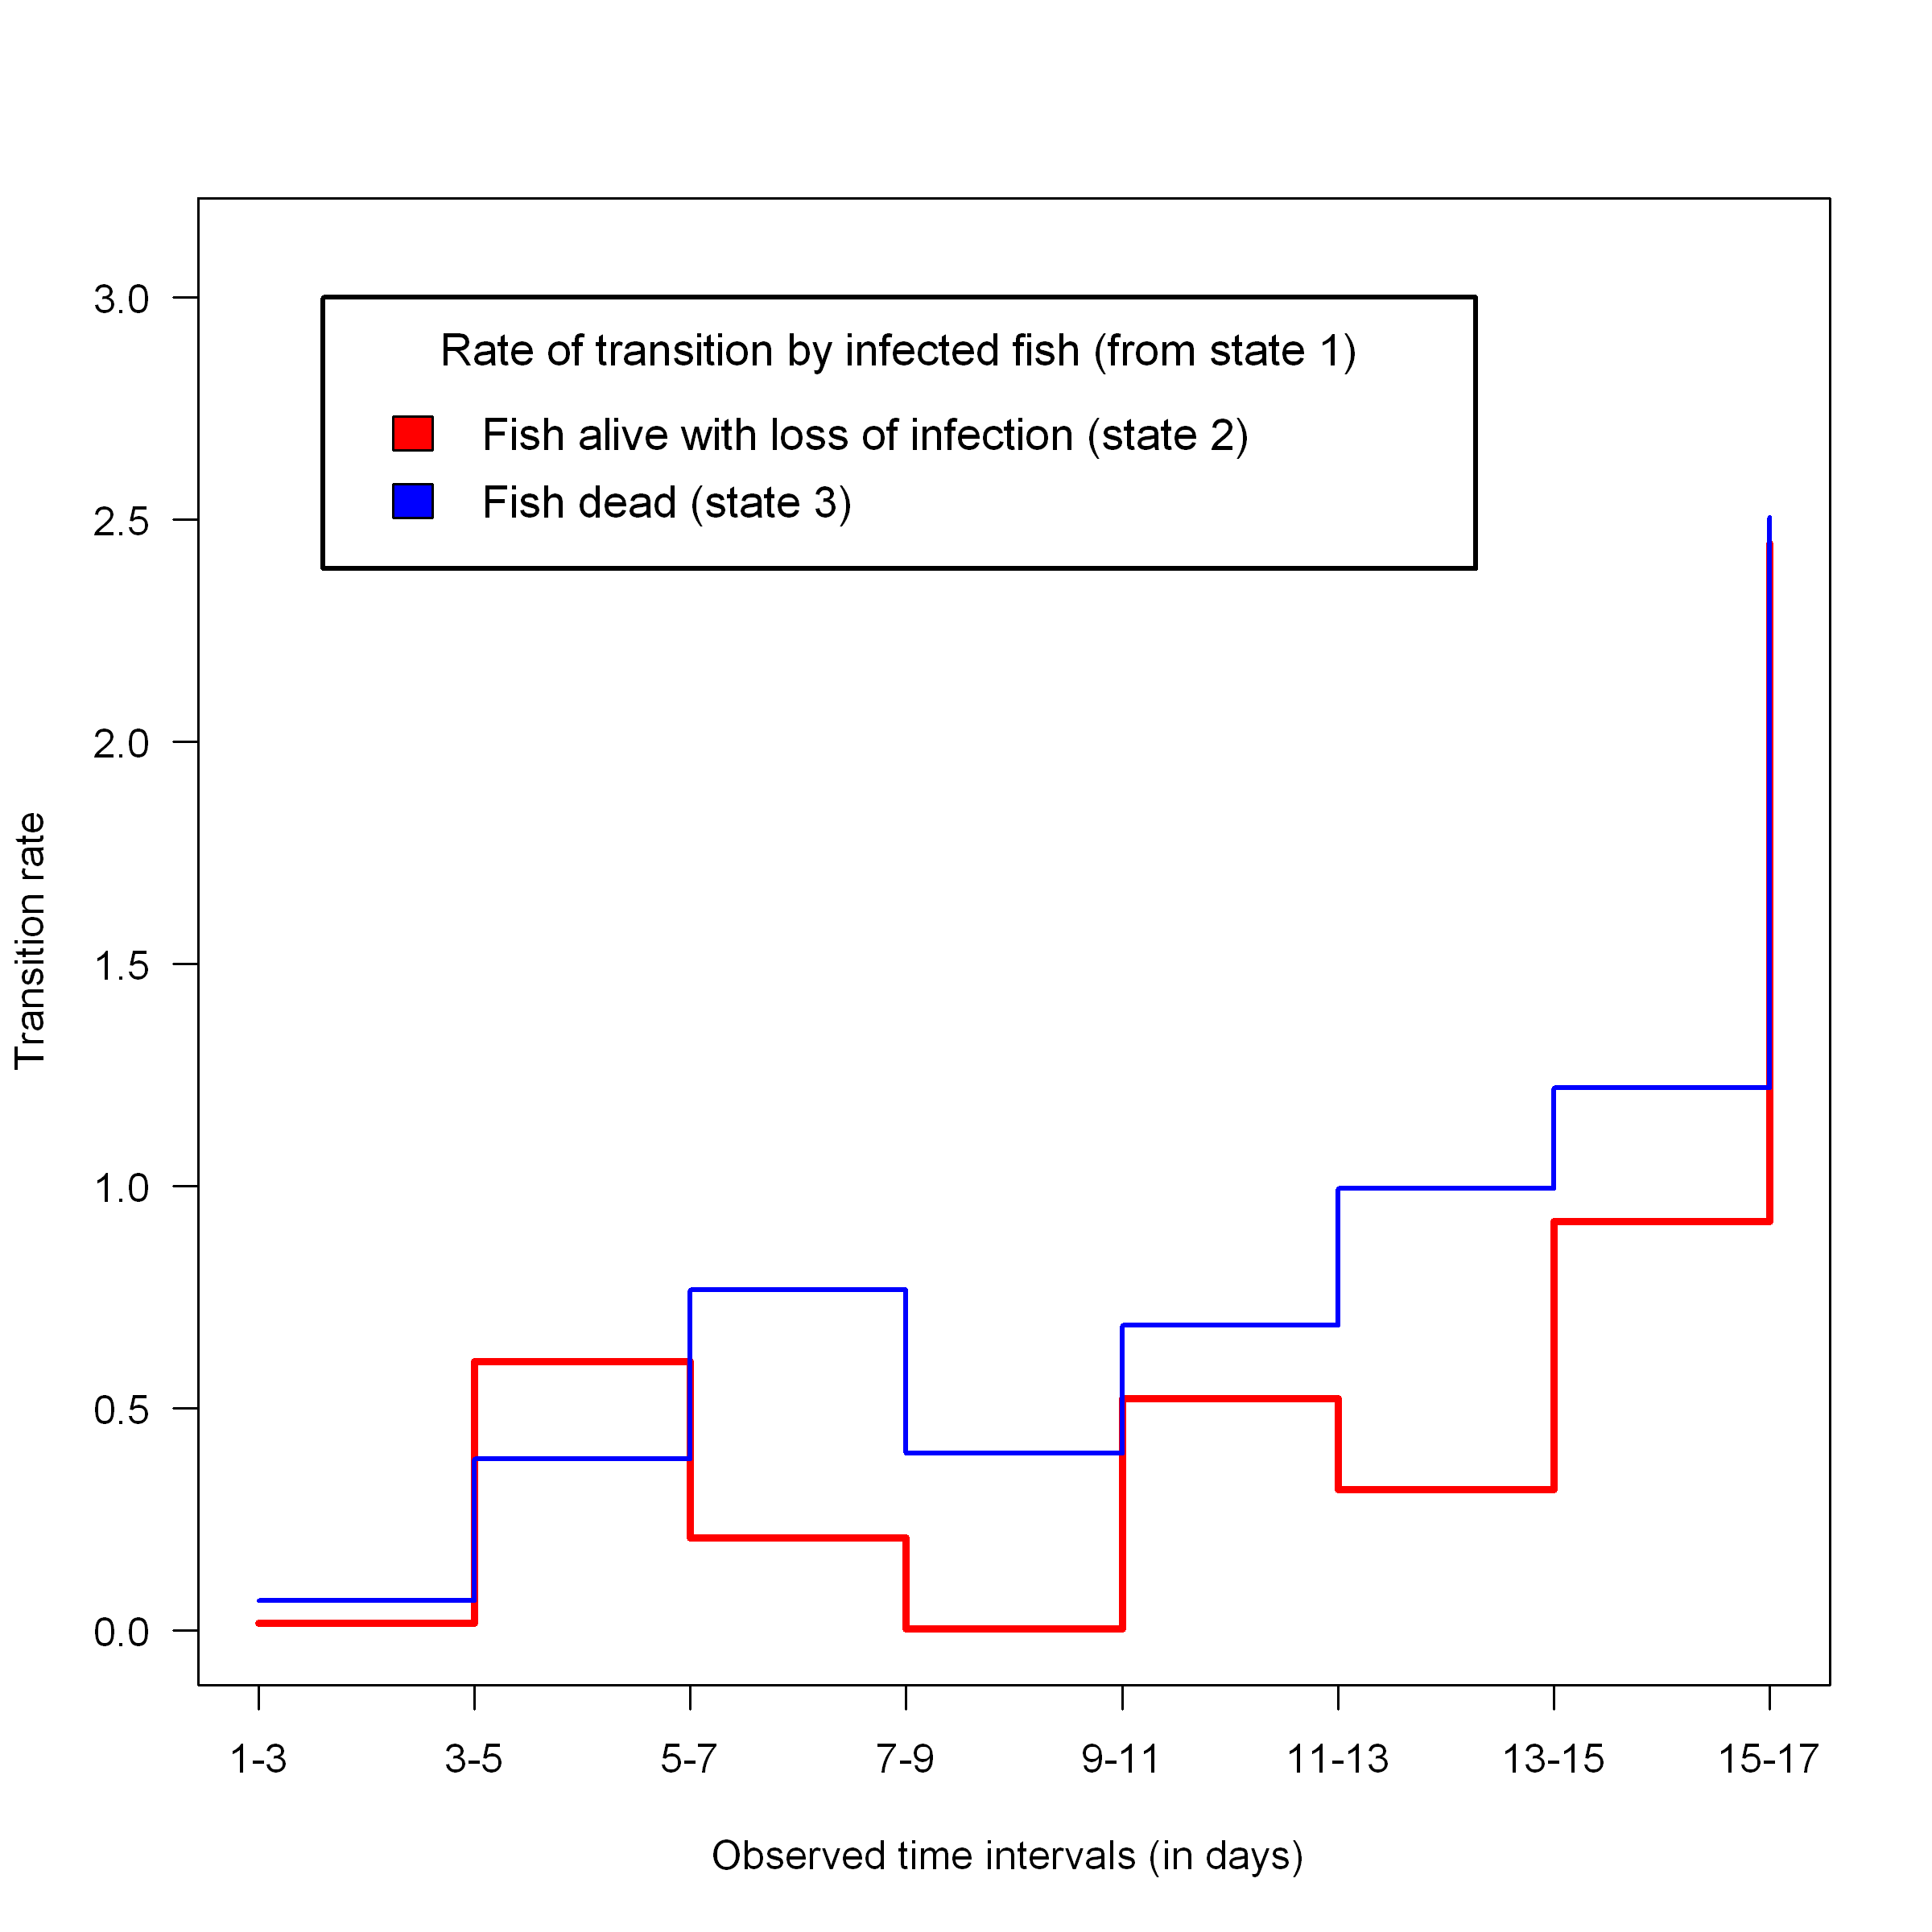

In [51]:
#Multistate_model_best$Qmatrices

Qrate_State2=c(Multistate_model_best$Qmatrices$baseline[1,2],abs(Multistate_model_best$Qmatrices$`timeperiod[3,5)`)[1,2],
abs(Multistate_model_best$Qmatrices$`timeperiod[5,7)`)[1,2],abs(Multistate_model_best$Qmatrices$`timeperiod[7,9)`)[1,2],
abs(Multistate_model_best$Qmatrices$`timeperiod[9,11)`)[1,2],  abs(Multistate_model_best$Qmatrices$`timeperiod[11,13)`)[1,2],
abs(Multistate_model_best$Qmatrices$`timeperiod[13,15)`)[1,2],  abs(Multistate_model_best$Qmatrices$`timeperiod[15,Inf)`)[1,2])

Qrate_State3=c(Multistate_model_best$Qmatrices$baseline[1,3],abs(Multistate_model_best$Qmatrices$`timeperiod[3,5)`)[1,3],
abs(Multistate_model_best$Qmatrices$`timeperiod[5,7)`)[1,3],abs(Multistate_model_best$Qmatrices$`timeperiod[7,9)`)[1,3],
abs(Multistate_model_best$Qmatrices$`timeperiod[9,11)`)[1,3],  abs(Multistate_model_best$Qmatrices$`timeperiod[11,13)`)[1,3],
abs(Multistate_model_best$Qmatrices$`timeperiod[13,15)`)[1,3],  abs(Multistate_model_best$Qmatrices$`timeperiod[15,Inf)`)[1,3])


plot(Qrate_State2,type="s",col="red",lwd=3
      ,ylab="Transition rate",las=1,xaxt = "n",xlab="Observed time intervals (in days) ",
    ylim=c(0,3.1))
lines(Qrate_State3,type="s",col="blue",lwd=2)


axis(1, at=1:8, labels=c("1-3","3-5","5-7","7-9","9-11","11-13","13-15","15-17"))
text <- c("Fish alive with loss of infection (state 2)",
          "Fish dead (state 3)")
legend_order <- matrix(1:2,ncol=1,byrow = T)
legend(x = 1.3,y=3,legend = text[legend_order],
       col=c("red","blue"),ncol=1, cex=1.1,title="Rate of transition by infected fish (from state 1)",
     box.lwd = 2,fill=c("red","blue"))





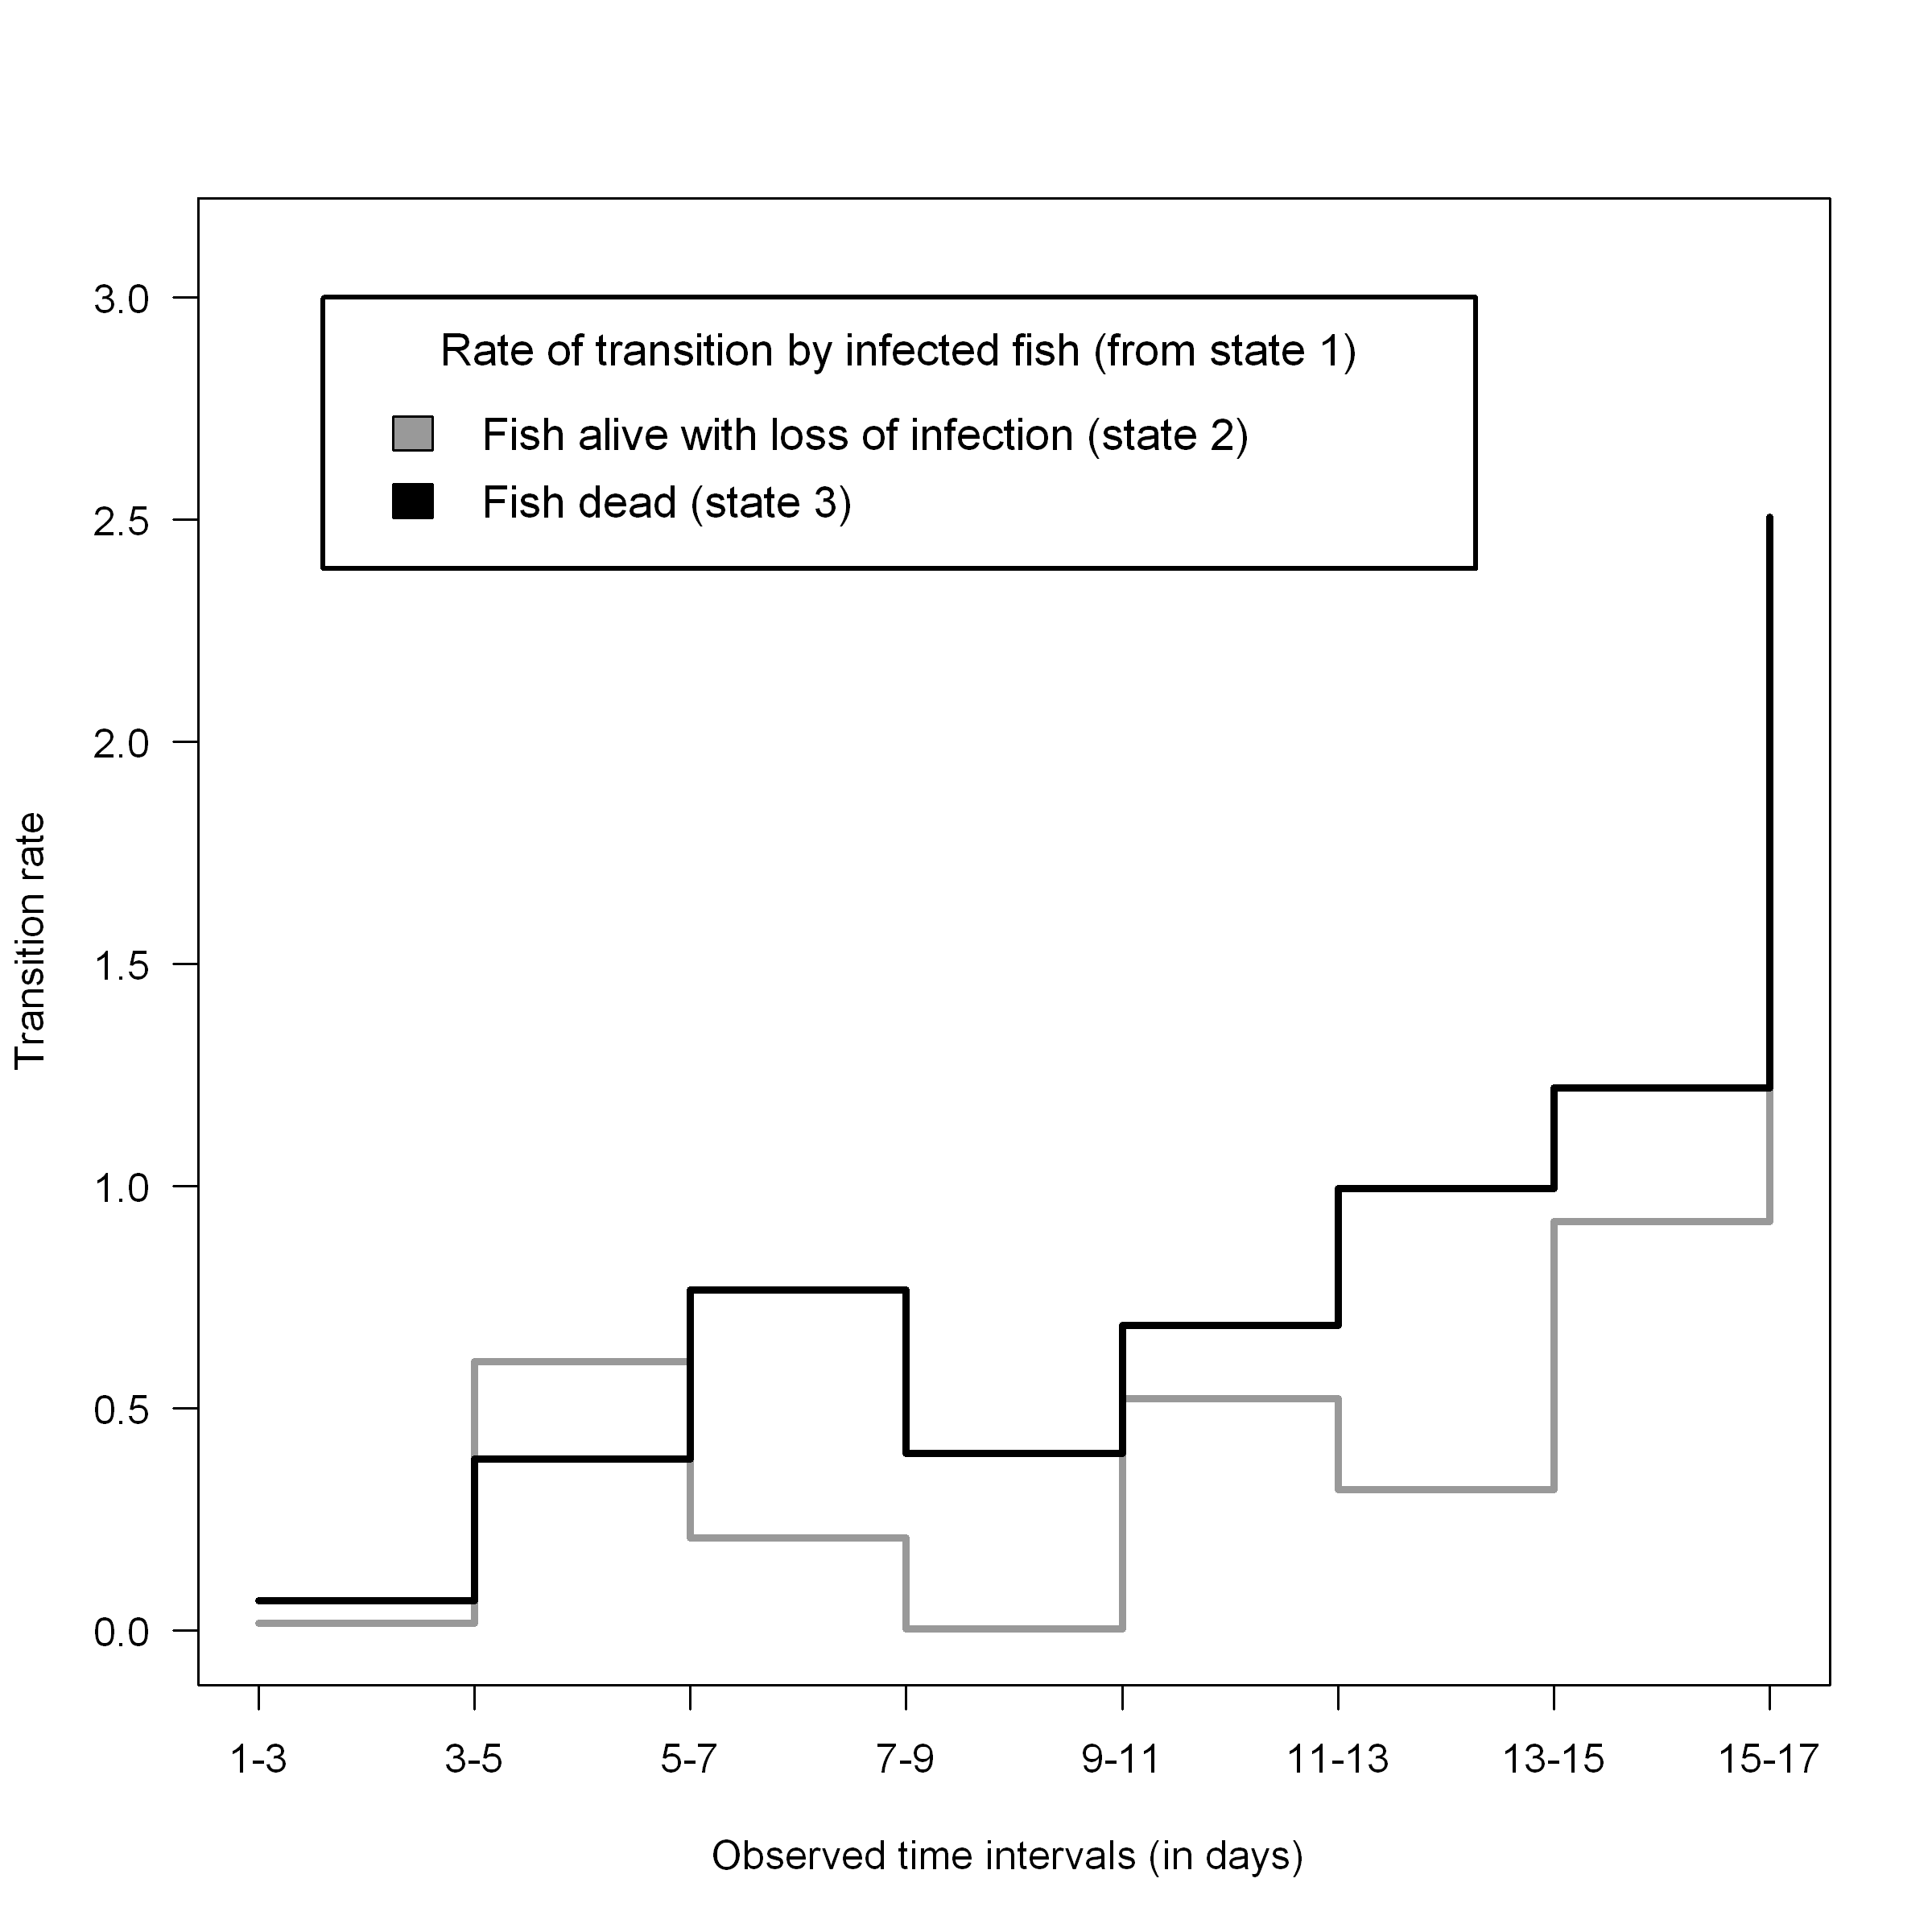

In [84]:
#Multistate_model_best$Qmatrices

Qrate_State2=c(Multistate_model_best$Qmatrices$baseline[1,2],abs(Multistate_model_best$Qmatrices$`timeperiod[3,5)`)[1,2],
abs(Multistate_model_best$Qmatrices$`timeperiod[5,7)`)[1,2],abs(Multistate_model_best$Qmatrices$`timeperiod[7,9)`)[1,2],
abs(Multistate_model_best$Qmatrices$`timeperiod[9,11)`)[1,2],  abs(Multistate_model_best$Qmatrices$`timeperiod[11,13)`)[1,2],
abs(Multistate_model_best$Qmatrices$`timeperiod[13,15)`)[1,2],  abs(Multistate_model_best$Qmatrices$`timeperiod[15,Inf)`)[1,2])

Qrate_State3=c(Multistate_model_best$Qmatrices$baseline[1,3],abs(Multistate_model_best$Qmatrices$`timeperiod[3,5)`)[1,3],
abs(Multistate_model_best$Qmatrices$`timeperiod[5,7)`)[1,3],abs(Multistate_model_best$Qmatrices$`timeperiod[7,9)`)[1,3],
abs(Multistate_model_best$Qmatrices$`timeperiod[9,11)`)[1,3],  abs(Multistate_model_best$Qmatrices$`timeperiod[11,13)`)[1,3],
abs(Multistate_model_best$Qmatrices$`timeperiod[13,15)`)[1,3],  abs(Multistate_model_best$Qmatrices$`timeperiod[15,Inf)`)[1,3])


plot(Qrate_State2,type="s",col="grey60",lwd=3
      ,ylab="Transition rate",las=1,xaxt = "n",xlab="Observed time intervals (in days) ",
    ylim=c(0,3.1))
lines(Qrate_State3,type="s",col="grey0",lwd=3)


axis(1, at=1:8, labels=c("1-3","3-5","5-7","7-9","9-11","11-13","13-15","15-17"))
text <- c("Fish alive with loss of infection (state 2)",
          "Fish dead (state 3)")
legend_order <- matrix(1:2,ncol=1,byrow = T)
legend(x = 1.3,y=3,legend = text[legend_order],
       col=c("grey60","grey0"),ncol=1, cex=1.1,title="Rate of transition by infected fish (from state 1)",box.lwd = 2,
       fill=c("grey60","grey0"))


**Mean sojourn times for the transient state 1**

The function sojourn.msm extracts the estimated mean sojourn times in
each transient state r, for a given set of covariate values. This is calculated as −1/qˆrr, where
qˆrr is the rth diagonal entry of the estimated transition intensity matrix.

In [26]:
#With parasite load as additional covariate
sojourn.msm(Multistate_model_best)

estimates SE       L        U       
state1 12.02893  1.134008 9.999574 14.47014

**Probability that each state is next**

In [30]:
pnext.msm(Multistate_model_best)

       state1 state2                state3               
state1 0      0.192 (0.1290,0.2791) 0.808 (0.7209,0.8710)
state2 0      0                     0                    
state3 0      0                     0                    

**Total length of stay**

Mean sojourn times describe the average period in a single stay in a state. For
processes with successive periods of recovery and relapse, we may want to forecast the total
time spent healthy or diseased, before death. The function totlos.msm estimates the forecasted total length of time spent in each transient state s between two future time points t1 and
t2, for a given set of covariate values. This defaults to the expected amount of time spent in
each state between the start of the process (time 0, the present time) and death or a specified
future time

In [23]:
totlos.msm(Multistate_model_best)

state1   state2   state3 
11.09444      Inf      Inf

**Hazard ratios across covariates with parasite load as additional variable**

The function hazard.msm gives the estimated hazard ratios corresponding to each covariate effect on the transition intensities. 95% conﬁdence limits are computed by assuming normality of the log-effect

**Sex of fish (Ref: Female)**

In [28]:
#male
Multistate_model_2=NULL
Multistate_model_2[[1]]=Multistate_model_best

i=1
hazard.msm(Multistate_model_2[[i]])$`Sex_fishMale fish`
Est1_2=log(hazard.msm(Multistate_model_2[[i]])$'Sex_fishMale fish'[1,1])
L1_limit_1_2=log(hazard.msm(Multistate_model_2[[i]])$'Sex_fishMale fish'[1,2])
U1_limit_1_2=log(hazard.msm(Multistate_model_2[[i]])$'Sex_fishMale fish'[1,3])
SE_1 =(U1_limit_1_2-L1_limit_1_2)/(2*1.96)
z_1=abs(Est1_2/SE_1)
P_value1=exp((−0.717*z_1)-(0.416*z_1^2))
print(paste("P-value: state 1-2=",P_value1))

Est1_3=log(hazard.msm(Multistate_model_2[[i]])$'Sex_fishMale fish'[2,1])
L2_limit_1_2=log(hazard.msm(Multistate_model_2[[i]])$'Sex_fishMale fish'[2,2])
U2_limit_1_2=log(hazard.msm(Multistate_model_2[[i]])$'Sex_fishMale fish'[2,3])
SE_2 =(U2_limit_1_2-L2_limit_1_2)/(2*1.96)
z_2=abs(Est1_3/SE_2)
P_value2=exp((−0.717*z_2)-(0.416*z_2^2))
print(paste("P-value: state 1-3=",P_value2))

HR       L         U       
state1 - state2 1.262819 0.6148229 2.593773
state1 - state3 1.532951 1.0291618 2.283352

[1] "P-value: state 1-2= 0.536028970182875"
[1] "P-value: state 1-3= 0.0353059815158519"


**Fish population (Reference: UA)**


In [29]:
#LA
i=1
hazard.msm(Multistate_model_2[[i]])$`Fish_populationLower Aripo`
Est1_2=log(hazard.msm(Multistate_model_2[[i]])$`Fish_populationLower Aripo`[1,1])
L1_limit_1_2=log(hazard.msm(Multistate_model_2[[i]])$`Fish_populationLower Aripo`[1,2])
U1_limit_1_2=log(hazard.msm(Multistate_model_2[[i]])$`Fish_populationLower Aripo`[1,3])
SE_1 =(U1_limit_1_2-L1_limit_1_2)/(2*1.96)
z_1=abs(Est1_2/SE_1)
P_value1=exp((−0.717*z_1)-(0.416*z_1^2))
print(paste("P-value: state 1-2=",P_value1))

Est1_3=log(hazard.msm(Multistate_model_2[[i]])$`Fish_populationLower Aripo`[2,1])
L2_limit_1_2=log(hazard.msm(Multistate_model_2[[i]])$`Fish_populationLower Aripo`[2,2])
U2_limit_1_2=log(hazard.msm(Multistate_model_2[[i]])$`Fish_populationLower Aripo`[2,3])
SE_2 =(U2_limit_1_2-L2_limit_1_2)/(2*1.96)
z_2=abs(Est1_3/SE_2)
P_value2=exp((−0.717*z_2)-(0.416*z_2^2))
print(paste("P-value: state 1-3=",P_value2))


HR        L         U        
state1 - state2 0.8662213 0.3061210 2.4511203
state1 - state3 0.3903636 0.2502171 0.6090062

[1] "P-value: state 1-2= 0.79891746587598"
[1] "P-value: state 1-3= 4.02056146073253e-05"


In [30]:
#Ornamental
i=1
hazard.msm(Multistate_model_2[[i]])$Fish_populationOrnamental
Est1_2=log(hazard.msm(Multistate_model_2[[i]])$Fish_populationOrnamental[1,1])
L1_limit_1_2=log(hazard.msm(Multistate_model_2[[i]])$Fish_populationOrnamental[1,2])
U1_limit_1_2=log(hazard.msm(Multistate_model_2[[i]])$Fish_populationOrnamental[1,3])
SE_1 =(U1_limit_1_2-L1_limit_1_2)/(2*1.96)
z_1=abs(Est1_2/SE_1)
P_value1=exp((−0.717*z_1)-(0.416*z_1^2))
print(paste("P-value: state 1-2=",P_value1))

Est1_3=log(hazard.msm(Multistate_model_2[[i]])$Fish_populationOrnamental[2,1])
L2_limit_1_2=log(hazard.msm(Multistate_model_2[[i]])$Fish_populationOrnamental[2,2])
U2_limit_1_2=log(hazard.msm(Multistate_model_2[[i]])$Fish_populationOrnamental[2,3])
SE_2 =(U2_limit_1_2-L2_limit_1_2)/(2*1.96)
z_2=abs(Est1_3/SE_2)
P_value2=exp((−0.717*z_2)-(0.416*z_2^2))
print(paste("P-value: state 1-3=",P_value2))


HR        L         U        
state1 - state2 1.3750642 0.5084273 3.7189220
state1 - state3 0.2329239 0.1368379 0.3964804

[1] "P-value: state 1-2= 0.541373644951504"
[1] "P-value: state 1-3= 1.31953657007412e-07"


**Parasite strain (Ref: Gt3)**

In [31]:
#Gt
i=1
hazard.msm(Multistate_model_2[[i]])$Parasite_typeGt
Est1_2=log(hazard.msm(Multistate_model_2[[i]])$Parasite_typeGt[1,1])
L1_limit_1_2=log(hazard.msm(Multistate_model_2[[i]])$Parasite_typeGt[1,2])
U1_limit_1_2=log(hazard.msm(Multistate_model_2[[i]])$Parasite_typeGt[1,3])
SE_1 =(U1_limit_1_2-L1_limit_1_2)/(2*1.96)
z_1=abs(Est1_2/SE_1)
P_value1=exp((−0.717*z_1)-(0.416*z_1^2))
print(paste("P-value: state 1-2=",P_value1))

Est1_3=log(hazard.msm(Multistate_model_2[[i]])$Parasite_typeGt[2,1])
L2_limit_1_2=log(hazard.msm(Multistate_model_2[[i]])$Parasite_typeGt[2,2])
U2_limit_1_2=log(hazard.msm(Multistate_model_2[[i]])$Parasite_typeGt[2,3])
SE_2 =(U2_limit_1_2-L2_limit_1_2)/(2*1.96)
z_2=abs(Est1_3/SE_2)
P_value2=exp((−0.717*z_2)-(0.416*z_2^2))
print(paste("P-value: state 1-3=",P_value2))



HR        L         U        
state1 - state2 0.5254648 0.2024620 1.3637785
state1 - state3 0.6043217 0.3764983 0.9700036

[1] "P-value: state 1-2= 0.187192019845147"
[1] "P-value: state 1-3= 0.036654899104584"


In [32]:
#Gb
i=1
hazard.msm(Multistate_model_2[[i]])$Parasite_typeGbull
Est1_2=log(hazard.msm(Multistate_model_2[[i]])$Parasite_typeGbull[1,1])
L1_limit_1_2=log(hazard.msm(Multistate_model_2[[i]])$Parasite_typeGbull[1,2])
U1_limit_1_2=log(hazard.msm(Multistate_model_2[[i]])$Parasite_typeGbull[1,3])
SE_1 =(U1_limit_1_2-L1_limit_1_2)/(2*1.96)
z_1=abs(Est1_2/SE_1)
P_value1=exp((−0.717*z_1)-(0.416*z_1^2))
print(paste("P-value: state 1-2=",P_value1))

Est1_3=log(hazard.msm(Multistate_model_2[[i]])$Parasite_typeGbull[2,1])
L2_limit_1_2=log(hazard.msm(Multistate_model_2[[i]])$Parasite_typeGbull[2,2])
U2_limit_1_2=log(hazard.msm(Multistate_model_2[[i]])$Parasite_typeGbull[2,3])
SE_2 =(U2_limit_1_2-L2_limit_1_2)/(2*1.96)
z_2=abs(Est1_3/SE_2)
P_value2=exp((−0.717*z_2)-(0.416*z_2^2))
print(paste("P-value: state 1-3=",P_value2))

HR        L         U       
state1 - state2 1.0765096 0.4770358 2.429321
state1 - state3 0.9920279 0.6331406 1.554346

[1] "P-value: state 1-2= 0.86900179942926"
[1] "P-value: state 1-3= 0.974767604351982"


**Fish size**

In [55]:
i=1
hazard.msm(Multistate_model_2[[i]])$Fish_size
Est1_2=log(hazard.msm(Multistate_model_2[[i]])$Fish_size[1,1])
L1_limit_1_2=log(hazard.msm(Multistate_model_2[[i]])$Fish_size[1,2])
U1_limit_1_2=log(hazard.msm(Multistate_model_2[[i]])$Fish_size[1,3])
SE_1 =(U1_limit_1_2-L1_limit_1_2)/(2*1.96)
z_1=abs(Est1_2/SE_1)
P_value1=exp((−0.717*z_1)-(0.416*z_1^2))
print(paste("P-value: state 1-2=",P_value1))

Est1_3=log(hazard.msm(Multistate_model_2[[i]])$Fish_size[2,1])
L2_limit_1_2=log(hazard.msm(Multistate_model_2[[i]])$Fish_size[2,2])
U2_limit_1_2=log(hazard.msm(Multistate_model_2[[i]])$Fish_size[2,3])
SE_2 =(U2_limit_1_2-L2_limit_1_2)/(2*1.96)
z_2=abs(Est1_3/SE_2)
P_value2=exp((−0.717*z_2)-(0.416*z_2^2))
print(paste("P-value: state 1-3=",P_value2))

HR    L     U    
state1 - state2 0.867 0.757 0.993
state1 - state3 1.005 0.937 1.079

[1] "P-value: state 1-2= 0.0386464421036058"
[1] "P-value: state 1-3= 0.892764676412523"


# **Observed timepoints (Ref: 1-3)**

**Days 3-5**

In [56]:
i=1
hazard.msm(Multistate_model_2[[i]])$`timeperiod[3,5)`
Est1_2=log(hazard.msm(Multistate_model_2[[i]])$`timeperiod[3,5)`[1,1])
L1_limit_1_2=log(hazard.msm(Multistate_model_2[[i]])$`timeperiod[3,5)`[1,2])
U1_limit_1_2=log(hazard.msm(Multistate_model_2[[i]])$`timeperiod[3,5)`[1,3])
SE_1 =(U1_limit_1_2-L1_limit_1_2)/(2*1.96)
z_1=abs(Est1_2/SE_1)
P_value1=exp((−0.717*z_1)-(0.416*z_1^2))
print(paste("P-value: state 1-2=",P_value1))

Est1_3=log(hazard.msm(Multistate_model_2[[i]])$`timeperiod[3,5)`[2,1])
L2_limit_1_2=log(hazard.msm(Multistate_model_2[[i]])$`timeperiod[3,5)`[2,2])
U2_limit_1_2=log(hazard.msm(Multistate_model_2[[i]])$`timeperiod[3,5)`[2,3])
SE_2 =(U2_limit_1_2-L2_limit_1_2)/(2*1.96)
z_2=abs(Est1_3/SE_2)
P_value2=exp((−0.717*z_2)-(0.416*z_2^2))
print(paste("P-value: state 1-3=",P_value2))

HR    L     U   
state1 - state2 1.809 0.436 7.50
state1 - state3 0.687 0.271 1.75

[1] "P-value: state 1-2= 0.4217890137725"
[1] "P-value: state 1-3= 0.438532507216222"


**Days 5-7**

In [37]:
i=1
hazard.msm(Multistate_model_2[[i]])$`timeperiod[5,7)`
Est1_2=log(hazard.msm(Multistate_model_2[[i]])$`timeperiod[5,7)`[1,1])
L1_limit_1_2=log(hazard.msm(Multistate_model_2[[i]])$`timeperiod[5,7)`[1,2])
U1_limit_1_2=log(hazard.msm(Multistate_model_2[[i]])$`timeperiod[5,7)`[1,3])
SE_1 =(U1_limit_1_2-L1_limit_1_2)/(2*1.96)
z_1=abs(Est1_2/SE_1)
P_value1=exp((−0.717*z_1)-(0.416*z_1^2))
print(paste("P-value: state 1-2=",P_value1))

Est1_3=log(hazard.msm(Multistate_model_2[[i]])$`timeperiod[5,7)`[2,1])
L2_limit_1_2=log(hazard.msm(Multistate_model_2[[i]])$`timeperiod[5,7)`[2,2])
U2_limit_1_2=log(hazard.msm(Multistate_model_2[[i]])$`timeperiod[5,7)`[2,3])
SE_2 =(U2_limit_1_2-L2_limit_1_2)/(2*1.96)
z_2=abs(Est1_3/SE_2)
P_value2=exp((−0.717*z_2)-(0.416*z_2^2))
print(paste("P-value: state 1-3=",P_value2))

HR        L         U       
state1 - state2 0.8059341 0.1355104 4.793209
state1 - state3 2.1605178 1.0454502 4.464906

[1] "P-value: state 1-2= 0.824104726318803"
[1] "P-value: state 1-3= 0.0372101609885374"


**Days 7-9**

In [38]:
i=1
hazard.msm(Multistate_model_2[[i]])$`timeperiod[7,9)`
Est1_2=log(hazard.msm(Multistate_model_2[[i]])$`timeperiod[7,9)`[1,1])
L1_limit_1_2=log(hazard.msm(Multistate_model_2[[i]])$`timeperiod[7,9)`[1,2])
U1_limit_1_2=log(hazard.msm(Multistate_model_2[[i]])$`timeperiod[7,9)`[1,3])
SE_1 =(U1_limit_1_2-L1_limit_1_2)/(2*1.96)
z_1=abs(Est1_2/SE_1)
P_value1=exp((−0.717*z_1)-(0.416*z_1^2))
print(paste("P-value: state 1-2=",P_value1))

Est1_3=log(hazard.msm(Multistate_model_2[[i]])$`timeperiod[7,9)`[2,1])
L2_limit_1_2=log(hazard.msm(Multistate_model_2[[i]])$`timeperiod[7,9)`[2,2])
U2_limit_1_2=log(hazard.msm(Multistate_model_2[[i]])$`timeperiod[7,9)`[2,3])
SE_2 =(U2_limit_1_2-L2_limit_1_2)/(2*1.96)
z_2=abs(Est1_3/SE_2)
P_value2=exp((−0.717*z_2)-(0.416*z_2^2))
print(paste("P-value: state 1-3=",P_value2))

HR        L         U       
state1 - state2 0.9863228 0.1651816 5.889475
state1 - state3 1.4971651 0.6433302 3.484219

[1] "P-value: state 1-2= 0.989133990122666"
[1] "P-value: state 1-3= 0.35477820975446"


**Days 9-11**

In [39]:
i=1
hazard.msm(Multistate_model_2[[i]])$`timeperiod[9,11)`
Est1_2=log(hazard.msm(Multistate_model_2[[i]])$`timeperiod[9,11)`[1,1])
L1_limit_1_2=log(hazard.msm(Multistate_model_2[[i]])$`timeperiod[9,11)`[1,2])
U1_limit_1_2=log(hazard.msm(Multistate_model_2[[i]])$`timeperiod[9,11)`[1,3])
SE_1 =(U1_limit_1_2-L1_limit_1_2)/(2*1.96)
z_1=abs(Est1_2/SE_1)
P_value1=exp((−0.717*z_1)-(0.416*z_1^2))
print(paste("P-value: state 1-2=",P_value1))

Est1_3=log(hazard.msm(Multistate_model_2[[i]])$`timeperiod[9,11)`[2,1])
L2_limit_1_2=log(hazard.msm(Multistate_model_2[[i]])$`timeperiod[9,11)`[2,2])
U2_limit_1_2=log(hazard.msm(Multistate_model_2[[i]])$`timeperiod[9,11)`[2,3])
SE_2 =(U2_limit_1_2-L2_limit_1_2)/(2*1.96)
z_2=abs(Est1_3/SE_2)
P_value2=exp((−0.717*z_2)-(0.416*z_2^2))
print(paste("P-value: state 1-3=",P_value2))

HR       L         U       
state1 - state2 1.708553 0.3437417 8.492285
state1 - state3 1.992524 0.8716414 4.554800

[1] "P-value: state 1-2= 0.523211683547176"
[1] "P-value: state 1-3= 0.101981929443478"


**Days 11-13**

In [40]:
i=1
hazard.msm(Multistate_model_2[[i]])$`timeperiod[11,13)`
Est1_2=log(hazard.msm(Multistate_model_2[[i]])$`timeperiod[11,13)`[1,1])
L1_limit_1_2=log(hazard.msm(Multistate_model_2[[i]])$`timeperiod[11,13)`[1,2])
U1_limit_1_2=log(hazard.msm(Multistate_model_2[[i]])$`timeperiod[11,13)`[1,3])
SE_1 =(U1_limit_1_2-L1_limit_1_2)/(2*1.96)
z_1=abs(Est1_2/SE_1)
P_value1=exp((−0.717*z_1)-(0.416*z_1^2))
print(paste("P-value: state 1-2=",P_value1))

Est1_3=log(hazard.msm(Multistate_model_2[[i]])$`timeperiod[11,13)`[2,1])
L2_limit_1_2=log(hazard.msm(Multistate_model_2[[i]])$`timeperiod[11,13)`[2,2])
U2_limit_1_2=log(hazard.msm(Multistate_model_2[[i]])$`timeperiod[11,13)`[2,3])
SE_2 =(U2_limit_1_2-L2_limit_1_2)/(2*1.96)
z_2=abs(Est1_3/SE_2)
P_value2=exp((−0.717*z_2)-(0.416*z_2^2))
print(paste("P-value: state 1-3=",P_value2))

HR       L         U       
state1 - state2 1.382325 0.2292577 8.334821
state1 - state3 2.720222 1.2076027 6.127518

[1] "P-value: state 1-2= 0.737020949440154"
[1] "P-value: state 1-3= 0.0156302615515477"


**Days 13-15**

In [41]:
i=1
hazard.msm(Multistate_model_2[[i]])$`timeperiod[13,15)`
Est1_2=log(hazard.msm(Multistate_model_2[[i]])$`timeperiod[13,15)`[1,1])
L1_limit_1_2=log(hazard.msm(Multistate_model_2[[i]])$`timeperiod[13,15)`[1,2])
U1_limit_1_2=log(hazard.msm(Multistate_model_2[[i]])$`timeperiod[13,15)`[1,3])
SE_1 =(U1_limit_1_2-L1_limit_1_2)/(2*1.96)
z_1=abs(Est1_2/SE_1)
P_value1=exp((−0.717*z_1)-(0.416*z_1^2))
print(paste("P-value: state 1-2=",P_value1))

Est1_3=log(hazard.msm(Multistate_model_2[[i]])$`timeperiod[13,15)`[2,1])
L2_limit_1_2=log(hazard.msm(Multistate_model_2[[i]])$`timeperiod[13,15)`[2,2])
U2_limit_1_2=log(hazard.msm(Multistate_model_2[[i]])$`timeperiod[13,15)`[2,3])
SE_2 =(U2_limit_1_2-L2_limit_1_2)/(2*1.96)
z_2=abs(Est1_3/SE_2)
P_value2=exp((−0.717*z_2)-(0.416*z_2^2))
print(paste("P-value: state 1-3=",P_value2))

HR       L         U       
state1 - state2 2.572549 0.5115608 12.93689
state1 - state3 3.409865 1.5104022  7.69807

[1] "P-value: state 1-2= 0.254348219445682"
[1] "P-value: state 1-3= 0.00320326896974139"


**Days 15-17**

In [42]:
i=1
hazard.msm(Multistate_model_2[[i]])$`timeperiod[15,Inf)`
Est1_2=log(hazard.msm(Multistate_model_2[[i]])$`timeperiod[15,Inf)`[1,1])
L1_limit_1_2=log(hazard.msm(Multistate_model_2[[i]])$`timeperiod[15,Inf)`[1,2])
U1_limit_1_2=log(hazard.msm(Multistate_model_2[[i]])$`timeperiod[15,Inf)`[1,3])
SE_1 =(U1_limit_1_2-L1_limit_1_2)/(2*1.96)
z_1=abs(Est1_2/SE_1)
P_value1=exp((−0.717*z_1)-(0.416*z_1^2))
print(paste("P-value: state 1-2=",P_value1))

Est1_3=log(hazard.msm(Multistate_model_2[[i]])$`timeperiod[15,Inf)`[2,1])
L2_limit_1_2=log(hazard.msm(Multistate_model_2[[i]])$`timeperiod[15,Inf)`[2,2])
U2_limit_1_2=log(hazard.msm(Multistate_model_2[[i]])$`timeperiod[15,Inf)`[2,3])
SE_2 =(U2_limit_1_2-L2_limit_1_2)/(2*1.96)
z_2=abs(Est1_3/SE_2)
P_value2=exp((−0.717*z_2)-(0.416*z_2^2))
print(paste("P-value: state 1-3=",P_value2))

HR       L        U       
state1 - state2 11.95409 3.274065 43.64616
state1 - state3 12.31680 6.192604 24.49754

[1] "P-value: state 1-2= 0.000191999852245662"
[1] "P-value: state 1-3= 3.28100272169884e-12"


In [218]:
#Extracting transition intensity given any covariate (eg. fish sex)
qmatrix.msm(Multistate_model_best,covariates=list(Sex_fish="Male fish"))

       state1                        state2                       
state1 -0.11781 (-0.218540,-0.06351)  0.01314 ( 0.003052, 0.05657)
state2 0                             0                            
state3 0                             0                            
       state3                       
state1  0.10467 ( 0.053518, 0.20473)
state2 0                            
state3 0                            

# Survival plots

Important use of Multi-state models is in predicting the probability
of survival for patients in increasingly severe states of disease, for some time t in the future. This can
be obtained directly from the transition probability matrix P(t).

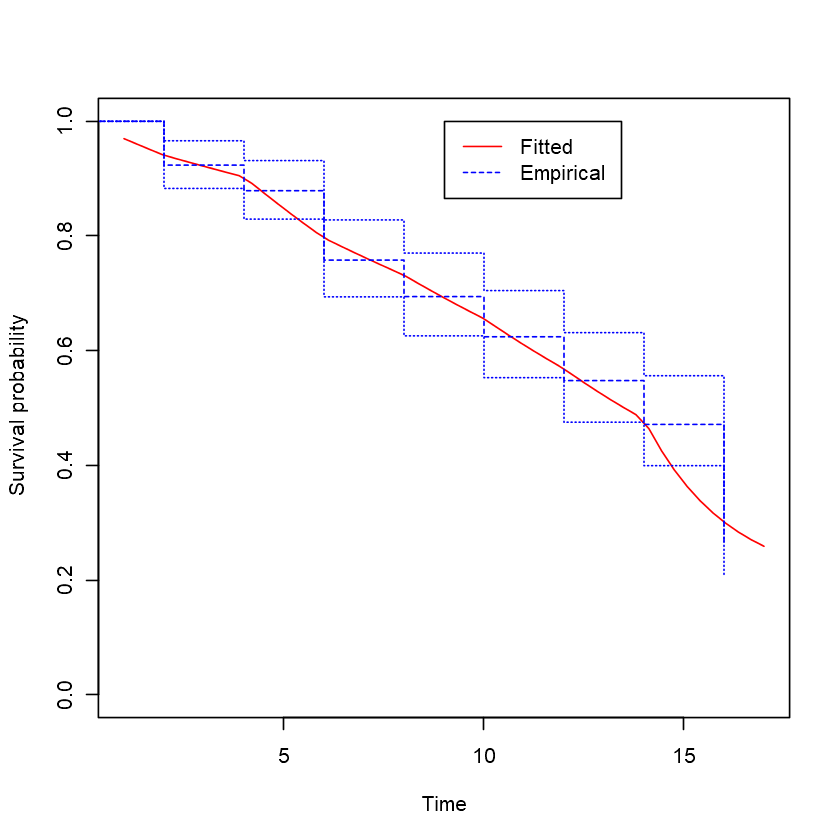

In [43]:
plot.survfit.msm(Multistate_model_best,mark.time=F)

# Model assessment

	
If "normal", then calculate a confidence interval for the expected prevalences by simulating B random vectors from the asymptotic multivariate normal distribution implied by the maximum likelihood estimates (and covariance matrix) of the log transition intensities and covariate effects, then calculating the expected prevalences for each replicate.

In [52]:
#Without parasite load as additional covariate
options(digits=3)
Comparison_output=prevalence.msm(Multistate_model_best, times=seq(1,17,2),censtime=17
               ,ci=c("normal"),B=500,cores=4,interp="start")

#Comparison_output

In [107]:
#plot.prevalence.msm(Multistate_model_2[[1]],mintime=1,maxtime=17)

In [53]:
Lower_limit=as.data.frame(Comparison_output$`Expected percentages`$ci[, ,1])
names(Lower_limit)=c("LL:State1","LL: State2","LL: State3")
rownames(Lower_limit)=c(1,3,5,7,9,11,13,15,17)

Upper_limit=as.data.frame(Comparison_output$`Expected percentages`$ci[, ,2])
names(Upper_limit)=c("UL: State1","UL: State2","UL: State3")
rownames(Upper_limit)=c(1,3,5,7,9,11,13,15,17)
CI_intervals=cbind(Lower_limit,Upper_limit,as.data.frame(Comparison_output$`Expected percentages`$estimates))/100

# **Chi-square goodness-of-fit test**

Conclusion: There is no significant difference between the observed and the predicted values

In [55]:
Observed_percentages=as.data.frame(Comparison_output$"Observed percentages")/100
Expected_percentages=as.data.frame(Comparison_output$"Expected percentages")/100

#ignoring the initial probability of states 1, 2 and 3 respectively (ie: 1,0,0)
observed=c(as.vector(Observed_percentages[,1]),as.vector(Observed_percentages[,2]),as.vector(Observed_percentages[,3]))[-c(1,10,19)]
predicted=c(as.vector(Expected_percentages[,1]),as.vector(Expected_percentages[,2]),as.vector(Expected_percentages[,3]))[-c(1,10,19)]

chi2 = sum((observed- predicted)^2/ predicted)
paste("Chi-square=",chi2,";","p-value=", pchisq(chi2,df=1,lower.tail=FALSE)) 

[1] "Chi-square= 0.0671935877594099 ; p-value= 0.795467614760402"

# Estimating the prediction accuracy



In [56]:
na.zero <- function (x) {
    x[is.na(x)] <- 0
    return(x)
}


MAPE=function(x,y){(sum(na.zero(abs(as.vector(x)-as.vector(y))/as.vector(x)))*100)/length(as.vector(x))}


observed=c(as.vector(Observed_percentages[,1]),as.vector(Observed_percentages[,2]),as.vector(Observed_percentages[,3]))
predicted=c(as.vector(Expected_percentages[,1]),as.vector(Expected_percentages[,2]),as.vector(Expected_percentages[,3]))


MAPE(x=observed,y=predicted)
print(paste("The prediction accuracy=","",100-MAPE(x=observed,y=predicted),"%"))

[1] 7.85

[1] "The prediction accuracy=  92.1451984956748 %"


# The fitted transition probability matrix is used to forecast expected prevalences from the state occupancy at the initial time.

In [57]:
Observed_data=Comparison_output$`Observed percentages`/100
Observed_data
Expected_data=Comparison_output$`Expected percentages`$estimates/100
Expected_data

State 1 State 2 State 3
1  1.0000  0.0000  0.0000 
3  0.9045  0.0191  0.0764 
5  0.8280  0.0510  0.1210 
7  0.6943  0.0637  0.2420 
9  0.6178  0.0764  0.3057 
11 0.5287  0.0955  0.3758 
13 0.4395  0.1083  0.4522 
15 0.3439  0.1274  0.5287 
17 0.0701  0.1975  0.7325

state1 state2 state3
1  1.000  0.0000 0.0000
3  0.910  0.0186 0.0717
5  0.836  0.0495 0.1149
7  0.708  0.0615 0.2302
9  0.630  0.0741 0.2958
11 0.539  0.0927 0.3682
13 0.449  0.1053 0.4461
15 0.356  0.1238 0.5200
17 0.163  0.1741 0.6630

In [58]:
o<-par(mar=c(0,4,2,2))#Run this before the code below

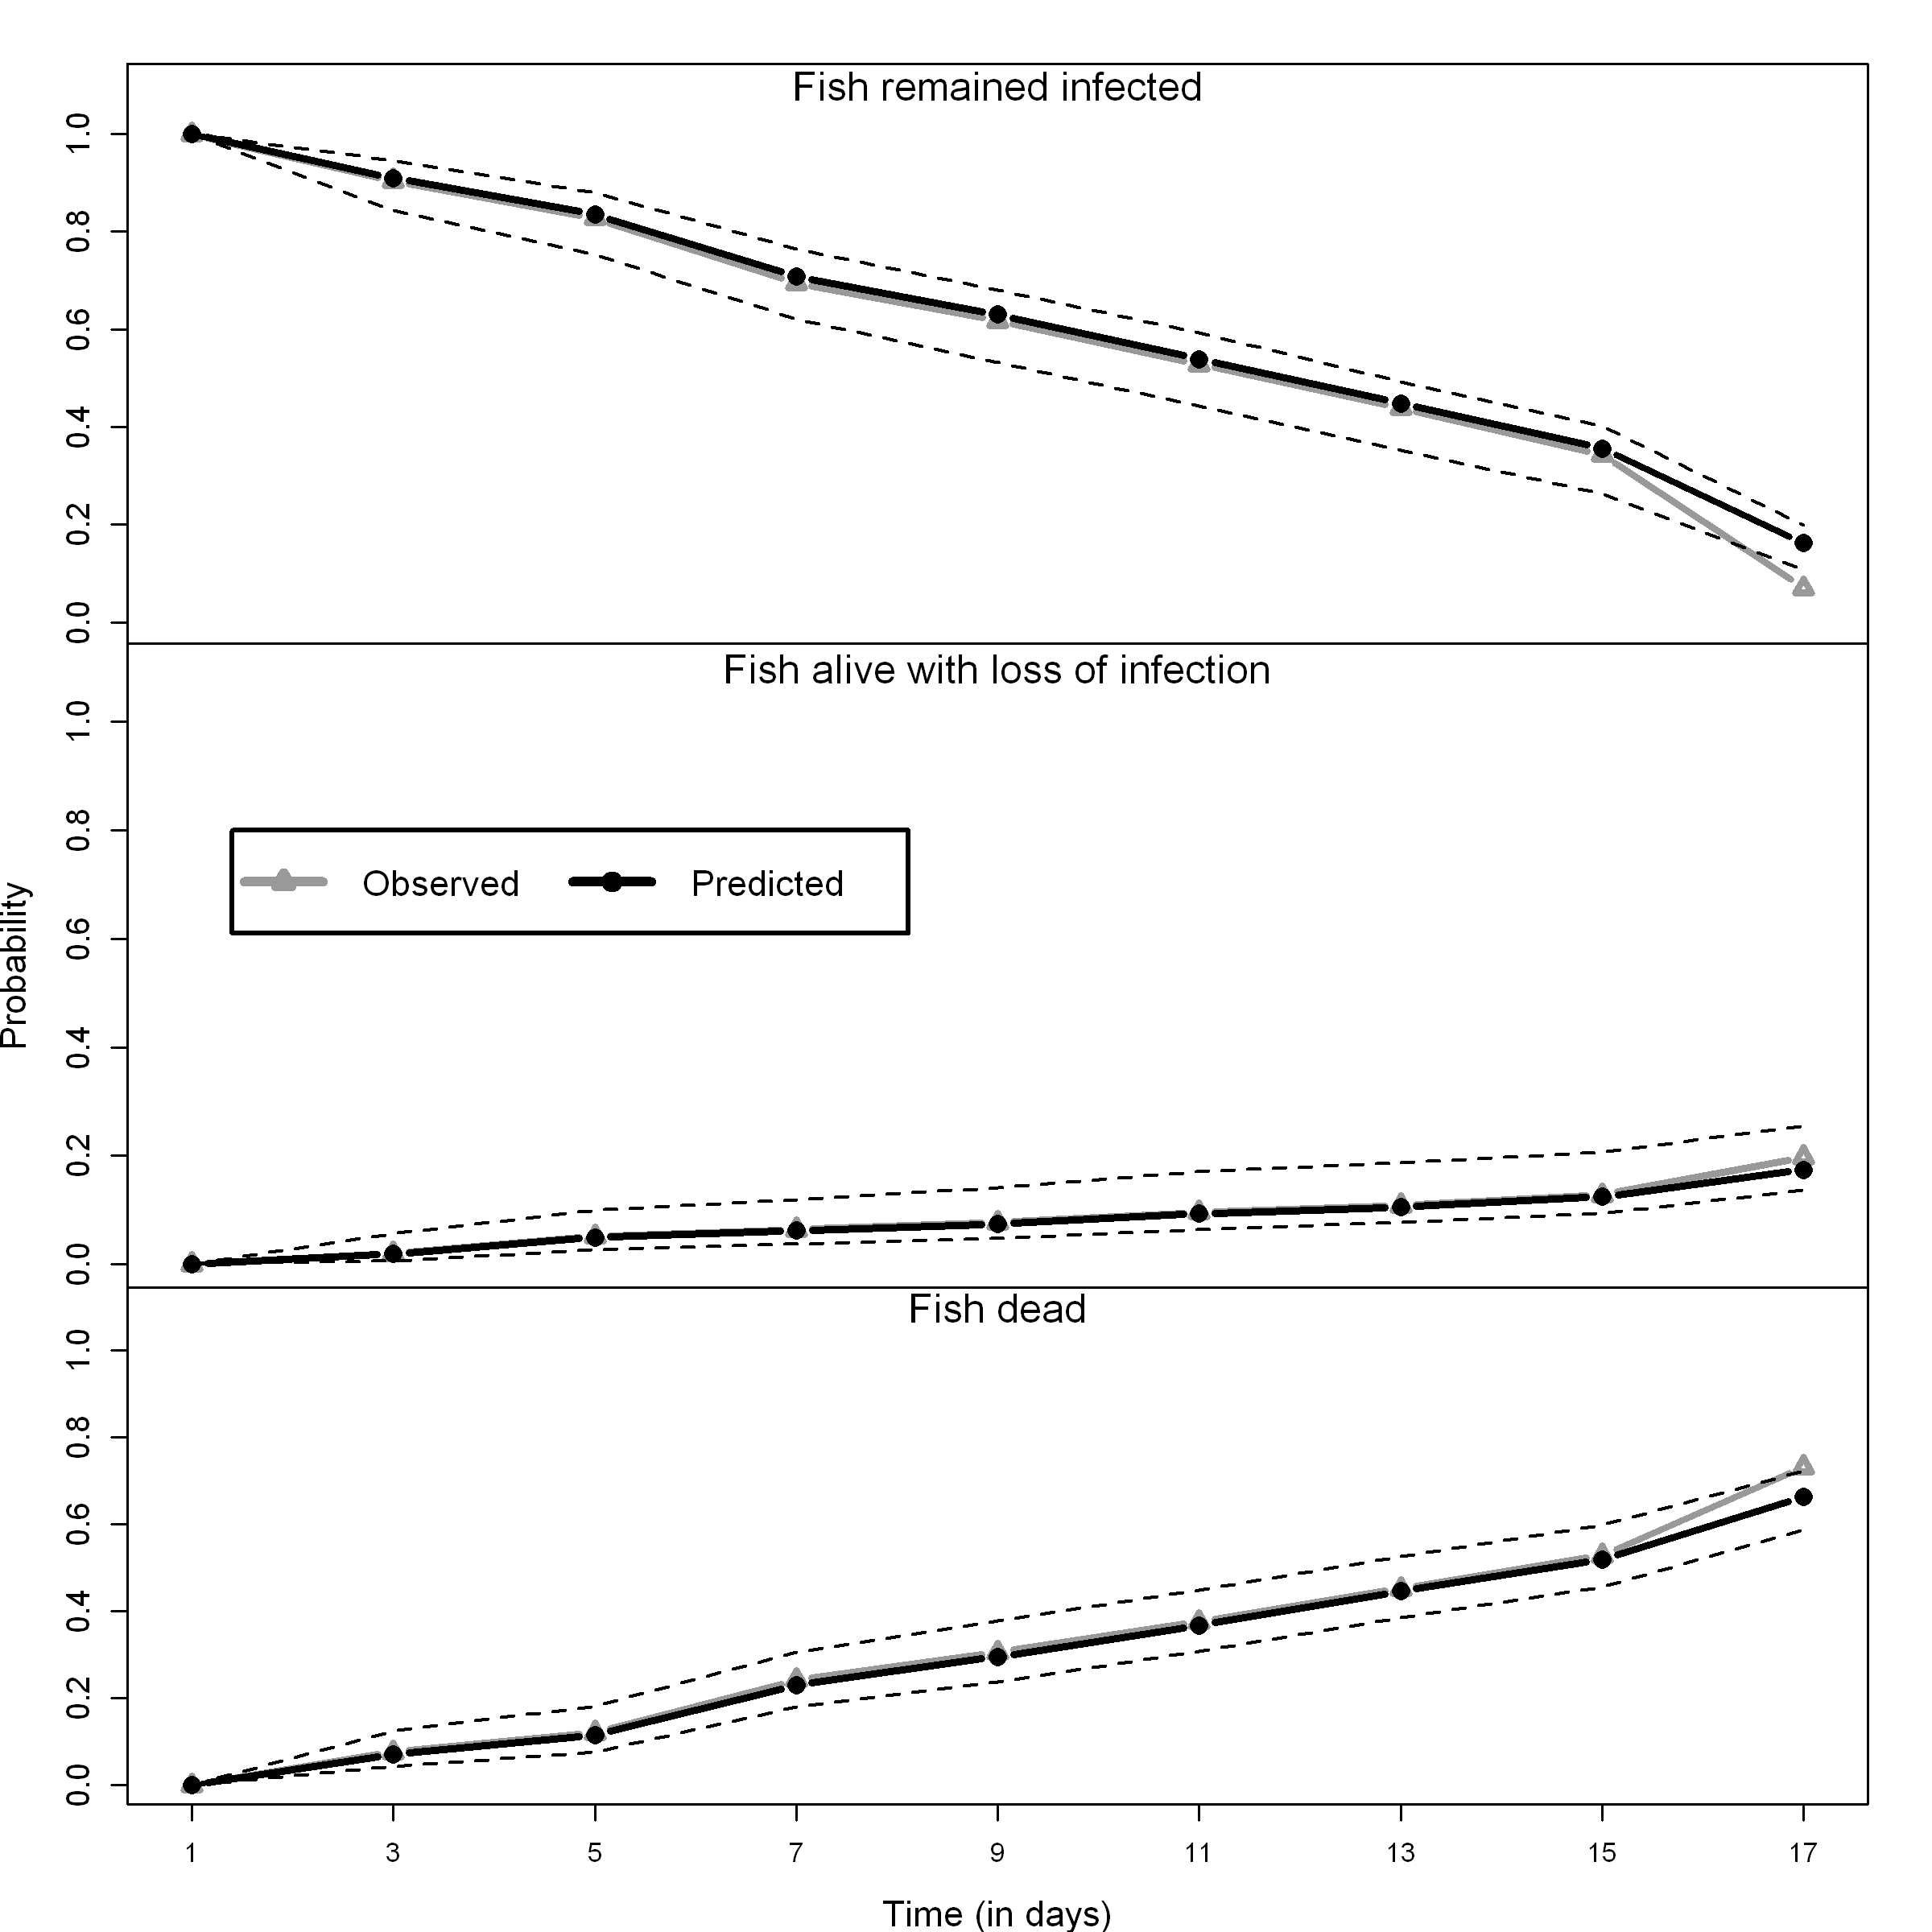

In [86]:

nf<-layout(matrix(1:3, nrow=3,ncol=1))
#layout.show(nf)
    

# rest parameters
par(o)#
o<-par(mar=c(0,4,2,2))
#o<-par(mar=c(0,4,2,2))
plot(Observed_data[,1],type="b",col="grey60",lwd=3,xaxt = "n",ylab="",xlab="",pch=24,cex.axis=1.2,ylim=c(0,1.1))
lines(Expected_data[,1],type="b",col="grey0",lwd=3,pch=19)
lines(CI_intervals[,1],type="l",col="grey0",lty=2,lwd=1.5)
lines(CI_intervals[,4],type="l",col="grey0",lty=2,lwd=1.5)
#axis(1, at=1:9, labels=c("1","3","5","7","9","11","13","15","17"))
text(5,1.1,"Fish remained infected",cex=1.5)





o<-par(mar=c(0,4,0,2))
plot(Observed_data[,2],type="b",col="grey60",lwd=3,xaxt = "n",ylab="Probability",xlab="",ylim=c(0,1.1),pch=24,cex.lab=1.35, cex.axis=1.2)
lines(Expected_data[,2],type="b",col="grey0",lwd=3,pch=19)
lines(CI_intervals[,2],type="l",col="grey0",lty=2,lwd=1.5)
lines(CI_intervals[,5],type="l",col="grey0",lty=2,lwd=1.5)
#axis(1, at=1:9, labels=c("1","3","5","7","9","11","13","15","17"))
text(5,1.1,"Fish alive with loss of infection",cex=1.5)

legend(x = 1.2,y=0.8,inset=0,
        legend = c("Observed","Predicted"), 
        col=c("grey60","grey0"), lwd=4, cex=1.35, horiz = TRUE,pch=c(24,19),pt.cex = 1,box.lwd = 2)


par(mar=c(4,4,0,2))

plot(Observed_data[,3],type="b",col="grey60",lwd=3,xaxt = "n",ylab="",xlab="Time (in days)",pch=24,cex.lab=1.35, cex.axis=1.2
    ,ylim=c(0,1.1))
lines(Expected_data[,3],type="b",col="grey0",lwd=3,pch=19)
lines(CI_intervals[,3],type="l",col="grey0",lty=2,lwd=1.5)
lines(CI_intervals[,6],type="l",col="grey0",lty=2,lwd=1.5)
axis(1, at=1:9, labels=c("1","3","5","7","9","11","13","15","17"))
text(5,1.1,"Fish dead",cex=1.5)

#mtext("Time (in days)", side =1,line = 0, outer=TRUE)
#mtext("Probability", side =2,line = 0, outer=TRUE, las=0)

par(o)





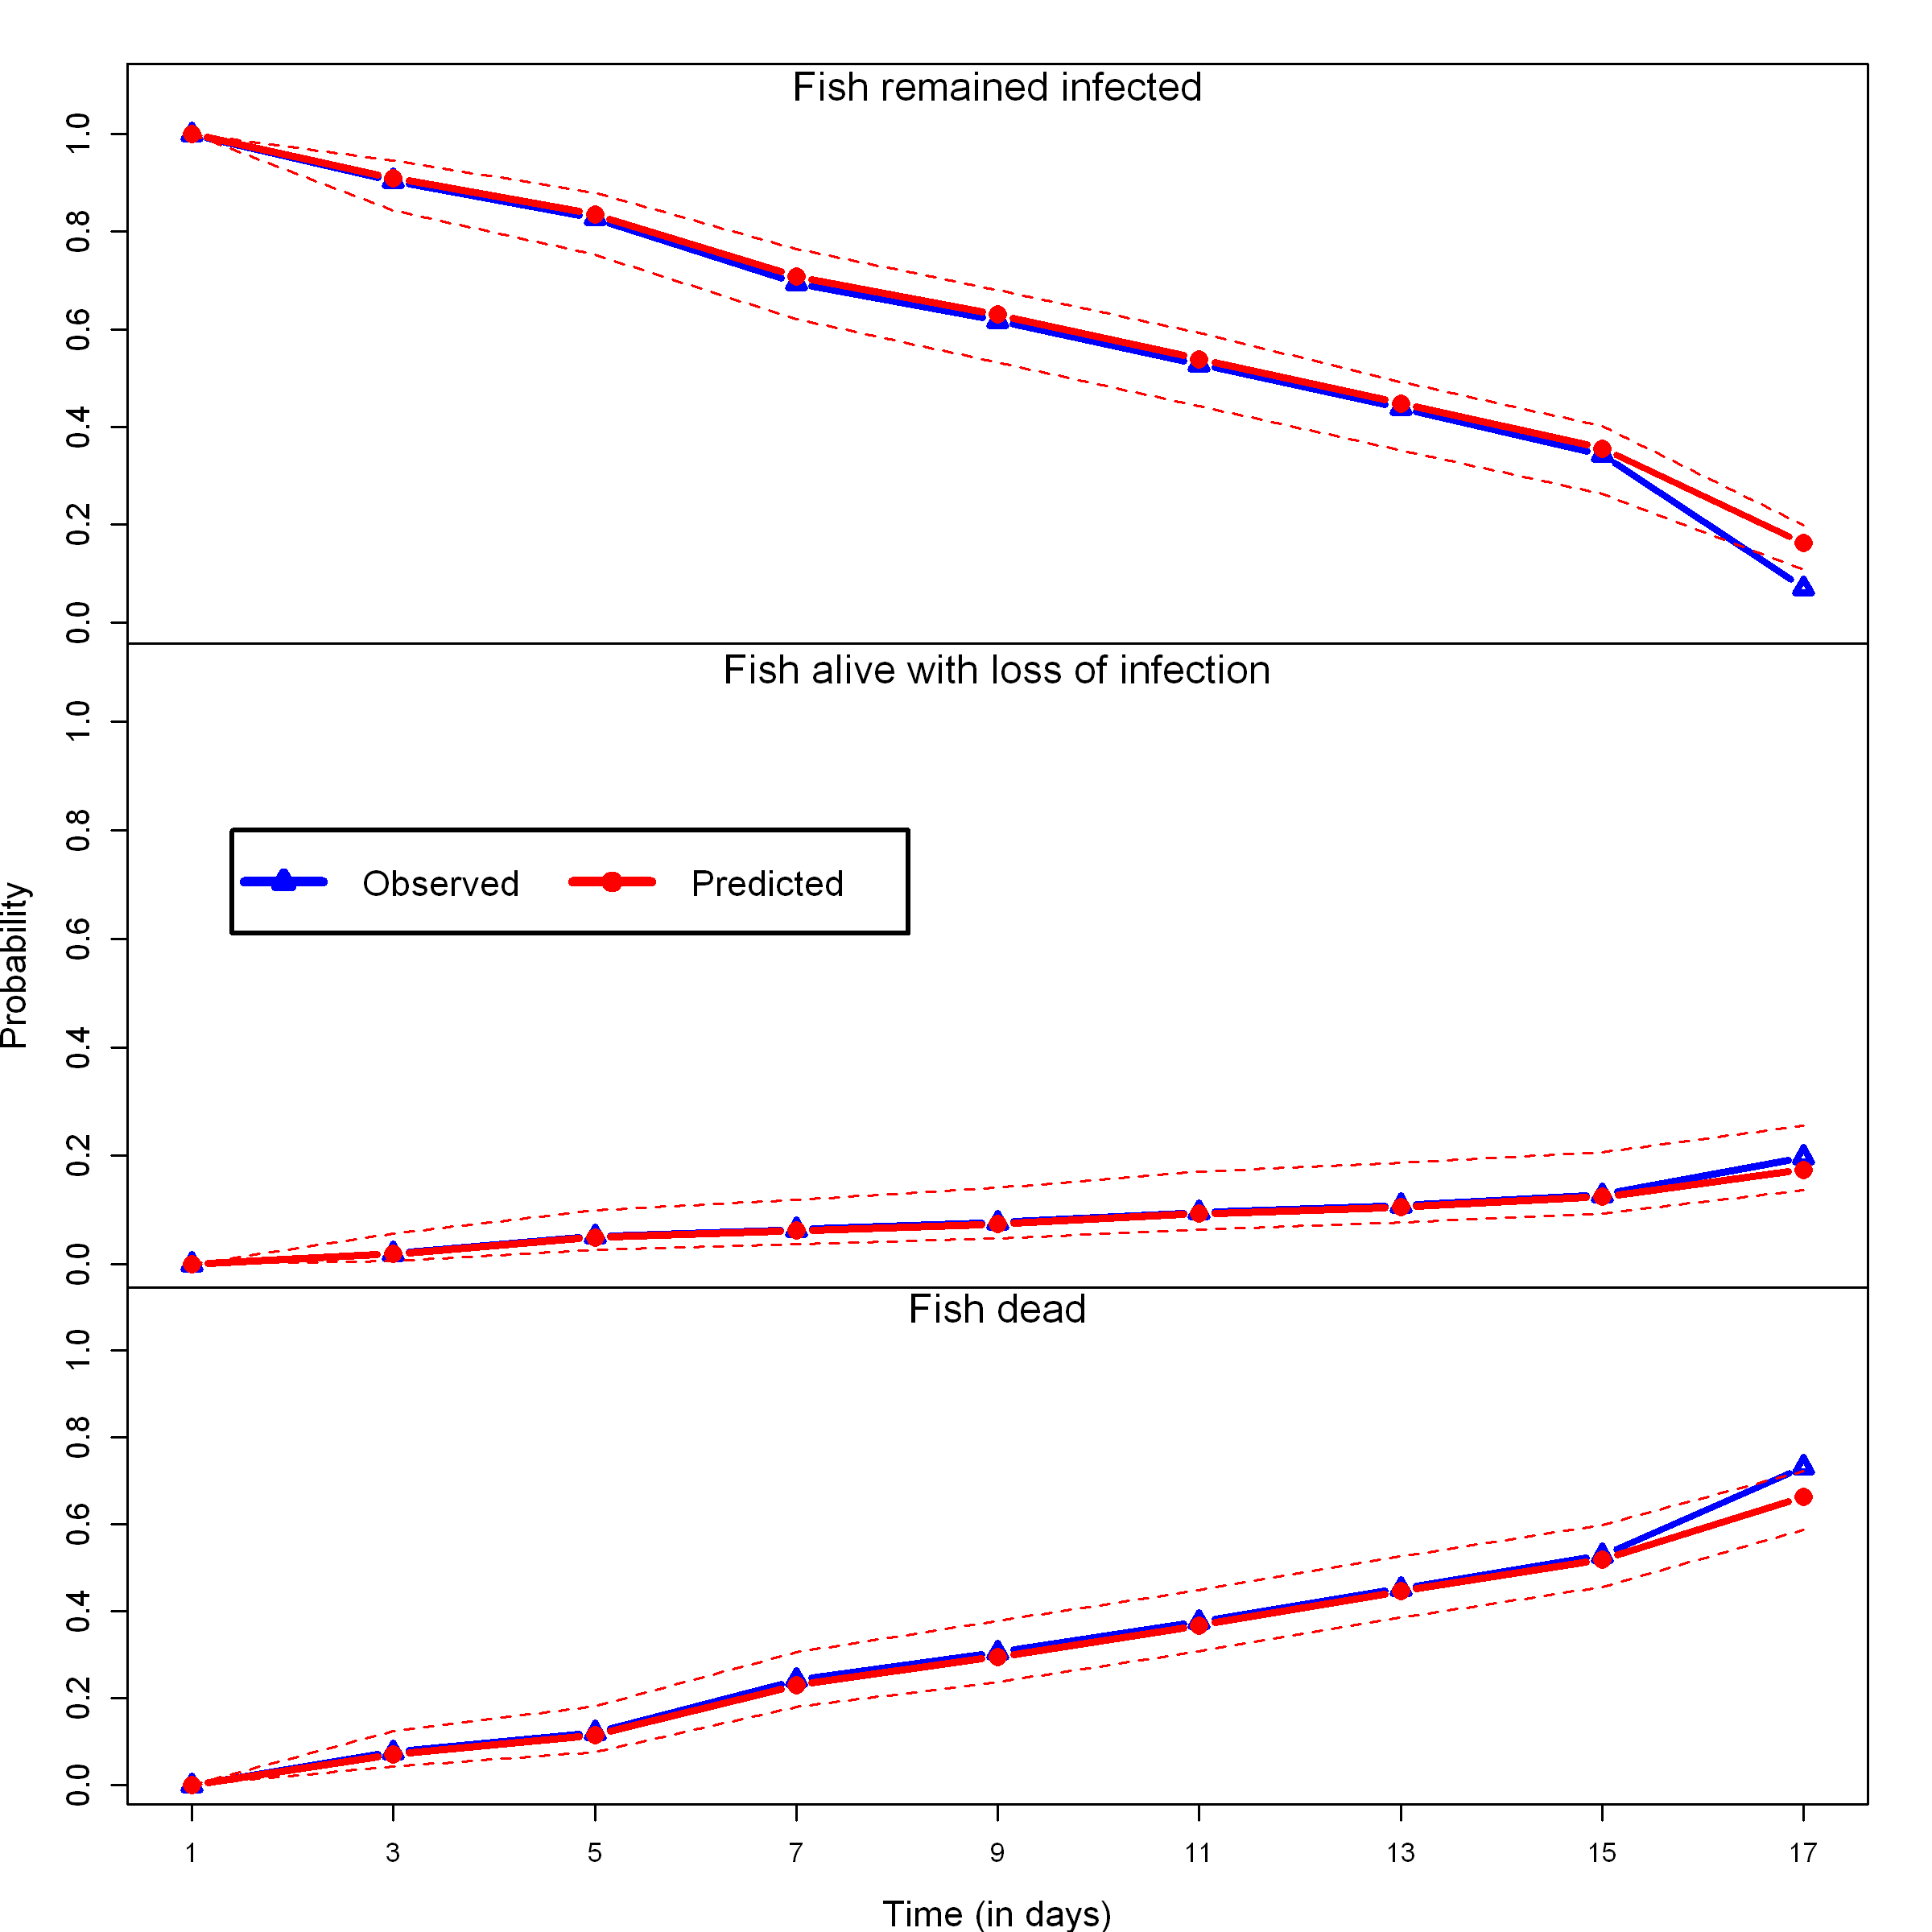

In [62]:

nf<-layout(matrix(1:3, nrow=3,ncol=1))
#layout.show(nf)
    

# rest parameters
par(o)#
o<-par(mar=c(0,4,2,2))
#o<-par(mar=c(0,4,2,2))
plot(Observed_data[,1],type="b",col="blue",lwd=3,xaxt = "n",ylab="",xlab="",pch=24,cex.axis=1.2,ylim=c(0,1.1))
lines(Expected_data[,1],type="b",col="red",lwd=3,pch=19)
lines(CI_intervals[,1],type="l",col="red",lty=2)
lines(CI_intervals[,4],type="l",col="red",lty=2)
#axis(1, at=1:9, labels=c("1","3","5","7","9","11","13","15","17"))
text(5,1.1,"Fish remained infected",cex=1.5)





o<-par(mar=c(0,4,0,2))
plot(Observed_data[,2],type="b",col="blue",lwd=3,xaxt = "n",ylab="Probability",xlab="",ylim=c(0,1.1),pch=24,cex.lab=1.35, cex.axis=1.2)
lines(Expected_data[,2],type="b",col="red",lwd=3,pch=19)
lines(CI_intervals[,2],type="l",col="red",lty=2)
lines(CI_intervals[,5],type="l",col="red",lty=2)
#axis(1, at=1:9, labels=c("1","3","5","7","9","11","13","15","17"))
text(5,1.1,"Fish alive with loss of infection",cex=1.5)

legend(x = 1.2,y=0.8,,inset = 0,
        legend = c("Observed","Predicted"), 
        col=c("blue","red"), lwd=4, cex=1.35, horiz = TRUE,pch=c(24,19),pt.cex = 1,box.lwd = 2)


par(mar=c(4,4,0,2))

plot(Observed_data[,3],type="b",col="blue",lwd=3,xaxt = "n",ylab="",xlab="Time (in days)",pch=24,cex.lab=1.35, cex.axis=1.2
    ,ylim=c(0,1.1))
lines(Expected_data[,3],type="b",col="red",lwd=3,pch=19)
lines(CI_intervals[,3],type="l",col="red",lty=2)
lines(CI_intervals[,6],type="l",col="red",lty=2)
axis(1, at=1:9, labels=c("1","3","5","7","9","11","13","15","17"))
text(5,1.1,"Fish dead",cex=1.5)

#mtext("Time (in days)", side =1,line = 0, outer=TRUE)
#mtext("Probability", side =2,line = 0, outer=TRUE, las=0)

par(o)





In [52]:

graph=function(){

nf<-layout(matrix(1:3, nrow=3,ncol=1))
#layout.show(nf)
    

# rest parameters
par(o)#
o<-par(mar=c(0,4,2,2))
#o<-par(mar=c(0,4,2,2))
plot(Observed_data[,1],type="b",col="blue",lwd=3,xaxt = "n",ylab="",xlab="",pch=24,cex.axis=1.2)
lines(Expected_data[,1],type="b",col="red",lwd=3,pch=19)
lines(CI_intervals[,1],type="l",col="red",lty=2)
lines(CI_intervals[,4],type="l",col="red",lty=2)
#axis(1, at=1:9, labels=c("1","3","5","7","9","11","13","15","17"))
text(5,0.9,"Fish remained infected",cex=1.5)


o<-par(mar=c(0,4,0,2))
plot(Observed_data[,2],type="b",col="blue",lwd=3,xaxt = "n",ylab="Probability",xlab="",ylim=c(0,.3),pch=24,cex.lab=1.35, cex.axis=1.2)
lines(Expected_data[,2],type="b",col="red",lwd=3,pch=19)
lines(CI_intervals[,2],type="l",col="red",lty=2)
lines(CI_intervals[,5],type="l",col="red",lty=2)
#axis(1, at=1:9, labels=c("1","3","5","7","9","11","13","15","17"))
text(5,.28,"Fish alive with loss of infection",cex=1.5)

par(mar=c(4,4,0,2))

plot(Observed_data[,3],type="b",col="blue",lwd=3,xaxt = "n",ylab="",xlab="Time (in days)",pch=24,cex.lab=1.35, cex.axis=1.2)
lines(Expected_data[,3],type="b",col="red",lwd=3,pch=19)
lines(CI_intervals[,3],type="l",col="red",lty=2)
lines(CI_intervals[,6],type="l",col="red",lty=2)
axis(1, at=1:9, labels=c("1","3","5","7","9","11","13","15","17"))
text(5,.69,"Fish dead",cex=1.5)

#mtext("Time (in days)", side =1,line = 0, outer=TRUE)
#mtext("Probability", side =2,line = 0, outer=TRUE, las=0)

par(o)

legend(x = 5.5,y=0.2,,inset = 0,
        legend = c("Observed","Predicted"), 
        col=c("blue","red"), lwd=2, cex=1.35, horiz = TRUE,pch=c(24,19),pt.cex = 1)

}


doc <- read_pptx()


doc <- add_slide(doc, 'Title and Content', 'Office Theme')
doc <- ph_with_vg(doc, code = graph(),type = "body")
#doc <- add_slide(doc, "Title and Content", "Office Theme")


# Write the document to a file
print(doc, target = 'Multistate_comparison.pptx')

[1] "C:/Users/user/Multistate_comparison.pptx"

In [1]:


#graph()